In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import re

# คลิป 100 สอน pandas การหาแถวที่มีค่าสูงสุดและต่ำสุดด้วย nlargest, nsmallest

In [2]:
df = pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/mpg.csv')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [4]:
df.nlargest(5, columns='hwy') # ได้เฉพาะ column ที่เป็น number

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact
196,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact
105,honda,civic,1.8,2008,4,auto(l5),f,25,36,r,subcompact


In [5]:
df.nsmallest(5, columns='hwy')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
54,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
59,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv
65,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
69,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup
126,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv


In [6]:
g = df.groupby('class')
g.apply(lambda s:s.nlargest(2, 'cty'))

manufacturer              model  displ  year  cyl       trans  \
class                                                                          
2seater    23     chevrolet           corvette    5.7  1999    8  manual(m6)   
           25     chevrolet           corvette    6.2  2008    8  manual(m6)   
compact    212   volkswagen              jetta    1.9  1999    4  manual(m5)   
           196       toyota            corolla    1.8  2008    4  manual(m5)   
midsize    143       nissan             altima    2.5  2008    4    auto(av)   
           144       nissan             altima    2.5  2008    4  manual(m6)   
minivan    37         dodge        caravan 2wd    2.4  1999    4    auto(l3)   
           38         dodge        caravan 2wd    3.0  1999    6    auto(l4)   
pickup     202       toyota  toyota tacoma 4wd    2.7  2008    4  manual(m5)   
           201       toyota  toyota tacoma 4wd    2.7  1999    4    auto(l4)   
subcompact 221   volkswagen         new beetle    1.9  1999    4  manual(m5)   
           222   volkswagen         new beetle    1.9  1999    4    auto(l4)   
suv        161       subaru       forester awd    2.5  2008    4  manual(m5)   
           163       subaru       forester awd    2.5  2008    4    auto(l4)   

               drv  cty  hwy fl       class  
class                                        
2seater    23    r   16   26  p     2seater  
           25    r   16   26  p     2seater  
compact    212   f   33   44  d     compact  
           196   f   28   37  r     compact  
midsize    143   f   23   31  r     midsize  
           144   f   23   32  r     midsize  
minivan    37    f   18   24  r     minivan  
           38    f   17   24  r     minivan  
pickup     202   4   17   22  r      pickup  
           201   4   16   20  r      pickup  
subcompact 221   f   35   44  d  subcompact  
           222   f   29   41  d  subcompact  
suv        161   4   20   27  r         suv  
           163   4   20   26  r         suv

In [7]:
df['AM'] = df.trans.str[0]

In [8]:
df[df.AM == 'a'].nlargest(3, columns='cty')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,AM
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,a
197,toyota,corolla,1.8,2008,4,auto(l4),f,26,35,r,compact,a
105,honda,civic,1.8,2008,4,auto(l5),f,25,36,r,subcompact,a


In [9]:
g = df.groupby('AM')
g.apply(lambda s: s.nlargest(3, 'cty'))

manufacturer       model  displ  year  cyl       trans drv  cty  hwy  \
AM                                                                            
a  222   volkswagen  new beetle    1.9  1999    4    auto(l4)   f   29   41   
   197       toyota     corolla    1.8  2008    4    auto(l4)   f   26   35   
   105        honda       civic    1.8  2008    4    auto(l5)   f   25   36   
m  221   volkswagen  new beetle    1.9  1999    4  manual(m5)   f   35   44   
   212   volkswagen       jetta    1.9  1999    4  manual(m5)   f   33   44   
   99         honda       civic    1.6  1999    4  manual(m5)   f   28   33   

       fl       class AM  
AM                        
a  222  d  subcompact  a  
   197  r     compact  a  
   105  r  subcompact  a  
m  221  d  subcompact  m  
   212  d     compact  m  
   99   r  subcompact  m

In [10]:
df.groupby('AM').apply(lambda s: s.nlargest(3, 'cty')).sort_values(by='cty', ascending=False)

manufacturer       model  displ  year  cyl       trans drv  cty  hwy  \
AM                                                                            
m  221   volkswagen  new beetle    1.9  1999    4  manual(m5)   f   35   44   
   212   volkswagen       jetta    1.9  1999    4  manual(m5)   f   33   44   
a  222   volkswagen  new beetle    1.9  1999    4    auto(l4)   f   29   41   
m  99         honda       civic    1.6  1999    4  manual(m5)   f   28   33   
a  197       toyota     corolla    1.8  2008    4    auto(l4)   f   26   35   
   105        honda       civic    1.8  2008    4    auto(l5)   f   25   36   

       fl       class AM  
AM                        
m  221  d  subcompact  m  
   212  d     compact  m  
a  222  d  subcompact  a  
m  99   r  subcompact  m  
a  197  r     compact  a  
   105  r  subcompact  a

# คลิป 101 จัดการข้อมูลแยกตามกลุ่มด้วยหลักการ Split-Apply-Combine

In [11]:
df = pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/mpg.csv')
df.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
13,audi,a4 quattro,3.1,2008,6,auto(s6),4,17,25,p,compact
170,subaru,impreza awd,2.5,2008,4,auto(s4),4,20,27,r,compact
119,hyundai,tiburon,2.7,2008,6,auto(l4),f,17,24,r,subcompact
94,ford,mustang,4.6,1999,8,auto(l4),r,15,21,r,subcompact
20,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv


In [12]:
df.cty.mean()

16.858974358974358

In [13]:
g = df.groupby('class')
g.groups # เช็นว่ามี groups อะไรบ้าง เเละมี index อะไรบ้าง

{'2seater': [23, 24, 25, 26, 27], 'compact': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 141, 142, 169, 170, 171, 172, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220], 'midsize': [15, 16, 17, 32, 33, 34, 35, 36, 108, 109, 110, 111, 112, 113, 114, 143, 144, 145, 146, 147, 148, 149, 154, 155, 156, 157, 158, 179, 180, 181, 182, 183, 184, 185, 227, 228, 229, 230, 231, 232, 233], 'minivan': [37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47], 'pickup': [48, 49, 50, 51, 52, 53, 54, 55, 56, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 83, 84, 85, 86, 87, 88, 89, 200, 201, 202, 203, 204, 205, 206], 'subcompact': [90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 115, 116, 117, 118, 119, 120, 121, 165, 166, 167, 168, 221, 222, 223, 224, 225, 226], 'suv': [18, 19, 20, 21, 22, 28, 29, 30, 31, 57, 58, 59, 60, 61, 62, 63, 74, 75, 76, 77, 78, 79, 80, 81, 82, 122, 123, 124, 125, 126, 127, 128, 1

In [ ]:
g.groups.keys() # เช็คว่ามี key อะไรบ้าง **************************************************************************************

dict_keys(['2seater', 'compact', 'midsize', 'minivan', 'pickup', 'subcompact', 'suv'])

In [ ]:
g.get_group('suv')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
18,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
20,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
21,chevrolet,c1500 suburban 2wd,5.7,1999,8,auto(l4),r,13,17,r,suv
22,chevrolet,c1500 suburban 2wd,6.0,2008,8,auto(l4),r,12,17,r,suv
...,...,...,...,...,...,...,...,...,...,...,...
176,toyota,4runner 4wd,3.4,1999,6,manual(m5),4,15,17,r,suv
177,toyota,4runner 4wd,4.0,2008,6,auto(l5),4,16,20,r,suv
178,toyota,4runner 4wd,4.7,2008,8,auto(l5),4,14,17,r,suv
198,toyota,land cruiser wagon 4wd,4.7,1999,8,auto(l4),4,11,15,r,suv


In [ ]:
for i in g.groups.keys():
    print(f'{i} = {g.get_group(i)["cty"].mean()}')

2seater = 15.4
compact = 20.127659574468087
midsize = 18.75609756097561
minivan = 15.818181818181818
pickup = 13.0
subcompact = 20.37142857142857
suv = 13.5


In [ ]:
g.mean()[['cty', 'hwy']]

C:\Users\Acer\AppData\Local\Temp\ipykernel_9084\4018264501.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g.mean()[['cty', 'hwy']]


,cty,hwy
class,,
2seater,15.400000,24.800000
compact,20.127660,28.297872
midsize,18.756098,27.292683
minivan,15.818182,22.363636
pickup,13.000000,16.878788
subcompact,20.371429,28.142857
suv,13.500000,18.129032


In [ ]:
g['cty'].mean()

class
2seater       15.400000
compact       20.127660
midsize       18.756098
minivan       15.818182
pickup        13.000000
subcompact    20.371429
suv           13.500000
Name: cty, dtype: float64

In [ ]:
g[['cty', 'hwy']].mean()

,cty,hwy
class,,
2seater,15.400000,24.800000
compact,20.127660,28.297872
midsize,18.756098,27.292683
minivan,15.818182,22.363636
pickup,13.000000,16.878788
subcompact,20.371429,28.142857
suv,13.500000,18.129032


In [ ]:
df.corr()

C:\Users\Acer\AppData\Local\Temp\ipykernel_9084\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,displ,year,cyl,cty,hwy
displ,1.000000,0.147843,0.930227,-0.798524,-0.766020
year,0.147843,1.000000,0.122245,-0.037232,0.002158
cyl,0.930227,0.122245,1.000000,-0.805771,-0.761912
cty,-0.798524,-0.037232,-0.805771,1.000000,0.955916
hwy,-0.766020,0.002158,-0.761912,0.955916,1.000000


In [ ]:
g.corr().head(10)

C:\Users\Acer\AppData\Local\Temp\ipykernel_9084\2756061641.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g.corr().head(10)


displ      year       cyl       cty       hwy
class                                                          
2seater displ  1.000000  0.789358       NaN -0.360359 -0.122547
        year   0.789358  1.000000       NaN -0.166667  0.210042
        cyl         NaN       NaN       NaN       NaN       NaN
        cty   -0.360359 -0.166667       NaN  1.000000  0.840168
        hwy   -0.122547  0.210042       NaN  0.840168  1.000000
compact displ  1.000000  0.079889  0.869050 -0.598479 -0.553638
        year   0.079889  1.000000 -0.148647  0.117018  0.107670
        cyl    0.869050 -0.148647  1.000000 -0.581549 -0.487228
        cty   -0.598479  0.117018 -0.581549  1.000000  0.937666
        hwy   -0.553638  0.107670 -0.487228  0.937666  1.000000

In [ ]:
g[['displ', 'cyl','cty']].corr().head(6)

displ       cyl       cty
class                                      
2seater displ  1.000000       NaN -0.360359
        cyl         NaN       NaN       NaN
        cty   -0.360359       NaN  1.000000
compact displ  1.000000  0.869050 -0.598479
        cyl    0.869050  1.000000 -0.581549
        cty   -0.598479 -0.581549  1.000000

## Split-Apply-Combine

In [ ]:
g = df.groupby('class')
g.groups.keys()

dict_keys(['2seater', 'compact', 'midsize', 'minivan', 'pickup', 'subcompact', 'suv'])

In [ ]:
g.apply(lambda s: s.nlargest(1, 'cty'))

,,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
class,,,,,,,,,,,,
2seater,23,chevrolet,corvette,5.7,1999,8,manual(m6),r,16,26,p,2seater
compact,212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
midsize,143,nissan,altima,2.5,2008,4,auto(av),f,23,31,r,midsize
minivan,37,dodge,caravan 2wd,2.4,1999,4,auto(l3),f,18,24,r,minivan
pickup,202,toyota,toyota tacoma 4wd,2.7,2008,4,manual(m5),4,17,22,r,pickup
subcompact,221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
suv,161,subaru,forester awd,2.5,2008,4,manual(m5),4,20,27,r,suv


In [ ]:
g.apply(lambda s: s.nlargest(1, 'cty')).sort_values(by='cty', ascending=False)

,,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
class,,,,,,,,,,,,
subcompact,221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
compact,212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
midsize,143,nissan,altima,2.5,2008,4,auto(av),f,23,31,r,midsize
suv,161,subaru,forester awd,2.5,2008,4,manual(m5),4,20,27,r,suv
minivan,37,dodge,caravan 2wd,2.4,1999,4,auto(l3),f,18,24,r,minivan
pickup,202,toyota,toyota tacoma 4wd,2.7,2008,4,manual(m5),4,17,22,r,pickup
2seater,23,chevrolet,corvette,5.7,1999,8,manual(m6),r,16,26,p,2seater


## multi group

In [ ]:
g2 = df.groupby(['class', 'year'])
g2.groups.keys()

dict_keys([('2seater', 1999), ('2seater', 2008), ('compact', 1999), ('compact', 2008), ('midsize', 1999), ('midsize', 2008), ('minivan', 1999), ('minivan', 2008), ('pickup', 1999), ('pickup', 2008), ('subcompact', 1999), ('subcompact', 2008), ('suv', 1999), ('suv', 2008)])

In [ ]:
g2[['cty', 'hwy']].mean()

cty        hwy
class      year                      
2seater    1999  15.500000  24.500000
           2008  15.333333  25.000000
compact    1999  19.760000  27.920000
           2008  20.545455  28.727273
midsize    1999  18.150000  26.500000
           2008  19.333333  28.047619
minivan    1999  16.166667  22.500000
           2008  15.400000  22.200000
pickup     1999  13.000000  16.812500
           2008  13.000000  16.941176
subcompact 1999  21.578947  29.000000
           2008  18.937500  27.125000
suv        1999  13.379310  17.551724
           2008  13.606061  18.636364

## rank with group

In [ ]:
g3 = df.groupby('class')

In [ ]:
df['Rank_'] = g3['cty'].rank(ascending=False, method='dense')

In [ ]:
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,Rank_
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,9.0
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,6.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,7.0
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,6.0
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,4.0
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,3.0
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,7.0
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,5.0


In [ ]:
df[df['class'] == '2seater'].sort_values('Rank_')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,Rank_
23,chevrolet,corvette,5.7,1999,8,manual(m6),r,16,26,p,2seater,1.0
25,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater,1.0
24,chevrolet,corvette,5.7,1999,8,auto(l4),r,15,23,p,2seater,2.0
26,chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater,2.0
27,chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater,2.0


In [ ]:
g.apply(lambda grp: grp.sort_values(by=['Rank_']))

manufacturer                   model  displ  year  cyl  \
class                                                                
2seater 23     chevrolet                corvette    5.7  1999    8   
        25     chevrolet                corvette    6.2  2008    8   
        24     chevrolet                corvette    5.7  1999    8   
        26     chevrolet                corvette    6.2  2008    8   
        27     chevrolet                corvette    7.0  2008    8   
...                  ...                     ...    ...   ...  ...   
suv     133   land rover             range rover    4.6  1999    8   
        74          ford          expedition 2wd    4.6  1999    8   
        198       toyota  land cruiser wagon 4wd    4.7  1999    8   
        126         jeep      grand cherokee 4wd    4.7  2008    8   
        59         dodge             durango 4wd    4.7  2008    8   

                  trans drv  cty  hwy fl    class  Rank_  
class                                                     
2seater 23   manual(m6)   r   16   26  p  2seater    1.0  
        25   manual(m6)   r   16   26  p  2seater    1.0  
        24     auto(l4)   r   15   23  p  2seater    2.0  
        26     auto(s6)   r   15   25  p  2seater    2.0  
        27   manual(m6)   r   15   24  p  2seater    2.0  
...                 ...  ..  ...  ... ..      ...    ...  
suv     133    auto(l4)   4   11   15  p      suv   10.0  
        74     auto(l4)   r   11   17  r      suv   10.0  
        198    auto(l4)   4   11   15  r      suv   10.0  
        126    auto(l5)   4    9   12  e      suv   11.0  
        59     auto(l5)   4    9   12  e      suv   11.0  

[234 rows x 12 columns]

# คลิป 102 การคำนวณราคาหุ้นเทียบกับวันที่ใช้เป็นฐานด้วย groupby().first()

In [ ]:
from pandas_datareader import data

In [ ]:
# stocks=pd.Series(['kbank', 'ptt', 'scc']) + '.bk'
# df = data.DataReader(stocks, data_source="yahoo",
#                      start="2019-01-02", end="2019-01-05")
# df.head()

In [ ]:
# ds=df.unstack()['Close'].reset_index().rename(columns={0: 'Close'})
# ds

In [ ]:
df = pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/mpg.csv')
df.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
61,dodge,durango 4wd,5.2,1999,8,auto(l4),4,11,16,r,suv
226,volkswagen,new beetle,2.5,2008,5,auto(s6),f,20,29,r,subcompact
71,dodge,ram 1500 pickup 4wd,5.2,1999,8,manual(m5),4,11,16,r,pickup
36,chevrolet,malibu,3.6,2008,6,auto(s6),f,17,26,r,midsize
31,chevrolet,k1500 tahoe 4wd,6.5,1999,8,auto(l4),4,14,17,d,suv


In [ ]:
df = df[['cty', 'class']]
df

,cty,class
0,18,compact
1,21,compact
2,20,compact
3,21,compact
4,16,compact
...,...,...
229,19,midsize
230,21,midsize
231,16,midsize
232,18,midsize


In [ ]:
df = df.groupby('class').apply(lambda s:s.nlargest(3, 'cty'))
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,cty,class
0,16,2seater
1,16,2seater
2,15,2seater
3,33,compact
4,28,compact
5,26,compact
6,23,midsize
7,23,midsize
8,22,midsize
9,18,minivan


In [ ]:
g = df.groupby('class').first() # เอาตัวเเรกของเเต่ละ df.groupby('class') *************************************************************************************
g

,cty
class,
2seater,16
compact,33
midsize,23
minivan,18
pickup,17
subcompact,35
suv,20


In [ ]:
dx = pd.merge(df, g, on='class', suffixes=('', '_1'))

In [ ]:
dx

,cty,class,cty_1
0,16,2seater,16
1,16,2seater,16
2,15,2seater,16
3,33,compact,33
4,28,compact,33
5,26,compact,33
6,23,midsize,23
7,23,midsize,23
8,22,midsize,23
9,18,minivan,18


In [ ]:
dx['chg'] = dx.cty - dx['cty_1']
dx

,cty,class,cty_1,chg
0,16,2seater,16,0
1,16,2seater,16,0
2,15,2seater,16,-1
3,33,compact,33,0
4,28,compact,33,-5
5,26,compact,33,-7
6,23,midsize,23,0
7,23,midsize,23,0
8,22,midsize,23,-1
9,18,minivan,18,0


## 2

In [ ]:
df = pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/mpg.csv')
df = df[['cty', 'class']]
df = df.groupby('class').apply(lambda s:s.nlargest(3, 'cty'))
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,cty,class
0,16,2seater
1,16,2seater
2,15,2seater
3,33,compact
4,28,compact
5,26,compact
6,23,midsize
7,23,midsize
8,22,midsize
9,18,minivan


In [ ]:
ds = df

In [ ]:
df.groupby('class')['cty'].first()

class
2seater       16
compact       33
midsize       23
minivan       18
pickup        17
subcompact    35
suv           20
Name: cty, dtype: int64

In [ ]:
ds.groupby('class', group_keys=False)['cty'].first()

class
2seater       16
compact       33
midsize       23
minivan       18
pickup        17
subcompact    35
suv           20
Name: cty, dtype: int64

In [ ]:
ds['chg'] = ds.groupby('class', group_keys=False)['cty'].apply(lambda s:s-s.iloc[0])

In [ ]:
ds

,cty,class,chg
0,16,2seater,0
1,16,2seater,0
2,15,2seater,-1
3,33,compact,0
4,28,compact,-5
5,26,compact,-7
6,23,midsize,0
7,23,midsize,0
8,22,midsize,-1
9,18,minivan,0


# คลิป 103 set_option

In [ ]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/intl_tourism_receipts_usd_wdi.xlsx'
df=pd.read_excel(url, sheet_name='Data', skiprows=3)
df

,Country Name,Country Code,Indicator Name,Indicator Code,1995,1996,1997,1998,1999,2000,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"International tourism, receipts (current US$)",ST.INT.RCPT.CD,5.540000e+08,6.660000e+08,7.260000e+08,7.860000e+08,7.820000e+08,8.500000e+08,...,1.352000e+09,1.223000e+09,1.254000e+09,1.358000e+09,1.412000e+09,1.506000e+09,1.625000e+09,1.659000e+09,1.638000e+09,NaN
1,Afghanistan,AFG,"International tourism, receipts (current US$)",ST.INT.RCPT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.700000e+07,9.000000e+07,1.690000e+08,1.520000e+08,1.770000e+08,1.910000e+08,9.200000e+07,8.800000e+07,5.100000e+07,NaN
2,Angola,AGO,"International tourism, receipts (current US$)",ST.INT.RCPT.CD,2.700000e+07,3.800000e+07,2.400000e+07,3.900000e+07,3.100000e+07,3.400000e+07,...,2.930000e+08,5.540000e+08,7.260000e+08,6.530000e+08,7.110000e+08,1.241000e+09,1.597000e+09,1.171000e+09,6.280000e+08,NaN
3,Albania,ALB,"International tourism, receipts (current US$)",ST.INT.RCPT.CD,7.000000e+07,9.400000e+07,3.400000e+07,6.000000e+07,2.180000e+08,3.980000e+08,...,1.848000e+09,2.014000e+09,1.780000e+09,1.833000e+09,1.623000e+09,1.670000e+09,1.849000e+09,1.614000e+09,1.821000e+09,NaN
4,Andorra,AND,"International tourism, receipts (current US$)",ST.INT.RCPT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"International tourism, receipts (current US$)",ST.INT.RCPT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,"International tourism, receipts (current US$)",ST.INT.RCPT.CD,5.000000e+07,5.500000e+07,7.000000e+07,8.400000e+07,6.100000e+07,7.300000e+07,...,8.860000e+08,8.990000e+08,1.291000e+09,9.100000e+08,1.005000e+09,1.097000e+09,1.199000e+09,1.160000e+08,NaN,NaN
261,South Africa,ZAF,"International tourism, receipts (current US$)",ST.INT.RCPT.CD,2.654000e+09,3.137000e+09,3.422000e+09,3.419000e+09,3.407000e+09,3.338000e+09,...,9.178000e+09,8.684000e+09,1.030900e+10,1.070600e+10,1.120200e+10,1.046800e+10,1.048400e+10,9.140000e+09,8.807000e+09,NaN
262,Zambia,ZMB,"International tourism, receipts (current US$)",ST.INT.RCPT.CD,NaN,NaN,2.900000e+07,4.000000e+07,5.300000e+07,6.700000e+07,...,5.420000e+08,4.740000e+08,4.920000e+08,5.550000e+08,5.180000e+08,5.520000e+08,6.420000e+08,6.600000e+08,6.830000e+08,NaN


In [ ]:
pd.set_option('display.max_rows', 4)
pd.set_option('display.max_column', 100)
pd.set_option('display.float_format', '{:,.2f}'.format)

In [ ]:
df

,Country Name,Country Code,Indicator Name,Indicator Code,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"International tourism, receipts (current US$)",ST.INT.RCPT.CD,"554,000,000.00","666,000,000.00","726,000,000.00","786,000,000.00","782,000,000.00","850,000,000.00","825,000,000.00","835,000,000.00","858,100,000.00","1,056,000,000.00","1,097,000,000.00","1,064,100,000.00","1,213,400,000.00","1,352,000,000.00","1,223,000,000.00","1,254,000,000.00","1,358,000,000.00","1,412,000,000.00","1,506,000,000.00","1,625,000,000.00","1,659,000,000.00","1,638,000,000.00",NaN
1,Afghanistan,AFG,"International tourism, receipts (current US$)",ST.INT.RCPT.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"47,000,000.00","90,000,000.00","169,000,000.00","152,000,000.00","177,000,000.00","191,000,000.00","92,000,000.00","88,000,000.00","51,000,000.00",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,Zambia,ZMB,"International tourism, receipts (current US$)",ST.INT.RCPT.CD,NaN,NaN,"29,000,000.00","40,000,000.00","53,000,000.00","67,000,000.00","80,000,000.00","64,000,000.00","88,000,000.00","92,000,000.00","447,000,000.00","506,000,000.00","599,000,000.00","542,000,000.00","474,000,000.00","492,000,000.00","555,000,000.00","518,000,000.00","552,000,000.00","642,000,000.00","660,000,000.00","683,000,000.00",NaN
263,Zimbabwe,ZWE,"International tourism, receipts (current US$)",ST.INT.RCPT.CD,"145,000,000.00","232,000,000.00","205,000,000.00","158,000,000.00","202,000,000.00","125,000,000.00","81,000,000.00","76,000,000.00","61,000,000.00","194,000,000.00","99,000,000.00","338,000,000.00","365,000,000.00","294,000,000.00","129,000,000.00","135,000,000.00","164,000,000.00","174,000,000.00","183,000,000.00","186,000,000.00","191,000,000.00","194,000,000.00",NaN


In [ ]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_column')
pd.reset_option('display.float_format')

# คลิป 104 การดึงข้อมูลตัวชี้วัดจาก World Bank ด้วย pandas

In [ ]:
url='http://api.worldbank.org/v2/en/indicator/SE.XPD.TOTL.GD.ZS?downloadformat=excel'
df=pd.read_excel(url, skiprows=3)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            29 non-null     float64
 15  1971            53 non-null     float64
 16  1972            48 non-null     float64
 17  1973            54 non-null     flo

In [ ]:
df.dropna(axis='columns', how='all',inplace=True) 
                        # how = 'all' คือ ถ้า column ไหนว่างทั้ง column จะลบ column นั้นทิ้ง *********************************************************************************
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 56 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1970            29 non-null     float64
 5   1971            53 non-null     float64
 6   1972            48 non-null     float64
 7   1973            54 non-null     float64
 8   1974            50 non-null     float64
 9   1975            59 non-null     float64
 10  1976            52 non-null     float64
 11  1977            53 non-null     float64
 12  1978            48 non-null     float64
 13  1979            59 non-null     float64
 14  1980            73 non-null     float64
 15  1981            61 non-null     float64
 16  1982            70 non-null     float64
 17  1983            62 non-null     flo

In [ ]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [ ]:
df.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 53 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   1970          29 non-null     float64
 2   1971          53 non-null     float64
 3   1972          48 non-null     float64
 4   1973          54 non-null     float64
 5   1974          50 non-null     float64
 6   1975          59 non-null     float64
 7   1976          52 non-null     float64
 8   1977          53 non-null     float64
 9   1978          48 non-null     float64
 10  1979          59 non-null     float64
 11  1980          73 non-null     float64
 12  1981          61 non-null     float64
 13  1982          70 non-null     float64
 14  1983          62 non-null     float64
 15  1984          64 non-null     float64
 16  1985          61 non-null     float64
 17  1986          65 non-null     float64
 18  1987          59 non-null     

In [ ]:
df.columns[df.columns.str.startswith('20')]

Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021'],
      dtype='object')

In [ ]:
df.columns[df.columns.str.match('20|Country')]

Index(['Country Name', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [ ]:
df.columns[df.columns.str.match('Country|^20\d[05]')]
                                # Country หรือ ขึ้นต้นด้วย20ตามด้วยตัวเลขเเละตามด้วย0หรือ5 *****************************************************************************************************

Index(['Country Name', '2000', '2005', '2010', '2015', '2020'], dtype='object')

In [ ]:
df.columns[df.columns.str.match('Country|^20')]
# df.columns[df.columns.str.match('Country|20')] ได้เหมือนกัน
                                # Country หรือ ขึ้นต้วยด้วย 20

Index(['Country Name', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [ ]:
df.columns[df.columns.str.match('Country|^\d{3}5')]
                                # Country หรือ 3ตัวเเรกเป็นตัวเลข เเละตามด้วย5**********************************************************************************

Index(['Country Name', '1975', '1985', '1995', '2005', '2015'], dtype='object')

In [ ]:
df.columns[df.columns.str.match('Country|^\d{2}[06]')]
                                    # Country หรือ 2ตัวเเรกเป็นตัวเลข ตามด้วย0หริอ6 ***************************************************************************************

Index(['Country Name', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009'],
      dtype='object')

In [ ]:
df.columns[df.columns.str.match('country|^2.*[50]$', case=False)]
                                # ขึ้นต้นด้วย 2 ตรงกลางเป็นะอไรก๋ได้ เเละลงท้ายด้วย5หรือ0 **************************************************************************************

Index(['Country Name', '2000', '2005', '2010', '2015', '2020'], dtype='object')

In [ ]:
df

,Country Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.549060,6.44296,5.85128,5.888270,5.491350,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.677365,4.74492,4.83984,4.815085,4.821875,4.862555,4.83459,4.600084,4.608170,NaN
2,Afghanistan,NaN,1.16036,1.11718,1.42788,NaN,1.30332,NaN,NaN,NaN,...,3.320000,3.45446,3.69522,3.255800,3.511980,3.373310,3.19979,3.213780,2.860859,NaN
3,Africa Western and Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.805635,2.94021,2.66667,3.057290,2.780580,3.430220,3.01322,3.023040,3.173885,NaN
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.081910,4.43895,3.12292,3.486900,2.754940,2.466880,2.04470,1.927460,2.415200,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.464790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.523230,5.35072,5.48978,5.482850,5.444240,5.598670,5.64401,5.917710,6.192880,6.60466
264,Zambia,4.38781,6.09535,5.94579,5.48807,4.87801,6.23854,6.02694,5.69251,4.74075,...,4.200000,4.30000,5.20000,4.624330,3.747920,3.729640,4.73975,4.465180,3.702400,NaN


In [ ]:
url='http://api.worldbank.org/v2/en/indicator/SE.XPD.TOTL.GD.ZS?downloadformat=excel'
df=pd.read_excel(url, skiprows=3)
df.loc[df['Country Name'].str.contains('Thailand|Singapore|Malaysia'),df.columns.str.match('Country N|^201')]

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
169,Malaysia,4.96645,5.76294,5.739030,5.481200,5.212640,4.894870,4.751920,4.675310,4.47865,4.15661
208,Singapore,3.08044,3.03077,3.070860,2.854350,2.924370,2.863090,2.874830,2.768260,2.85598,2.73621
233,Thailand,3.50844,4.80555,3.596918,3.824399,3.919178,3.863976,3.767617,3.465322,3.19860,3.02062


In [ ]:
dlong=pd.melt(df[df.columns[df.columns.str.match('Country Name|^20')]], 
              id_vars=['Country Name'], 
              var_name='Year', value_name='% of GDP')

In [ ]:
dlong

,Country Name,Year,% of GDP
0,Aruba,2000,4.71468
1,Africa Eastern and Southern,2000,3.76911
2,Afghanistan,2000,NaN
3,Africa Western and Central,2000,2.56502
4,Angola,2000,2.60753
...,...,...,...
6113,Kosovo,2022,NaN
6114,"Yemen, Rep.",2022,NaN
6115,South Africa,2022,NaN
6116,Zambia,2022,NaN


In [ ]:
dlong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6118 entries, 0 to 6117
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  6118 non-null   object 
 1   Year          6118 non-null   object 
 2   % of GDP      4012 non-null   float64
dtypes: float64(1), object(2)
memory usage: 143.5+ KB


In [ ]:
# dlong.Year = dlong.Year.astype('int') 
dlong.Year = pd.to_numeric(dlong.Year) # *************************************************************************************

In [ ]:
dlong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6118 entries, 0 to 6117
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  6118 non-null   object 
 1   Year          6118 non-null   int64  
 2   % of GDP      4012 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 143.5+ KB


In [ ]:
dlong.head(5)

,Country Name,Year,% of GDP
0,Aruba,2000,4.71468
1,Africa Eastern and Southern,2000,3.76911
2,Afghanistan,2000,NaN
3,Africa Western and Central,2000,2.56502
4,Angola,2000,2.60753


In [ ]:
dlong.loc[(dlong.Year>2010) | (dlong['Country Name'].str.match('Thai|Singapore|Malaysia|World')), :]

,Country Name,Year,% of GDP
169,Malaysia,2000,5.97161
208,Singapore,2000,3.32130
233,Thailand,2000,5.25346
259,World,2000,3.85399
435,Malaysia,2001,7.48447
...,...,...,...
6113,Kosovo,2022,NaN
6114,"Yemen, Rep.",2022,NaN
6115,South Africa,2022,NaN
6116,Zambia,2022,NaN


In [ ]:
dq = dlong.loc[(dlong.Year>2010) | (dlong['Country Name'].str.match('Thai|Singapore|Malaysia|World')), :]

# คลิป 105 เข้าใจการทำงาน axis=0 (by index) และ axis=1 (by columns)

In [ ]:
df=pd.read_table('https://github.com/prasertcbs/tutorial/raw/master/score_a.tsv',
                index_col='studentid', nrows=5)
df

,math1,eng1,sci1,math2,eng2,sci2,math3,eng3,sci3
studentid,,,,,,,,,
C215,10,9,4,7,5,6,7,6,9
C211,6,10,8,10,6,7,6,5,10
C305,8,5,4,6,3,7,10,10,5
B344,4,8,7,6,8,7,4,10,8
A312,9,8,10,8,6,9,5,10,9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, C215 to A312
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   math1   5 non-null      int64
 1   eng1    5 non-null      int64
 2   sci1    5 non-null      int64
 3   math2   5 non-null      int64
 4   eng2    5 non-null      int64
 5   sci2    5 non-null      int64
 6   math3   5 non-null      int64
 7   eng3    5 non-null      int64
 8   sci3    5 non-null      int64
dtypes: int64(9)
memory usage: 400.0+ bytes


In [ ]:
df.sum(axis='columns')

studentid
C215    63
C211    68
C305    58
B344    62
A312    74
dtype: int64

In [ ]:
df.sum(axis='index')

math1    37
eng1     40
sci1     33
math2    37
eng2     28
sci2     36
math3    32
eng3     41
sci3     41
dtype: int64

In [ ]:
df.mean(axis='columns')

studentid
C215    7.000000
C211    7.555556
C305    6.444444
B344    6.888889
A312    8.222222
dtype: float64

In [ ]:
df.mean(axis='index')

math1    7.4
eng1     8.0
sci1     6.6
math2    7.4
eng2     5.6
sci2     7.2
math3    6.4
eng3     8.2
sci3     8.2
dtype: float64

In [ ]:
import random

In [ ]:
random.choices(['M', 'F'], k=len(df))

['M', 'M', 'F', 'F', 'M']

In [ ]:
df['gender']=random.choices(['M', 'F'], k=len(df)) # ***********************************************************************************
df

,math1,eng1,sci1,math2,eng2,sci2,math3,eng3,sci3,gender
studentid,,,,,,,,,,
C215,10,9,4,7,5,6,7,6,9,M
C211,6,10,8,10,6,7,6,5,10,M
C305,8,5,4,6,3,7,10,10,5,F
B344,4,8,7,6,8,7,4,10,8,F
A312,9,8,10,8,6,9,5,10,9,M


In [ ]:
df.mean(axis='columns') # จะคิดเฉพาะตัวเลข

C:\Users\Acer\AppData\Local\Temp\ipykernel_9084\1290901487.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean(axis='columns') # จะคิดเฉพาะตัวเลข


studentid
C215    7.000000
C211    7.555556
C305    6.444444
B344    6.888889
A312    8.222222
dtype: float64

In [ ]:
df.mean()

C:\Users\Acer\AppData\Local\Temp\ipykernel_9084\3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


math1    7.4
eng1     8.0
sci1     6.6
math2    7.4
eng2     5.6
sci2     7.2
math3    6.4
eng3     8.2
sci3     8.2
dtype: float64

In [ ]:
df.count(axis='columns') # **************************************************************************************

studentid
C215    10
C211    10
C305    10
B344    10
A312    10
dtype: int64

## Ex

In [ ]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/mpg.csv')
df=df.sample(10, random_state=777)
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
226,volkswagen,new beetle,2.5,2008,5,auto(s6),f,20,29,r,subcompact
144,nissan,altima,2.5,2008,4,manual(m6),f,23,32,r,midsize
113,hyundai,sonata,2.5,1999,6,manual(m5),f,18,26,r,midsize
202,toyota,toyota tacoma 4wd,2.7,2008,4,manual(m5),4,17,22,r,pickup
81,ford,explorer 4wd,4.6,2008,8,auto(l6),4,13,19,r,suv
89,ford,f150 pickup 4wd,5.4,2008,8,auto(l4),4,13,17,r,pickup
94,ford,mustang,4.6,1999,8,auto(l4),r,15,21,r,subcompact
228,volkswagen,passat,1.8,1999,4,auto(l5),f,18,29,p,midsize
33,chevrolet,malibu,2.4,2008,4,auto(l4),f,22,30,r,midsize
79,ford,explorer 4wd,4.0,1999,6,auto(l5),4,14,17,r,suv


In [ ]:
df.mean()

C:\Users\Acer\AppData\Local\Temp\ipykernel_9084\3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


displ       3.3
year     2004.4
cyl         5.7
cty        17.3
hwy        24.2
dtype: float64

In [ ]:
df.apply(lambda s:f'{s.cty}/{s.hwy}', axis='columns') # axis='columns' ต้องมี ไม่งั้นจะ s.cty s.hwy ไม่ได้

226    20/29
144    23/32
113    18/26
202    17/22
81     13/19
89     13/17
94     15/21
228    18/29
33     22/30
79     14/17
dtype: object

In [ ]:
df.apply(lambda s:f'{s.manufacturer.capitalize()}({s.model.capitalize()})', axis='columns')
                                                                            # ต้องมมี axis เพื่อบอกให้มันทำเเบบนี้ได้ ***************************************************************************************
                                                                            # axis='columns เพื่อ s.model ได้

226       Volkswagen(New beetle)
144               Nissan(Altima)
113              Hyundai(Sonata)
202    Toyota(Toyota tacoma 4wd)
81            Ford(Explorer 4wd)
89         Ford(F150 pickup 4wd)
94                 Ford(Mustang)
228           Volkswagen(Passat)
33             Chevrolet(Malibu)
79            Ford(Explorer 4wd)
dtype: object

# คลิป 106 การสร้าง dummy variable และใช้งานกับ Linear Regression ของ scikit-learn และ statsmodels ************************************************************************************

In [ ]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/msleep.csv')
df.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000


In [ ]:
df[['vore', 'sleep_total','bodywt']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          83 non-null     object 
 1   genus         83 non-null     object 
 2   vore          76 non-null     object 
 3   order         83 non-null     object 
 4   conservation  54 non-null     object 
 5   sleep_total   83 non-null     float64
 6   sleep_rem     61 non-null     float64
 7   sleep_cycle   32 non-null     float64
 8   awake         83 non-null     float64
 9   brainwt       56 non-null     float64
 10  bodywt        83 non-null     float64
dtypes: float64(6), object(5)
memory usage: 7.3+ KB


In [ ]:
df.dropna(subset='vore', inplace=True)

In [ ]:
df

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
...,...,...,...,...,...,...,...,...,...,...,...
78,Tree shrew,Tupaia,omni,Scandentia,NaN,8.9,2.6,0.233333,15.1,0.00250,0.104
79,Bottle-nosed dolphin,Tursiops,carni,Cetacea,NaN,5.2,NaN,NaN,18.8,NaN,173.330
80,Genet,Genetta,carni,Carnivora,NaN,6.3,1.3,NaN,17.7,0.01750,2.000
81,Arctic fox,Vulpes,carni,Carnivora,NaN,12.5,NaN,NaN,11.5,0.04450,3.380


## create dummy cariavbles

In [ ]:
dummies = pd.get_dummies(df.vore) # **********************************************************************************
dummies

,carni,herbi,insecti,omni
0,1,0,0,0
1,0,0,0,1
2,0,1,0,0
3,0,0,0,1
4,0,1,0,0
...,...,...,...,...
78,0,0,0,1
79,1,0,0,0
80,1,0,0,0
81,1,0,0,0


In [ ]:
df.vore.value_counts() 

herbi      32
omni       20
carni      19
insecti     5
Name: vore, dtype: int64

In [ ]:
dm = pd.concat([df, dummies], axis='columns') # ต่อกันทาง columns
dm

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt,carni,herbi,insecti,omni
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000,1,0,0,0
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480,0,0,0,1
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350,0,1,0,0
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019,0,0,0,1
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,Tree shrew,Tupaia,omni,Scandentia,NaN,8.9,2.6,0.233333,15.1,0.00250,0.104,0,0,0,1
79,Bottle-nosed dolphin,Tursiops,carni,Cetacea,NaN,5.2,NaN,NaN,18.8,NaN,173.330,1,0,0,0
80,Genet,Genetta,carni,Carnivora,NaN,6.3,1.3,NaN,17.7,0.01750,2.000,1,0,0,0
81,Arctic fox,Vulpes,carni,Carnivora,NaN,12.5,NaN,NaN,11.5,0.04450,3.380,1,0,0,0


## sklearn : linearregression

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
dt = dm[['vore', 'bodywt', 'carni', 'herbi', 'omni', 'insecti', 'sleep_total']].dropna(axis='index')
X = dt[['bodywt', 'insecti', 'herbi', 'omni']]

In [ ]:
model.fit(X, dt.sleep_total) # run model

LinearRegression()

In [ ]:
model.score(X, dt.sleep_total)

0.16713760369976094

In [ ]:
model.coef_
# ['bodywt', 'insecti', 'herbi', 'omni'] ของเเต่ละอัน  ค่าที่ได้ออกมาเหมือนเป็น สมการในารทนาย ***********************************************************************************

array([-1.62680477e-03,  4.43443922e+00, -4.20369040e-01,  4.19108004e-01])

In [ ]:
X

,bodywt,insecti,herbi,omni
0,50.000,0,0,0
1,0.480,0,0,1
2,1.350,0,1,0
3,0.019,0,0,1
4,600.000,0,1,0
...,...,...,...,...
78,0.104,0,0,1
79,173.330,0,0,0
80,2.000,0,0,0
81,3.380,0,0,0


## Statsmodels: Linear regression

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
dt.columns

Index(['vore', 'bodywt', 'carni', 'herbi', 'omni', 'insecti', 'sleep_total'], dtype='object')

In [ ]:
model_a = smf.ols(formula='sleep_total ~ bodywt + insecti + herbi + omni', data=dt).fit()

In [ ]:
model_a.pvalues

Intercept    2.051710e-16
bodywt       1.010685e-02
insecti      4.349131e-02
herbi        7.384985e-01
omni         7.614768e-01
dtype: float64

In [ ]:
print(model_a.summary())

                            OLS Regression Results                            
Dep. Variable:            sleep_total   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     3.562
Date:                Fri, 09 Jun 2023   Prob (F-statistic):             0.0105
Time:                        13:28:12   Log-Likelihood:                -215.94
No. Observations:                  76   AIC:                             441.9
Df Residuals:                      71   BIC:                             453.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5266      0.986     10.677      0.0

In [ ]:
model.intercept_ # sklearn

10.526581698987146

In [ ]:
model.coef_

array([-1.62680477e-03,  4.43443922e+00, -4.20369040e-01,  4.19108004e-01])

## statemodel

In [ ]:
# model_a = smf.ols(formula='sleep_total ~ bodywt + insecti + herbi + omni', data=dt).fit()
model_b = smf.ols(formula='sleep_total ~ bodywt + C(vore)', data=dt).fit()

In [ ]:
print(model_a.summary())

                            OLS Regression Results                            
Dep. Variable:            sleep_total   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     3.562
Date:                Fri, 09 Jun 2023   Prob (F-statistic):             0.0105
Time:                        13:28:12   Log-Likelihood:                -215.94
No. Observations:                  76   AIC:                             441.9
Df Residuals:                      71   BIC:                             453.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5266      0.986     10.677      0.0

In [ ]:
print(model_b.summary()) # ได้เหมือนกับข้างบนเลย

                            OLS Regression Results                            
Dep. Variable:            sleep_total   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     3.562
Date:                Fri, 09 Jun 2023   Prob (F-statistic):             0.0105
Time:                        13:28:12   Log-Likelihood:                -215.94
No. Observations:                  76   AIC:                             441.9
Df Residuals:                      71   BIC:                             453.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.5266      0

In [ ]:
model.coef_ # sklearn regression model

array([-1.62680477e-03,  4.43443922e+00, -4.20369040e-01,  4.19108004e-01])

# คลิป 107 การอ่าน R datasets มาเป็น pandas DataFrame

In [ ]:
df=pd.read_csv('https://github.com/vincentarelbundock/Rdatasets/raw/master/csv/ISLR/Auto.csv')
df.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
ds = sm.datasets.get_rdataset('Auto', 'ISLR')
ds.data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


# คลิป 108 การเชื่อมต่อกับฐานข้อมูล PostgreSQL ********************************************************************

In [ ]:
import pandas as pd
from sqlalchemy import create_engine # เอาไว้สร้าง conection

In [ ]:
# user='postgres'
# pwd='1234'
# host='192.168.9.189' # 'localhost'
# port=5432
# dbname='demo'
# con=create_engine(f'postgresql://{user}:{pwd}@{host}:{port}/{dbname}') # สร้าง conection
# print(con)

In [ ]:
# df=pd.read_sql('select * from benjerry', con)
# df.head()

In [ ]:
# df.to_sql('low_cal', con, if_exists='replace', index=False)
                            # ถ้ามีไฟล์ชื่อนี้อยู่เเล้วให้ ทับ

In [ ]:
df = pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/province_info.csv')
df

,region,name_th,name_en,population,area_km2,abbr,abbr3,iso
0,เหนือ,เชียงราย,Chiang Rai,1287615,11678.4,ชร,CRI,TH-57
1,เหนือ,เชียงใหม่,Chiang Mai,1640479,20107.0,ชม,CMI,TH-50
2,เหนือ,น่าน,Nan,476363,11472.1,นน,NAN,TH-55
3,เหนือ,พะเยา,Phayao,486304,6335.1,พย,PYO,TH-56
4,เหนือ,แพร่,Phrae,447564,6538.6,พร,PRE,TH-54
...,...,...,...,...,...,...,...,...
72,ตะวันออกเฉียงเหนือ,หนองคาย,Nong Khai,912937,3027.0,นค,NKI,TH-43
73,ตะวันออกเฉียงเหนือ,หนองบัวลำภู,Nong Bua Lam Phu,502868,3859.0,นภ,NBP,TH-39
74,ตะวันออกเฉียงเหนือ,อุดรธานี,Udon Thani,1544786,11730.3,อด,UDN,TH-41
75,ตะวันออกเฉียงเหนือ,อุบลราชธานี,Ubon Ratchathani,1813088,15744.8,อบ,UBN,TH-34


In [ ]:
df.iso.str.replace('[^\d]','') # ทุกอย่ายกเว้นตัวเลข เปลี่ยน

C:\Users\Acer\AppData\Local\Temp\ipykernel_9084\2971186875.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.iso.str.replace('[^\d]','') # ทุกอย่ายกเว้นตัวเลข เปลี่ยน


0     57
1     50
2     55
3     56
4     54
      ..
72    43
73    39
74    41
75    34
76    37
Name: iso, Length: 77, dtype: object

In [ ]:
df.iso.str.replace('\D','') # ทุกอย่างที่ไม่ใช่ตัวเลข เปลี่ยน

C:\Users\Acer\AppData\Local\Temp\ipykernel_9084\3717877669.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.iso.str.replace('\D','') # ทุกอย่างที่ไม่ใช่ตัวเลข เปลี่ยน


0     57
1     50
2     55
3     56
4     54
      ..
72    43
73    39
74    41
75    34
76    37
Name: iso, Length: 77, dtype: object

In [ ]:
df.iso = pd.to_numeric(df.iso.str.replace('\D',''))
df.info()

C:\Users\Acer\AppData\Local\Temp\ipykernel_9084\997051705.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.iso = pd.to_numeric(df.iso.str.replace('\D',''))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      77 non-null     object 
 1   name_th     77 non-null     object 
 2   name_en     77 non-null     object 
 3   population  77 non-null     int64  
 4   area_km2    77 non-null     float64
 5   abbr        77 non-null     object 
 6   abbr3       77 non-null     object 
 7   iso         77 non-null     int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 4.9+ KB


In [ ]:
df.columns = df.columns.str.strip()
df.columns

Index(['region', 'name_th', 'name_en', 'population', 'area_km2', 'abbr',
       'abbr3', 'iso'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.capitalize()
df.columns

Index(['Region', 'Name_th', 'Name_en', 'Population', 'Area_km2', 'Abbr',
       'Abbr3', 'Iso'],
      dtype='object')

# คลิป 112 การอ่านไฟล์ที่แชร์จาก OneDrive มาสร้างเป็น DataFrame

## csv

In [ ]:
url='https://onedrive.live.com/download?cid=EA83D0DA458C57AF&resid=EA83D0DA458C57AF%21120&authkey=ABwjbJ92M-owApw'
df=pd.read_csv(url)
df.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,Bananas Foster,160,8.0,0.2,20,16,2.0
1,Baseball Nut,160,9.0,0.2,19,13,3.0
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0


## tsv

In [ ]:
url='https://onedrive.live.com/download?cid=EA83D0DA458C57AF&resid=EA83D0DA458C57AF%21117&authkey=AAHWJa9ZdLY4RO0'
df=pd.read_csv(url)
df.head()

,p_id\tname\tname_en\tregion\tarea_km2
0,กจ\tกาญจนบุรี\tKanchanaburi\tC\t19483.148
1,กทม\tกรุงเทพมหานคร\tBangkok\tC\t1568.737
2,จบ\tจันทบุรี\tChanthaburi\tC\t6338
3,ฉช\tฉะเชิงเทรา\tChachoengsao\tC\t5351
4,ชน\tชัยนาท\tChainat\tC\t2469.746


In [ ]:
url='https://onedrive.live.com/download?cid=EA83D0DA458C57AF&resid=EA83D0DA458C57AF%21117&authkey=AAHWJa9ZdLY4RO0'
df=pd.read_csv(url, sep='\t')
df.head()

,p_id,name,name_en,region,area_km2
0,กจ,กาญจนบุรี,Kanchanaburi,C,19483.148
1,กทม,กรุงเทพมหานคร,Bangkok,C,1568.737
2,จบ,จันทบุรี,Chanthaburi,C,6338.000
3,ฉช,ฉะเชิงเทรา,Chachoengsao,C,5351.000
4,ชน,ชัยนาท,Chainat,C,2469.746


## excel

In [ ]:
url='https://onedrive.live.com/download?cid=EA83D0DA458C57AF&resid=EA83D0DA458C57AF%21109&authkey=AKLyUafXPnHrlMY'
df=pd.read_excel(url)
df.head()

,Rank,Country,Maths
0,1,Singapore,564
1,2,Hong Kong,548
2,3,Macau,544
3,4,Taiwan,542
4,5,Japan,532


# คลิป 114 explode (unnest) multivalue column เช่น คอลัมน์ที่เก็บค่าแบบ list ******************************************************************************************************

In [ ]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/IMDB_Movie_1000_Data.csv', 
    nrows=5, usecols=['Title','Genre','Year'])
df

,Title,Genre,Year
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012
2,Split,"Horror,Thriller",2016
3,Sing,"Animation,Comedy,Family",2016
4,Suicide Squad,"Action,Adventure,Fantasy",2016


In [ ]:
df.Genre # ได้ออกมาเป็น serise

0     Action,Adventure,Sci-Fi
1    Adventure,Mystery,Sci-Fi
2             Horror,Thriller
3     Animation,Comedy,Family
4    Action,Adventure,Fantasy
Name: Genre, dtype: object

In [ ]:
df.Genre[0] # ได้ออกมาเป็น str

'Action,Adventure,Sci-Fi'

In [ ]:
df.Genre[0].split(',') # ได้ออกมาเป็น list

['Action', 'Adventure', 'Sci-Fi']

In [ ]:
df.Genre.str.split(',') # **************************************************************************************

0     [Action, Adventure, Sci-Fi]
1    [Adventure, Mystery, Sci-Fi]
2              [Horror, Thriller]
3     [Animation, Comedy, Family]
4    [Action, Adventure, Fantasy]
Name: Genre, dtype: object

In [ ]:
df['glist'] = df.Genre.str.split(',') # *****************************************************************************************************

In [ ]:
df

,Title,Genre,Year,glist
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,"[Action, Adventure, Sci-Fi]"
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012,"[Adventure, Mystery, Sci-Fi]"
2,Split,"Horror,Thriller",2016,"[Horror, Thriller]"
3,Sing,"Animation,Comedy,Family",2016,"[Animation, Comedy, Family]"
4,Suicide Squad,"Action,Adventure,Fantasy",2016,"[Action, Adventure, Fantasy]"


In [ ]:
df.info() # เหมือนจะเป็น object เเต่มันเป็น list

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   5 non-null      object
 1   Genre   5 non-null      object
 2   Year    5 non-null      int64 
 3   glist   5 non-null      object
dtypes: int64(1), object(3)
memory usage: 288.0+ bytes


In [ ]:
type(df.glist[0]) # type list

list

In [ ]:
df.glist[0] # เป็น list

['Action', 'Adventure', 'Sci-Fi']

In [ ]:
df.glist[0][1]

'Adventure'

## Explode

In [ ]:
df

,Title,Genre,Year,glist
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,"[Action, Adventure, Sci-Fi]"
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012,"[Adventure, Mystery, Sci-Fi]"
2,Split,"Horror,Thriller",2016,"[Horror, Thriller]"
3,Sing,"Animation,Comedy,Family",2016,"[Animation, Comedy, Family]"
4,Suicide Squad,"Action,Adventure,Fantasy",2016,"[Action, Adventure, Fantasy]"


In [ ]:
dt = df.explode('glist') # *****************************************************************************************************************************
dt              # ใส่ columns ที่เป็น list ลงไป

,Title,Genre,Year,glist
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,Action
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,Adventure
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,Sci-Fi
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012,Adventure
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012,Mystery
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012,Sci-Fi
2,Split,"Horror,Thriller",2016,Horror
2,Split,"Horror,Thriller",2016,Thriller
3,Sing,"Animation,Comedy,Family",2016,Animation
3,Sing,"Animation,Comedy,Family",2016,Comedy


In [ ]:
g = dt.groupby('glist')

In [ ]:
g.groups

{'Action': [0, 4], 'Adventure': [0, 1, 4], 'Animation': [3], 'Comedy': [3], 'Family': [3], 'Fantasy': [4], 'Horror': [2], 'Mystery': [1], 'Sci-Fi': [0, 1], 'Thriller': [2]}

In [ ]:
g.get_group('Action')

,Title,Genre,Year,glist
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,Action
4,Suicide Squad,"Action,Adventure,Fantasy",2016,Action


In [ ]:
dt.sort_values(by='glist')

,Title,Genre,Year,glist
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,Action
4,Suicide Squad,"Action,Adventure,Fantasy",2016,Action
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,Adventure
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012,Adventure
4,Suicide Squad,"Action,Adventure,Fantasy",2016,Adventure
3,Sing,"Animation,Comedy,Family",2016,Animation
3,Sing,"Animation,Comedy,Family",2016,Comedy
3,Sing,"Animation,Comedy,Family",2016,Family
4,Suicide Squad,"Action,Adventure,Fantasy",2016,Fantasy
2,Split,"Horror,Thriller",2016,Horror


In [ ]:
dt.glist.value_counts()

Adventure    3
Action       2
Sci-Fi       2
Mystery      1
Horror       1
Thriller     1
Animation    1
Comedy       1
Family       1
Fantasy      1
Name: glist, dtype: int64

In [ ]:
pd.crosstab(dt.Year, dt.glist, margins=True)

glist,Action,Adventure,Animation,Comedy,Family,Fantasy,Horror,Mystery,Sci-Fi,Thriller,All
Year,,,,,,,,,,,
2012,0,1,0,0,0,0,0,1,1,0,3
2014,1,1,0,0,0,0,0,0,1,0,3
2016,1,1,1,1,1,1,1,0,0,1,8
All,2,3,1,1,1,1,1,1,2,1,14


## create movie_id

In [ ]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/IMDB_Movie_1000_Data.csv', 
    nrows=5, usecols=['Title','Genre','Year'])
df

,Title,Genre,Year
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012
2,Split,"Horror,Thriller",2016
3,Sing,"Animation,Comedy,Family",2016
4,Suicide Squad,"Action,Adventure,Fantasy",2016


In [ ]:
df['movie_id'] = df.index # *****************************************************************************
df

,Title,Genre,Year,movie_id
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,0
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012,1
2,Split,"Horror,Thriller",2016,2
3,Sing,"Animation,Comedy,Family",2016,3
4,Suicide Squad,"Action,Adventure,Fantasy",2016,4


In [ ]:
df['glist'] = df.Genre.str.split(',')
df

,Title,Genre,Year,movie_id,glist
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,0,"[Action, Adventure, Sci-Fi]"
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012,1,"[Adventure, Mystery, Sci-Fi]"
2,Split,"Horror,Thriller",2016,2,"[Horror, Thriller]"
3,Sing,"Animation,Comedy,Family",2016,3,"[Animation, Comedy, Family]"
4,Suicide Squad,"Action,Adventure,Fantasy",2016,4,"[Action, Adventure, Fantasy]"


In [ ]:
dt = df.explode('glist')
dt

,Title,Genre,Year,movie_id,glist
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,0,Action
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,0,Adventure
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,0,Sci-Fi
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012,1,Adventure
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012,1,Mystery
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012,1,Sci-Fi
2,Split,"Horror,Thriller",2016,2,Horror
2,Split,"Horror,Thriller",2016,2,Thriller
3,Sing,"Animation,Comedy,Family",2016,3,Animation
3,Sing,"Animation,Comedy,Family",2016,3,Comedy


In [ ]:
dg = dt[['movie_id','glist']]
dg

,movie_id,glist
0,0,Action
0,0,Adventure
0,0,Sci-Fi
1,1,Adventure
1,1,Mystery
1,1,Sci-Fi
2,2,Horror
2,2,Thriller
3,3,Animation
3,3,Comedy


## Ex

In [ ]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/IMDB_Movie_1000_Data.csv', 
    nrows=5, usecols=[1,5])
df

,Title,Actors
0,Guardians of the Galaxy,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S..."
1,Prometheus,"Noomi Rapace, Logan Marshall-Green, Michael Fa..."
2,Split,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar..."
3,Sing,"Matthew McConaughey,Reese Witherspoon, Seth Ma..."
4,Suicide Squad,"Will Smith, Jared Leto, Margot Robbie, Viola D..."


In [ ]:
df['actor'] = df.Actors.str.split(', ')
df

,Title,Actors,actor
0,Guardians of the Galaxy,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...","[Chris Pratt, Vin Diesel, Bradley Cooper, Zoe ..."
1,Prometheus,"Noomi Rapace, Logan Marshall-Green, Michael Fa...","[Noomi Rapace, Logan Marshall-Green, Michael F..."
2,Split,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...","[James McAvoy, Anya Taylor-Joy, Haley Lu Richa..."
3,Sing,"Matthew McConaughey,Reese Witherspoon, Seth Ma...","[Matthew McConaughey,Reese Witherspoon, Seth M..."
4,Suicide Squad,"Will Smith, Jared Leto, Margot Robbie, Viola D...","[Will Smith, Jared Leto, Margot Robbie, Viola ..."


In [ ]:
dt = df.explode('actor')
dt

,Title,Actors,actor
0,Guardians of the Galaxy,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",Chris Pratt
0,Guardians of the Galaxy,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",Vin Diesel
0,Guardians of the Galaxy,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",Bradley Cooper
0,Guardians of the Galaxy,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",Zoe Saldana
1,Prometheus,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",Noomi Rapace
1,Prometheus,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",Logan Marshall-Green
1,Prometheus,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",Michael Fassbender
1,Prometheus,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",Charlize Theron
2,Split,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",James McAvoy
2,Split,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",Anya Taylor-Joy


# คลิป 115 การอ่านไฟล์ csv, tsv, json, excel ที่แชร์บน Google Drive

## csv

In [ ]:
# url='https://drive.google.com/open?id=1T7vjLXUXuM1bwWyZBggsKm8tJbwjPI_f'
url='https://drive.google.com/uc?id=1T7vjLXUXuM1bwWyZBggsKm8tJbwjPI_f'
df=pd.read_csv(url)
df

,provinceID,provinceTh,provinceEn,regionID,areaKm2
0,นม,นครราชสีมา,Nakhon Ratchasima,NE,20493.964
1,ชม,เชียงใหม่,Chiang Mai,N,20107.057
2,กจ,กาญจนบุรี,Kanchanaburi,C,19483.148
3,ตก,ตาก,Tak,N,16406.650
4,อบ,อุบลราชธานี,Ubon Ratchathani,NE,16112.650
...,...,...,...,...,...
72,สห,สิงห์บุรี,Sing Buri,C,822.478
73,นบ,นนทบุรี,Nonthaburi,C,622.303
74,ภก,ภูเก็ต,Phuket,S,543.034
75,สส,สมุทรสงคราม,Samut Songkhram,C,416.707


In [ ]:
url='https://drive.google.com/open?id=1T7vjLXUXuM1bwWyZBggsKm8tJbwjPI_f'.replace('/open?', '/uc?')
df=pd.read_csv(url)                                                     # เปลี่ยนเองเเม่งเลย
df

,provinceID,provinceTh,provinceEn,regionID,areaKm2
0,นม,นครราชสีมา,Nakhon Ratchasima,NE,20493.964
1,ชม,เชียงใหม่,Chiang Mai,N,20107.057
2,กจ,กาญจนบุรี,Kanchanaburi,C,19483.148
3,ตก,ตาก,Tak,N,16406.650
4,อบ,อุบลราชธานี,Ubon Ratchathani,NE,16112.650
...,...,...,...,...,...
72,สห,สิงห์บุรี,Sing Buri,C,822.478
73,นบ,นนทบุรี,Nonthaburi,C,622.303
74,ภก,ภูเก็ต,Phuket,S,543.034
75,สส,สมุทรสงคราม,Samut Songkhram,C,416.707


## tsv

In [ ]:
# 'https://drive.google.com/open?id=1xHAhoXjRsxHPmLUnQukb-jEQf8UeouAR'
# 'https://drive.google.com/uc?id=1xHAhoXjRsxHPmLUnQukb-jEQf8UeouAR' ใช้อันนี้นะ เเค่เปลี่ยน open to uc

url='https://drive.google.com/open?id=1xHAhoXjRsxHPmLUnQukb-jEQf8UeouAR'.replace('/open?', '/uc?')
df=pd.read_table(url)
df

,country,year,continent,lifeExp,pop,gdpPercap
0,Afghanistan,1952,Asia,28.801,8425333,779.445314
1,Afghanistan,1957,Asia,30.332,9240934,820.853030
2,Afghanistan,1962,Asia,31.997,10267083,853.100710
3,Afghanistan,1967,Asia,34.020,11537966,836.197138
4,Afghanistan,1972,Asia,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,Africa,62.351,9216418,706.157306
1700,Zimbabwe,1992,Africa,60.377,10704340,693.420786
1701,Zimbabwe,1997,Africa,46.809,11404948,792.449960
1702,Zimbabwe,2002,Africa,39.989,11926563,672.038623


## json

In [ ]:
url='https://drive.google.com/open?id=1nkwpiG0pg6Kz-0aoMCgcAY1tSlsw0WWd'.replace('/open?', '/uc?')
df=pd.read_json(url) # เปลี่ยน open เป็น uc ก็อ่านได้เเล้ว
df

,watTh,watEn,lat,lon,belief
0,วัดกัลยาณมิตรวรมหาวิหาร,Wat Kalayanamitr,13.740000,100.491386,เดินทางปลอดภัยดี มีมิตรไมตรีที่ดี
1,วัดชนะสงครามราชวรมหาวิหาร,Wat Chana Songkhram,13.760978,100.495205,มีชัยชนะต่ออุปสรรคทั้งปวง
2,วัดพระเชตุพนวิมลมังคลารามราชวรมหาวิหาร,Wat Phra Chetuphon,13.746600,100.492996,ร่มเย็นเป็นสุข
3,วัดพระศรีรัตนศาสดาราม,Temple of the Emerald Buddha,13.751170,100.492577,เพื่อจิตใจสะอาด ดุจรัตนตรัย
4,วัดระฆังโฆสิตารามวรมหาวิหาร,Wat Rakhang Khositaram,13.752500,100.485001,ชื่อเสียงโด่งดัง คนนิยมชมชอบ
5,วัดสุทัศนเทพวรารามราชวรมหาวิหาร,Wat Suthat Thepwararam,13.751075,100.501053,วิสัยทัศน์กว้างไกล มีเสน่ห์แก่คนทั่วไป
6,วัดอรุณราชวรารามราชวรมหาวิหาร,Wat Arun,13.743110,100.486923,ชีวิตรุ่งโรจน์ทุกคืนวัน
7,วัดบวรนิเวศวิหาร,Wat Bavorn Niwet,13.761228,100.500226,พบแต่สิ่งดีงามในชีวิต
8,วัดสระเกศราชวรมหาวิหาร,Wat Sa Ket,13.754267,100.507178,เสริมสร้างความคิดอันเป็นสิริมงคล


## excel

In [ ]:
url='https://drive.google.com/open?id=1g8C2YQlbhOkOo6m0cy4I6CUcopyyu64s'.replace('/open?', '/uc?')
df=pd.read_excel(url) # เปลี่ยน open เป็๋น uc
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## funciton

In [ ]:
def read_file_drive(x, file_type='csv'):
    url = x.replace('open', 'uc')
    if file_type.lower() == 'csv':
        return pd.read_csv(url)
    elif file_type.lower() == 'tsv':
        return pd.read_tsv(url)
    elif file_type.lower() == 'json':
        return pd.read_json(url)
    elif file_type.lower() == 'xlsx':
        return pd.read_excel(url)
    else:
        return pd.read_csv(url)

In [ ]:
df = read_file_drive('https://drive.google.com/open?id=1g8C2YQlbhOkOo6m0cy4I6CUcopyyu64s','xlsx')
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# คลิป 116 รวมยอดผู้ติดตาม instagram และ twitter เข้าด้วยกันด้วย (full) outer join

In [ ]:
di=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/most-followed_Instagram.csv')
di.head()

,Rank,Username,Owner,Followers_mil,Profession,Country,as_of
0,1,@instagram,Instagram,321,Social media platform,USA,2019-12-18
1,2,@cristiano,Cristiano Ronaldo,193,Footballer,POR,2019-12-18
2,3,@arianagrande,Ariana Grande,168,Musician and actress,USA,2019-12-18
3,4,@therock,Dwayne Johnson,164,Actor and professional wrestler,USA,2019-12-18
4,5,@selenagomez,Selena Gomez,163,Musician and actress,USA,2019-12-18


In [ ]:
dt=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/most-followed_Twitter.csv')
dt.head()

,Rank,Account name,Owner,Followers_mil,Activity,Country,as_of
0,1,@BarackObama,Barack Obama,111,Former U.S. president,USA,2019-12-18
1,2,@katyperry,Katy Perry,108,Musician,USA,2019-12-18
2,3,@justinbieber,Justin Bieber,107,Musician,CAN,2019-12-18
3,4,@rihanna,Rihanna,95,Musician and businesswoman,BAR,2019-12-18
4,5,@taylorswift13,Taylor Swift,85,Musician,USA,2019-12-18


In [ ]:
dt.rename(columns={'Activity':'Profession'}, inplace=True)
dt.head(3)

,Rank,Account name,Owner,Followers_mil,Profession,Country,as_of
0,1,@BarackObama,Barack Obama,111,Former U.S. president,USA,2019-12-18
1,2,@katyperry,Katy Perry,108,Musician,USA,2019-12-18
2,3,@justinbieber,Justin Bieber,107,Musician,CAN,2019-12-18


In [ ]:
df = pd.merge(di[['Owner', 'Followers_mil', 'Profession']], dt[['Owner', 'Followers_mil', 'Profession']], on='Owner', how='outer', suffixes=['_IG', '_TT'], indicator=True) # **************************************************************************************************************************************************************************
                                                                                    # how = 'left' เอาด้านซ้านเป็นหลัก ถ้าขวาไม่มีก็ nan                                            # **************************************************************************************************************************************************************************
                                                                                    # how = 'right' เอาขวาเป็นหลัก ถ้าซ้ายไม่มีก็ nan                                              # **************************************************************************************************************************************************************************
                                                                                    # how = 'inner' เอาเฉพาะอันที่มีเหมือนกัน คิดเหมือน intersect
                                                                                    # how = 'outer' เอาทั้งหมด ฝั่งไหนไม่มีก็ nan ถ้าอันไหนซ้ำกันก็อยู่ index เดียวกัน

                                                                                    # indicator=True จะบอกว่า on มาจากฝั้งไหน

                                                                                    # ถ้าไม่มี on มันจะไม่จับมาอยู่ index เดียวกัน
df                                                                                    

,Owner,Followers_mil_IG,Profession_IG,Followers_mil_TT,Profession_TT,_merge
0,Instagram,321.0,Social media platform,36.0,Social media platform,both
1,Cristiano Ronaldo,193.0,Footballer,81.0,Footballer,both
2,Ariana Grande,168.0,Musician and actress,68.0,Musician and actress,both
3,Dwayne Johnson,164.0,Actor and professional wrestler,NaN,NaN,left_only
4,Selena Gomez,163.0,Musician and actress,59.0,Musician and actress,both
...,...,...,...,...,...,...
73,Harry Styles,NaN,NaN,34.0,Musician,right_only
74,Louis Tomlinson,NaN,NaN,33.0,Musician,right_only
75,Akshay Kumar,NaN,NaN,33.0,Actor,right_only
76,Liam Payne,NaN,NaN,33.0,Musician,right_only


In [ ]:
df['Follows'] = df[['Followers_mil_IG', 'Followers_mil_TT']].fillna(0).sum(axis='columns')
df

,Owner,Followers_mil_IG,Profession_IG,Followers_mil_TT,Profession_TT,_merge,Follows
0,Instagram,321.0,Social media platform,36.0,Social media platform,both,357.0
1,Cristiano Ronaldo,193.0,Footballer,81.0,Footballer,both,274.0
2,Ariana Grande,168.0,Musician and actress,68.0,Musician and actress,both,236.0
3,Dwayne Johnson,164.0,Actor and professional wrestler,NaN,NaN,left_only,164.0
4,Selena Gomez,163.0,Musician and actress,59.0,Musician and actress,both,222.0
...,...,...,...,...,...,...,...
73,Harry Styles,NaN,NaN,34.0,Musician,right_only,34.0
74,Louis Tomlinson,NaN,NaN,33.0,Musician,right_only,33.0
75,Akshay Kumar,NaN,NaN,33.0,Actor,right_only,33.0
76,Liam Payne,NaN,NaN,33.0,Musician,right_only,33.0


In [ ]:
df['Professtion'] = df.apply(lambda s: s.Profession_TT if pd.isnull(s.Profession_IG) else s.Profession_IG, axis='columns')
df

,Owner,Followers_mil_IG,Profession_IG,Followers_mil_TT,Profession_TT,_merge,Follows,Professtion
0,Instagram,321.0,Social media platform,36.0,Social media platform,both,357.0,Social media platform
1,Cristiano Ronaldo,193.0,Footballer,81.0,Footballer,both,274.0,Footballer
2,Ariana Grande,168.0,Musician and actress,68.0,Musician and actress,both,236.0,Musician and actress
3,Dwayne Johnson,164.0,Actor and professional wrestler,NaN,NaN,left_only,164.0,Actor and professional wrestler
4,Selena Gomez,163.0,Musician and actress,59.0,Musician and actress,both,222.0,Musician and actress
...,...,...,...,...,...,...,...,...
73,Harry Styles,NaN,NaN,34.0,Musician,right_only,34.0,Musician
74,Louis Tomlinson,NaN,NaN,33.0,Musician,right_only,33.0,Musician
75,Akshay Kumar,NaN,NaN,33.0,Actor,right_only,33.0,Actor
76,Liam Payne,NaN,NaN,33.0,Musician,right_only,33.0,Musician


In [ ]:
df.columns

Index(['Owner', 'Followers_mil_IG', 'Profession_IG', 'Followers_mil_TT',
       'Profession_TT', '_merge', 'Follows', 'Professtion'],
      dtype='object')

In [ ]:
df[['Owner', 'Professtion','Followers_mil_IG','Followers_mil_TT','Follows']]

,Owner,Professtion,Followers_mil_IG,Followers_mil_TT,Follows
0,Instagram,Social media platform,321.0,36.0,357.0
1,Cristiano Ronaldo,Footballer,193.0,81.0,274.0
2,Ariana Grande,Musician and actress,168.0,68.0,236.0
3,Dwayne Johnson,Actor and professional wrestler,164.0,NaN,164.0
4,Selena Gomez,Musician and actress,163.0,59.0,222.0
...,...,...,...,...,...
73,Harry Styles,Musician,NaN,34.0,34.0
74,Louis Tomlinson,Musician,NaN,33.0,33.0
75,Akshay Kumar,Actor,NaN,33.0,33.0
76,Liam Payne,Musician,NaN,33.0,33.0


In [ ]:
df[['Owner', 'Follows']].set_index('Owner')

,Follows
Owner,
Instagram,357.0
Cristiano Ronaldo,274.0
Ariana Grande,236.0
Dwayne Johnson,164.0
Selena Gomez,222.0
...,...
Harry Styles,34.0
Louis Tomlinson,33.0
Akshay Kumar,33.0


In [ ]:
df[['Owner', 'Follows']].set_index('Owner').nlargest(30,'Follows' ).sort_values(by='Follows')

,Follows
Owner,
Nike,96.0
LeBron James,97.0
Drake,101.0
Khloé Kardashian,101.0
Nicki Minaj,108.0
Barack Obama,111.0
FC Barcelona,111.0
Shakira,112.0
Real Madrid CF,114.0


<AxesSubplot: ylabel='Owner'>

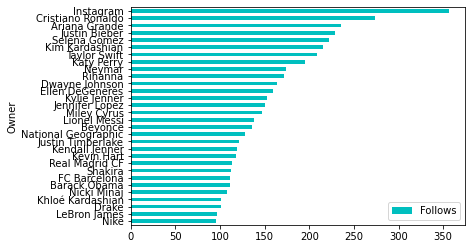

In [ ]:
df[['Owner', 'Follows']].set_index('Owner').nlargest(30,'Follows' ).sort_values(by='Follows').plot(kind='barh', color = 'c')

# คลิป 117 ทำความสะอาดข้อมูล JSON
* ทำเป็น boolean filter ได้

In [ ]:
df=pd.read_json('https://github.com/prasertcbs/basic-dataset/raw/master/top10_quotes.json')
df

,text,author,likes,tags
0,"\n “Don't cry because it's over, smile be...",Dr. Seuss,174616 likes,"[attributed-no-source, cry, crying, experience..."
1,"\n “I'm selfish, impatient and a little i...",Marilyn Monroe,138415 likes,"[attributed-no-source, best, life, love, mista..."
2,\n “Be yourself; everyone else is already...,Oscar Wilde,130176 likes,"[attributed-no-source, be-yourself, honesty, i..."
3,\n “Two things are infinite: the universe...,Albert Einstein,116961 likes,"[attributed-no-source, human-nature, humor, in..."
4,"\n “Be who you are and say what you feel,...",Bernard M. Baruch,111385 likes,"[ataraxy, be-yourself, confidence, fitting-in,..."
5,"\n “So many books, so little time.”\n",Frank Zappa,109930 likes,"[books, humor]"
6,\n “You've gotta dance like there's nobod...,William W. Purkey,108773 likes,"[dance, heaven, hurt, inspirational, life, lov..."
7,\n “A room without books is like a body w...,Marcus Tullius Cicero,107147 likes,"[attributed-no-source, books, simile, soul]"
8,\n “You know you're in love when you can'...,Dr. Seuss,105310 likes,"[attributed-no-source, dreams, love, reality, ..."
9,"\n “You only live once, but if you do it ...",Mae West,97524 likes,"[humor, life]"


In [ ]:
type(df.tags[0]) # เช็คดูเฉยๆ

list

In [ ]:
df.explode('tags').head(3) # ทวนเฉยๆ เดี๋ยวลืม

,text,author,likes,tags
0,"\n “Don't cry because it's over, smile be...",Dr. Seuss,174616 likes,attributed-no-source
0,"\n “Don't cry because it's over, smile be...",Dr. Seuss,174616 likes,cry
0,"\n “Don't cry because it's over, smile be...",Dr. Seuss,174616 likes,crying


In [ ]:
df.likes.str.replace('likes', '').astype('int')

0    174616
1    138415
2    130176
3    116961
4    111385
5    109930
6    108773
7    107147
8    105310
9     97524
Name: likes, dtype: int32

In [ ]:
df.likes.str.replace('[^\d]', '').astype('int')
                    # ทุกอย่างยกเว้นตัวเลข    เเค่จะสื่อว่ามันทำได้หลายเเบบ

C:\Users\Acer\AppData\Local\Temp\ipykernel_9084\185170552.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.likes.str.replace('[^\d]', '').astype('int')


0    174616
1    138415
2    130176
3    116961
4    111385
5    109930
6    108773
7    107147
8    105310
9     97524
Name: likes, dtype: int32

In [ ]:
df.likes.str.replace('\D', '').astype('int')
                    # ทุกอย่างยกเว้นตัวเลข    เเค่จะสื่อว่ามันทำได้หลายเเบบ

C:\Users\Acer\AppData\Local\Temp\ipykernel_9084\2809794067.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.likes.str.replace('\D', '').astype('int')


0    174616
1    138415
2    130176
3    116961
4    111385
5    109930
6    108773
7    107147
8    105310
9     97524
Name: likes, dtype: int32

In [ ]:
df.likes = df.likes.str.replace('\D', '').astype('int')
df

C:\Users\Acer\AppData\Local\Temp\ipykernel_9084\1916348032.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.likes = df.likes.str.replace('\D', '').astype('int')


,text,author,likes,tags
0,"\n “Don't cry because it's over, smile be...",Dr. Seuss,174616,"[attributed-no-source, cry, crying, experience..."
1,"\n “I'm selfish, impatient and a little i...",Marilyn Monroe,138415,"[attributed-no-source, best, life, love, mista..."
2,\n “Be yourself; everyone else is already...,Oscar Wilde,130176,"[attributed-no-source, be-yourself, honesty, i..."
3,\n “Two things are infinite: the universe...,Albert Einstein,116961,"[attributed-no-source, human-nature, humor, in..."
4,"\n “Be who you are and say what you feel,...",Bernard M. Baruch,111385,"[ataraxy, be-yourself, confidence, fitting-in,..."
5,"\n “So many books, so little time.”\n",Frank Zappa,109930,"[books, humor]"
6,\n “You've gotta dance like there's nobod...,William W. Purkey,108773,"[dance, heaven, hurt, inspirational, life, lov..."
7,\n “A room without books is like a body w...,Marcus Tullius Cicero,107147,"[attributed-no-source, books, simile, soul]"
8,\n “You know you're in love when you can'...,Dr. Seuss,105310,"[attributed-no-source, dreams, love, reality, ..."
9,"\n “You only live once, but if you do it ...",Mae West,97524,"[humor, life]"


In [ ]:
df.iloc[0,0] # ให้ดูรายละเอียดเเบบจะจะ

"\n      “Don't cry because it's over, smile because it happened.”\n  "

In [ ]:
df.text.str.replace('[\n“”]', '') # ก็ replace นั่นเเหละ

C:\Users\Acer\AppData\Local\Temp\ipykernel_9084\1558469671.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.text.str.replace('[\n“”]', '') # ก็ replace นั่นเเหละ


0          Don't cry because it's over, smile becau...
1          I'm selfish, impatient and a little inse...
2          Be yourself; everyone else is already ta...
3          Two things are infinite: the universe an...
4          Be who you are and say what you feel, be...
5                     So many books, so little time.  
6          You've gotta dance like there's nobody w...
7          A room without books is like a body with...
8          You know you're in love when you can't f...
9          You only live once, but if you do it rig...
Name: text, dtype: object

In [ ]:
df.text.str.replace('[\n“”]', '').str.strip() # ลบช่างว่างข้างซ้ายเเละขวาออก

C:\Users\Acer\AppData\Local\Temp\ipykernel_9084\1244190887.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.text.str.replace('[\n“”]', '').str.strip() # ลบช่างว่างข้างซ้ายเเละขวาออก


0    Don't cry because it's over, smile because it ...
1    I'm selfish, impatient and a little insecure. ...
2         Be yourself; everyone else is already taken.
3    Two things are infinite: the universe and huma...
4    Be who you are and say what you feel, because ...
5                       So many books, so little time.
6     You've gotta dance like there's nobody watching,
7    A room without books is like a body without a ...
8    You know you're in love when you can't fall as...
9    You only live once, but if you do it right, on...
Name: text, dtype: object

In [ ]:
df.text.str.replace('[\n“”]', '').str.strip()[0] # เช็คดูว่าโอเคยัง

C:\Users\Acer\AppData\Local\Temp\ipykernel_9084\2119132565.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.text.str.replace('[\n“”]', '').str.strip()[0] # เช็คดูว่าโอเคยัง


"Don't cry because it's over, smile because it happened."

In [ ]:
df.text = df.text.str.replace('[\n“”]', '').str.strip()
df

C:\Users\Acer\AppData\Local\Temp\ipykernel_9084\1115849875.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.text = df.text.str.replace('[\n“”]', '').str.strip()


,text,author,likes,tags
0,"Don't cry because it's over, smile because it ...",Dr. Seuss,174616,"[attributed-no-source, cry, crying, experience..."
1,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,138415,"[attributed-no-source, best, life, love, mista..."
2,Be yourself; everyone else is already taken.,Oscar Wilde,130176,"[attributed-no-source, be-yourself, honesty, i..."
3,Two things are infinite: the universe and huma...,Albert Einstein,116961,"[attributed-no-source, human-nature, humor, in..."
4,"Be who you are and say what you feel, because ...",Bernard M. Baruch,111385,"[ataraxy, be-yourself, confidence, fitting-in,..."
5,"So many books, so little time.",Frank Zappa,109930,"[books, humor]"
6,"You've gotta dance like there's nobody watching,",William W. Purkey,108773,"[dance, heaven, hurt, inspirational, life, lov..."
7,A room without books is like a body without a ...,Marcus Tullius Cicero,107147,"[attributed-no-source, books, simile, soul]"
8,You know you're in love when you can't fall as...,Dr. Seuss,105310,"[attributed-no-source, dreams, love, reality, ..."
9,"You only live once, but if you do it right, on...",Mae West,97524,"[humor, life]"


In [ ]:
type(df.tags[0]) # เช็ค type ของ column tage

list

In [ ]:
df.iloc[0,-1] # เเบบนี้ก็บอกได้ว่าเป็น list

['attributed-no-source',
 'cry',
 'crying',
 'experience',
 'happiness',
 'joy',
 'life',
 'misattributed-dr-seuss',
 'optimism',
 'sadness',
 'smile',
 'smiling']

In [ ]:
df.loc[0, 'tags'].remove('attributed-no-source')
df

,text,author,likes,tags
0,"Don't cry because it's over, smile because it ...",Dr. Seuss,174616,"[cry, crying, experience, happiness, joy, life..."
1,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,138415,"[attributed-no-source, best, life, love, mista..."
2,Be yourself; everyone else is already taken.,Oscar Wilde,130176,"[attributed-no-source, be-yourself, honesty, i..."
3,Two things are infinite: the universe and huma...,Albert Einstein,116961,"[attributed-no-source, human-nature, humor, in..."
4,"Be who you are and say what you feel, because ...",Bernard M. Baruch,111385,"[ataraxy, be-yourself, confidence, fitting-in,..."
5,"So many books, so little time.",Frank Zappa,109930,"[books, humor]"
6,"You've gotta dance like there's nobody watching,",William W. Purkey,108773,"[dance, heaven, hurt, inspirational, life, lov..."
7,A room without books is like a body without a ...,Marcus Tullius Cicero,107147,"[attributed-no-source, books, simile, soul]"
8,You know you're in love when you can't fall as...,Dr. Seuss,105310,"[attributed-no-source, dreams, love, reality, ..."
9,"You only live once, but if you do it right, on...",Mae West,97524,"[humor, life]"


In [ ]:
# df.apply(lambda s:s.tags.remove('attributed-no-source'), axis='columns') ทำได้เเหละถ้ามันมี attributed-no-source ทุก index


def remove_(lst:list, s:str): # ก็คือสร้าง def มาเลย      def ออกมาเพื่อกัน error ง่ายๆเลย ********************************************************************************************
    try:
        lst.remove(s)
    except:  # ถ้ามัน error ก็ไม่ต้องให้มันทำอะไร
        pass  

In [ ]:
df.apply(lambda s:remove_(s.tags,'attributed-no-source'), axis='columns')

0    None
1    None
2    None
3    None
4    None
5    None
6    None
7    None
8    None
9    None
dtype: object

In [ ]:
df

,text,author,likes,tags
0,"Don't cry because it's over, smile because it ...",Dr. Seuss,174616,"[cry, crying, experience, happiness, joy, life..."
1,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,138415,"[best, life, love, mistakes, out-of-control, t..."
2,Be yourself; everyone else is already taken.,Oscar Wilde,130176,"[be-yourself, honesty, inspirational, misattri..."
3,Two things are infinite: the universe and huma...,Albert Einstein,116961,"[human-nature, humor, infinity, philosophy, sc..."
4,"Be who you are and say what you feel, because ...",Bernard M. Baruch,111385,"[ataraxy, be-yourself, confidence, fitting-in,..."
5,"So many books, so little time.",Frank Zappa,109930,"[books, humor]"
6,"You've gotta dance like there's nobody watching,",William W. Purkey,108773,"[dance, heaven, hurt, inspirational, life, lov..."
7,A room without books is like a body without a ...,Marcus Tullius Cicero,107147,"[books, simile, soul]"
8,You know you're in love when you can't fall as...,Dr. Seuss,105310,"[dreams, love, reality, sleep]"
9,"You only live once, but if you do it right, on...",Mae West,97524,"[humor, life]"


In [ ]:
df.tags.apply(lambda s: True if 'happiness' in s else False) # *************************************************************************************
                        # ทำเเบบนี้เพื่อนเอาไปเป็น boolean filter ได้ ***************************************************************************************

0     True
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: tags, dtype: bool

In [ ]:
df.apply(lambda s: True if 'happiness' in s.tags else False, axis='columns') # ทำเเบบนี้ก็ได้เหมือนกัน

0     True
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [ ]:
df[df.tags.apply(lambda s: True if 'happiness' in s else False)] # ใส่เป็น boolean filter ก็จะได้ index ที่ต้องการออกมา************************************************************************************

,text,author,likes,tags
0,"Don't cry because it's over, smile because it ...",Dr. Seuss,174616,"[cry, crying, experience, happiness, joy, life..."


In [ ]:
df[df.tags.apply(lambda s: True if 'love' in s else False)] # ลองเล่นๆ

,text,author,likes,tags
1,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,138415,"[best, life, love, mistakes, out-of-control, t..."
6,"You've gotta dance like there's nobody watching,",William W. Purkey,108773,"[dance, heaven, hurt, inspirational, life, lov..."
8,You know you're in love when you can't fall as...,Dr. Seuss,105310,"[dreams, love, reality, sleep]"


In [ ]:
df[df.tags.apply(lambda s: (True if 'love' in s else False) | (True if 'happiness' in s else False))] # 2 เงื่อนไข ************************************************************************************

,text,author,likes,tags
0,"Don't cry because it's over, smile because it ...",Dr. Seuss,174616,"[cry, crying, experience, happiness, joy, life..."
1,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,138415,"[best, life, love, mistakes, out-of-control, t..."
6,"You've gotta dance like there's nobody watching,",William W. Purkey,108773,"[dance, heaven, hurt, inspirational, life, lov..."
8,You know you're in love when you can't fall as...,Dr. Seuss,105310,"[dreams, love, reality, sleep]"


In [ ]:
dt = df.explode('tags')
dt.head(3)

,text,author,likes,tags
0,"Don't cry because it's over, smile because it ...",Dr. Seuss,174616,cry
0,"Don't cry because it's over, smile because it ...",Dr. Seuss,174616,crying
0,"Don't cry because it's over, smile because it ...",Dr. Seuss,174616,experience


In [ ]:
dt[dt.tags == 'love']

,text,author,likes,tags
1,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,138415,love
6,"You've gotta dance like there's nobody watching,",William W. Purkey,108773,love
8,You know you're in love when you can't fall as...,Dr. Seuss,105310,love


In [ ]:
dt[dt.tags == 'love'].index

Int64Index([1, 6, 8], dtype='int64')

In [ ]:
dt[(dt.tags == 'love') | (dt.tags == 'happiness')].index

Int64Index([0, 1, 6, 8], dtype='int64')

In [ ]:
df.iloc[dt[(dt.tags == 'love') | (dt.tags == 'happiness')].index, :] # อันนี้คือต้องไปหา index มาให้ได้ก่อน***********************************************************************************

,text,author,likes,tags
0,"Don't cry because it's over, smile because it ...",Dr. Seuss,174616,"[cry, crying, experience, happiness, joy, life..."
1,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,138415,"[best, life, love, mistakes, out-of-control, t..."
6,"You've gotta dance like there's nobody watching,",William W. Purkey,108773,"[dance, heaven, hurt, inspirational, life, lov..."
8,You know you're in love when you can't fall as...,Dr. Seuss,105310,"[dreams, love, reality, sleep]"


# คลิป 118 ดึงข้อมูล JSON จาก public RESTful APIs เช่น อัตราแลกเปลี่ยน พยากรณ์อากาศ Pokemon

In [ ]:
import pandas as pd
from pandas.io.json import json_normalize
import json
import requests
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def get_api_result(url): # สร้างมาเพื่ออ่านข้อมูล
    r = requests.get(url)
    return json.loads(r.text)

In [ ]:
url='https://api.exchangeratesapi.io/latest' # default currency base is EUR
j=get_api_result(url)
j

{'success': False,
 'error': {'code': 101,
  'type': 'missing_access_key',
  'info': 'You have not supplied an API Access Key. [Required format: access_key=YOUR_ACCESS_KEY]'}}

In [ ]:
url='https://api.exchangeratesapi.io/latest?base=USD' # base on USD
j=get_api_result(url)
j

{'success': False,
 'error': {'code': 101,
  'type': 'missing_access_key',
  'info': 'You have not supplied an API Access Key. [Required format: access_key=YOUR_ACCESS_KEY]'}}

In [ ]:
url='https://api.exchangeratesapi.io/history?start_at=2019-12-01&end_at=2019-12-31&base=USD&symbols=THB'
j=get_api_result(url)
j

{'success': False,
 'error': {'code': 101,
  'type': 'missing_access_key',
  'info': 'You have not supplied an API Access Key. [Required format: access_key=YOUR_ACCESS_KEY]'}}

In [ ]:
# อ่านไม่ได้

# url='https://www.metaweather.com/api/location/search/?query=bangkok'
# j=get_api_result(url)   
# j

In [ ]:
poke_name='raichu' # rhydon
# poke_name='rhydon' # rhydon

url=f'https://pokeapi.co/api/v2/pokemon/{poke_name}'
j=get_api_result(url)
j

{'abilities': [{'ability': {'name': 'static',
    'url': 'https://pokeapi.co/api/v2/ability/9/'},
   'is_hidden': False,
   'slot': 1},
  {'ability': {'name': 'lightning-rod',
    'url': 'https://pokeapi.co/api/v2/ability/31/'},
   'is_hidden': True,
   'slot': 3}],
 'base_experience': 243,
 'forms': [{'name': 'raichu',
   'url': 'https://pokeapi.co/api/v2/pokemon-form/26/'}],
 'game_indices': [{'game_index': 85,
   'version': {'name': 'red', 'url': 'https://pokeapi.co/api/v2/version/1/'}},
  {'game_index': 85,
   'version': {'name': 'blue', 'url': 'https://pokeapi.co/api/v2/version/2/'}},
  {'game_index': 85,
   'version': {'name': 'yellow',
    'url': 'https://pokeapi.co/api/v2/version/3/'}},
  {'game_index': 26,
   'version': {'name': 'gold', 'url': 'https://pokeapi.co/api/v2/version/4/'}},
  {'game_index': 26,
   'version': {'name': 'silver',
    'url': 'https://pokeapi.co/api/v2/version/5/'}},
  {'game_index': 26,
   'version': {'name': 'crystal',
    'url': 'https://pokeapi.co/ap

In [ ]:
j['abilities']

[{'ability': {'name': 'static', 'url': 'https://pokeapi.co/api/v2/ability/9/'},
  'is_hidden': False,
  'slot': 1},
 {'ability': {'name': 'lightning-rod',
   'url': 'https://pokeapi.co/api/v2/ability/31/'},
  'is_hidden': True,
  'slot': 3}]

In [ ]:
pd.DataFrame(j['abilities'])

,ability,is_hidden,slot
0,"{'name': 'static', 'url': 'https://pokeapi.co/...",False,1
1,"{'name': 'lightning-rod', 'url': 'https://poke...",True,3


# คลิป 119 รู้จักกับ JSON string format แบบต่าง ๆ ที่ pandas รองรับ 

In [ ]:
import json

In [ ]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/icecream.csv')
df.head(3)

,flavour,calories,fat_g,carb_g,sugar_g,protein_g
0,Bananas Foster,160,8.0,20,16,2.0
1,Baseball Nut,160,9.0,19,13,3.0
2,Beavertails Pastry,170,9.0,21,15,3.0


In [ ]:
orients=['split','records','index','columns','values','table']
orients

['split', 'records', 'index', 'columns', 'values', 'table']

In [ ]:
df[:2].to_json() # เป็น dictionary(json) ที่อยู่ในรูปของ str

'{"flavour":{"0":"Bananas Foster","1":"Baseball Nut"},"calories":{"0":160,"1":160},"fat_g":{"0":8.0,"1":9.0},"carb_g":{"0":20,"1":19},"sugar_g":{"0":16,"1":13},"protein_g":{"0":2.0,"1":3.0}}'

In [ ]:
s = df[:2].to_json()
j = json.loads(s)
j

{'flavour': {'0': 'Bananas Foster', '1': 'Baseball Nut'},
 'calories': {'0': 160, '1': 160},
 'fat_g': {'0': 8.0, '1': 9.0},
 'carb_g': {'0': 20, '1': 19},
 'sugar_g': {'0': 16, '1': 13},
 'protein_g': {'0': 2.0, '1': 3.0}}

In [ ]:
json.dumps(j, indent=2)

'{\n  "flavour": {\n    "0": "Bananas Foster",\n    "1": "Baseball Nut"\n  },\n  "calories": {\n    "0": 160,\n    "1": 160\n  },\n  "fat_g": {\n    "0": 8.0,\n    "1": 9.0\n  },\n  "carb_g": {\n    "0": 20,\n    "1": 19\n  },\n  "sugar_g": {\n    "0": 16,\n    "1": 13\n  },\n  "protein_g": {\n    "0": 2.0,\n    "1": 3.0\n  }\n}'

In [ ]:
print(json.dumps(j, indent=2)) # indent=2 คือ tab(\t)

{
  "flavour": {
    "0": "Bananas Foster",
    "1": "Baseball Nut"
  },
  "calories": {
    "0": 160,
    "1": 160
  },
  "fat_g": {
    "0": 8.0,
    "1": 9.0
  },
  "carb_g": {
    "0": 20,
    "1": 19
  },
  "sugar_g": {
    "0": 16,
    "1": 13
  },
  "protein_g": {
    "0": 2.0,
    "1": 3.0
  }
}


In [ ]:
s=df[:2].to_json(orient='records') # เเค่จะให้ดูความเเต่ต่าง ข้างบนกับข้างล่างอันไหนดูโอเคกว่ากัน
j=json.loads(s)
j

[{'flavour': 'Bananas Foster',
  'calories': 160,
  'fat_g': 8.0,
  'carb_g': 20,
  'sugar_g': 16,
  'protein_g': 2.0},
 {'flavour': 'Baseball Nut',
  'calories': 160,
  'fat_g': 9.0,
  'carb_g': 19,
  'sugar_g': 13,
  'protein_g': 3.0}]

In [ ]:
orients=['split','records','index','columns','values','table'] # orients == 'columns' คือ default

# เเค่จะสื่อว่ามันมีหลาย format มากในการการอ่านเข้ามาหรืออ่าน ขึ้นอยู่กับความชอบ

for fmt in orients:
    s=df[:2].to_json(orient=fmt)
    df[:2].to_json(f'ic_{fmt}.json', orient=fmt) # save to file
    
    j=json.loads(s)
    print(f'orient = {fmt}')
    print(json.dumps(j, indent=4)) 
    print('-' * 80)

orient = split
{
    "columns": [
        "flavour",
        "calories",
        "fat_g",
        "carb_g",
        "sugar_g",
        "protein_g"
    ],
    "index": [
        0,
        1
    ],
    "data": [
        [
            "Bananas Foster",
            160,
            8.0,
            20,
            16,
            2.0
        ],
        [
            "Baseball Nut",
            160,
            9.0,
            19,
            13,
            3.0
        ]
    ]
}
--------------------------------------------------------------------------------
orient = records
[
    {
        "flavour": "Bananas Foster",
        "calories": 160,
        "fat_g": 8.0,
        "carb_g": 20,
        "sugar_g": 16,
        "protein_g": 2.0
    },
    {
        "flavour": "Baseball Nut",
        "calories": 160,
        "fat_g": 9.0,
        "carb_g": 19,
        "sugar_g": 13,
        "protein_g": 3.0
    }
]
--------------------------------------------------------------------------------
orie

## Ex

In [ ]:
url = 'https://github.com/fanzeyi/pokemon.json/raw/master/pokedex.json'
# url = 'https://github.com/prasertcbs/basic-dataset/raw/master/pokemon/pokedex_5_samples.json'
df=pd.read_json(url, orient='records')
df.head()

,id,name,type,base
0,1,"{'english': 'Bulbasaur', 'japanese': 'フシギダネ', ...","[Grass, Poison]","{'HP': 45, 'Attack': 49, 'Defense': 49, 'Sp. A..."
1,2,"{'english': 'Ivysaur', 'japanese': 'フシギソウ', 'c...","[Grass, Poison]","{'HP': 60, 'Attack': 62, 'Defense': 63, 'Sp. A..."
2,3,"{'english': 'Venusaur', 'japanese': 'フシギバナ', '...","[Grass, Poison]","{'HP': 80, 'Attack': 82, 'Defense': 83, 'Sp. A..."
3,4,"{'english': 'Charmander', 'japanese': 'ヒトカゲ', ...",[Fire],"{'HP': 39, 'Attack': 52, 'Defense': 43, 'Sp. A..."
4,5,"{'english': 'Charmeleon', 'japanese': 'リザード', ...",[Fire],"{'HP': 58, 'Attack': 64, 'Defense': 58, 'Sp. A..."


In [ ]:
df.loc[0, 'name'] # มันเป้น dictionary ซ้อนกันเข้าไปอีก

{'english': 'Bulbasaur',
 'japanese': 'フシギダネ',
 'chinese': '妙蛙种子',
 'french': 'Bulbizarre'}

In [ ]:
type(df.loc[0, 'name'])

dict

In [ ]:
type(df.loc[0, 'type'])

list

In [ ]:
type(df.loc[0, 'base'])

dict

# คลิป 120 การจัดการกับคอลัมน์ใน DataFrame ที่เก็บค่าแบบ dict และ list

In [ ]:
url = 'https://github.com/prasertcbs/basic-dataset/raw/master/pokemon/pokedex_5_samples.json'
df=pd.read_json(url, orient='records')
df.head()           # orient ก็ต้องให้ถูกกับชนิดไฟล์ที่เก็บเอาไว้ ไม่งั้นมันจะอ่านออกมาไม่ถูก

,id,name,type,base
0,1,"{'english': 'Bulbasaur', 'japanese': 'フシギダネ', ...","[Grass, Poison]","{'HP': 45, 'Attack': 49, 'Defense': 49, 'Sp. A..."
1,2,"{'english': 'Ivysaur', 'japanese': 'フシギソウ', 'c...","[Grass, Poison]","{'HP': 60, 'Attack': 62, 'Defense': 63, 'Sp. A..."
2,3,"{'english': 'Venusaur', 'japanese': 'フシギバナ', '...","[Grass, Poison]","{'HP': 80, 'Attack': 82, 'Defense': 83, 'Sp. A..."
3,4,"{'english': 'Charmander', 'japanese': 'ヒトカゲ', ...",[Fire],"{'HP': 39, 'Attack': 52, 'Defense': 43, 'Sp. A..."
4,5,"{'english': 'Charmeleon', 'japanese': 'リザード', ...",[Fire],"{'HP': 58, 'Attack': 64, 'Defense': 58, 'Sp. A..."


In [ ]:
df.name[0]

{'english': 'Bulbasaur',
 'japanese': 'フシギダネ',
 'chinese': '妙蛙种子',
 'french': 'Bulbizarre'}

In [ ]:
type(df.name[0])

dict

In [ ]:
type(df.type[0])

list

In [ ]:
df.name[0]['english']

'Bulbasaur'

In [ ]:
df

,id,name,type,base
0,1,"{'english': 'Bulbasaur', 'japanese': 'フシギダネ', ...","[Grass, Poison]","{'HP': 45, 'Attack': 49, 'Defense': 49, 'Sp. A..."
1,2,"{'english': 'Ivysaur', 'japanese': 'フシギソウ', 'c...","[Grass, Poison]","{'HP': 60, 'Attack': 62, 'Defense': 63, 'Sp. A..."
2,3,"{'english': 'Venusaur', 'japanese': 'フシギバナ', '...","[Grass, Poison]","{'HP': 80, 'Attack': 82, 'Defense': 83, 'Sp. A..."
3,4,"{'english': 'Charmander', 'japanese': 'ヒトカゲ', ...",[Fire],"{'HP': 39, 'Attack': 52, 'Defense': 43, 'Sp. A..."
4,5,"{'english': 'Charmeleon', 'japanese': 'リザード', ...",[Fire],"{'HP': 58, 'Attack': 64, 'Defense': 58, 'Sp. A..."


In [ ]:
df.name.apply(lambda s:s['english']) # ดึงข้อมูลออกมา

0     Bulbasaur
1       Ivysaur
2      Venusaur
3    Charmander
4    Charmeleon
Name: name, dtype: object

In [ ]:
df['name_eng'] = df.name.apply(lambda s:s['english'])
df

,id,name,type,base,name_eng
0,1,"{'english': 'Bulbasaur', 'japanese': 'フシギダネ', ...","[Grass, Poison]","{'HP': 45, 'Attack': 49, 'Defense': 49, 'Sp. A...",Bulbasaur
1,2,"{'english': 'Ivysaur', 'japanese': 'フシギソウ', 'c...","[Grass, Poison]","{'HP': 60, 'Attack': 62, 'Defense': 63, 'Sp. A...",Ivysaur
2,3,"{'english': 'Venusaur', 'japanese': 'フシギバナ', '...","[Grass, Poison]","{'HP': 80, 'Attack': 82, 'Defense': 83, 'Sp. A...",Venusaur
3,4,"{'english': 'Charmander', 'japanese': 'ヒトカゲ', ...",[Fire],"{'HP': 39, 'Attack': 52, 'Defense': 43, 'Sp. A...",Charmander
4,5,"{'english': 'Charmeleon', 'japanese': 'リザード', ...",[Fire],"{'HP': 58, 'Attack': 64, 'Defense': 58, 'Sp. A...",Charmeleon


In [ ]:
df.name.apply(lambda s:f"{s['english']}({s['japanese']})")

0    Bulbasaur(フシギダネ)
1      Ivysaur(フシギソウ)
2     Venusaur(フシギバナ)
3    Charmander(ヒトカゲ)
4    Charmeleon(リザード)
Name: name, dtype: object

In [ ]:
df['Pokemon'] = df.name.apply(lambda s:f"{s['english']}({s['japanese']})")
df

,id,name,type,base,name_eng,Pokemon
0,1,"{'english': 'Bulbasaur', 'japanese': 'フシギダネ', ...","[Grass, Poison]","{'HP': 45, 'Attack': 49, 'Defense': 49, 'Sp. A...",Bulbasaur,Bulbasaur(フシギダネ)
1,2,"{'english': 'Ivysaur', 'japanese': 'フシギソウ', 'c...","[Grass, Poison]","{'HP': 60, 'Attack': 62, 'Defense': 63, 'Sp. A...",Ivysaur,Ivysaur(フシギソウ)
2,3,"{'english': 'Venusaur', 'japanese': 'フシギバナ', '...","[Grass, Poison]","{'HP': 80, 'Attack': 82, 'Defense': 83, 'Sp. A...",Venusaur,Venusaur(フシギバナ)
3,4,"{'english': 'Charmander', 'japanese': 'ヒトカゲ', ...",[Fire],"{'HP': 39, 'Attack': 52, 'Defense': 43, 'Sp. A...",Charmander,Charmander(ヒトカゲ)
4,5,"{'english': 'Charmeleon', 'japanese': 'リザード', ...",[Fire],"{'HP': 58, 'Attack': 64, 'Defense': 58, 'Sp. A...",Charmeleon,Charmeleon(リザード)


In [ ]:
type(df.type[0])

list

In [ ]:
df.type.apply(lambda s:s[0])

0    Grass
1    Grass
2    Grass
3     Fire
4     Fire
Name: type, dtype: object

In [ ]:
df['main_type'] = df.type.apply(lambda s:s[0])
df

,id,name,type,base,name_eng,Pokemon,main_type
0,1,"{'english': 'Bulbasaur', 'japanese': 'フシギダネ', ...","[Grass, Poison]","{'HP': 45, 'Attack': 49, 'Defense': 49, 'Sp. A...",Bulbasaur,Bulbasaur(フシギダネ),Grass
1,2,"{'english': 'Ivysaur', 'japanese': 'フシギソウ', 'c...","[Grass, Poison]","{'HP': 60, 'Attack': 62, 'Defense': 63, 'Sp. A...",Ivysaur,Ivysaur(フシギソウ),Grass
2,3,"{'english': 'Venusaur', 'japanese': 'フシギバナ', '...","[Grass, Poison]","{'HP': 80, 'Attack': 82, 'Defense': 83, 'Sp. A...",Venusaur,Venusaur(フシギバナ),Grass
3,4,"{'english': 'Charmander', 'japanese': 'ヒトカゲ', ...",[Fire],"{'HP': 39, 'Attack': 52, 'Defense': 43, 'Sp. A...",Charmander,Charmander(ヒトカゲ),Fire
4,5,"{'english': 'Charmeleon', 'japanese': 'リザード', ...",[Fire],"{'HP': 58, 'Attack': 64, 'Defense': 58, 'Sp. A...",Charmeleon,Charmeleon(リザード),Fire


## test 

In [ ]:
url = 'https://github.com/prasertcbs/basic-dataset/raw/master/pokemon/pokedex_5_samples.json'
df=pd.read_json(url, orient='records')
df.head()

,id,name,type,base
0,1,"{'english': 'Bulbasaur', 'japanese': 'フシギダネ', ...","[Grass, Poison]","{'HP': 45, 'Attack': 49, 'Defense': 49, 'Sp. A..."
1,2,"{'english': 'Ivysaur', 'japanese': 'フシギソウ', 'c...","[Grass, Poison]","{'HP': 60, 'Attack': 62, 'Defense': 63, 'Sp. A..."
2,3,"{'english': 'Venusaur', 'japanese': 'フシギバナ', '...","[Grass, Poison]","{'HP': 80, 'Attack': 82, 'Defense': 83, 'Sp. A..."
3,4,"{'english': 'Charmander', 'japanese': 'ヒトカゲ', ...",[Fire],"{'HP': 39, 'Attack': 52, 'Defense': 43, 'Sp. A..."
4,5,"{'english': 'Charmeleon', 'japanese': 'リザード', ...",[Fire],"{'HP': 58, 'Attack': 64, 'Defense': 58, 'Sp. A..."


In [ ]:
from pandas.io.json import json_normalize

In [ ]:
df.name

0    {'english': 'Bulbasaur', 'japanese': 'フシギダネ', ...
1    {'english': 'Ivysaur', 'japanese': 'フシギソウ', 'c...
2    {'english': 'Venusaur', 'japanese': 'フシギバナ', '...
3    {'english': 'Charmander', 'japanese': 'ヒトカゲ', ...
4    {'english': 'Charmeleon', 'japanese': 'リザード', ...
Name: name, dtype: object

In [ ]:
json_normalize(df.name) # เอา dictionary มาสร้างเป็น df เลย ***********************************************************************************
                        # ******************************************************************************************************************

C:\Users\Acer\AppData\Local\Temp\ipykernel_9084\2176156981.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  json_normalize(df.name) # เอา dictionary มาสร้างเป็น df เลย ***********************************************************************************


,english,japanese,chinese,french
0,Bulbasaur,フシギダネ,妙蛙种子,Bulbizarre
1,Ivysaur,フシギソウ,妙蛙草,Herbizarre
2,Venusaur,フシギバナ,妙蛙花,Florizarre
3,Charmander,ヒトカゲ,小火龙,Salamèche
4,Charmeleon,リザード,火恐龙,Reptincel


In [ ]:
json_normalize(df.base)

C:\Users\Acer\AppData\Local\Temp\ipykernel_9084\2018639012.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  json_normalize(df.base)


,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,39,52,43,60,50,65
4,58,64,58,80,65,80


In [ ]:
dp = pd.concat([df, json_normalize(df.name)], axis='columns') # เอามาต่อกันทาง columns(axis='columns') ถ้าไม่ระบุมันจะเอาไปต่อทาง index โดย auto
dp

C:\Users\Acer\AppData\Local\Temp\ipykernel_9084\108732913.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  dp = pd.concat([df, json_normalize(df.name)], axis='columns') # เอามาต่อกันทาง columns(axis='columns') ถ้าไม่ระบุมันจะเอาไปต่อทาง index โดย auto


,id,name,type,base,english,japanese,chinese,french
0,1,"{'english': 'Bulbasaur', 'japanese': 'フシギダネ', ...","[Grass, Poison]","{'HP': 45, 'Attack': 49, 'Defense': 49, 'Sp. A...",Bulbasaur,フシギダネ,妙蛙种子,Bulbizarre
1,2,"{'english': 'Ivysaur', 'japanese': 'フシギソウ', 'c...","[Grass, Poison]","{'HP': 60, 'Attack': 62, 'Defense': 63, 'Sp. A...",Ivysaur,フシギソウ,妙蛙草,Herbizarre
2,3,"{'english': 'Venusaur', 'japanese': 'フシギバナ', '...","[Grass, Poison]","{'HP': 80, 'Attack': 82, 'Defense': 83, 'Sp. A...",Venusaur,フシギバナ,妙蛙花,Florizarre
3,4,"{'english': 'Charmander', 'japanese': 'ヒトカゲ', ...",[Fire],"{'HP': 39, 'Attack': 52, 'Defense': 43, 'Sp. A...",Charmander,ヒトカゲ,小火龙,Salamèche
4,5,"{'english': 'Charmeleon', 'japanese': 'リザード', ...",[Fire],"{'HP': 58, 'Attack': 64, 'Defense': 58, 'Sp. A...",Charmeleon,リザード,火恐龙,Reptincel


In [ ]:
df.name[0].keys()

dict_keys(['english', 'japanese', 'chinese', 'french'])

In [ ]:
df.type

0    [Grass, Poison]
1    [Grass, Poison]
2    [Grass, Poison]
3             [Fire]
4             [Fire]
Name: type, dtype: object

In [ ]:
# หา Grass  ทำเอง   ใช้ apply, if else, boolean ในการทำ

df.type.apply(lambda s: True if 'Grass' in s else False) # ใช้คำสั่ง if เเละ Boolean เพื่อหา Grass ที่อยู่ข้างใน

0     True
1     True
2     True
3    False
4    False
Name: type, dtype: bool

In [ ]:
df[df.type.apply(lambda s: True if 'Grass' in s else False)] # เเล้วก็จะได้เเบบนี้ออกมา

,id,name,type,base
0,1,"{'english': 'Bulbasaur', 'japanese': 'フシギダネ', ...","[Grass, Poison]","{'HP': 45, 'Attack': 49, 'Defense': 49, 'Sp. A..."
1,2,"{'english': 'Ivysaur', 'japanese': 'フシギソウ', 'c...","[Grass, Poison]","{'HP': 60, 'Attack': 62, 'Defense': 63, 'Sp. A..."
2,3,"{'english': 'Venusaur', 'japanese': 'フシギバナ', '...","[Grass, Poison]","{'HP': 80, 'Attack': 82, 'Defense': 83, 'Sp. A..."


In [ ]:
# หา Grass วิธีที่ 2  ใช้ explode ในการทำ

dt = df.explode('type')
dt

,id,name,type,base
0,1,"{'english': 'Bulbasaur', 'japanese': 'フシギダネ', ...",Grass,"{'HP': 45, 'Attack': 49, 'Defense': 49, 'Sp. A..."
0,1,"{'english': 'Bulbasaur', 'japanese': 'フシギダネ', ...",Poison,"{'HP': 45, 'Attack': 49, 'Defense': 49, 'Sp. A..."
1,2,"{'english': 'Ivysaur', 'japanese': 'フシギソウ', 'c...",Grass,"{'HP': 60, 'Attack': 62, 'Defense': 63, 'Sp. A..."
1,2,"{'english': 'Ivysaur', 'japanese': 'フシギソウ', 'c...",Poison,"{'HP': 60, 'Attack': 62, 'Defense': 63, 'Sp. A..."
2,3,"{'english': 'Venusaur', 'japanese': 'フシギバナ', '...",Grass,"{'HP': 80, 'Attack': 82, 'Defense': 83, 'Sp. A..."
2,3,"{'english': 'Venusaur', 'japanese': 'フシギバナ', '...",Poison,"{'HP': 80, 'Attack': 82, 'Defense': 83, 'Sp. A..."
3,4,"{'english': 'Charmander', 'japanese': 'ヒトカゲ', ...",Fire,"{'HP': 39, 'Attack': 52, 'Defense': 43, 'Sp. A..."
4,5,"{'english': 'Charmeleon', 'japanese': 'リザード', ...",Fire,"{'HP': 58, 'Attack': 64, 'Defense': 58, 'Sp. A..."


In [ ]:
dt.type == 'Grass'

0     True
0    False
1     True
1    False
2     True
2    False
3    False
4    False
Name: type, dtype: bool

In [ ]:
dt[dt.type == 'Grass']

,id,name,type,base
0,1,"{'english': 'Bulbasaur', 'japanese': 'フシギダネ', ...",Grass,"{'HP': 45, 'Attack': 49, 'Defense': 49, 'Sp. A..."
1,2,"{'english': 'Ivysaur', 'japanese': 'フシギソウ', 'c...",Grass,"{'HP': 60, 'Attack': 62, 'Defense': 63, 'Sp. A..."
2,3,"{'english': 'Venusaur', 'japanese': 'フシギバナ', '...",Grass,"{'HP': 80, 'Attack': 82, 'Defense': 83, 'Sp. A..."


# คลิป 121 การดึงข้อมูลดัชนีตลาดหุ้นทั่วโลกแบบรายวัน (get daily stock market index)

In [ ]:
import pandas_datareader.data as web
import seaborn as sns

In [ ]:
df=web.DataReader('^SET', data_source='stooq')
df                 # หุ้น ไทย     จาก stooq
# ได้ย้อนหลัง 5 ปี

,Open,High,Low,Close,Volume
Date,,,,,
2023-06-08,1533.56,1559.50,1530.55,1559.50,NaN
2023-06-07,1531.30,1534.69,1522.30,1533.21,4.784129e+09
2023-06-06,1537.62,1539.49,1526.93,1528.54,4.604388e+09
2023-06-02,1526.87,1534.49,1524.52,1531.20,5.346640e+09
2023-06-01,1534.16,1536.76,1521.31,1521.40,4.511417e+09
...,...,...,...,...,...
2018-06-15,1706.52,1710.54,1695.66,1704.82,NaN
2018-06-14,1714.52,1714.62,1700.03,1709.86,NaN
2018-06-13,1725.86,1728.19,1716.77,1718.34,NaN


In [ ]:
df.sort_index(inplace=True)
df

,Open,High,Low,Close,Volume
Date,,,,,
2018-06-11,1723.80,1727.25,1716.33,1723.11,NaN
2018-06-12,1725.91,1735.34,1725.91,1727.29,NaN
2018-06-13,1725.86,1728.19,1716.77,1718.34,NaN
2018-06-14,1714.52,1714.62,1700.03,1709.86,NaN
2018-06-15,1706.52,1710.54,1695.66,1704.82,NaN
...,...,...,...,...,...
2023-06-01,1534.16,1536.76,1521.31,1521.40,4.511417e+09
2023-06-02,1526.87,1534.49,1524.52,1531.20,5.346640e+09
2023-06-06,1537.62,1539.49,1526.93,1528.54,4.604388e+09


<AxesSubplot: xlabel='Date'>

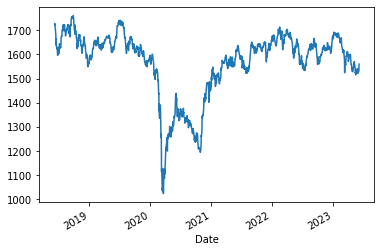

In [ ]:
df.Close.plot()

<AxesSubplot: xlabel='Date', ylabel='Close'>

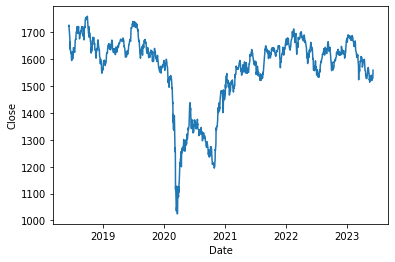

In [ ]:
sns.lineplot(x = df.index, y = df.Close)

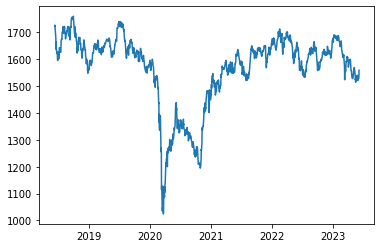

In [ ]:
plt.plot(df.index, df.Close)

In [ ]:
df.Close.pct_change() # คิกเป็น %

Date
2018-06-11         NaN
2018-06-12    0.002426
2018-06-13   -0.005182
2018-06-14   -0.004935
2018-06-15   -0.002948
                ...   
2023-06-01   -0.007916
2023-06-02    0.006441
2023-06-06   -0.001737
2023-06-07    0.003055
2023-06-08    0.017147
Name: Close, Length: 1212, dtype: float64

<AxesSubplot: >

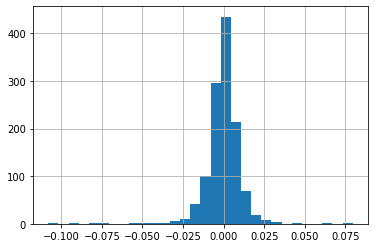

In [ ]:
df.Close.pct_change().hist(bins=30)
                            # bins คือ จำนวนเเท่ง

In [ ]:
df.Close[0]

1723.11

In [ ]:
((df.Close - df.Close[0]) / df.Close[0]) * 100 # คิดเเบบเทียบกับวันเเรกว่าเพิ่มขึ้นหรือลดลง

Date
2018-06-11     0.000000
2018-06-12     0.242585
2018-06-13    -0.276825
2018-06-14    -0.768958
2018-06-15    -1.061453
                ...    
2023-06-01   -11.706159
2023-06-02   -11.137420
2023-06-06   -11.291792
2023-06-07   -11.020771
2023-06-08    -9.495041
Name: Close, Length: 1212, dtype: float64

In [ ]:
df['chg_first(%)'] = ((df.Close - df.Close[0]) / df.Close[0]) * 100
df

,Open,High,Low,Close,Volume,chg_first(%)
Date,,,,,,
2018-06-11,1723.80,1727.25,1716.33,1723.11,NaN,0.000000
2018-06-12,1725.91,1735.34,1725.91,1727.29,NaN,0.242585
2018-06-13,1725.86,1728.19,1716.77,1718.34,NaN,-0.276825
2018-06-14,1714.52,1714.62,1700.03,1709.86,NaN,-0.768958
2018-06-15,1706.52,1710.54,1695.66,1704.82,NaN,-1.061453
...,...,...,...,...,...,...
2023-06-01,1534.16,1536.76,1521.31,1521.40,4.511417e+09,-11.706159
2023-06-02,1526.87,1534.49,1524.52,1531.20,5.346640e+09,-11.137420
2023-06-06,1537.62,1539.49,1526.93,1528.54,4.604388e+09,-11.291792


<AxesSubplot: xlabel='Date'>

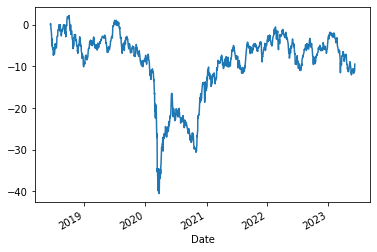

In [ ]:
df['chg_first(%)'].plot()

## read multiple indices

In [ ]:
df=web.DataReader(['^SET', '^DJI'], data_source='stooq')
df

Attributes    Close               High                Low               Open  \
Symbols        ^SET      ^DJI     ^SET      ^DJI     ^SET      ^DJI     ^SET   
Date                                                                           
2018-06-11  1723.11  25322.31  1727.25  25402.83  1716.33  25290.20  1723.80   
2018-06-12  1727.29  25320.73  1735.34  25364.37  1725.91  25247.04  1725.91   
2018-06-13  1718.34  25201.20  1728.19  25362.07  1716.77  25191.42  1725.86   
2018-06-14  1709.86  25175.31  1714.62  25332.50  1700.03  25138.60  1714.52   
2018-06-15  1704.82  25090.48  1710.54  25130.82  1695.66  24894.38  1706.52   
...             ...       ...      ...       ...      ...       ...      ...   
2023-06-02  1531.20  33762.76  1534.49  33805.00  1524.52  33187.58  1526.87   
2023-06-05      NaN  33562.86      NaN  33804.22      NaN  33552.79      NaN   
2023-06-06  1528.54  33573.28  1539.49  33631.25  1526.93  33399.69  1537.62   
2023-06-07  1533.21  33665.02  1534.69  33708.78  1522.30  33546.11  1531.30   
2023-06-08  1559.50  33833.61  1559.50  33873.81  1530.55  33630.04  1533.56   

Attributes                  Volume               
Symbols         ^DJI          ^SET         ^DJI  
Date                                             
2018-06-11  25336.67           NaN  276821832.0  
2018-06-12  25346.82           NaN  265725748.0  
2018-06-13  25328.65           NaN  329784159.0  
2018-06-14  25254.65           NaN  341117350.0  
2018-06-15  25116.71           NaN  659457895.0  
...              ...           ...          ...  
2023-06-02  33187.58  5.346640e+09  389552042.0  
2023-06-05  33771.13           NaN  371843384.0  
2023-06-06  33547.67  4.604388e+09  296025484.0  
2023-06-07  33562.47  4.784129e+09  351805148.0  
2023-06-08  33656.98           NaN  272812774.0  

[1297 rows x 10 columns]

In [ ]:
df.Close

Symbols,^SET,^DJI
Date,,
2018-06-11,1723.11,25322.31
2018-06-12,1727.29,25320.73
2018-06-13,1718.34,25201.20
2018-06-14,1709.86,25175.31
2018-06-15,1704.82,25090.48
...,...,...
2023-06-02,1531.20,33762.76
2023-06-05,NaN,33562.86
2023-06-06,1528.54,33573.28


In [ ]:
df.Close['^SET']

Date
2018-06-11    1723.11
2018-06-12    1727.29
2018-06-13    1718.34
2018-06-14    1709.86
2018-06-15    1704.82
               ...   
2023-06-02    1531.20
2023-06-05        NaN
2023-06-06    1528.54
2023-06-07    1533.21
2023-06-08    1559.50
Name: ^SET, Length: 1297, dtype: float64

In [ ]:
df.Close.corr()

Symbols,^SET,^DJI
Symbols,,
^SET,1.000000,0.302592
^DJI,0.302592,1.000000


<AxesSubplot: xlabel='Date', ylabel='^SET'>

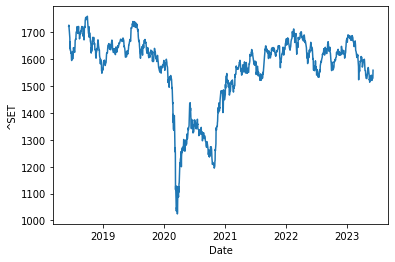

In [ ]:
sns.lineplot(x=df.index, y=df['Close']['^SET'])

<AxesSubplot: xlabel='Date', ylabel='^SET'>

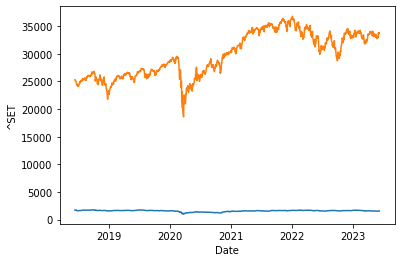

In [ ]:
sns.lineplot(x=df.index, y=df['Close']['^SET'])
sns.lineplot(x=df.index, y=df['Close']['^DJI'])

In [ ]:
df['SET_chg_first']=(df['Close']['^SET'] / df['Close']['^SET'][0] - 1) * 100
df['DJI_chg_first']=(df['Close']['^DJI'] / df['Close']['^DJI'][0] - 1) * 100
df # คิดเป็น % เลยละกัน

Attributes    Close               High                Low               Open  \
Symbols        ^SET      ^DJI     ^SET      ^DJI     ^SET      ^DJI     ^SET   
Date                                                                           
2018-06-11  1723.11  25322.31  1727.25  25402.83  1716.33  25290.20  1723.80   
2018-06-12  1727.29  25320.73  1735.34  25364.37  1725.91  25247.04  1725.91   
2018-06-13  1718.34  25201.20  1728.19  25362.07  1716.77  25191.42  1725.86   
2018-06-14  1709.86  25175.31  1714.62  25332.50  1700.03  25138.60  1714.52   
2018-06-15  1704.82  25090.48  1710.54  25130.82  1695.66  24894.38  1706.52   
...             ...       ...      ...       ...      ...       ...      ...   
2023-06-02  1531.20  33762.76  1534.49  33805.00  1524.52  33187.58  1526.87   
2023-06-05      NaN  33562.86      NaN  33804.22      NaN  33552.79      NaN   
2023-06-06  1528.54  33573.28  1539.49  33631.25  1526.93  33399.69  1537.62   
2023-06-07  1533.21  33665.02  1534.69  33708.78  1522.30  33546.11  1531.30   
2023-06-08  1559.50  33833.61  1559.50  33873.81  1530.55  33630.04  1533.56   

Attributes                  Volume              SET_chg_first DJI_chg_first  
Symbols         ^DJI          ^SET         ^DJI                              
Date                                                                         
2018-06-11  25336.67           NaN  276821832.0      0.000000      0.000000  
2018-06-12  25346.82           NaN  265725748.0      0.242585     -0.006240  
2018-06-13  25328.65           NaN  329784159.0     -0.276825     -0.478274  
2018-06-14  25254.65           NaN  341117350.0     -0.768958     -0.580516  
2018-06-15  25116.71           NaN  659457895.0     -1.061453     -0.915517  
...              ...           ...          ...           ...           ...  
2023-06-02  33187.58  5.346640e+09  389552042.0    -11.137420     33.332070  
2023-06-05  33771.13           NaN  371843384.0           NaN     32.542647  
2023-06-06  33547.67  4.604388e+09  296025484.0    -11.291792     32.583797  
2023-06-07  33562.47  4.784129e+09  351805148.0    -11.020771     32.946086  
2023-06-08  33656.98           NaN  272812774.0     -9.495041     33.611862  

[1297 rows x 12 columns]

<AxesSubplot: xlabel='Date', ylabel='SET_chg_first'>

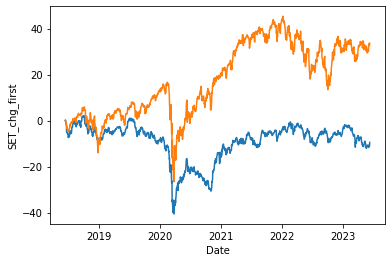

In [ ]:
sns.lineplot(x=df.index, y=df['SET_chg_first'])
sns.lineplot(x=df.index, y=df['DJI_chg_first'])

## เตรียมข้อมูลเพื่อที่จะ save file เป็น csv

In [ ]:
df.columns.get_level_values(0) # คือ column บนสูด

Index(['Close', 'Close', 'High', 'High', 'Low', 'Low', 'Open', 'Open',
       'Volume', 'Volume', 'SET_chg_first', 'DJI_chg_first'],
      dtype='object', name='Attributes')

In [ ]:
df.columns.get_level_values(1)

Index(['^SET', '^DJI', '^SET', '^DJI', '^SET', '^DJI', '^SET', '^DJI', '^SET',
       '^DJI', '', ''],
      dtype='object', name='Symbols')

In [ ]:
for i, v in enumerate(df.columns.get_level_values(1)):
    print(f'index = {i}, value = {v}')

index = 0, value = ^SET
index = 1, value = ^DJI
index = 2, value = ^SET
index = 3, value = ^DJI
index = 4, value = ^SET
index = 5, value = ^DJI
index = 6, value = ^SET
index = 7, value = ^DJI
index = 8, value = ^SET
index = 9, value = ^DJI
index = 10, value = 
index = 11, value = 


In [ ]:
for i, v in enumerate(df.columns.get_level_values(1)):
    print(f'{v}_{df.columns.get_level_values(0)[i]}')

^SET_Close
^DJI_Close
^SET_High
^DJI_High
^SET_Low
^DJI_Low
^SET_Open
^DJI_Open
^SET_Volume
^DJI_Volume
_SET_chg_first
_DJI_chg_first


In [ ]:
co = [f'{v}_{df.columns.get_level_values(0)[i]}' for i, v in enumerate(df.columns.get_level_values(1))]
co

['^SET_Close',
 '^DJI_Close',
 '^SET_High',
 '^DJI_High',
 '^SET_Low',
 '^DJI_Low',
 '^SET_Open',
 '^DJI_Open',
 '^SET_Volume',
 '^DJI_Volume',
 '_SET_chg_first',
 '_DJI_chg_first']

In [ ]:
df.columns = co
df # ได้เเล้ว ได้เเบบตามที่ต้องการเเล้ว เเบบไม่ใช่ multicolumn อ่ะ

,^SET_Close,^DJI_Close,^SET_High,^DJI_High,^SET_Low,^DJI_Low,^SET_Open,^DJI_Open,^SET_Volume,^DJI_Volume,_SET_chg_first,_DJI_chg_first
Date,,,,,,,,,,,,
2018-06-11,1723.11,25322.31,1727.25,25402.83,1716.33,25290.20,1723.80,25336.67,NaN,276821832.0,0.000000,0.000000
2018-06-12,1727.29,25320.73,1735.34,25364.37,1725.91,25247.04,1725.91,25346.82,NaN,265725748.0,0.242585,-0.006240
2018-06-13,1718.34,25201.20,1728.19,25362.07,1716.77,25191.42,1725.86,25328.65,NaN,329784159.0,-0.276825,-0.478274
2018-06-14,1709.86,25175.31,1714.62,25332.50,1700.03,25138.60,1714.52,25254.65,NaN,341117350.0,-0.768958,-0.580516
2018-06-15,1704.82,25090.48,1710.54,25130.82,1695.66,24894.38,1706.52,25116.71,NaN,659457895.0,-1.061453,-0.915517
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-02,1531.20,33762.76,1534.49,33805.00,1524.52,33187.58,1526.87,33187.58,5.346640e+09,389552042.0,-11.137420,33.332070
2023-06-05,NaN,33562.86,NaN,33804.22,NaN,33552.79,NaN,33771.13,NaN,371843384.0,NaN,32.542647
2023-06-06,1528.54,33573.28,1539.49,33631.25,1526.93,33399.69,1537.62,33547.67,4.604388e+09,296025484.0,-11.291792,32.583797


In [ ]:
df.to_csv('mkt_index.csv')

# คลิป 123 การ stack และ unstack DataFrame ที่มี MultiIndex

In [ ]:
df=web.DataReader(['^SET', '^DJI'], data_source='stooq')
df.head(3)

Attributes    Close               High                Low               Open  \
Symbols        ^SET      ^DJI     ^SET      ^DJI     ^SET      ^DJI     ^SET   
Date                                                                           
2018-06-11  1723.11  25322.31  1727.25  25402.83  1716.33  25290.20  1723.80   
2018-06-12  1727.29  25320.73  1735.34  25364.37  1725.91  25247.04  1725.91   
2018-06-13  1718.34  25201.20  1728.19  25362.07  1716.77  25191.42  1725.86   

Attributes           Volume               
Symbols         ^DJI   ^SET         ^DJI  
Date                                      
2018-06-11  25336.67    NaN  276821832.0  
2018-06-12  25346.82    NaN  265725748.0  
2018-06-13  25328.65    NaN  329784159.0

In [ ]:
df1 = df.stack() # column ล่างสุดก็จะกลายเป็น index key
df1

Attributes             Close      High       Low      Open        Volume
Date       Symbols                                                      
2018-06-11 ^SET      1723.11   1727.25   1716.33   1723.80           NaN
           ^DJI     25322.31  25402.83  25290.20  25336.67  2.768218e+08
2018-06-12 ^SET      1727.29   1735.34   1725.91   1725.91           NaN
           ^DJI     25320.73  25364.37  25247.04  25346.82  2.657257e+08
2018-06-13 ^SET      1718.34   1728.19   1716.77   1725.86           NaN
...                      ...       ...       ...       ...           ...
2023-06-06 ^DJI     33573.28  33631.25  33399.69  33547.67  2.960255e+08
2023-06-07 ^SET      1533.21   1534.69   1522.30   1531.30  4.784129e+09
           ^DJI     33665.02  33708.78  33546.11  33562.47  3.518051e+08
2023-06-08 ^SET      1559.50   1559.50   1530.55   1533.56           NaN
           ^DJI     33833.61  33873.81  33630.04  33656.98  2.728128e+08

[2470 rows x 5 columns]

In [ ]:
df2 = df1.stack() # ถ้าทำอีก1รอบ column ก็จะกลายเป็น index อีก   ถ้าหมดเเล้วก็จะกลายเป็น serise
df2

Date        Symbols  Attributes
2018-06-11  ^SET     Close         1.723110e+03
                     High          1.727250e+03
                     Low           1.716330e+03
                     Open          1.723800e+03
            ^DJI     Close         2.532231e+04
                                       ...     
2023-06-08  ^DJI     Close         3.383361e+04
                     High          3.387381e+04
                     Low           3.363004e+04
                     Open          3.365698e+04
                     Volume        2.728128e+08
Length: 12306, dtype: float64

In [ ]:
df2.reset_index() # ก็จะกลายมาเป็น dataframe เเล้ว values ก็จะกลายมาเป็น column 0

,Date,Symbols,Attributes,0
0,2018-06-11,^SET,Close,1.723110e+03
1,2018-06-11,^SET,High,1.727250e+03
2,2018-06-11,^SET,Low,1.716330e+03
3,2018-06-11,^SET,Open,1.723800e+03
4,2018-06-11,^DJI,Close,2.532231e+04
...,...,...,...,...
12301,2023-06-08,^DJI,Close,3.383361e+04
12302,2023-06-08,^DJI,High,3.387381e+04
12303,2023-06-08,^DJI,Low,3.363004e+04
12304,2023-06-08,^DJI,Open,3.365698e+04


## unstack

In [ ]:
df1.head(3)

Attributes             Close      High       Low      Open       Volume
Date       Symbols                                                     
2018-06-11 ^SET      1723.11   1727.25   1716.33   1723.80          NaN
           ^DJI     25322.31  25402.83  25290.20  25336.67  276821832.0
2018-06-12 ^SET      1727.29   1735.34   1725.91   1725.91          NaN

In [ ]:
du1 = df1.unstack() # กก็จะกลับมาเป็นเหมือนเดิม
du1.head(2)

Attributes    Close               High                Low               Open  \
Symbols        ^SET      ^DJI     ^SET      ^DJI     ^SET      ^DJI     ^SET   
Date                                                                           
2018-06-11  1723.11  25322.31  1727.25  25402.83  1716.33  25290.20  1723.80   
2018-06-12  1727.29  25320.73  1735.34  25364.37  1725.91  25247.04  1725.91   

Attributes           Volume               
Symbols         ^DJI   ^SET         ^DJI  
Date                                      
2018-06-11  25336.67    NaN  276821832.0  
2018-06-12  25346.82    NaN  265725748.0

In [ ]:
du2 = du1.unstack() # ก็จะเป็น serise
du2

Attributes  Symbols  Date      
Close       ^SET     2018-06-11    1.723110e+03
                     2018-06-12    1.727290e+03
                     2018-06-13    1.718340e+03
                     2018-06-14    1.709860e+03
                     2018-06-15    1.704820e+03
                                       ...     
Volume      ^DJI     2023-06-02    3.895520e+08
                     2023-06-05    3.718434e+08
                     2023-06-06    2.960255e+08
                     2023-06-07    3.518051e+08
                     2023-06-08    2.728128e+08
Length: 12970, dtype: float64

In [ ]:
du2.reset_index() # ก็จะได้เหมือนกันกับ stack

,Attributes,Symbols,Date,0
0,Close,^SET,2018-06-11,1.723110e+03
1,Close,^SET,2018-06-12,1.727290e+03
2,Close,^SET,2018-06-13,1.718340e+03
3,Close,^SET,2018-06-14,1.709860e+03
4,Close,^SET,2018-06-15,1.704820e+03
...,...,...,...,...
12965,Volume,^DJI,2023-06-02,3.895520e+08
12966,Volume,^DJI,2023-06-05,3.718434e+08
12967,Volume,^DJI,2023-06-06,2.960255e+08
12968,Volume,^DJI,2023-06-07,3.518051e+08


## ประยุคต์

In [ ]:
df.head(2)

Attributes    Close               High                Low               Open  \
Symbols        ^SET      ^DJI     ^SET      ^DJI     ^SET      ^DJI     ^SET   
Date                                                                           
2018-06-11  1723.11  25322.31  1727.25  25402.83  1716.33  25290.20  1723.80   
2018-06-12  1727.29  25320.73  1735.34  25364.37  1725.91  25247.04  1725.91   

Attributes           Volume               
Symbols         ^DJI   ^SET         ^DJI  
Date                                      
2018-06-11  25336.67    NaN  276821832.0  
2018-06-12  25346.82    NaN  265725748.0

In [ ]:
df.to_csv('market_index.csv')

In [ ]:
df1.head(3)

Attributes             Close      High       Low      Open       Volume
Date       Symbols                                                     
2018-06-11 ^SET      1723.11   1727.25   1716.33   1723.80          NaN
           ^DJI     25322.31  25402.83  25290.20  25336.67  276821832.0
2018-06-12 ^SET      1727.29   1735.34   1725.91   1725.91          NaN

In [ ]:
df1.to_csv('market_index2.csv') # เเค่จะสื่อว่า save เเบบนี้น่าจะเอาไปใช้งานได้ง่ายมากกว่า เเบบบน    ****************************************************************************************
                                # เพราะว่าอันนี้เป็น column เดียว

                                # พูดง่ายๆ เเบบนี้ work กว่า

In [ ]:
pd.read_csv('market_index2.csv').head() # ตอนอ่านออกมาก็จะไม่มี index  เเละเอาทำงานต่อได้เลย ************************

,Date,Symbols,Close,High,Low,Open,Volume
0,2018-06-11,^SET,1723.11,1727.25,1716.33,1723.80,NaN
1,2018-06-11,^DJI,25322.31,25402.83,25290.20,25336.67,276821832.0
2,2018-06-12,^SET,1727.29,1735.34,1725.91,1725.91,NaN
3,2018-06-12,^DJI,25320.73,25364.37,25247.04,25346.82,265725748.0
4,2018-06-13,^SET,1718.34,1728.19,1716.77,1725.86,NaN


In [ ]:
pd.read_csv('market_index.csv').head() # อันนี้จะเอาไปใช้งานต่อยาก

,Attributes,Close,Close.1,High,High.1,Low,Low.1,Open,Open.1,Volume,Volume.1
0,Symbols,^SET,^DJI,^SET,^DJI,^SET,^DJI,^SET,^DJI,^SET,^DJI
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-06-11,1723.11,25322.31,1727.25,25402.83,1716.33,25290.2,1723.8,25336.67,NaN,276821832.0
3,2018-06-12,1727.29,25320.73,1735.34,25364.37,1725.91,25247.04,1725.91,25346.82,NaN,265725748.0
4,2018-06-13,1718.34,25201.2,1728.19,25362.07,1716.77,25191.42,1725.86,25328.65,NaN,329784159.0


# คลิป 125 การทำงานกับคอลัมน์ที่มีชื่อเป็นตัวเลข (numeric column name) filter *******************************************************

In [ ]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/iphone%20sales%20in%20asia.xlsx'
df=pd.read_excel(url, index_col='Geography')
df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Geography,,,,,,,,,,
China,3612500,9704700,17192900,22166100,32169800.0,49828900,44357000,41252000,36921000,32490500
Hong Kong,800000,1500000,2297900,3110000,3637300.0,3350000,3000000,2809200,2543200,2240500
India,44500,268800,453500,1540300,1340100.0,2249900,3549000,5015700,6335500,5951900
Indonesia,102900,238800,478300,810400,940500.0,1137600,1103300,1252400,828300,799900
Japan,5066300,7266000,10535700,13801600,14679700.0,15200500,15732500,15685300,15552600,15241500
Malaysia,184600,441000,759400,1222700,1461900.0,1736800,1597900,1489700,1360000,1280100
Philippines,223400,326500,416300,608800,621300.0,637100,580700,485700,470700,447000
Singapore,264900,508400,784200,908900,1067700.0,1105500,1099400,1021000,974100,954600
South Korea,1632000,2492500,755900,1490600,2067300.0,2669800,3163100,3289600,3455100,3512100


In [ ]:
df[2010] # จะสื่อว่าชื่อ column เป็น int

Geography
China          3612500
Hong Kong       800000
India            44500
Indonesia       102900
Japan          5066300
Malaysia        184600
Philippines     223400
Singapore       264900
South Korea    1632000
Taiwan          232900
Thailand        214800
Vietnam          95500
Name: 2010, dtype: int64

In [ ]:
df[[2015, 2019]]

,2015,2019
Geography,,
China,49828900,32490500
Hong Kong,3350000,2240500
India,2249900,5951900
Indonesia,1137600,799900
Japan,15200500,15241500
Malaysia,1736800,1280100
Philippines,637100,447000
Singapore,1105500,954600
South Korea,2669800,3512100


In [ ]:
df[:2015] # ถ้าเป็นเเบบนี้ มันจะมองว่าเป็น index เลยได้ออกมาเป็นเเบบนี้    คือ idnex 0 ถึง 2015

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Geography,,,,,,,,,,
China,3612500,9704700,17192900,22166100,32169800.0,49828900,44357000,41252000,36921000,32490500
Hong Kong,800000,1500000,2297900,3110000,3637300.0,3350000,3000000,2809200,2543200,2240500
India,44500,268800,453500,1540300,1340100.0,2249900,3549000,5015700,6335500,5951900
Indonesia,102900,238800,478300,810400,940500.0,1137600,1103300,1252400,828300,799900
Japan,5066300,7266000,10535700,13801600,14679700.0,15200500,15732500,15685300,15552600,15241500
Malaysia,184600,441000,759400,1222700,1461900.0,1736800,1597900,1489700,1360000,1280100
Philippines,223400,326500,416300,608800,621300.0,637100,580700,485700,470700,447000
Singapore,264900,508400,784200,908900,1067700.0,1105500,1099400,1021000,974100,954600
South Korea,1632000,2492500,755900,1490600,2067300.0,2669800,3163100,3289600,3455100,3512100


In [ ]:
df[:3]

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Geography,,,,,,,,,,
China,3612500,9704700,17192900,22166100,32169800.0,49828900,44357000,41252000,36921000,32490500
Hong Kong,800000,1500000,2297900,3110000,3637300.0,3350000,3000000,2809200,2543200,2240500
India,44500,268800,453500,1540300,1340100.0,2249900,3549000,5015700,6335500,5951900


In [ ]:
df.columns # หรือไม่ก็ทำเเบบนี้ดูก็ได้ว่ามันเป็น int ไหม

Int64Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype='int64')

In [ ]:
df.columns.astype('str') # ทำเองเล่นๆ เปลี่ยนให้เป็น object  *************************************************************************************

Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019'],
      dtype='object')

In [ ]:
df.columns.map(str) # ได้เหมือนกัน *****************************************************************************************

Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019'],
      dtype='object')

In [ ]:
df.columns = df.columns.astype('str')
df.columns

Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019'],
      dtype='object')

In [ ]:
df.loc[:, '2015':] # เเล้วก็ทำเเบบนี้ได้เเล้ว *********************************************************************************

,2015,2016,2017,2018,2019
Geography,,,,,
China,49828900,44357000,41252000,36921000,32490500
Hong Kong,3350000,3000000,2809200,2543200,2240500
India,2249900,3549000,5015700,6335500,5951900
Indonesia,1137600,1103300,1252400,828300,799900
Japan,15200500,15732500,15685300,15552600,15241500
Malaysia,1736800,1597900,1489700,1360000,1280100
Philippines,637100,580700,485700,470700,447000
Singapore,1105500,1099400,1021000,974100,954600
South Korea,2669800,3163100,3289600,3455100,3512100


In [ ]:
df.columns.str.match('.*[05]$')

array([ True, False, False, False, False,  True, False, False, False,
       False])

In [ ]:
df.loc[:, df.columns.str.match('.*[05]$')]

,2010,2015
Geography,,
China,3612500,49828900
Hong Kong,800000,3350000
India,44500,2249900
Indonesia,102900,1137600
Japan,5066300,15200500
Malaysia,184600,1736800
Philippines,223400,637100
Singapore,264900,1105500
South Korea,1632000,2669800


In [ ]:
df.filter(regex='[0|5]$', axis='columns') # filter ทำได้ทั้ง index, columns ************************************************
            # regex ก็บอกมาว่าจะ filter เเบบไหน

,2010,2015
Geography,,
China,3612500,49828900
Hong Kong,800000,3350000
India,44500,2249900
Indonesia,102900,1137600
Japan,5066300,15200500
Malaysia,184600,1736800
Philippines,223400,637100
Singapore,264900,1105500
South Korea,1632000,2669800


In [ ]:
df.filter(regex='s', axis='index') # ขอเเค่มี s   เเบบนี้น่าจะง่ายกว่าเพราะว่าทำได้ทั้ง index columns *******************************************************************************************

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Geography,,,,,,,,,,
Indonesia,102900,238800,478300,810400,940500.0,1137600,1103300,1252400,828300,799900
Malaysia,184600,441000,759400,1222700,1461900.0,1736800,1597900,1489700,1360000,1280100
Philippines,223400,326500,416300,608800,621300.0,637100,580700,485700,470700,447000


In [ ]:
df[df.index.str.contains('s')] # ทำเเบบนี้ก็ได้เหมือนกัน

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Geography,,,,,,,,,,
Indonesia,102900,238800,478300,810400,940500.0,1137600,1103300,1252400,828300,799900
Malaysia,184600,441000,759400,1222700,1461900.0,1736800,1597900,1489700,1360000,1280100
Philippines,223400,326500,416300,608800,621300.0,637100,580700,485700,470700,447000


# คลิป 126 การจัดรูปแบบการแสดงผลตัวเลช เช่น จำนวนจุดทศนิยม เปอร์เซ็นต์ ใส่ , คั่นทุก 3 หลัก ****************************************************************************

In [ ]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/eod/bbl.csv', 
               index_col='Date', nrows=5)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-01,174.5,175.5,173.5,175.5,169.355362,5953500.0
2017-02-02,175.0,177.0,174.5,175.5,169.355362,5250500.0
2017-02-03,175.0,178.5,175.0,178.5,172.250336,5470600.0
2017-02-06,178.5,181.5,178.5,180.5,174.180313,8150800.0
2017-02-07,180.5,181.0,179.0,180.0,173.697815,3648600.0


In [ ]:
df['pct'] = df.Close / df.Open - 1
df

,Open,High,Low,Close,Adj Close,Volume,pct
Date,,,,,,,
2017-02-01,174.5,175.5,173.5,175.5,169.355362,5953500.0,0.005731
2017-02-02,175.0,177.0,174.5,175.5,169.355362,5250500.0,0.002857
2017-02-03,175.0,178.5,175.0,178.5,172.250336,5470600.0,0.020000
2017-02-06,178.5,181.5,178.5,180.5,174.180313,8150800.0,0.011204
2017-02-07,180.5,181.0,179.0,180.0,173.697815,3648600.0,-0.002770


In [ ]:
df.style.format('{:.2f}')

,Open,High,Low,Close,Adj Close,Volume,pct
Date,,,,,,,
2017-02-01,174.50,175.50,173.50,175.50,169.36,5953500.00,0.01
2017-02-02,175.00,177.00,174.50,175.50,169.36,5250500.00,0.00
2017-02-03,175.00,178.50,175.00,178.50,172.25,5470600.00,0.02
2017-02-06,178.50,181.50,178.50,180.50,174.18,8150800.00,0.01
2017-02-07,180.50,181.00,179.00,180.00,173.70,3648600.00,-0.00


In [ ]:
df.style.format('{:.2f}', subset=['Open', 'High', 'Low', 'Close', 'Adj Close']) # ***********************************************************************************

,Open,High,Low,Close,Adj Close,Volume,pct
Date,,,,,,,
2017-02-01,174.50,175.50,173.50,175.50,169.36,5953500.000000,0.005731
2017-02-02,175.00,177.00,174.50,175.50,169.36,5250500.000000,0.002857
2017-02-03,175.00,178.50,175.00,178.50,172.25,5470600.000000,0.020000
2017-02-06,178.50,181.50,178.50,180.50,174.18,8150800.000000,0.011204
2017-02-07,180.50,181.00,179.00,180.00,173.70,3648600.000000,-0.002770


In [ ]:
df.style.format({'Open':'{:.2f}',
                 'Volume':'{:,.0f}',
                 'pct':'{:+.4%}'   # % คือ มันจะเอามาคูณ 100 ให้เพื่อทำเป็น %    เเละ .4 คือ ทศนิยม 4 ตำเเหน่ง ******************************************************************************************
                 })       # + คือ เเสดงว่าเพิ่มขึ้นหรือลดลงด้วย

,Open,High,Low,Close,Adj Close,Volume,pct
Date,,,,,,,
2017-02-01,174.50,175.500000,173.500000,175.500000,169.355362,"5,953,500",+0.5731%
2017-02-02,175.00,177.000000,174.500000,175.500000,169.355362,"5,250,500",+0.2857%
2017-02-03,175.00,178.500000,175.000000,178.500000,172.250336,"5,470,600",+2.0000%
2017-02-06,178.50,181.500000,178.500000,180.500000,174.180313,"8,150,800",+1.1204%
2017-02-07,180.50,181.000000,179.000000,180.000000,173.697815,"3,648,600",-0.2770%


In [ ]:
df.style.format('{:.2f}', subset=['Open', 'High', 'Low', 'Close', 'Adj Close']).format({'pct':'{:+.4%}'}) # เอามาผสมกัน *****************************************************************************************

,Open,High,Low,Close,Adj Close,Volume,pct
Date,,,,,,,
2017-02-01,174.500000,175.500000,173.500000,175.500000,169.355362,5953500.000000,+0.5731%
2017-02-02,175.000000,177.000000,174.500000,175.500000,169.355362,5250500.000000,+0.2857%
2017-02-03,175.000000,178.500000,175.000000,178.500000,172.250336,5470600.000000,+2.0000%
2017-02-06,178.500000,181.500000,178.500000,180.500000,174.180313,8150800.000000,+1.1204%
2017-02-07,180.500000,181.000000,179.000000,180.000000,173.697815,3648600.000000,-0.2770%


In [ ]:
df.style.highlight_max() # เดี๋ยวลืมเฉยๆ ทวนๆ

,Open,High,Low,Close,Adj Close,Volume,pct
Date,,,,,,,
2017-02-01,174.500000,175.500000,173.500000,175.500000,169.355362,5953500.000000,0.005731
2017-02-02,175.000000,177.000000,174.500000,175.500000,169.355362,5250500.000000,0.002857
2017-02-03,175.000000,178.500000,175.000000,178.500000,172.250336,5470600.000000,0.020000
2017-02-06,178.500000,181.500000,178.500000,180.500000,174.180313,8150800.000000,0.011204
2017-02-07,180.500000,181.000000,179.000000,180.000000,173.697815,3648600.000000,-0.002770


# คลิป 127 การเลือก row/column label ด้วย filter เช่น เลือกชื่อคอลัมน์ที่มีคำว่า math

In [ ]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/iphone%20sales%20in%20asia.xlsx'
df=pd.read_excel(url, index_col='Geography')
df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Geography,,,,,,,,,,
China,3612500,9704700,17192900,22166100,32169800.0,49828900,44357000,41252000,36921000,32490500
Hong Kong,800000,1500000,2297900,3110000,3637300.0,3350000,3000000,2809200,2543200,2240500
India,44500,268800,453500,1540300,1340100.0,2249900,3549000,5015700,6335500,5951900
Indonesia,102900,238800,478300,810400,940500.0,1137600,1103300,1252400,828300,799900
Japan,5066300,7266000,10535700,13801600,14679700.0,15200500,15732500,15685300,15552600,15241500
Malaysia,184600,441000,759400,1222700,1461900.0,1736800,1597900,1489700,1360000,1280100
Philippines,223400,326500,416300,608800,621300.0,637100,580700,485700,470700,447000
Singapore,264900,508400,784200,908900,1067700.0,1105500,1099400,1021000,974100,954600
South Korea,1632000,2492500,755900,1490600,2067300.0,2669800,3163100,3289600,3455100,3512100


In [ ]:
df.columns

Int64Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype='int64')

In [ ]:
df[2015]

Geography
China          49828900
Hong Kong       3350000
India           2249900
Indonesia       1137600
Japan          15200500
Malaysia        1736800
Philippines      637100
Singapore       1105500
South Korea     2669800
Taiwan          1618500
Thailand        1850700
Vietnam         1785800
Name: 2015, dtype: int64

In [ ]:
df.columns >= 2015

array([False, False, False, False, False,  True,  True,  True,  True,
        True])

In [ ]:
df[df.columns[df.columns >= 2015]]

,2015,2016,2017,2018,2019
Geography,,,,,
China,49828900,44357000,41252000,36921000,32490500
Hong Kong,3350000,3000000,2809200,2543200,2240500
India,2249900,3549000,5015700,6335500,5951900
Indonesia,1137600,1103300,1252400,828300,799900
Japan,15200500,15732500,15685300,15552600,15241500
Malaysia,1736800,1597900,1489700,1360000,1280100
Philippines,637100,580700,485700,470700,447000
Singapore,1105500,1099400,1021000,974100,954600
South Korea,2669800,3163100,3289600,3455100,3512100


## 2 filter

In [ ]:
df.columns

Int64Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype='int64')

In [ ]:
df.filter(regex='[6-9]$', axis='columns')
# เอาไว่เลือก column หรือ index   เเต่ว่าต้องกำหนด axis ให้มันด้วย(default axis = 'columns')

,2016,2017,2018,2019
Geography,,,,
China,44357000,41252000,36921000,32490500
Hong Kong,3000000,2809200,2543200,2240500
India,3549000,5015700,6335500,5951900
Indonesia,1103300,1252400,828300,799900
Japan,15732500,15685300,15552600,15241500
Malaysia,1597900,1489700,1360000,1280100
Philippines,580700,485700,470700,447000
Singapore,1099400,1021000,974100,954600
South Korea,3163100,3289600,3455100,3512100


In [ ]:
df.filter(regex='[05]$', axis='columns')

,2010,2015
Geography,,
China,3612500,49828900
Hong Kong,800000,3350000
India,44500,2249900
Indonesia,102900,1137600
Japan,5066300,15200500
Malaysia,184600,1736800
Philippines,223400,637100
Singapore,264900,1105500
South Korea,1632000,2669800


In [ ]:
df.filter(items=[2015, 2019])
# df.filter(items=[2015, 2019], axis='columns') default มันคือเเบบนี้

,2015,2019
Geography,,
China,49828900,32490500
Hong Kong,3350000,2240500
India,2249900,5951900
Indonesia,1137600,799900
Japan,15200500,15241500
Malaysia,1736800,1280100
Philippines,637100,447000
Singapore,1105500,954600
South Korea,2669800,3512100


In [ ]:
df.filter(regex='Thailand|Vietnam', axis='index')

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Geography,,,,,,,,,,
Thailand,214800,471500,813700,1658600,1745100.0,1850700,1908000,1896100,1776100,1720000
Vietnam,95500,166100,434800,764700,1213500.0,1785800,1770000,1760000,1643600,1624600


In [ ]:
df.filter(regex='d', axis='index') # ขอเเค่มีตัว d

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Geography,,,,,,,,,,
India,44500,268800,453500,1540300,1340100.0,2249900,3549000,5015700,6335500,5951900
Indonesia,102900,238800,478300,810400,940500.0,1137600,1103300,1252400,828300,799900
Thailand,214800,471500,813700,1658600,1745100.0,1850700,1908000,1896100,1776100,1720000


In [ ]:
df.index.str.upper()

Index(['CHINA', 'HONG KONG', 'INDIA', 'INDONESIA', 'JAPAN', 'MALAYSIA',
       'PHILIPPINES', 'SINGAPORE', 'SOUTH KOREA', 'TAIWAN', 'THAILAND',
       'VIETNAM'],
      dtype='object', name='Geography')

In [ ]:
df.index = df.index.str.upper()

In [ ]:
df.filter(regex='^T|V', axis='index') # ^ คือ ขึ้นตัน # ********************************************************************************************

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Geography,,,,,,,,,,
TAIWAN,232900,642800,787800,1121100,1379800.0,1618500,1563800,1482500,1415100,1457800
THAILAND,214800,471500,813700,1658600,1745100.0,1850700,1908000,1896100,1776100,1720000
VIETNAM,95500,166100,434800,764700,1213500.0,1785800,1770000,1760000,1643600,1624600


In [ ]:
df.filter(regex='D$', axis='index') # ลงท้ายด้วย D

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Geography,,,,,,,,,,
THAILAND,214800,471500,813700,1658600,1745100.0,1850700,1908000,1896100,1776100,1720000


In [ ]:
df.filter(regex='[AD]$', axis='index') # ลงท้ายด้วย D หรือ A

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Geography,,,,,,,,,,
CHINA,3612500,9704700,17192900,22166100,32169800.0,49828900,44357000,41252000,36921000,32490500
INDIA,44500,268800,453500,1540300,1340100.0,2249900,3549000,5015700,6335500,5951900
INDONESIA,102900,238800,478300,810400,940500.0,1137600,1103300,1252400,828300,799900
MALAYSIA,184600,441000,759400,1222700,1461900.0,1736800,1597900,1489700,1360000,1280100
SOUTH KOREA,1632000,2492500,755900,1490600,2067300.0,2669800,3163100,3289600,3455100,3512100
THAILAND,214800,471500,813700,1658600,1745100.0,1850700,1908000,1896100,1776100,1720000


In [ ]:
df.filter(regex='[AD]$', axis='index').filter(regex='[5-9]$', axis='columns')

,2015,2016,2017,2018,2019
Geography,,,,,
CHINA,49828900,44357000,41252000,36921000,32490500
INDIA,2249900,3549000,5015700,6335500,5951900
INDONESIA,1137600,1103300,1252400,828300,799900
MALAYSIA,1736800,1597900,1489700,1360000,1280100
SOUTH KOREA,2669800,3163100,3289600,3455100,3512100
THAILAND,1850700,1908000,1896100,1776100,1720000


## Ex 2

In [ ]:
ds=pd.read_table('https://github.com/prasertcbs/tutorial/raw/master/score_a.tsv',
                index_col='studentid')
ds

,math1,eng1,sci1,math2,eng2,sci2,math3,eng3,sci3
studentid,,,,,,,,,
C215,10,9,4,7,5,6,7,6,9
C211,6,10,8,10,6,7,6,5,10
C305,8,5,4,6,3,7,10,10,5
B344,4,8,7,6,8,7,4,10,8
A312,9,8,10,8,6,9,5,10,9
B243,4,6,6,6,5,3,8,6,6
B304,4,4,4,6,7,4,7,9,6
A349,4,4,7,7,6,6,9,5,8
C409,4,4,4,8,6,8,10,9,6


In [ ]:
ds.filter(regex='^math', axis='columns') # ขึ้นต้นด้วย math

,math1,math2,math3
studentid,,,
C215,10,7,7
C211,6,10,6
C305,8,6,10
B344,4,6,4
A312,9,8,5
B243,4,6,8
B304,4,6,7
A349,4,7,9
C409,4,8,10


In [ ]:
ds.filter(regex='2$', axis='columns')

,math2,eng2,sci2
studentid,,,
C215,7,5,6
C211,10,6,7
C305,6,3,7
B344,6,8,7
A312,8,6,9
B243,6,5,3
B304,6,7,4
A349,7,6,6
C409,8,6,8


In [ ]:
ds.loc[:, ds.columns.str.contains('2')] # ทวนเฉยๆ

,math2,eng2,sci2
studentid,,,
C215,7,5,6
C211,10,6,7
C305,6,3,7
B344,6,8,7
A312,8,6,9
B243,6,5,3
B304,6,7,4
A349,7,6,6
C409,8,6,8


In [ ]:
ds.filter(regex='^(math|eng)2', axis='columns') # ขึ้นต้นด้วย math หรือ eng เเล้วตามด้วย 2

,math2,eng2
studentid,,
C215,7,5
C211,10,6
C305,6,3
B344,6,8
A312,8,6
B243,6,5
B304,6,7
A349,7,6
C409,8,6


In [ ]:
ds.loc[:, ds.columns.str.match('^(math|eng)2')] # ได่เหมือนกัน ทวนเฉยๆ

,math2,eng2
studentid,,
C215,7,5
C211,10,6
C305,6,3
B344,6,8
A312,8,6
B243,6,5
B304,6,7
A349,7,6
C409,8,6


In [ ]:
ds.filter(regex='^A', axis='index')

,math1,eng1,sci1,math2,eng2,sci2,math3,eng3,sci3
studentid,,,,,,,,,
A312,9,8,10,8,6,9,5,10,9
A349,4,4,7,7,6,6,9,5,8
A398,4,6,8,5,5,4,7,5,8


In [ ]:
ds.loc[ds.index.str.match('A')] # ได้เหมือนกัน ทวนเฉยๆ

,math1,eng1,sci1,math2,eng2,sci2,math3,eng3,sci3
studentid,,,,,,,,,
A312,9,8,10,8,6,9,5,10,9
A349,4,4,7,7,6,6,9,5,8
A398,4,6,8,5,5,4,7,5,8


# คลิป 128 การรวมชื่อคอลัมน์แบบ MultiIndex เข้าด้วยกัน

In [ ]:
df=web.DataReader(['^SET', '^DJI'], data_source='stooq')
df[:5]

Attributes    Close               High                Low               Open  \
Symbols        ^SET      ^DJI     ^SET      ^DJI     ^SET      ^DJI     ^SET   
Date                                                                           
2018-06-11  1723.11  25322.31  1727.25  25402.83  1716.33  25290.20  1723.80   
2018-06-12  1727.29  25320.73  1735.34  25364.37  1725.91  25247.04  1725.91   
2018-06-13  1718.34  25201.20  1728.19  25362.07  1716.77  25191.42  1725.86   
2018-06-14  1709.86  25175.31  1714.62  25332.50  1700.03  25138.60  1714.52   
2018-06-15  1704.82  25090.48  1710.54  25130.82  1695.66  24894.38  1706.52   

Attributes           Volume               
Symbols         ^DJI   ^SET         ^DJI  
Date                                      
2018-06-11  25336.67    NaN  276821832.0  
2018-06-12  25346.82    NaN  265725748.0  
2018-06-13  25328.65    NaN  329784159.0  
2018-06-14  25254.65    NaN  341117350.0  
2018-06-15  25116.71    NaN  659457895.0

In [ ]:
df.columns.get_level_values(0)
# df.index.get_level_values(0) ทำเเบบนี้ก็ได้เป็นชั้นของ index

Index(['Close', 'Close', 'High', 'High', 'Low', 'Low', 'Open', 'Open',
       'Volume', 'Volume'],
      dtype='object', name='Attributes')

In [ ]:
df.columns.get_level_values(1)

Index(['^SET', '^DJI', '^SET', '^DJI', '^SET', '^DJI', '^SET', '^DJI', '^SET',
       '^DJI'],
      dtype='object', name='Symbols')

In [ ]:
df.Close

Symbols,^SET,^DJI
Date,,
2018-06-11,1723.11,25322.31
2018-06-12,1727.29,25320.73
2018-06-13,1718.34,25201.20
2018-06-14,1709.86,25175.31
2018-06-15,1704.82,25090.48
...,...,...
2023-06-02,1531.20,33762.76
2023-06-05,NaN,33562.86
2023-06-06,1528.54,33573.28


In [ ]:
df['Close']['^SET']

Date
2018-06-11    1723.11
2018-06-12    1727.29
2018-06-13    1718.34
2018-06-14    1709.86
2018-06-15    1704.82
               ...   
2023-06-02    1531.20
2023-06-05        NaN
2023-06-06    1528.54
2023-06-07    1533.21
2023-06-08    1559.50
Name: ^SET, Length: 1297, dtype: float64

In [ ]:
df.columns

MultiIndex([( 'Close', '^SET'),
            ( 'Close', '^DJI'),
            (  'High', '^SET'),
            (  'High', '^DJI'),
            (   'Low', '^SET'),
            (   'Low', '^DJI'),
            (  'Open', '^SET'),
            (  'Open', '^DJI'),
            ('Volume', '^SET'),
            ('Volume', '^DJI')],
           names=['Attributes', 'Symbols'])

In [ ]:
df.columns.get_level_values(0)

Index(['Close', 'Close', 'High', 'High', 'Low', 'Low', 'Open', 'Open',
       'Volume', 'Volume'],
      dtype='object', name='Attributes')

In [ ]:
df.columns.get_level_values(1)

Index(['^SET', '^DJI', '^SET', '^DJI', '^SET', '^DJI', '^SET', '^DJI', '^SET',
       '^DJI'],
      dtype='object', name='Symbols')

In [ ]:
df.columns.get_level_values(1) + '_' + df.columns.get_level_values(0)

Index(['^SET_Close', '^DJI_Close', '^SET_High', '^DJI_High', '^SET_Low',
       '^DJI_Low', '^SET_Open', '^DJI_Open', '^SET_Volume', '^DJI_Volume'],
      dtype='object')

In [ ]:
cols = df.columns.get_level_values(1) + '_' + df.columns.get_level_values(0) # ทำเเบบนี้ได้เลย ***************************************************************************************
cols

Index(['^SET_Close', '^DJI_Close', '^SET_High', '^DJI_High', '^SET_Low',
       '^DJI_Low', '^SET_Open', '^DJI_Open', '^SET_Volume', '^DJI_Volume'],
      dtype='object')

In [ ]:
cols = cols.str.replace('^', '')
cols

C:\Users\Acer\AppData\Local\Temp\ipykernel_9084\2953159711.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cols = cols.str.replace('^', '')


Index(['SET_Close', 'DJI_Close', 'SET_High', 'DJI_High', 'SET_Low', 'DJI_Low',
       'SET_Open', 'DJI_Open', 'SET_Volume', 'DJI_Volume'],
      dtype='object')

In [ ]:
df.columns = cols # ทำเเบบนี้ได้เลย ************************************************************************
df

,SET_Close,DJI_Close,SET_High,DJI_High,SET_Low,DJI_Low,SET_Open,DJI_Open,SET_Volume,DJI_Volume
Date,,,,,,,,,,
2018-06-11,1723.11,25322.31,1727.25,25402.83,1716.33,25290.20,1723.80,25336.67,NaN,276821832.0
2018-06-12,1727.29,25320.73,1735.34,25364.37,1725.91,25247.04,1725.91,25346.82,NaN,265725748.0
2018-06-13,1718.34,25201.20,1728.19,25362.07,1716.77,25191.42,1725.86,25328.65,NaN,329784159.0
2018-06-14,1709.86,25175.31,1714.62,25332.50,1700.03,25138.60,1714.52,25254.65,NaN,341117350.0
2018-06-15,1704.82,25090.48,1710.54,25130.82,1695.66,24894.38,1706.52,25116.71,NaN,659457895.0
...,...,...,...,...,...,...,...,...,...,...
2023-06-02,1531.20,33762.76,1534.49,33805.00,1524.52,33187.58,1526.87,33187.58,5.346640e+09,389552042.0
2023-06-05,NaN,33562.86,NaN,33804.22,NaN,33552.79,NaN,33771.13,NaN,371843384.0
2023-06-06,1528.54,33573.28,1539.49,33631.25,1526.93,33399.69,1537.62,33547.67,4.604388e+09,296025484.0


# คลิป 129 การดึงอัตราแลกเปลี่ยนเงินตราต่างประเทศจาก RESTful api

In [ ]:
# r=requests.get('https://api.exchangeratesapi.io/latest')
# r.text   โหลดไม่ได้

In [ ]:
# j=json.loads(r.text)
j

{'schema': {'fields': [{'name': 'index', 'type': 'integer'},
   {'name': 'flavour', 'type': 'string'},
   {'name': 'calories', 'type': 'integer'},
   {'name': 'fat_g', 'type': 'number'},
   {'name': 'carb_g', 'type': 'integer'},
   {'name': 'sugar_g', 'type': 'integer'},
   {'name': 'protein_g', 'type': 'number'}],
  'primaryKey': ['index'],
  'pandas_version': '1.4.0'},
 'data': [{'index': 0,
   'flavour': 'Bananas Foster',
   'calories': 160,
   'fat_g': 8.0,
   'carb_g': 20,
   'sugar_g': 16,
   'protein_g': 2.0},
  {'index': 1,
   'flavour': 'Baseball Nut',
   'calories': 160,
   'fat_g': 9.0,
   'carb_g': 19,
   'sugar_g': 13,
   'protein_g': 3.0}]}

In [ ]:
# url='https://api.exchangeratesapi.io/history?start_at=2018-01-01&end_at=2018-09-01&symbols=THB,JPY&base=USD'
# j=get_api_result(url)
# j['rates']

In [ ]:
def get_exchange_rate(start_dt=None, end_dt=None, symbols=['THB'], base_currency='USD'):
                        # ใส่ก็ได้ ไม่ใส่ก็เป็นค่าว่าง            set default
    if start_dt is None:
        start_dt = (pd.Timestamp.now() - pd.DateOffset(days=15)).strftime("%Y-%m-%d")
                    # วันเวลา(datetime)                            อันนี้จะเอา datetime มาทำเป็น str ตามที่เราอยาก format   เพื่อที่จะเอาไปใส่กับ url
    if end_dt is None:
        end_dt = pd.Timestamp.now().strftime("%Y-%m-%d")
    url=f'https://api.exchangeratesapi.io/history?start_at={start_dt}&end_at={end_dt}&symbols={",".join(symbols)}&base={base_currency}'
    print(url)
    r=requests.get(url) # เมื่อได้ url มาเเล้ว ก็จะเอาไปใช้อ่านข้อมูลมาได้เลย
    j=json.loads(r.text)
    df=pd.DataFrame(j['rates']).T
    df.sort_index(inplace=True)
    return df

# คลิป 130 การสร้าง correlation matrix พร้อมแสดงผลแบบ heatmap

In [ ]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/bangkok_aqi.csv'
df=pd.read_csv(url, parse_dates=['date'])
df

,date,pm25,pm10,o3,no2,so2,co
0,2017-01-01,NaN,30.0,18.0,9.0,1.0,NaN
1,2017-01-02,85.0,36.0,12.0,12.0,1.0,NaN
2,2017-01-03,104.0,40.0,11.0,12.0,1.0,NaN
3,2017-01-04,109.0,58.0,13.0,15.0,1.0,NaN
4,2017-01-05,126.0,52.0,9.0,13.0,1.0,NaN
...,...,...,...,...,...,...,...
1111,2020-01-20,164.0,68.0,19.0,14.0,1.0,NaN
1112,2020-01-21,148.0,64.0,17.0,15.0,1.0,NaN
1113,2020-01-22,124.0,57.0,13.0,9.0,NaN,NaN
1114,2020-01-23,115.0,44.0,10.0,8.0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1116 non-null   datetime64[ns]
 1   pm25    1111 non-null   float64       
 2   pm10    1111 non-null   float64       
 3   o3      1111 non-null   float64       
 4   no2     1111 non-null   float64       
 5   so2     885 non-null    float64       
 6   co      1 non-null      float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 61.2 KB


In [ ]:
df.corr()

C:\Users\Acer\AppData\Local\Temp\ipykernel_9084\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,pm25,pm10,o3,no2,so2,co
pm25,1.000000,0.805269,0.597712,0.611152,0.056936,NaN
pm10,0.805269,1.000000,0.680192,0.755497,0.086692,NaN
o3,0.597712,0.680192,1.000000,0.576186,0.065927,NaN
no2,0.611152,0.755497,0.576186,1.000000,0.066964,NaN
so2,0.056936,0.086692,0.065927,0.066964,1.000000,NaN
co,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co'], dtype='object')

## Pearson correlation

In [ ]:
df[['pm25', 'pm10', 'o3', 'no2', 'so2']].corr()

,pm25,pm10,o3,no2,so2
pm25,1.000000,0.805269,0.597712,0.611152,0.056936
pm10,0.805269,1.000000,0.680192,0.755497,0.086692
o3,0.597712,0.680192,1.000000,0.576186,0.065927
no2,0.611152,0.755497,0.576186,1.000000,0.066964
so2,0.056936,0.086692,0.065927,0.066964,1.000000


In [ ]:
dcorr = df[['pm25', 'pm10', 'o3', 'no2', 'so2']].corr()
dcorr.style.background_gradient()

,pm25,pm10,o3,no2,so2
pm25,1.000000,0.805269,0.597712,0.611152,0.056936
pm10,0.805269,1.000000,0.680192,0.755497,0.086692
o3,0.597712,0.680192,1.000000,0.576186,0.065927
no2,0.611152,0.755497,0.576186,1.000000,0.066964
so2,0.056936,0.086692,0.065927,0.066964,1.000000


In [ ]:
dcorr.style.background_gradient(cmap='Reds')

    # plt cmap มันจะมีรหัสสีให้อยู่ *********************************************************************************************************

,pm25,pm10,o3,no2,so2
pm25,1.000000,0.805269,0.597712,0.611152,0.056936
pm10,0.805269,1.000000,0.680192,0.755497,0.086692
o3,0.597712,0.680192,1.000000,0.576186,0.065927
no2,0.611152,0.755497,0.576186,1.000000,0.066964
so2,0.056936,0.086692,0.065927,0.066964,1.000000


In [ ]:
from IPython.display import IFrame
IFrame('https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html', width=800, height=400)
# เอาหน้า web มาเเสดง *********************************************************************************************************************************************

In [ ]:
dcorr.style.format('{:.2f}') # ให้เเสดงผลออกมาเป็นเเบบนี้ 

,pm25,pm10,o3,no2,so2
pm25,1.00,0.81,0.60,0.61,0.06
pm10,0.81,1.00,0.68,0.76,0.09
o3,0.60,0.68,1.00,0.58,0.07
no2,0.61,0.76,0.58,1.00,0.07
so2,0.06,0.09,0.07,0.07,1.00


In [ ]:
dcorr.style.format({'pm25':'{:.2f}', 'pm10':'{:.1f}'}) # ทวนเฉยๆ

,pm25,pm10,o3,no2,so2
pm25,1.00,0.8,0.597712,0.611152,0.056936
pm10,0.81,1.0,0.680192,0.755497,0.086692
o3,0.60,0.7,1.000000,0.576186,0.065927
no2,0.61,0.8,0.576186,1.000000,0.066964
so2,0.06,0.1,0.065927,0.066964,1.000000


In [ ]:
dcorr.style.format(formatter='{:.3f}',subset=['pm25', 'pm10'] ) # ทวนเฉยๆ

,pm25,pm10,o3,no2,so2
pm25,1.000,0.805,0.597712,0.611152,0.056936
pm10,0.805,1.000,0.680192,0.755497,0.086692
o3,0.598,0.680,1.000000,0.576186,0.065927
no2,0.611,0.755,0.576186,1.000000,0.066964
so2,0.057,0.087,0.065927,0.066964,1.000000


In [ ]:
dcorr.style.format('{:.2f}').background_gradient(cmap='Reds') # *********************************************************************************************

,pm25,pm10,o3,no2,so2
pm25,1.00,0.81,0.60,0.61,0.06
pm10,0.81,1.00,0.68,0.76,0.09
o3,0.60,0.68,1.00,0.58,0.07
no2,0.61,0.76,0.58,1.00,0.07
so2,0.06,0.09,0.07,0.07,1.00


<AxesSubplot: >

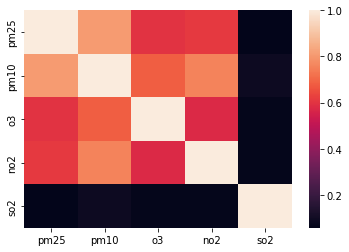

In [ ]:
sns.heatmap(dcorr)

<AxesSubplot: >

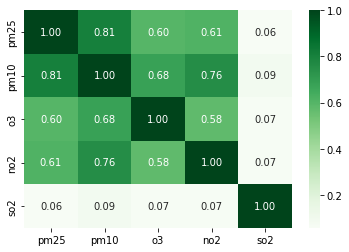

In [ ]:
sns.heatmap(dcorr, cmap='Greens', annot=True, fmt='.2f')
                    # กำหนดสี เหมือนกับ plt เลย   
                    # annot คือ ให้เเสดงตัวเลขออกมาด้วย ***********************************************************************************************
                    # fmt คือ format เเต่ไม่ต้องมี {}

In [ ]:
mask=np.zeros_like(dcorr) # สร้าง matrix zeros ให้มีมีติเหมือนกับ dcorr
mask

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [ ]:
mask[np.triu_indices_from(mask)]=True
# mask[np.tril_indices_from(mask)]=True   ตัวเลขจะตรงข้ามกัน
mask

array([[1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1.]])

<AxesSubplot: >

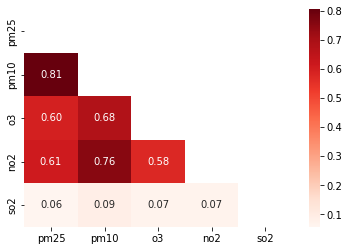

In [ ]:
sns.heatmap(dcorr, cmap='Reds', annot=True, fmt='.2f', mask=mask)
                                                        # อันนั้เอาไว้กำหนดให้เเสดงตรงไหนบ้าง

<AxesSubplot: >

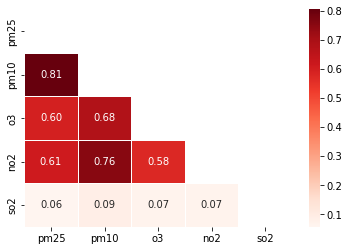

In [ ]:
sns.heatmap(dcorr, cmap='Reds', annot=True, fmt='.2f', mask=mask, linewidth=.5)
                                                                    # มีเส้นเเบ่งช่องให้ด้วย

# คลิป 131 การหาค่าเฉลี่ยดัชนีตลาดหุ้นแยกตามสัปดาห์ เดือน ไตรมาส และปี

In [ ]:
dj=pd.read_csv('https://stooq.com/q/d/l/?s=^dji&i=d', parse_dates=['Date'])
dj

,Date,Open,High,Low,Close,Volume
0,1896-05-27,29.39,29.39,29.39,29.39,NaN
1,1896-05-28,29.11,29.11,29.11,29.11,NaN
2,1896-05-29,29.43,29.43,29.43,29.43,NaN
3,1896-06-01,29.40,29.40,29.40,29.40,NaN
4,1896-06-02,29.00,29.00,29.00,29.00,NaN
...,...,...,...,...,...,...
32897,2023-06-02,33187.58,33805.00,33187.58,33762.76,389552042.0
32898,2023-06-05,33771.13,33804.22,33552.79,33562.86,371843384.0
32899,2023-06-06,33547.67,33631.25,33399.69,33573.28,296025484.0
32900,2023-06-07,33562.47,33708.78,33546.11,33665.02,351805148.0


In [ ]:
dj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32902 entries, 0 to 32901
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    32902 non-null  datetime64[ns]
 1   Open    32902 non-null  float64       
 2   High    32902 non-null  float64       
 3   Low     32902 non-null  float64       
 4   Close   32902 non-null  float64       
 5   Volume  24461 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 1.5 MB


In [ ]:
dj.Date.dt.year # ถ้าเป็นเกี่ยวกับวันเวลา ก็จะมี dt

0        1896
1        1896
2        1896
3        1896
4        1896
         ... 
32897    2023
32898    2023
32899    2023
32900    2023
32901    2023
Name: Date, Length: 32902, dtype: int64

In [ ]:
dj.groupby(dj.Date.dt.year).mean() # หาค่าเฉลี่ยนออกมาได้รายปี *****************************************************************************************

C:\Users\Acer\AppData\Local\Temp\ipykernel_9084\2157810304.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dj.groupby(dj.Date.dt.year).mean() # หาค่าเฉลี่ยนออกมาได้รายปี *****************************************************************************************


,Open,High,Low,Close,Volume
Date,,,,,
1896,26.700719,26.700719,26.700719,26.700719,NaN
1897,32.855458,32.855458,32.855458,32.855458,NaN
1898,37.933730,37.933730,37.933730,37.933730,NaN
1899,51.390202,51.390202,51.390202,51.390202,NaN
1900,44.222880,44.222880,44.222880,44.222880,NaN
...,...,...,...,...,...
2019,26366.116071,26478.294643,26252.292103,26379.587024,2.825663e+08
2020,26894.119802,27116.322016,26654.453518,26890.673597,4.430440e+08
2021,34039.094802,34210.673452,33879.565516,34055.289762,3.968617e+08


In [ ]:
dj.groupby([dj.Date.dt.year, dj.Date.dt.month]).mean() # เเบ่งตามปีเเล้วก็เเบ่งตามเดือนด้วย *****************************************************************************************
            # ถ้าจะ groupby 2 ชั้นก็ต้องใส่เป็น list

C:\Users\Acer\AppData\Local\Temp\ipykernel_9084\1246933082.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dj.groupby([dj.Date.dt.year, dj.Date.dt.month]).mean() # เเบ่งตามปีเเล้วก็เเบ่งตามเดือนด้วย *****************************************************************************************


Open          High           Low         Close  \
Date Date                                                           
1896 5        29.310000     29.310000     29.310000     29.310000   
     6        28.322273     28.322273     28.322273     28.322273   
     7        23.836957     23.836957     23.836957     23.836957   
     8        22.111905     22.111905     22.111905     22.111905   
     9        25.338095     25.338095     25.338095     25.338095   
...                 ...           ...           ...           ...   
2023 2     33696.416316  33844.902632  33438.562105  33648.256316   
     3     32477.036957  32694.497826  32249.975217  32483.478261   
     4     33674.288421  33832.691579  33549.614211  33731.280526   
     5     33372.439091  33480.161364  33150.101364  33316.802273   
     6     33442.613333  33665.135000  33336.786667  33576.516667   

                 Volume  
Date Date                
1896 5              NaN  
     6              NaN  
     7              NaN  
     8              NaN  
     9              NaN  
...                 ...  
2023 2     3.256078e+08  
     3     3.551721e+08  
     4     2.843261e+08  
     5     3.067314e+08  
     6     3.395606e+08  

[1522 rows x 5 columns]

In [ ]:
dj.groupby([dj['Date'].dt.year, dj['Date'].dt.month]).mean()['Close'].to_frame()
                                                                        # to_frame จาก serise จะทำให้กลายเป็น dataframe ************************************************************************************

C:\Users\Acer\AppData\Local\Temp\ipykernel_9084\1800994405.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dj.groupby([dj['Date'].dt.year, dj['Date'].dt.month]).mean()['Close'].to_frame()


Close
Date Date              
1896 5        29.310000
     6        28.322273
     7        23.836957
     8        22.111905
     9        25.338095
...                 ...
2023 2     33648.256316
     3     32483.478261
     4     33731.280526
     5     33316.802273
     6     33576.516667

[1522 rows x 1 columns]

C:\Users\Acer\AppData\Local\Temp\ipykernel_9084\770585045.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dg = dj.groupby([dj['Date'].dt.year, dj['Date'].dt.month]).mean()['Close'].to_frame()


<AxesSubplot: xlabel='Date,Date'>

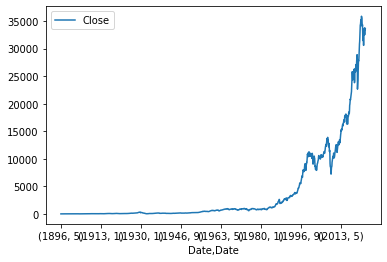

In [ ]:
dg = dj.groupby([dj['Date'].dt.year, dj['Date'].dt.month]).mean()['Close'].to_frame()
dg.plot()

In [ ]:
dj['Year'] = dj.Date.dt.year
dj

,Date,Open,High,Low,Close,Volume,Year
0,1896-05-27,29.39,29.39,29.39,29.39,NaN,1896
1,1896-05-28,29.11,29.11,29.11,29.11,NaN,1896
2,1896-05-29,29.43,29.43,29.43,29.43,NaN,1896
3,1896-06-01,29.40,29.40,29.40,29.40,NaN,1896
4,1896-06-02,29.00,29.00,29.00,29.00,NaN,1896
...,...,...,...,...,...,...,...
32897,2023-06-02,33187.58,33805.00,33187.58,33762.76,389552042.0,2023
32898,2023-06-05,33771.13,33804.22,33552.79,33562.86,371843384.0,2023
32899,2023-06-06,33547.67,33631.25,33399.69,33573.28,296025484.0,2023
32900,2023-06-07,33562.47,33708.78,33546.11,33665.02,351805148.0,2023


In [ ]:
dj['Quarter'] = dj.Date.dt.quarter # สร้าง column เพื่อนขึ้นเฉยๆ 
dj['Month'] = dj.Date.dt.month
dj['Week'] = dj.Date.dt.week
dj                                  # ถ้าเราทำเเบบนี้ออกมาเเล้ว มันก็จะทำให้เรา groupby ง่ายมากขึ้น ตามข้างล่าง

C:\Users\Acer\AppData\Local\Temp\ipykernel_9084\1379052772.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  dj['Week'] = dj.Date.dt.week


,Date,Open,High,Low,Close,Volume,Year,Quarter,Month,Week
0,1896-05-27,29.39,29.39,29.39,29.39,NaN,1896,2,5,22
1,1896-05-28,29.11,29.11,29.11,29.11,NaN,1896,2,5,22
2,1896-05-29,29.43,29.43,29.43,29.43,NaN,1896,2,5,22
3,1896-06-01,29.40,29.40,29.40,29.40,NaN,1896,2,6,23
4,1896-06-02,29.00,29.00,29.00,29.00,NaN,1896,2,6,23
...,...,...,...,...,...,...,...,...,...,...
32897,2023-06-02,33187.58,33805.00,33187.58,33762.76,389552042.0,2023,2,6,22
32898,2023-06-05,33771.13,33804.22,33552.79,33562.86,371843384.0,2023,2,6,23
32899,2023-06-06,33547.67,33631.25,33399.69,33573.28,296025484.0,2023,2,6,23
32900,2023-06-07,33562.47,33708.78,33546.11,33665.02,351805148.0,2023,2,6,23


In [ ]:
dj.groupby('Year').mean() # สร้าง column ขึ้นมาใหม่เพื่อเอามา groupby

C:\Users\Acer\AppData\Local\Temp\ipykernel_9084\3735895067.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dj.groupby('Year').mean() # สร้าง column ขึ้นมาใหม่เพื่อเอามา groupby


,Open,High,Low,Close,Volume,Quarter,Month,Week
Year,,,,,,,,
1896,26.700719,26.700719,26.700719,26.700719,NaN,3.248366,8.875817,37.392157
1897,32.855458,32.855458,32.855458,32.855458,NaN,2.521912,6.593625,26.565737
1898,37.933730,37.933730,37.933730,37.933730,NaN,2.496032,6.503968,26.329365
1899,51.390202,51.390202,51.390202,51.390202,NaN,2.502024,6.510121,26.489879
1900,44.222880,44.222880,44.222880,44.222880,NaN,2.500000,6.480000,26.312000
...,...,...,...,...,...,...,...,...
2019,26366.116071,26478.294643,26252.292103,26379.587024,2.825663e+08,2.519841,6.539683,26.496032
2020,26894.119802,27116.322016,26654.453518,26890.673597,4.430440e+08,2.513834,6.545455,27.217391
2021,34039.094802,34210.673452,33879.565516,34055.289762,3.968617e+08,2.519841,6.583333,26.523810


In [ ]:
dj.groupby('Year').max() # ดูค่าสูงสุดของเเต่ละ ปี

,Date,Open,High,Low,Close,Volume,Quarter,Month,Week
Year,,,,,,,,,
1896,1896-12-31,32.52,32.52,32.52,32.52,NaN,4,12,53
1897,1897-12-31,40.43,40.43,40.43,40.43,NaN,4,12,52
1898,1898-12-30,44.16,44.16,44.16,44.16,NaN,4,12,52
1899,1899-12-29,56.21,56.21,56.21,56.21,NaN,4,12,52
1900,1900-12-31,51.45,51.45,51.45,51.45,NaN,4,12,52
...,...,...,...,...,...,...,...,...,...
2019,2019-12-31,28675.34,28701.66,28608.98,28645.26,2.191756e+09,4,12,52
2020,2020-12-31,30492.07,30637.47,30393.04,30606.48,9.770928e+08,4,12,53
2021,2021-12-31,36522.48,36679.44,36396.19,36488.63,9.772946e+08,4,12,52


In [ ]:
dj.groupby('Year').describe() # หรือดูทีเดียวก็จบเลย เเต่ข้อมูลเยอะไปหน่อย

Open                                                              \
      count          mean          std       min         25%        50%   
Year                                                                      
1896  153.0     26.700719     3.073646     20.76     24.4800     26.310   
1897  251.0     32.855458     3.648058     27.88     29.5550     32.000   
1898  252.0     37.933730     3.483724     30.42     35.7175     38.100   
1899  247.0     51.390202     3.461579     42.20     49.4450     52.250   
1900  250.0     44.222880     3.204373     38.36     41.6575     43.975   
...     ...           ...          ...       ...         ...        ...   
2019  252.0  26366.116071  1093.343063  22894.92  25753.0300  26347.440   
2020  253.0  26894.119802  2519.511505  19028.36  25512.4300  27488.210   
2021  252.0  34039.094802  1622.635070  30054.73  33289.6475  34486.165   
2022  251.0  32907.551076  1738.179028  28755.83  31708.3250  33029.270   
2023  109.0  33337.241101   597.072549  31759.87  33021.7600  33425.320   

                             High                ... Month         Week  \
             75%       max  count          mean  ...   75%   max  count   
Year                                             ...                      
1896     29.2000     32.52  153.0     26.700719  ...  11.0  12.0  153.0   
1897     35.7150     40.43  251.0     32.855458  ...  10.0  12.0  251.0   
1898     40.9600     44.16  252.0     37.933730  ...   9.0  12.0  252.0   
1899     54.0900     56.21  247.0     51.390202  ...   9.5  12.0  247.0   
1900     47.1000     51.45  250.0     44.222880  ...   9.0  12.0  250.0   
...          ...       ...    ...           ...  ...   ...   ...    ...   
2019  27064.6500  28675.34  252.0  26478.294643  ...  10.0  12.0  252.0   
2020  28764.9500  30492.07  253.0  27116.322016  ...  10.0  12.0  253.0   
2021  35175.9825  36522.48  252.0  34210.673452  ...  10.0  12.0  252.0   
2022  34150.9400  36722.60  251.0  33152.647769  ...   9.5  12.0  251.0   
2023  33771.6600  34222.32  109.0  33512.622936  ...   5.0   6.0  109.0   

                                                            
           mean        std   min    25%   50%    75%   max  
Year                                                        
1896  37.392157   9.083121  22.0  30.00  37.0  45.00  53.0  
1897  26.565737  15.065413   1.0  13.50  27.0  39.50  52.0  
1898  26.329365  15.019199   1.0  13.00  26.0  39.00  52.0  
1899  26.489879  14.988847   1.0  14.00  26.0  39.50  52.0  
1900  26.312000  14.927625   1.0  13.25  26.0  39.00  52.0  
...         ...        ...   ...    ...   ...    ...   ...  
2019  26.496032  14.987777   1.0  13.75  26.5  39.25  52.0  
2020  27.217391  15.048736   1.0  14.00  27.0  40.00  53.0  
2021  26.523810  14.979250   1.0  14.00  26.5  39.25  52.0  
2022  26.513944  15.013954   1.0  13.50  27.0  39.50  52.0  
2023  12.009174   6.538342   1.0   6.00  12.0  18.00  23.0  

[128 rows x 64 columns]

In [ ]:
dj.groupby(['Year', 'Quarter']).mean()

C:\Users\Acer\AppData\Local\Temp\ipykernel_9084\1268747408.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dj.groupby(['Year', 'Quarter']).mean()


Open          High           Low         Close  \
Year Quarter                                                           
1896 2           28.440800     28.440800     28.440800     28.440800   
     3           23.764615     23.764615     23.764615     23.764615   
     4           29.039524     29.039524     29.039524     29.039524   
1897 1           29.906885     29.906885     29.906885     29.906885   
     2           29.284355     29.284355     29.284355     29.284355   
...                    ...           ...           ...           ...   
2022 2        32737.300968  32995.695161  32394.985806  32687.895000   
     3        31795.430781  31996.612656  31540.913906  31774.487656   
     4        32444.082698  32722.725397  32218.531905  32490.299683   
2023 1        33211.265484  33411.296774  32982.130323  33218.659355   
     2        33503.421702  33646.287234  33335.438723  33517.512340   

                    Volume      Month       Week  
Year Quarter                                      
1896 2                 NaN   5.880000  24.400000  
     3                 NaN   7.969231  33.446154  
     4                 NaN  11.000000  46.619048  
1897 1                 NaN   2.049180   6.803279  
     2                 NaN   5.032258  19.677419  
...                    ...        ...        ...  
2022 2        4.313231e+08   5.016129  19.758065  
     3        3.384810e+08   8.015625  32.937500  
     4        3.520609e+08  11.000000  45.888889  
2023 1        3.420047e+08   2.048387   7.145161  
     2        3.018649e+08   4.723404  18.425532  

[509 rows x 7 columns]

C:\Users\Acer\AppData\Local\Temp\ipykernel_9084\3551818601.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dj.groupby(['Year', 'Quarter']).mean()['Open'].plot()


<AxesSubplot: xlabel='Year,Quarter'>

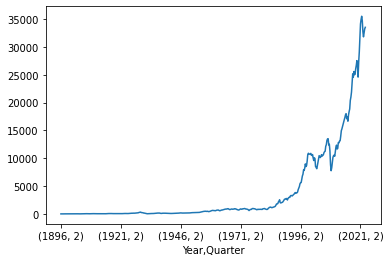

In [ ]:
dj.groupby(['Year', 'Quarter']).mean()['Open'].plot()

## Ex 2

In [ ]:
df=pd.read_csv('https://stooq.com/q/d/l/?s=^set&i=d', parse_dates=['Date'], index_col='Date')
df

,Open,High,Low,Close,Volume
Date,,,,,
1975-04-30,100.00,100.00,100.00,100.00,NaN
1975-05-30,89.98,89.98,89.98,89.98,NaN
1975-06-30,91.64,91.64,91.64,91.64,NaN
1975-07-31,98.02,98.02,98.02,98.02,NaN
1975-08-29,98.39,98.39,98.39,98.39,NaN
...,...,...,...,...,...
2023-06-02,1526.87,1534.49,1524.52,1531.20,5.346640e+09
2023-06-06,1537.62,1539.49,1526.93,1528.54,4.604388e+09
2023-06-07,1531.30,1534.69,1522.30,1533.21,4.784129e+09


In [ ]:
df.index.year # ถ้าเป็น index ไม่ต้องมี dt **************************************************************************************

Int64Index([1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1976,
            ...
            2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
           dtype='int64', name='Date', length=8931)

In [ ]:
df.set_index([df.index.year, df.index.quarter, df.index.month], inplace=True)
df

Open     High      Low    Close        Volume
Date Date Date                                                  
1975 2    4      100.00   100.00   100.00   100.00           NaN
          5       89.98    89.98    89.98    89.98           NaN
          6       91.64    91.64    91.64    91.64           NaN
     3    7       98.02    98.02    98.02    98.02           NaN
          8       98.39    98.39    98.39    98.39           NaN
...                 ...      ...      ...      ...           ...
2023 2    6     1526.87  1534.49  1524.52  1531.20  5.346640e+09
          6     1537.62  1539.49  1526.93  1528.54  4.604388e+09
          6     1531.30  1534.69  1522.30  1533.21  4.784129e+09
          6     1533.56  1559.50  1530.55  1559.50           NaN
          6     1555.88  1558.08  1549.70  1554.12           NaN

[8931 rows x 5 columns]

In [ ]:
df.index.names

FrozenList(['Date', 'Date', 'Date'])

In [ ]:
df.index.names = ['Year', 'quarter', 'month'] # *************************************************************************************
df

Open     High      Low    Close        Volume
Year quarter month                                                  
1975 2       4       100.00   100.00   100.00   100.00           NaN
             5        89.98    89.98    89.98    89.98           NaN
             6        91.64    91.64    91.64    91.64           NaN
     3       7        98.02    98.02    98.02    98.02           NaN
             8        98.39    98.39    98.39    98.39           NaN
...                     ...      ...      ...      ...           ...
2023 2       6      1526.87  1534.49  1524.52  1531.20  5.346640e+09
             6      1537.62  1539.49  1526.93  1528.54  4.604388e+09
             6      1531.30  1534.69  1522.30  1533.21  4.784129e+09
             6      1533.56  1559.50  1530.55  1559.50           NaN
             6      1555.88  1558.08  1549.70  1554.12           NaN

[8931 rows x 5 columns]

In [ ]:
df.groupby('Year').mean().head() # ถ้า groupby index ก็จะไม่มี index อื่นมากวน

,Open,High,Low,Close,Volume
Year,,,,,
1975,92.707778,92.707778,92.707778,92.707778,NaN
1976,79.904167,79.904167,79.904167,79.904167,NaN
1977,131.540833,131.540833,131.540833,131.540833,NaN
1978,206.515833,206.515833,206.515833,206.515833,NaN
1979,183.179167,183.179167,183.179167,183.179167,NaN


In [ ]:
df.groupby(['Year', 'month']).mean()

Open         High          Low        Close        Volume
Year month                                                                  
1975 4       100.000000   100.000000   100.000000   100.000000           NaN
     5        89.980000    89.980000    89.980000    89.980000           NaN
     6        91.640000    91.640000    91.640000    91.640000           NaN
     7        98.020000    98.020000    98.020000    98.020000           NaN
     8        98.390000    98.390000    98.390000    98.390000           NaN
...                 ...          ...          ...          ...           ...
2023 2      1664.382000  1668.634500  1655.058500  1661.018000  5.319571e+09
     3      1592.363636  1600.139091  1582.889545  1590.607273  4.767755e+09
     4      1577.012353  1582.203529  1565.301176  1572.137647  3.268259e+09
     5      1540.321000  1547.893000  1530.100500  1540.433000  3.721864e+09
     6      1536.565000  1543.835000  1529.218333  1537.995000  4.811644e+09

[579 rows x 5 columns]

# คลิป 132 การหายอดผู้ติดเชื้อ COVID-19 รายวันสะสมรายวันแยกตามวัน ประเทศ และทั้งโลก

In [ ]:
# Thai font in chart
plt.rcParams['font.family']='Tahoma' # *************************************************************************************
plt.rcParams['font.size']=13

In [ ]:
url='https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'
df=pd.read_csv(url)
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
...,...,...,...,...,...,...,...,...,...,...,...,...
61895,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61896,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61897,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61898,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     61900 non-null  object 
 1   day                                                         61900 non-null  int64  
 2   month                                                       61900 non-null  int64  
 3   year                                                        61900 non-null  int64  
 4   cases                                                       61900 non-null  int64  
 5   deaths                                                      61900 non-null  int64  
 6   countriesAndTerritories                                     61900 non-null  object 
 7   geoId                                                       61625 non-null  object 
 

In [ ]:
df.dateRep = pd.to_datetime(df.dateRep)
                # ให้ dtype ให้เป็น datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   dateRep                                                     61900 non-null  datetime64[ns]
 1   day                                                         61900 non-null  int64         
 2   month                                                       61900 non-null  int64         
 3   year                                                        61900 non-null  int64         
 4   cases                                                       61900 non-null  int64         
 5   deaths                                                      61900 non-null  int64         
 6   countriesAndTerritories                                     61900 non-null  object        
 7   geoId                 

C:\Users\Acer\AppData\Local\Temp\ipykernel_9084\2386520438.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df.dateRep = pd.to_datetime(df.dateRep)


In [ ]:
df.sort_values(['countriesAndTerritories', 'dateRep'], inplace=True)
df.reset_index(drop=True, inplace=True)
                # drop=True => reset_index มันจะสร้าง column ที่มีชื่อว่า index ออกมาเเล้วจะให้ลบ column นั้นทิ้ง 
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2019-12-31,31,12,2019,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
1,2020-01-01,1,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
2,2020-01-02,1,2,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,0.000000
3,2020-01-03,1,3,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,0.002629
4,2020-01-04,1,4,2020,25,0,Afghanistan,AF,AFG,38041757.0,Asia,0.378531
...,...,...,...,...,...,...,...,...,...,...,...,...
61895,2020-12-10,12,10,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,1.358782
61896,2020-12-11,12,11,2020,57,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,2.369333
61897,2020-12-12,12,12,2020,81,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,9.887014
61898,2020-12-13,13,12,2020,57,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,9.538784


In [ ]:
df[df.countriesAndTerritories.str.contains('Thai')]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
55504,2019-12-31,31,12,2019,0,0,Thailand,TH,THA,69625581.0,Asia,NaN
55505,2020-01-01,1,1,2020,0,0,Thailand,TH,THA,69625581.0,Asia,NaN
55506,2020-01-02,1,2,2020,5,0,Thailand,TH,THA,69625581.0,Asia,0.024416
55507,2020-01-03,1,3,2020,0,1,Thailand,TH,THA,69625581.0,Asia,0.011490
55508,2020-01-04,1,4,2020,0,0,Thailand,TH,THA,69625581.0,Asia,2.117038
...,...,...,...,...,...,...,...,...,...,...,...,...
55842,2020-12-10,12,10,2020,7,0,Thailand,TH,THA,69625581.0,Asia,0.137880
55843,2020-12-11,12,11,2020,5,0,Thailand,TH,THA,69625581.0,Asia,0.127827
55844,2020-12-12,12,12,2020,12,0,Thailand,TH,THA,69625581.0,Asia,0.324593
55845,2020-12-13,13,12,2020,17,0,Thailand,TH,THA,69625581.0,Asia,0.333211


In [ ]:
df[df.countriesAndTerritories.str.contains('Thai')][['cases', 'deaths']].sum()

cases     4237
deaths      60
dtype: int64

In [ ]:
df.groupby('countriesAndTerritories').sum()[['cases', 'deaths']] # หาเเยกประเทศ ***************************************************************************************

# df[['countriesAndTerritories', 'cases', 'deaths']].groupby('countriesAndTerritories').sum() เเบบนี้ก็ทำได้เหมือนกัน

C:\Users\Acer\AppData\Local\Temp\ipykernel_9084\3969085162.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('countriesAndTerritories').sum()[['cases', 'deaths']] # หาเเยกประเทศ ***************************************************************************************


,cases,deaths
countriesAndTerritories,,
Afghanistan,49273,1971
Albania,48530,1003
Algeria,92102,2596
Andorra,7338,79
Angola,16188,371
...,...,...
Wallis_and_Futuna,3,0
Western_Sahara,766,1
Yemen,2083,606


In [ ]:
df[['dateRep', 'cases', 'deaths']].groupby('dateRep').sum() # หาเเยกตามวัน

,cases,deaths
dateRep,,
2019-12-31,27,0
2020-01-01,0,0
2020-01-02,2121,46
2020-01-03,1843,58
2020-01-04,74847,4677
...,...,...
2020-12-10,304057,3973
2020-12-11,623511,10611
2020-12-12,657140,12355


<AxesSubplot: xlabel='dateRep'>

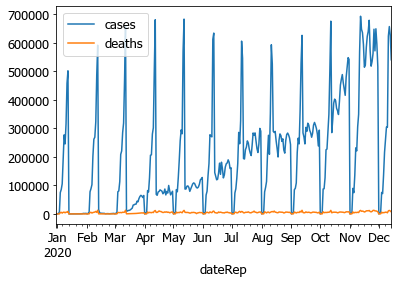

In [ ]:
df[['dateRep', 'cases', 'deaths']].groupby('dateRep').sum().plot()

In [ ]:
df[['cases', 'deaths']].head(10) # อันนี้เเสดงค่าตามปกติ

,cases,deaths
0,0,0
1,0,0
2,0,0
3,0,0
4,25,0
5,222,4
6,680,8
7,279,13
8,168,12
9,34,4


In [ ]:
df[['cases', 'deaths']].cumsum().head(10) # sum ก่อนหน้า บวก ตัวมันเอง

,cases,deaths
0,0,0
1,0,0
2,0,0
3,0,0
4,25,0
5,247,4
6,927,12
7,1206,25
8,1374,37
9,1408,41


In [ ]:
df[['geoId', 'cases', 'deaths']].groupby('geoId').cumsum().head(10)

                                    # อันนี้จะได้คล้ายๆข้างบน เเต่ว่ามันจะทำเป็น group เเต่ละประเทศ

,cases,deaths
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,25.0,0.0
5,247.0,4.0
6,927.0,12.0
7,1206.0,25.0
8,1374.0,37.0
9,1408.0,41.0


In [ ]:
# ประเด็นสำคัญอยู่ตรงนี้

dtmp=df[['geoId', 'cases', 'deaths']].groupby('geoId').cumsum()
dtmp                                                    # cumsum() คือ sum ก่อนหน้าเเละบวกตัวมันเข้าไปด้วย *****************************************************************************************
                                                        # ที่มี groupby ด้วยจะทำให้มัน cumsum ตาม group ************************************************************************************************

,cases,deaths
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,25.0,0.0
...,...,...
61895,11024.0,305.0
61896,11081.0,305.0
61897,11162.0,306.0
61898,11219.0,307.0


In [ ]:
df = pd.merge(df, dtmp, left_index=True, right_index=True, suffixes=('', '_cumulative'))
                        # ต้องมี left_index=True, right_index=True เพราะว่าจะ merge ด้วย index
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,cases_cumulative,deaths_cumulative
0,2019-12-31,31,12,2019,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN,0.0,0.0
1,2020-01-01,1,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN,0.0,0.0
2,2020-01-02,1,2,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,0.000000,0.0,0.0
3,2020-01-03,1,3,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,0.002629,0.0,0.0
4,2020-01-04,1,4,2020,25,0,Afghanistan,AF,AFG,38041757.0,Asia,0.378531,25.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61895,2020-12-10,12,10,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,1.358782,11024.0,305.0
61896,2020-12-11,12,11,2020,57,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,2.369333,11081.0,305.0
61897,2020-12-12,12,12,2020,81,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,9.887014,11162.0,306.0
61898,2020-12-13,13,12,2020,57,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,9.538784,11219.0,307.0


In [ ]:
df[df.countriesAndTerritories.str.contains('thai', case=False)][['cases', 'cases_cumulative']]

# กูทำเองเพื่อ df[['geoId', 'cases', 'deaths']].groupby('geoId').cumsum() เพื่อให้เห็นว่ากูคิดถูก

,cases,cases_cumulative
55504,0,0.0
55505,0,0.0
55506,5,5.0
55507,0,5.0
55508,0,5.0
...,...,...
55842,7,4175.0
55843,5,4180.0
55844,12,4192.0
55845,17,4209.0


In [ ]:
df[df.countriesAndTerritories.str.contains('thai', case=False)]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,cases_cumulative,deaths_cumulative
55504,2019-12-31,31,12,2019,0,0,Thailand,TH,THA,69625581.0,Asia,NaN,0.0,0.0
55505,2020-01-01,1,1,2020,0,0,Thailand,TH,THA,69625581.0,Asia,NaN,0.0,0.0
55506,2020-01-02,1,2,2020,5,0,Thailand,TH,THA,69625581.0,Asia,0.024416,5.0,0.0
55507,2020-01-03,1,3,2020,0,1,Thailand,TH,THA,69625581.0,Asia,0.011490,5.0,1.0
55508,2020-01-04,1,4,2020,0,0,Thailand,TH,THA,69625581.0,Asia,2.117038,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55842,2020-12-10,12,10,2020,7,0,Thailand,TH,THA,69625581.0,Asia,0.137880,4175.0,60.0
55843,2020-12-11,12,11,2020,5,0,Thailand,TH,THA,69625581.0,Asia,0.127827,4180.0,60.0
55844,2020-12-12,12,12,2020,12,0,Thailand,TH,THA,69625581.0,Asia,0.324593,4192.0,60.0
55845,2020-12-13,13,12,2020,17,0,Thailand,TH,THA,69625581.0,Asia,0.333211,4209.0,60.0


# คลิป 133 ประยุกต์ใช้ numpy.setdiff1d เพื่อหาจังหวัดที่ยังไม่พบผู้ติดเชื้อ COVID-19

In [ ]:
province_url='https://github.com/prasertcbs/basic-dataset/raw/master/province_demographics2562.tsv'
dp=pd.read_csv(province_url, sep='\t')
dp

,name_th,name_en,region,destination,household,population,male,female
0,กระบี่,Krabi,ใต้,เมืองหลัก,189510,476739,236790,239949
1,กรุงเทพมหานคร,Bangkok,กลาง,เมืองหลัก,3041115,5666264,2669316,2996948
2,กาญจนบุรี,Kanchanaburi,ตะวันตก,เมืองหลัก,343345,895525,450262,445263
3,กาฬสินธุ์,Kalasin,ตะวันออกเฉียงเหนือ,เมืองรอง,305844,983418,487451,495967
4,กำแพงเพชร,Kamphaeng Phet,กลาง,เมืองรอง,274543,725867,359205,366662
...,...,...,...,...,...,...,...,...
72,อำนาจเจริญ,Amnat Charoen,ตะวันออกเฉียงเหนือ,เมืองรอง,117994,378438,188632,189806
73,อุดรธานี,Udon Thani,ตะวันออกเฉียงเหนือ,เมืองรอง,519338,1586646,787642,799004
74,อุตรดิตถ์,Uttaradit,เหนือ,เมืองรอง,170691,453103,221583,231520
75,อุทัยธานี,Uthai Thani,กลาง,เมืองรอง,123952,328618,160855,167763


In [ ]:
dp.name_th.unique()

array(['กระบี่', 'กรุงเทพมหานคร', 'กาญจนบุรี', 'กาฬสินธุ์', 'กำแพงเพชร',
       'ขอนแก่น', 'จันทบุรี', 'ฉะเชิงเทรา', 'ชลบุรี', 'ชัยนาท', 'ชัยภูมิ',
       'ชุมพร', 'เชียงราย', 'เชียงใหม่', 'ตรัง', 'ตราด', 'ตาก', 'นครนายก',
       'นครปฐม', 'นครพนม', 'นครราชสีมา', 'นครศรีธรรมราช', 'นครสวรรค์',
       'นนทบุรี', 'นราธิวาส', 'น่าน', 'บึงกาฬ', 'บุรีรัมย์', 'ปทุมธานี',
       'ประจวบคีรีขันธ์', 'ปราจีนบุรี', 'ปัตตานี', 'พระนครศรีอยุธยา',
       'พะเยา', 'พังงา', 'พัทลุง', 'พิจิตร', 'พิษณุโลก', 'เพชรบุรี',
       'เพชรบูรณ์', 'แพร่', 'ภูเก็ต', 'มหาสารคาม', 'มุกดาหาร',
       'แม่ฮ่องสอน', 'ยโสธร', 'ยะลา', 'ร้อยเอ็ด', 'ระนอง', 'ระยอง',
       'ราชบุรี', 'ลพบุรี', 'ลำปาง', 'ลำพูน', 'เลย', 'ศรีสะเกษ', 'สกลนคร',
       'สงขลา', 'สตูล', 'สมุทรปราการ', 'สมุทรสงคราม', 'สมุทรสาคร',
       'สระแก้ว', 'สระบุรี', 'สิงห์บุรี', 'สุโขทัย', 'สุพรรณบุรี',
       'สุราษฎร์ธานี', 'สุรินทร์', 'หนองคาย', 'หนองบัวลำภู', 'อ่างทอง',
       'อำนาจเจริญ', 'อุดรธานี', 'อุตรดิตถ์', 'อุทัยธานี', 'อุบลราชธานี'],
      d

In [ ]:
dp.name_th.to_numpy() # ได้เหมือนข้างบนเลย **********************************************************************************
            # เหมือน unique

array(['กระบี่', 'กรุงเทพมหานคร', 'กาญจนบุรี', 'กาฬสินธุ์', 'กำแพงเพชร',
       'ขอนแก่น', 'จันทบุรี', 'ฉะเชิงเทรา', 'ชลบุรี', 'ชัยนาท', 'ชัยภูมิ',
       'ชุมพร', 'เชียงราย', 'เชียงใหม่', 'ตรัง', 'ตราด', 'ตาก', 'นครนายก',
       'นครปฐม', 'นครพนม', 'นครราชสีมา', 'นครศรีธรรมราช', 'นครสวรรค์',
       'นนทบุรี', 'นราธิวาส', 'น่าน', 'บึงกาฬ', 'บุรีรัมย์', 'ปทุมธานี',
       'ประจวบคีรีขันธ์', 'ปราจีนบุรี', 'ปัตตานี', 'พระนครศรีอยุธยา',
       'พะเยา', 'พังงา', 'พัทลุง', 'พิจิตร', 'พิษณุโลก', 'เพชรบุรี',
       'เพชรบูรณ์', 'แพร่', 'ภูเก็ต', 'มหาสารคาม', 'มุกดาหาร',
       'แม่ฮ่องสอน', 'ยโสธร', 'ยะลา', 'ร้อยเอ็ด', 'ระนอง', 'ระยอง',
       'ราชบุรี', 'ลพบุรี', 'ลำปาง', 'ลำพูน', 'เลย', 'ศรีสะเกษ', 'สกลนคร',
       'สงขลา', 'สตูล', 'สมุทรปราการ', 'สมุทรสงคราม', 'สมุทรสาคร',
       'สระแก้ว', 'สระบุรี', 'สิงห์บุรี', 'สุโขทัย', 'สุพรรณบุรี',
       'สุราษฎร์ธานี', 'สุรินทร์', 'หนองคาย', 'หนองบัวลำภู', 'อ่างทอง',
       'อำนาจเจริญ', 'อุดรธานี', 'อุตรดิตถ์', 'อุทัยธานี', 'อุบลราชธานี'],
      d

In [ ]:
dp.name_th.value_counts()

กระบี่         1
ระยอง          1
สกลนคร         1
ศรีสะเกษ       1
เลย            1
              ..
น่าน           1
นราธิวาส       1
นนทบุรี        1
นครสวรรค์      1
อุบลราชธานี    1
Name: name_th, Length: 77, dtype: int64

In [ ]:
# url='https://covid19.th-stat.com/api/open/cases'   อ่านไม่ได้ เพราะว่ามันเปลี่ยน html ใหม่
# r=requests.get(url)
# j=r.json()
# df=pd.DataFrame(j['Data'])
# df

# คลิป 134 สร้างกราฟหลาย ๆ รูปเพื่อแสดงยอดผู้ติดเชื้อ COVID-19 แยกตามประเทศ

In [67]:
# ถ้าให้สรุปนะ ก็อ่านข้อมูลมาเเล้วเอามาจัดเรียงตามที่เราต้องการ เราแยากได้ข้อมูลเเบบไหน เเละต้องการอะไรบ้าง การจัดวางข้อมูลเป็นไงบ้าง


def read_covid_time_series():
    '''
    read Johns Hopkins COVID-19 time series data
    data source: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
    '''
    path = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_'
    status = ['Confirmed', 'Deaths', 'Recovered']
    dfs = [pd.read_csv(f'{path}{s.lower()}_global.csv') for s in status]

    df = pd.concat(dfs, keys=status)

    dtmps = [pd.melt(df.loc[k],
                     id_vars=['Province/State',
                              'Country/Region', 'Lat', 'Long'],
                     var_name='Date', value_name=k) for k in status]
    dx = [d.set_index(['Province/State', 'Country/Region', 'Date'])
          for d in dtmps]
    dcovid = pd.concat(dx, axis=1)
    dcovid.reset_index(inplace=True)
    dcovid = dcovid.loc[:, ~dcovid.columns.duplicated()]
    dcovid['Date'] = pd.to_datetime(dcovid['Date'])
    dcovid = dcovid.sort_values(
        ['Country/Region', 'Province/State', 'Date']).reset_index(drop=True)
    dcountry = dcovid.groupby(
        ['Country/Region', 'Date']).sum()[['Confirmed', 'Deaths', 'Recovered']]
    dcountry.reset_index(inplace=True)
    dcountry['daily_new_patient'] = dcountry.groupby(
        ['Country/Region'])['Confirmed'].diff()
    dcountry['daily_new_patient_pct'] = dcountry.groupby(
        ['Country/Region'])['Confirmed'].pct_change()
    return dcountry

In [68]:
df=read_covid_time_series()
df

C:\Users\Acer\AppData\Local\Temp\ipykernel_8644\497905672.py:28: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ['Country/Region', 'Date']).sum()[['Confirmed', 'Deaths', 'Recovered']]


,Country/Region,Date,Confirmed,Deaths,Recovered,daily_new_patient,daily_new_patient_pct
0,Afghanistan,2020-01-22,0.0,0.0,0,NaN,NaN
1,Afghanistan,2020-01-23,0.0,0.0,0,0.0,NaN
2,Afghanistan,2020-01-24,0.0,0.0,0,0.0,NaN
3,Afghanistan,2020-01-25,0.0,0.0,0,0.0,NaN
4,Afghanistan,2020-01-26,0.0,0.0,0,0.0,NaN
...,...,...,...,...,...,...,...
229738,Zimbabwe,2023-03-05,264127.0,5668.0,0,0.0,0.000000
229739,Zimbabwe,2023-03-06,264127.0,5668.0,0,0.0,0.000000
229740,Zimbabwe,2023-03-07,264127.0,5668.0,0,0.0,0.000000
229741,Zimbabwe,2023-03-08,264276.0,5671.0,0,149.0,0.000564


In [48]:
df[df['Country/Region'] == 'Thailand']

,Country/Region,Date,Confirmed,Deaths,Recovered,daily_new_patient,daily_new_patient_pct
203454,Thailand,2020-01-22,4.0,0.0,2,NaN,NaN
203455,Thailand,2020-01-23,4.0,0.0,2,0.0,0.000000
203456,Thailand,2020-01-24,5.0,0.0,3,1.0,0.250000
203457,Thailand,2020-01-25,6.0,0.0,3,1.0,0.200000
203458,Thailand,2020-01-26,8.0,0.0,6,2.0,0.333333
...,...,...,...,...,...,...,...
204592,Thailand,2023-03-05,4728182.0,33918.0,0,147.0,0.000031
204593,Thailand,2023-03-06,4728182.0,33918.0,0,0.0,0.000000
204594,Thailand,2023-03-07,4728182.0,33918.0,0,0.0,0.000000
204595,Thailand,2023-03-08,4728182.0,33918.0,0,0.0,0.000000


In [49]:
df[df['Country/Region'].isin(['Thailand', 'Japan'])] # ทวนเฉยๆ

,Country/Region,Date,Confirmed,Deaths,Recovered,daily_new_patient,daily_new_patient_pct
100584,Japan,2020-01-22,2.0,0.0,0,NaN,NaN
100585,Japan,2020-01-23,2.0,0.0,0,0.0,0.000000
100586,Japan,2020-01-24,2.0,0.0,0,0.0,0.000000
100587,Japan,2020-01-25,2.0,0.0,0,0.0,0.000000
100588,Japan,2020-01-26,4.0,0.0,1,2.0,1.000000
...,...,...,...,...,...,...,...
204592,Thailand,2023-03-05,4728182.0,33918.0,0,147.0,0.000031
204593,Thailand,2023-03-06,4728182.0,33918.0,0,0.0,0.000000
204594,Thailand,2023-03-07,4728182.0,33918.0,0,0.0,0.000000
204595,Thailand,2023-03-08,4728182.0,33918.0,0,0.0,0.000000


In [50]:
dfilter = df[df['Country/Region'].str.contains('Thailand|Japan|Italy|Spain|Singapore|US|United Kingdom')]
dfilter

,Country/Region,Date,Confirmed,Deaths,Recovered,daily_new_patient,daily_new_patient_pct
98298,Italy,2020-01-22,0.0,0.0,0,NaN,NaN
98299,Italy,2020-01-23,0.0,0.0,0,0.0,NaN
98300,Italy,2020-01-24,0.0,0.0,0,0.0,NaN
98301,Italy,2020-01-25,0.0,0.0,0,0.0,NaN
98302,Italy,2020-01-26,0.0,0.0,0,0.0,NaN
...,...,...,...,...,...,...,...
218308,United Kingdom,2023-03-05,24629840.0,220721.0,0,0.0,0.000000e+00
218309,United Kingdom,2023-03-06,24629840.0,220721.0,0,0.0,0.000000e+00
218310,United Kingdom,2023-03-07,24629846.0,220721.0,0,6.0,2.436069e-07
218311,United Kingdom,2023-03-08,24629922.0,220721.0,0,76.0,3.085687e-06


COVID-19 confirmed cases (22-Jan-2020 to 09-Mar-2023)


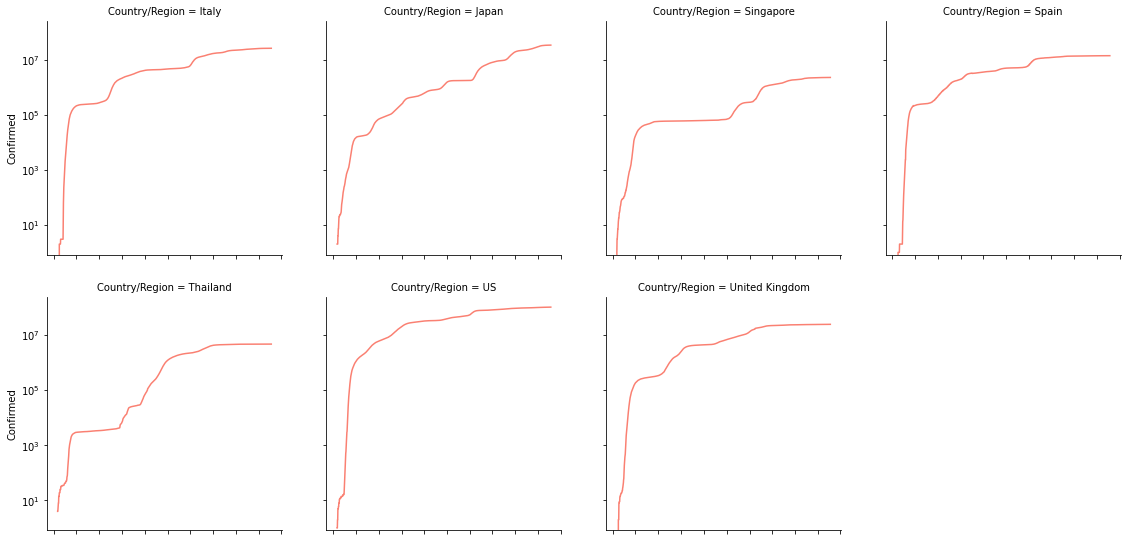

In [51]:
print(f"COVID-19 confirmed cases ({df.Date.min().strftime('%d-%b-%Y')} to {df.Date.max().strftime('%d-%b-%Y')})")

g = sns.relplot(kind='line', x="Date", y="Confirmed", data=dfilter, 
                col='Country/Region', 
                col_wrap=4, # 4 รูปเเล้วขึ้นเเถวใหม่ ********************************* 
                height=4, aspect=1, color='salmon',
                facet_kws={'sharey': True, 'sharex': True})
g.set(yscale="log", xlabel='', xticklabels=[]) # set show เเกน
                                # ไม่ให้มันเเสดง เวลา ตรงเเกน x ไม่งั้นมันจะซ้อน
g;

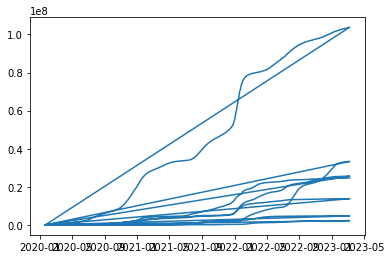

In [52]:
plt.plot(dfilter.Date, dfilter.Confirmed)

## Ex 2

In [53]:
A = df[['Country/Region', 'Confirmed']].groupby('Country/Region')
A.get_group('Afghanistan')

,Country/Region,Confirmed
0,Afghanistan,0.0
1,Afghanistan,0.0
2,Afghanistan,0.0
3,Afghanistan,0.0
4,Afghanistan,0.0
...,...,...
1138,Afghanistan,209390.0
1139,Afghanistan,209406.0
1140,Afghanistan,209436.0
1141,Afghanistan,209451.0


In [54]:
A.describe()

Confirmed                                              \
                         count           mean            std  min      25%   
Country/Region                                                               
Afghanistan             1143.0  113725.694663   73761.446305  0.0  41567.0   
Albania                 1143.0  162347.028871  124244.154630  0.0  21713.5   
Algeria                 1143.0  159878.958880  100780.502175  0.0  58776.5   
Andorra                 1143.0   21476.399825   18129.629683  0.0   4899.0   
Angola                  1143.0   52515.488189   42139.416416  0.0  11402.5   
...                        ...            ...            ...  ...      ...   
West Bank and Gaza      1143.0  360930.617673  273109.387303  0.0  55091.5   
Winter Olympics 2022    1143.0     187.630796     253.295575  0.0      0.0   
Yemen                   1143.0    6893.643920    4671.274727  0.0   2063.0   
Zambia                  1143.0  171438.042870  137279.755196  0.0  16602.0   
Zimbabwe                1143.0  122821.772528  109511.544389  0.0   8399.5   

                                                    
                           50%       75%       max  
Country/Region                                      
Afghanistan           152033.0  180104.0  209451.0  
Albania               135947.0  276064.5  334457.0  
Algeria               187258.0  265871.5  271496.0  
Andorra                14924.0   42894.0   47890.0  
Angola                 44617.0   99527.0  105288.0  
...                        ...       ...       ...  
West Bank and Gaza    320034.0  657573.0  703228.0  
Winter Olympics 2022       0.0     535.0     535.0  
Yemen                   7293.0   11819.0   11945.0  
Zambia                202261.0  321503.0  343135.0  
Zimbabwe              120088.0  251959.0  264276.0  

[201 rows x 8 columns]

In [55]:
df[['Country/Region', 'Confirmed']].groupby('Country/Region').apply(lambda s: s.nlargest(1, 'Confirmed')) # ได้ออกมาเป็นเเบบนี้ถูกเเล้ว กูหลงเอง มันจะบอก index ด้วย 
                                                                                                        # ทำเอง เลยทบทวนด้วยเลย

,,Country/Region,Confirmed
Country/Region,,,
Afghanistan,1141,Afghanistan,209451.0
Albania,2285,Albania,334457.0
Algeria,3428,Algeria,271496.0
Andorra,4570,Andorra,47890.0
Angola,5713,Angola,105288.0
...,...,...,...
West Bank and Gaza,225083,West Bank and Gaza,703228.0
Winter Olympics 2022,225949,Winter Olympics 2022,535.0
Yemen,227331,Yemen,11945.0


In [56]:
# start

df[['Country/Region', 'Confirmed']].groupby('Country/Region').max() # ************************************************************************************

,Confirmed
Country/Region,
Afghanistan,209451.0
Albania,334457.0
Algeria,271496.0
Andorra,47890.0
Angola,105288.0
...,...
West Bank and Gaza,703228.0
Winter Olympics 2022,535.0
Yemen,11945.0


In [57]:
dq=df[['Country/Region', 'Confirmed']].groupby('Country/Region').max() > 10000 # *************************************************************************************
dq

,Confirmed
Country/Region,
Afghanistan,True
Albania,True
Algeria,True
Andorra,True
Angola,True
...,...
West Bank and Gaza,True
Winter Olympics 2022,False
Yemen,True


In [58]:
country_list=dq.index[dq.Confirmed] # ***************************************************************************************-***********************************************
country_list

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       ...
       'United Kingdom', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'West Bank and Gaza', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country/Region', length=180)

In [59]:
dfilter = df[df['Country/Region'].isin(country_list)] #  ก็จะได้ ประเทศที่มีคนติดมากสุด เกิน 10000คน *****************************************************************************************
dfilter

,Country/Region,Date,Confirmed,Deaths,Recovered,daily_new_patient,daily_new_patient_pct
0,Afghanistan,2020-01-22,0.0,0.0,0,NaN,NaN
1,Afghanistan,2020-01-23,0.0,0.0,0,0.0,NaN
2,Afghanistan,2020-01-24,0.0,0.0,0,0.0,NaN
3,Afghanistan,2020-01-25,0.0,0.0,0,0.0,NaN
4,Afghanistan,2020-01-26,0.0,0.0,0,0.0,NaN
...,...,...,...,...,...,...,...
229738,Zimbabwe,2023-03-05,264127.0,5668.0,0,0.0,0.000000
229739,Zimbabwe,2023-03-06,264127.0,5668.0,0,0.0,0.000000
229740,Zimbabwe,2023-03-07,264127.0,5668.0,0,0.0,0.000000
229741,Zimbabwe,2023-03-08,264276.0,5671.0,0,149.0,0.000564


In [60]:
print(f"COVID-19 confirmed cases ({df.Date.min().strftime('%d-%b-%Y')} to {df.Date.max().strftime('%d-%b-%Y')})")

# g = sns.relplot(kind='line', x="Date", y="Confirmed", data=dfilter, 
#                 col='Country/Region', col_wrap=5, height=4.5, aspect=1, color='orange',
#                 facet_kws={'sharey': True, 'sharex': True})
# g.set(yscale="log", xlabel='', xticklabels=[])
# g;

# plot นานเกินไป เลยผิดไว้

COVID-19 confirmed cases (22-Jan-2020 to 09-Mar-2023)


## ลองทำเอง

In [61]:
df

,Country/Region,Date,Confirmed,Deaths,Recovered,daily_new_patient,daily_new_patient_pct
0,Afghanistan,2020-01-22,0.0,0.0,0,NaN,NaN
1,Afghanistan,2020-01-23,0.0,0.0,0,0.0,NaN
2,Afghanistan,2020-01-24,0.0,0.0,0,0.0,NaN
3,Afghanistan,2020-01-25,0.0,0.0,0,0.0,NaN
4,Afghanistan,2020-01-26,0.0,0.0,0,0.0,NaN
...,...,...,...,...,...,...,...
229738,Zimbabwe,2023-03-05,264127.0,5668.0,0,0.0,0.000000
229739,Zimbabwe,2023-03-06,264127.0,5668.0,0,0.0,0.000000
229740,Zimbabwe,2023-03-07,264127.0,5668.0,0,0.0,0.000000
229741,Zimbabwe,2023-03-08,264276.0,5671.0,0,149.0,0.000564


In [63]:
df.groupby('Country/Region').apply(lambda s:s.nlargest(1, 'Confirmed'))

,,Country/Region,Date,Confirmed,Deaths,Recovered,daily_new_patient,daily_new_patient_pct
Country/Region,,,,,,,,
Afghanistan,1141,Afghanistan,2023-03-08,209451.0,7896.0,0,15.0,0.000072
Albania,2285,Albania,2023-03-09,334457.0,3598.0,0,14.0,0.000042
Algeria,3428,Algeria,2023-03-09,271496.0,6881.0,0,2.0,0.000007
Andorra,4570,Andorra,2023-03-08,47890.0,165.0,0,15.0,0.000313
Angola,5713,Angola,2023-03-08,105288.0,1933.0,0,11.0,0.000104
...,...,...,...,...,...,...,...,...
West Bank and Gaza,225083,West Bank and Gaza,2022-12-12,703228.0,5708.0,0,192.0,0.000273
Winter Olympics 2022,225949,Winter Olympics 2022,2022-03-10,535.0,0.0,0,2.0,0.003752
Yemen,227331,Yemen,2022-11-04,11945.0,2159.0,0,1.0,0.000084


In [91]:
df.groupby('Country/Region').apply(lambda s:s.nlargest(1, 'Confirmed'))[df.groupby('Country/Region').apply(lambda s:s.nlargest(1, 'Confirmed')).Confirmed > 10000]['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chile', 'China', 'Colombia', 'Congo (Brazzaville)',
       'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'Ind

In [92]:
df[df['Country/Region'].isin(df.groupby('Country/Region').apply(lambda s:s.nlargest(1, 'Confirmed'))[df.groupby('Country/Region').apply(lambda s:s.nlargest(1, 'Confirmed')).Confirmed > 10000]['Country/Region'].unique())]

,Country/Region,Date,Confirmed,Deaths,Recovered,daily_new_patient,daily_new_patient_pct
0,Afghanistan,2020-01-22,0.0,0.0,0,NaN,NaN
1,Afghanistan,2020-01-23,0.0,0.0,0,0.0,NaN
2,Afghanistan,2020-01-24,0.0,0.0,0,0.0,NaN
3,Afghanistan,2020-01-25,0.0,0.0,0,0.0,NaN
4,Afghanistan,2020-01-26,0.0,0.0,0,0.0,NaN
...,...,...,...,...,...,...,...
229738,Zimbabwe,2023-03-05,264127.0,5668.0,0,0.0,0.000000
229739,Zimbabwe,2023-03-06,264127.0,5668.0,0,0.0,0.000000
229740,Zimbabwe,2023-03-07,264127.0,5668.0,0,0.0,0.000000
229741,Zimbabwe,2023-03-08,264276.0,5671.0,0,149.0,0.000564


## test

In [64]:
url='https://github.com/prasertcbs/tutorial/raw/master/mpg.csv'
df=pd.read_csv(url)
df.groupby('class').apply(lambda s: s.nlargest(1, 'cty'))

,,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
class,,,,,,,,,,,,
2seater,23,chevrolet,corvette,5.7,1999,8,manual(m6),r,16,26,p,2seater
compact,212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
midsize,143,nissan,altima,2.5,2008,4,auto(av),f,23,31,r,midsize
minivan,37,dodge,caravan 2wd,2.4,1999,4,auto(l3),f,18,24,r,minivan
pickup,202,toyota,toyota tacoma 4wd,2.7,2008,4,manual(m5),4,17,22,r,pickup
subcompact,221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
suv,161,subaru,forester awd,2.5,2008,4,manual(m5),4,20,27,r,suv


In [66]:
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


# คลิป 135 การหาจำนวนวันที่พบผู้ติดเชื้อ COVID-19 ครบ 100 1,000 10,000, ... ราย

In [14]:
url='https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'
df=pd.read_csv(url)
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
...,...,...,...,...,...,...,...,...,...,...,...,...
61895,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61896,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61897,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61898,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     61900 non-null  object 
 1   day                                                         61900 non-null  int64  
 2   month                                                       61900 non-null  int64  
 3   year                                                        61900 non-null  int64  
 4   cases                                                       61900 non-null  int64  
 5   deaths                                                      61900 non-null  int64  
 6   countriesAndTerritories                                     61900 non-null  object 
 7   geoId                                                       61625 non-null  object 
 

In [16]:
df.dateRep = pd.to_datetime(df.dateRep) # ถ้าไม่ใส่ format ให้มันมันจะหาเองว่าจะทำยังไง เเต่ก็ไม่ได้ทุกรูปเเบบ
df.head(2)

C:\Users\Acer\AppData\Local\Temp\ipykernel_20716\3945744372.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df.dateRep = pd.to_datetime(df.dateRep) # ถ้าไม่ใส่ format ให้มันมันจะหาเองว่าจะทำยังไง เเต่ก็ไม่ได้ทุกรูปเเบบ


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   dateRep                                                     61900 non-null  datetime64[ns]
 1   day                                                         61900 non-null  int64         
 2   month                                                       61900 non-null  int64         
 3   year                                                        61900 non-null  int64         
 4   cases                                                       61900 non-null  int64         
 5   deaths                                                      61900 non-null  int64         
 6   countriesAndTerritories                                     61900 non-null  object        
 7   geoId                 

In [18]:
df.sort_values(by=['countriesAndTerritories', 'dateRep'], inplace=True)
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
339,2019-12-31,31,12,2019,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
338,2020-01-01,1,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
307,2020-01-02,1,2,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,0.000000
278,2020-01-03,1,3,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,0.002629
257,2020-01-04,1,4,2020,25,0,Afghanistan,AF,AFG,38041757.0,Asia,0.378531


In [19]:
df.reset_index(drop=True, inplace=True) # drop = True คือ เวลา reset_index มันจะสร้าง column index ขึ้นมาใหม่จะของเดิม เเล้ว drop=tRue จะลบทิ้ง
df.head(5)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2019-12-31,31,12,2019,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
1,2020-01-01,1,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
2,2020-01-02,1,2,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,0.000000
3,2020-01-03,1,3,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,0.002629
4,2020-01-04,1,4,2020,25,0,Afghanistan,AF,AFG,38041757.0,Asia,0.378531


In [25]:
test = df.groupby('dateRep')[['cases', 'deaths']]
test.get_group('2019-12-31').sum()

cases     27
deaths     0
dtype: int64

In [26]:
dd = df.groupby('dateRep')[['cases', 'deaths']].sum()
dd

,cases,deaths
dateRep,,
2019-12-31,27,0
2020-01-01,0,0
2020-01-02,2121,46
2020-01-03,1843,58
2020-01-04,74847,4677
...,...,...
2020-12-10,304057,3973
2020-12-11,623511,10611
2020-12-12,657140,12355


In [32]:
dc = dd.cumsum().reset_index() # จะ stack ออกไปเลื่อยนๆ
dc

,dateRep,cases,deaths
0,2019-12-31,27,0
1,2020-01-01,27,0
2,2020-01-02,2148,46
3,2020-01-03,3991,104
4,2020-01-04,78838,4781
...,...,...,...
345,2020-12-10,69055883,1572528
346,2020-12-11,69679394,1583139
347,2020-12-12,70336534,1595494
348,2020-12-13,70962955,1605748


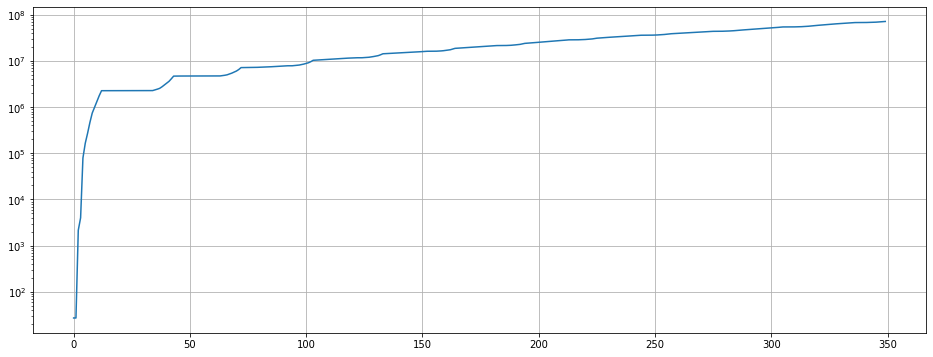

In [33]:
plt.figure(figsize=(16, 6))
plt.axes(yscale = 'log')
plt.grid(True)
plt.plot(dc.index, dc.cases)

In [34]:
dc[dc.cases < 100]

,dateRep,cases,deaths
0,2019-12-31,27,0
1,2020-01-01,27,0


In [36]:
dc[:5]

,dateRep,cases,deaths
0,2019-12-31,27,0
1,2020-01-01,27,0
2,2020-01-02,2148,46
3,2020-01-03,3991,104
4,2020-01-04,78838,4781


In [42]:
for n in [100, 1000, 10000, 100000, 1000000]:
    day = dc[dc.cases < n]['cases'].count() + 1
    print(f'{n:10,} peple => {day:3} day')
            # เรียงให้สวยๆ เฉยๆ

       100 peple =>   3 day
     1,000 peple =>   3 day
    10,000 peple =>   5 day
   100,000 peple =>   6 day
 1,000,000 peple =>  11 day


In [47]:
x = 20 
print(f'{x:05}') # จะเติม 0 ลงไปให้ครบ 5 หลัก
print(f'{x:5}')  # จะทำให้เป้น 5 ตัวอักษร

00020
   20


In [48]:
dj=pd.read_csv(f'https://stooq.com/q/d/l/?s=^DJI&i=d')
dj

,Date,Open,High,Low,Close,Volume
0,1896-05-27,29.39,29.39,29.39,29.39,NaN
1,1896-05-28,29.11,29.11,29.11,29.11,NaN
2,1896-05-29,29.43,29.43,29.43,29.43,NaN
3,1896-06-01,29.40,29.40,29.40,29.40,NaN
4,1896-06-02,29.00,29.00,29.00,29.00,NaN
...,...,...,...,...,...,...
32898,2023-06-05,33771.13,33804.22,33552.79,33562.86,371843384.0
32899,2023-06-06,33547.67,33631.25,33399.69,33573.28,296025484.0
32900,2023-06-07,33562.47,33708.78,33546.11,33665.02,351805148.0
32901,2023-06-08,33656.98,33873.81,33630.04,33833.61,273129891.0


In [51]:
dj.apply(lambda s: str(s.Open) + '-' + str(s.Close), axis='columns')
# dj.apply(lambda s: f'{s.Open}-{s.Close}', axis='columns')  ทำได้ทั้งคู่

0              29.39-29.39
1              29.11-29.11
2              29.43-29.43
3                29.4-29.4
4                29.0-29.0
               ...        
32898    33771.13-33562.86
32899    33547.67-33573.28
32900    33562.47-33665.02
32901    33656.98-33833.61
32902    33852.44-33876.78
Length: 32903, dtype: object

# คลิป 137 การใช้ io.StringIO เพื่อทำ memory file (อ่าน string ให้เหมือนอ่านไฟล์)

In [54]:
import io

In [52]:
s="""
p_id,name,name_en,region,area_km2
กจ,กาญจนบุรี,Kanchanaburi,C,19483.148
กทม,กรุงเทพมหานคร,Bangkok,C,1568.737
จบ,จันทบุรี,Chanthaburi,C,6338.0
ฉช,ฉะเชิงเทรา,Chachoengsao,C,5351.0
"""

In [56]:
df = pd.read_csv(io.StringIO(s))
df

,p_id,name,name_en,region,area_km2
0,กจ,กาญจนบุรี,Kanchanaburi,C,19483.148
1,กทม,กรุงเทพมหานคร,Bangkok,C,1568.737
2,จบ,จันทบุรี,Chanthaburi,C,6338.000
3,ฉช,ฉะเชิงเทรา,Chachoengsao,C,5351.000


# การทำความสะอาดข้อมูลด้วย regular expression (str.extract และ str.split) *************************************************
* จาก 1 column เเยกออกกมาหลาย column ตามที่เราต้องการ() โดยหา pattern
* อันไหนต้องการให้เป็นกลุ่มจะอยู่ใน วงเล็บ ()
* () 1column ()() 2column   จำนวนคู่วงเล็บคือจำนวน column ที่เกิดใหม่

In [9]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/regexp_extract_split.csv'
df=pd.read_csv(url)
df

,title_year,length,budget_revenue
0,Toy Story (1995),1 hour(s) 21 minute(s),30.0/362.0
1,A Bug's Life (1998),1 hour(s) 36 minute(s),45.0/363.4
2,Toy Story 2 (1999),1 hour(s) 32 minute(s),90.0/485.0
3,"Monsters, Inc. (2001)",1 hour(s) 30 minute(s),115.0/528.8
4,Finding Nemo (2003),1 hour(s) 44 minute(s),94.0/895.6
5,The Incredibles (2004),1 hour(s) 55 minute(s),92.0/631.4
6,Cars (2006),1 hour(s) 56 minute(s),70.0/462.0
7,Ratatouille (2007),1 hour(s) 51 minute(s),150.0/623.7
8,WALL-E (2008),1 hour(s) 37 minute(s),180.0/521.3
9,Up (2009),1 hour(s) 36 minute(s),175.0/731.3


## extract column => title_year

In [28]:
# test

df.title_year.str.extract('(.)(.)').head(2)

,0,1
0,T,o
1,A,


In [33]:
df.title_year.str.extract('(.*)\s(.*)\s\((.*)\)').head(2)

,0,1,2
0,Toy,Story,1995
1,A Bug's,Life,1998


In [35]:
df.title_year.str.extract('(.{1,})\s\((\d{4})\)') # **********************************************************************************************************************************************
                            # อันดับเเรก วงเล็บ มันจะเเยกออกมาเป็น 1 columns 
                                # ขยายความข้างบน เอาคืออยู่ใน (...)  จะมีกี่กลุ่ม(จำนวน column)ก็มีจำนวน วงเล็บ เท่านั้น
                            # .คืออะไรก็ได้  .{1,} คืออะไรก็ได่อย่างน้อย 1 ตัว
                            # เเล้ว \s spacebar
                            #  \((\d{4})\)  เจอ วงเล็บเปิด ปิด ไม่เอา เอาข้างใน มีตัวเลข(\d) 4 ตัว({4})

# df.title_year.str.extract('(.*)\s\((\d{4})\)') # ได้เหมือนกันอ่ะ

# df.title_year.str.extract('(.+)\s\((\d{4})\)') # ได้เหมือนกัน

,0,1
0,Toy Story,1995
1,A Bug's Life,1998
2,Toy Story 2,1999
3,"Monsters, Inc.",2001
4,Finding Nemo,2003
5,The Incredibles,2004
6,Cars,2006
7,Ratatouille,2007
8,WALL-E,2008
9,Up,2009


In [43]:
dm = df.title_year.str.extract('(.*)\s\((\d{4})\)') 
# dm.columns = ['title', 'year'] # เเบบนี้ก็ทำได้เหมือนกัน
dm.rename(columns={0: 'Title', 1:'Year'}, inplace=True)

dm

,Title,Year
0,Toy Story,1995
1,A Bug's Life,1998
2,Toy Story 2,1999
3,"Monsters, Inc.",2001
4,Finding Nemo,2003
5,The Incredibles,2004
6,Cars,2006
7,Ratatouille,2007
8,WALL-E,2008
9,Up,2009


In [44]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   15 non-null     object
 1   Year    15 non-null     object
dtypes: object(2)
memory usage: 368.0+ bytes


In [48]:
dm.Year = dm.Year.astype('int')
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   15 non-null     object
 1   Year    15 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 308.0+ bytes


## extract column => length

In [50]:
df.head(2)

,title_year,length,budget_revenue
0,Toy Story (1995),1 hour(s) 21 minute(s),30.0/362.0
1,A Bug's Life (1998),1 hour(s) 36 minute(s),45.0/363.4


In [57]:
df.length.str.extract('(\d)\s.*\s(\d*)\s.*').head(3)
# df['length'].str.extract('(\d+)\shour\(s\)\s(\d+)\sminute\(s\)').astype(float)  เเบบนี้ก็ได้เหมือนกัน

,0,1
0,1,21
1,1,36
2,1,32


In [53]:
df.length.str.extract('(\d)\s.*\s(\d*)\s.*').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       15 non-null     object
 1   1       15 non-null     object
dtypes: object(2)
memory usage: 368.0+ bytes


In [56]:
dt = df.length.str.extract('(\d)\s.*\s(\d*)\s.*').astype('int')
dt.columns = ['hour(s)', 'minute(s)']
dt.head(2)

,hour(s),minute(s)
0,1,21
1,1,36


In [58]:
dt['total_min']=dt['hour(s)'] * 60 + dt['minute(s)']
dt.head(3)

,hour(s),minute(s),total_min
0,1,21,81
1,1,36,96
2,1,32,92


## extract column => budget and revenue

In [59]:
df.head(2)

,title_year,length,budget_revenue
0,Toy Story (1995),1 hour(s) 21 minute(s),30.0/362.0
1,A Bug's Life (1998),1 hour(s) 36 minute(s),45.0/363.4


In [66]:
# มันยังแปลงเป็น type number ไม่ได้ เพราะติด ,

df.budget_revenue.str.extract('(.*)/(.*)') # index 10 มันมี ,   ทำเเบบนี้ก็ได้ เเล้วค่อยไปเอา , ออกทีหลัง เเต่มันจะทำหลายขั้นตอนหน่อย

,0,1
0,30.0,362.0
1,45.0,363.4
2,90.0,485.0
3,115.0,528.8
4,94.0,895.6
5,92.0,631.4
6,70.0,462.0
7,150.0,623.7
8,180.0,521.3
9,175.0,731.3


In [75]:
df.budget_revenue.str.replace(',', '') # เอา , ออกก่อนมันจะโอเคกว่า เเล้วค่อย extract 
# df.budget_revenue.map(lambda s: re.sub(',', '', s)) # เเบบนี้ก็ได้เหมือนกัน

0       30.0/362.0
1       45.0/363.4
2       90.0/485.0
3      115.0/528.8
4       94.0/895.6
5       92.0/631.4
6       70.0/462.0
7      150.0/623.7
8      180.0/521.3
9      175.0/731.3
10    200.0/1063.2
11     200.0/559.9
12     185.0/539.0
13     200.0/743.6
14     175.0/677.1
Name: budget_revenue, dtype: object

In [79]:
# df.budget_revenue.str.replace(',', '').str.split('/', expand= True).astype('float') 
                                                    # expand= True จะทำที่เป็น list ออกมาเป็น df เเยก *********************************************************************************************************************

ds = df.budget_revenue.str.replace(',', '').str.extract('(.*)/(.*)').astype('float')
                                                # เป็นอะไรกี่ตัวก็ได้ / เป็นอะไรกี่ตัวก็ได้
ds.columns = ['budget', 'revenue']
ds

,budget,revenue
0,30.0,362.0
1,45.0,363.4
2,90.0,485.0
3,115.0,528.8
4,94.0,895.6
5,92.0,631.4
6,70.0,462.0
7,150.0,623.7
8,180.0,521.3
9,175.0,731.3


## test ************************************************************************************************

In [82]:
df.budget_revenue.str.replace(',', '')

0       30.0/362.0
1       45.0/363.4
2       90.0/485.0
3      115.0/528.8
4       94.0/895.6
5       92.0/631.4
6       70.0/462.0
7      150.0/623.7
8      180.0/521.3
9      175.0/731.3
10    200.0/1063.2
11     200.0/559.9
12     185.0/539.0
13     200.0/743.6
14     175.0/677.1
Name: budget_revenue, dtype: object

In [84]:
df.budget_revenue.str.replace(',', '').str.split('/')

0       [30.0, 362.0]
1       [45.0, 363.4]
2       [90.0, 485.0]
3      [115.0, 528.8]
4       [94.0, 895.6]
5       [92.0, 631.4]
6       [70.0, 462.0]
7      [150.0, 623.7]
8      [180.0, 521.3]
9      [175.0, 731.3]
10    [200.0, 1063.2]
11     [200.0, 559.9]
12     [185.0, 539.0]
13     [200.0, 743.6]
14     [175.0, 677.1]
Name: budget_revenue, dtype: object

In [83]:
df.budget_revenue.str.replace(',', '').str.split('/', expand=True) # *************************************************************************************************************
                                                    # expand=True มันทำให้ list ออกมาเป็น เเต่ละ column 

,0,1
0,30.0,362.0
1,45.0,363.4
2,90.0,485.0
3,115.0,528.8
4,94.0,895.6
5,92.0,631.4
6,70.0,462.0
7,150.0,623.7
8,180.0,521.3
9,175.0,731.3


In [ ]:
ds.budget.quantile(0.7)

# คลิป 138 การดึงข้อความภาษาไทยด้วย regex (extract Thai characters with regular expression)

In [85]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/gem.txt', names=['text']) # ไฟล์นี้เป็นเเบบ csv
df                                                                                  # text นี้ไม่มี header มาให้

,text
0,Amber (แอมเบอร์) = อำพัน
1,Amethyst (แอมมิธิสท์) = พลอยสีม่วง
2,Crystal (คริสทัล) = คริสตัล
3,Diamond (ไดมอนด์) = เพชร
4,Emerald (เอมเมอเริลด์) = มรกต
5,Garnet (การ์เนท) = โกเมน
6,Gold (โกลด์) = ทองคำ
7,Jade (เจด) = หยก
8,Jet (เจท) = นิล
9,Opal (โอเพิล) = โอปอล


In [5]:
from IPython.display import IFrame
IFrame('https://jrgraphix.net/r/Unicode/0E00-0E7F', width=1024, height=400)

In [6]:
df['text'].str.extract('(\w+)') # ถ้าเป็น ภาษาอังกฤษ ก็ได้เลย

,0
0,Amber
1,Amethyst
2,Crystal
3,Diamond
4,Emerald
5,Garnet
6,Gold
7,Jade
8,Jet
9,Opal


In [87]:
df['text'].str.extract(r'([\u0E00-\u0E7F]+)') # ถ้าเป็น ภาษาไทยก็จะใช้ code 

,0
0,แอมเบอร์
1,แอมมิธิสท์
2,คริสทัล
3,ไดมอนด์
4,เอมเมอเริลด์
5,การ์เนท
6,โกลด์
7,เจด
8,เจท
9,โอเพิล


In [8]:
df['text'].str.extract(r'([\u0E00-\u0E7F]+$)')
                        # $ คือ ลงท้าย

,0
0,อำพัน
1,พลอยสีม่วง
2,คริสตัล
3,เพชร
4,มรกต
5,โกเมน
6,ทองคำ
7,หยก
8,นิล
9,โอปอล


In [89]:
df.head(2)

,text
0,Amber (แอมเบอร์) = อำพัน
1,Amethyst (แอมมิธิสท์) = พลอยสีม่วง


In [88]:
dt = df['text'].str.extract(r'(\w+)\s+\(([\u0E00-\u0E7F]+)\)\s+\=\s+([\u0E00-\u0E7F]+)') # ********************************************************************************
                            # + คือ มีหลายตัว
dt.columns=['en', 'pron', 'th']
dt

,en,pron,th
0,Amber,แอมเบอร์,อำพัน
1,Amethyst,แอมมิธิสท์,พลอยสีม่วง
2,Crystal,คริสทัล,คริสตัล
3,Diamond,ไดมอนด์,เพชร
4,Emerald,เอมเมอเริลด์,มรกต
5,Garnet,การ์เนท,โกเมน
6,Gold,โกลด์,ทองคำ
7,Jade,เจด,หยก
8,Jet,เจท,นิล
9,Opal,โอเพิล,โอปอล


In [93]:
# use named group (?P<name>) หรือทำเเบบนี้ก็ได้   *******************************************************************************************************************************************************

dt=df['text'].str.extract(r'(?P<en>\w+)\s+\((?P<pron>[\u0E00-\u0E7F]+)\)\s+\=\s+(?P<th>[\u0E00-\u0E7F]+)')
dt

,en,pron,th
0,Amber,แอมเบอร์,อำพัน
1,Amethyst,แอมมิธิสท์,พลอยสีม่วง
2,Crystal,คริสทัล,คริสตัล
3,Diamond,ไดมอนด์,เพชร
4,Emerald,เอมเมอเริลด์,มรกต
5,Garnet,การ์เนท,โกเมน
6,Gold,โกลด์,ทองคำ
7,Jade,เจด,หยก
8,Jet,เจท,นิล
9,Opal,โอเพิล,โอปอล


In [94]:
df['text'].str.extract(r'(\w+)\s+\((\D+)\)\s+\=\s+(\D+)')
                                    # \D อะไรก็ได้ที่ไท่ใช่ตัวเลข ******************************************************************************************

,0,1,2
0,Amber,แอมเบอร์,อำพัน
1,Amethyst,แอมมิธิสท์,พลอยสีม่วง
2,Crystal,คริสทัล,คริสตัล
3,Diamond,ไดมอนด์,เพชร
4,Emerald,เอมเมอเริลด์,มรกต
5,Garnet,การ์เนท,โกเมน
6,Gold,โกลด์,ทองคำ
7,Jade,เจด,หยก
8,Jet,เจท,นิล
9,Opal,โอเพิล,โอปอล


# คลิป 139 การเก็บ DataFrame ใน SQLite in-memory ****************************************************
* ใช้คำสั่ง SQL ในการสื่้อค้นข้อมูล df ได้

In [3]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/imdb_small/movies.csv'
dmovie=pd.read_csv(url)
dmovie.head()

,id,name,year,rank
0,10920,Aliens,1986,8.2
1,17173,Animal House,1978,7.5
2,18979,Apollo 13,1995,7.5
3,30959,Batman Begins,2005,NaN
4,46169,Braveheart,1995,8.3


In [5]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/imdb_small/movies_genres.csv'
dgenre=pd.read_csv(url)
dgenre.head()

,movie_id,genre
0,10920,Action
1,10920,Horror
2,10920,Sci-Fi
3,10920,Thriller
4,17173,Comedy


In [6]:
import sqlite3 # ***************************************************************************************************************************************************************
con = sqlite3.connect(':memory:') # ให้ sql ทำงานก็กับ df ได้  จะทำงานกับ memory  สร้างตัว connect

In [7]:
dmovie.to_sql('movies', con, index=False, if_exists='replace') # ****************************************************************************************************************************************
             # ชื่อ table     # save เข้าไป memory ของเครื่อง   if_exists='replace' คือ ถ้ามีตาราง movies มีอยู่เเล้วให้ ทับ ไปเลย
dgenre.to_sql('genres', con, index=False, if_exists='replace')

103

In [8]:
sql_cmd='''  
select *
    from  sqlite_master 
    where type ='table';
''' # ใช้คำสั่งเหมือน sql เลย   เอาไว้ดูว่าตอนนี้เก็บอะไรบ้าง
pd.read_sql(sql_cmd, con)

,type,name,tbl_name,rootpage,sql
0,table,movies,movies,2,"CREATE TABLE ""movies"" (\n""id"" INTEGER,\n ""nam..."
1,table,genres,genres,3,"CREATE TABLE ""genres"" (\n""movie_id"" INTEGER,\n..."


In [10]:
dmovie.head(3)

,id,name,year,rank
0,10920,Aliens,1986,8.2
1,17173,Animal House,1978,7.5
2,18979,Apollo 13,1995,7.5


In [11]:
# เปรียบเทียบ 1

# ถ้าใช้ pandas ในการเลือกเเต่ละอย่าง

dmovie[(dmovie['name'].str.startswith('S')) & (dmovie['year'] < 2000)].sort_values('rank', ascending=False)

,id,name,year,rank
28,297838,"Shawshank Redemption, The",1994,9.0
31,313459,Star Wars,1977,8.8
32,314965,Stir of Echoes,1999,7.0


In [14]:
# เปรียบเทียบ 1

# ถ้าใช้ sql เลือกข้อมูลเเต่ละอย่าง   ให้เปรียบเทียบกัน

pd.read_sql("""select * 
            from movies 
            where name like "S%" and year < 2000 
            order by rank desc"""
            , con) # อ่านจาก memory 

,id,name,year,rank
0,297838,"Shawshank Redemption, The",1994,9.0
1,313459,Star Wars,1977,8.8
2,314965,Stir of Echoes,1999,7.0


In [15]:
sql_cmd='''
    select * 
    from movies m inner join genres g on m.id=g.movie_id
'''
pd.read_sql(sql_cmd, con) # คำสั่ง sql เอามา merge กัน

,id,name,year,rank,movie_id,genre
0,10920,Aliens,1986,8.2,10920,Action
1,10920,Aliens,1986,8.2,10920,Horror
2,10920,Aliens,1986,8.2,10920,Sci-Fi
3,10920,Aliens,1986,8.2,10920,Thriller
4,17173,Animal House,1978,7.5,17173,Comedy
...,...,...,...,...,...,...
98,350424,Vanilla Sky,2001,6.9,350424,Drama
99,350424,Vanilla Sky,2001,6.9,350424,Mystery
100,350424,Vanilla Sky,2001,6.9,350424,Romance
101,350424,Vanilla Sky,2001,6.9,350424,Sci-Fi


In [16]:
sql_cmd='''
    drop view if exists vw_action;
    '''
con.execute(sql_cmd) # ถ้ามี view(type) vw_action ให้ลบ

In [17]:
sql_cmd='''
    create view vw_action as
    select * 
    from movies m inner join genres g on m.id=g.movie_id
    where genre='Action';
'''
con.execute(sql_cmd) # create view ชื่อ vw_action  โดยมีข้อมูลการ merge ตาราง2ตารางเข้าด้วยกัน *********************************************************************************

In [19]:
sql_cmd='''
    select *
    from sqlite_master;
'''
pd.read_sql(sql_cmd, con) # check

,type,name,tbl_name,rootpage,sql
0,table,movies,movies,2,"CREATE TABLE ""movies"" (\n""id"" INTEGER,\n ""nam..."
1,table,genres,genres,3,"CREATE TABLE ""genres"" (\n""movie_id"" INTEGER,\n..."
2,view,vw_action,vw_action,0,CREATE VIEW vw_action as\n select * \n f...


In [20]:
sql_cmd='''
    select * 
    from vw_action
'''
pd.read_sql(sql_cmd, con)

,id,name,year,rank,movie_id,genre
0,10920,Aliens,1986,8.2,10920,Action
1,30959,Batman Begins,2005,NaN,30959,Action
2,46169,Braveheart,1995,8.3,46169,Action
3,176711,Kill Bill: Vol. 1,2003,8.4,176711,Action
4,176712,Kill Bill: Vol. 2,2004,8.2,176712,Action
5,207992,"Matrix, The",1999,8.5,207992,Action
6,276217,Reservoir Dogs,1992,8.3,276217,Action
7,313459,Star Wars,1977,8.8,313459,Action


In [22]:
sql_cmd='''
    select * 
    from movies
'''
pd.read_sql(sql_cmd, con).head(3)

,id,name,year,rank
0,10920,Aliens,1986,8.2
1,17173,Animal House,1978,7.5
2,18979,Apollo 13,1995,7.5


In [24]:
sql_cmd='''
    select * 
    from genres
'''
pd.read_sql(sql_cmd, con).head(3)

,movie_id,genre
0,10920,Action
1,10920,Horror
2,10920,Sci-Fi


In [25]:
sql_cmd='''
    create index ix_movie_name on movies(name)
'''
con.execute(sql_cmd)

In [26]:
sql_cmd='''
    select *
    from sqlite_master;
'''
pd.read_sql(sql_cmd, con)

,type,name,tbl_name,rootpage,sql
0,table,movies,movies,2,"CREATE TABLE ""movies"" (\n""id"" INTEGER,\n ""nam..."
1,table,genres,genres,3,"CREATE TABLE ""genres"" (\n""movie_id"" INTEGER,\n..."
2,view,vw_action,vw_action,0,CREATE VIEW vw_action as\n select * \n f...
3,index,ix_movie_name,movies,4,CREATE INDEX ix_movie_name on movies(name)\n


In [27]:
sql_cmd='''
    select * 
    from movies 
    where name >= 'M'
'''
pd.read_sql(sql_cmd, con)

,id,name,year,rank
0,207992,"Matrix, The",1999,8.5
1,210511,Memento,2000,8.7
2,224842,Mystic River,2003,8.1
3,237431,"O Brother, Where Art Thou?",2000,7.8
4,238072,Ocean's Eleven,2001,7.5
5,238695,Office Space,1999,7.6
6,254943,Pi,1998,7.5
7,256630,Pirates of the Caribbean,2003,NaN
8,257264,"Planes, Trains & Automobiles",1987,7.2
9,267038,Pulp Fiction,1994,8.7


## save :memory: to 'test.sqlite'

In [28]:
dest = sqlite3.connect('test.sqlite') # ชื่อ test.sqlite
con.backup(dest) # อันนี้ save file 

In [31]:
con = sqlite3.connect('test.sqlite') # อ่านไฟล์เเล้วเอามาเก็นไว้ที่ตัวแปร cin

In [33]:
sql_cmd='''
select * 
    from sqlite_master
'''
pd.read_sql(sql_cmd, con) # เช็คข้อมูลก่อน

,type,name,tbl_name,rootpage,sql
0,table,movies,movies,2,"CREATE TABLE ""movies"" (\n""id"" INTEGER,\n ""nam..."
1,table,genres,genres,3,"CREATE TABLE ""genres"" (\n""movie_id"" INTEGER,\n..."
2,view,vw_action,vw_action,0,CREATE VIEW vw_action as\n select * \n f...
3,index,ix_movie_name,movies,4,CREATE INDEX ix_movie_name on movies(name)\n


In [32]:
sql_cmd='''
    select * from
    movies m inner join genres g on m.id=g.movie_id
'''
pd.read_sql(sql_cmd, con) # อ่านข้อมูลมา

,id,name,year,rank,movie_id,genre
0,10920,Aliens,1986,8.2,10920,Action
1,10920,Aliens,1986,8.2,10920,Horror
2,10920,Aliens,1986,8.2,10920,Sci-Fi
3,10920,Aliens,1986,8.2,10920,Thriller
4,17173,Animal House,1978,7.5,17173,Comedy
...,...,...,...,...,...,...
98,350424,Vanilla Sky,2001,6.9,350424,Drama
99,350424,Vanilla Sky,2001,6.9,350424,Mystery
100,350424,Vanilla Sky,2001,6.9,350424,Romance
101,350424,Vanilla Sky,2001,6.9,350424,Sci-Fi


In [36]:
sql_cmd='''
    select * 
    from vw_action
'''
pd.read_sql(sql_cmd, con) # อันนี้ลองอ่านข้อมูลเล่นๆ

,id,name,year,rank,movie_id,genre
0,10920,Aliens,1986,8.2,10920,Action
1,30959,Batman Begins,2005,NaN,30959,Action
2,46169,Braveheart,1995,8.3,46169,Action
3,176711,Kill Bill: Vol. 1,2003,8.4,176711,Action
4,176712,Kill Bill: Vol. 2,2004,8.2,176712,Action
5,207992,"Matrix, The",1999,8.5,207992,Action
6,276217,Reservoir Dogs,1992,8.3,276217,Action
7,313459,Star Wars,1977,8.8,313459,Action


# คลิป 140 การใช้ ffill (forward fill) และ bfill (backward fill) เพื่อจัดการกับ missing values

In [ ]:
# Date	Oil
# 8281	2020-01-02	67.05
# 8282	2020-01-03	69.08
# 8283	2020-01-06	70.25
# 8284	2020-01-07	68.74
# 8285	2020-01-08	67.31
# 8286	2020-01-09	66.58
# 8287	2020-01-10	66.77
# 8288	2020-01-13	64.14
# 8289	2020-01-14	64.45
# 8290	2020-01-15	63.29
# 8291	2020-01-16	64.63
# 8292	2020-01-17	64.05
# 8293	2020-01-20	64.63
# 8294	2020-01-21	63.66
# 8295	2020-01-22	62.11
# 8296	2020-01-23	61.26
# 8297	2020-01-24	59.34
# 8298	2020-01-27	58.54
# 8299	2020-01-28	59.37
# 8300	2020-01-29	59.46
# 8301	2020-01-30	57.72
# 8302	2020-01-31	57.77
# 8303	2020-02-03	54.00
# 8304	2020-02-04	53.90
# 8305	2020-02-05	55.36
# 8306	2020-02-06	55.18
# 8307	2020-02-07	54.53
# 8308	2020-02-10	53.39
# 8309	2020-02-11	54.00
# 8310	2020-02-12	55.54
# 8311	2020-02-13	56.34
# 8312	2020-02-14	57.37
# 8313	2020-02-17	57.83
# 8314	2020-02-18	57.35
# 8315	2020-02-19	59.72
# 8316	2020-02-20	59.57
# 8317	2020-02-21	58.60
# 8318	2020-02-24	56.71
# 8319	2020-02-25	55.29
# 8320	2020-02-26	54.96
# 8321	2020-02-27	52.19
# 8322	2020-02-28	51.31
# 8323	2020-03-02	52.52
# 8324	2020-03-03	52.24
# 8325	2020-03-04	51.86
# 8326	2020-03-05	51.29
# 8327	2020-03-06	45.60
# 8328	2020-03-09	35.33
# 8329	2020-03-10	35.57
# 8330	2020-03-11	34.45
# 8331	2020-03-12	31.02
# 8332	2020-03-13	32.25
# 8333	2020-03-16	27.98
# 8334	2020-03-17	27.97
# 8335	2020-03-18	22.79
# 8336	2020-03-19	23.98
# 8337	2020-03-20	25.55
# 8338	2020-03-23	23.75
# 8339	2020-03-24	24.50
# 8340	2020-03-25	25.62
# 8341	2020-03-26	23.55
# 8342	2020-03-27	22.39
# 8343	2020-03-30	19.19
# 8344	2020-03-31	14.85
# 8345	2020-04-01	14.97
# 8346	2020-04-02	20.24
# 8347	2020-04-03	24.33
# 8348	2020-04-06	22.58
# 8349	2020-04-07	22.10
# 8350	2020-04-08	25.22
# 8351	2020-04-09	20.23
# 8352	2020-04-14	21.74
# 8353	2020-04-15	19.80
# 8354	2020-04-16	18.69
# 8355	2020-04-17	19.75
# 8356	2020-04-20	17.36
# 8357	2020-04-21	9.12
# 8358	2020-04-22	13.77
# 8359	2020-04-23	15.06
# 8360	2020-04-24	15.87
# 8361	2020-04-27	15.17
# 8362	2020-04-28	15.60
# 8363	2020-04-29	17.86
# 8364	2020-04-30	18.11
# 8365	2020-05-01	18.49
# 8366	2020-05-04	20.40
# 8367	2020-05-05	25.46
# 8368	2020-05-06	24.20
# 8369	2020-05-07	24.23
# 8370	2020-05-11	25.53
# 8371	2020-05-12	26.67
# 8372	2020-05-13	27.89
# 8373	2020-05-14	29.87
# 8374	2020-05-15	30.95
# 8375	2020-05-18	33.30
# 8376	2020-05-19	33.06
# 8377	2020-05-20	34.76
# 8378	2020-05-21	34.78
# 8379	2020-05-22	33.80
# 8380	2020-05-26	33.95
# 8381	2020-05-27	32.73
# 8382	2020-05-28	33.98
# 8383	2020-05-29	34.15

In [65]:
doil = pd.read_clipboard() # ใช้การ read_clipboard เเม่งเพราะว่ามันเปิดเว็บไม่ได้
doil.Date = pd.to_datetime(doil.Date)
doil

,Date,Oil
8281,2020-01-02,67.05
8282,2020-01-03,69.08
8283,2020-01-06,70.25
8284,2020-01-07,68.74
8285,2020-01-08,67.31
...,...,...
8379,2020-05-22,33.80
8380,2020-05-26,33.95
8381,2020-05-27,32.73
8382,2020-05-28,33.98


In [41]:
from_dt='20200101'
to_dt='20200531'
# to_dt=pd.Timestamp.now().strftime('%Y%m%d')
url=f'https://stooq.com/q/d/l/?s=^set&d1={from_dt}&d2={to_dt}&i=d'
dset=pd.read_csv(url, parse_dates=['Date'], usecols=['Date', 'Close'])
dset

,Date,Close
0,2020-01-02,1595.82
1,2020-01-03,1594.97
2,2020-01-06,1568.50
3,2020-01-07,1585.23
4,2020-01-08,1559.27
...,...,...
97,2020-05-25,1320.98
98,2020-05-26,1336.09
99,2020-05-27,1345.11
100,2020-05-28,1337.51


In [43]:
dset.isnull().sum() # ทวนเฉยๆ

Date     0
Close    0
dtype: int64

In [44]:
dset.notna().sum() # เช็คเฉยๆว่า isnull กับ notna ตรงข้างกัน

Date     102
Close    102
dtype: int64

In [76]:
dset.columns = ['Date', 'SET_index']
dset.head(3)

,Date,SET_index
0,2020-01-02,1595.82
1,2020-01-03,1594.97
2,2020-01-06,1568.50


In [59]:
doil.head(3)

,Date,Oil
8281,2020-01-02,67.05
8282,2020-01-03,69.08
8283,2020-01-06,70.25


In [92]:
df = pd.merge(dset, doil, on='Date', how='outer', indicator=True) # การที่จะเอามาเชื่อกัน type ก็ต้องเหมือนกันด้วย
                        # ถ้า on จะต้องมีชื่อ Date ของ column ทั้ง 2 df
# df=pd.merge(doil, dset, left_on='Date', right_on='Date', how='outer', indicator=True)
                        # หรือจะทำเเบบนี้ก็ได้ เเต่ชื่อของ column ไม่จำเป็นต้องเหมือนกันก็ได้
df

,Date,SET_index,Oil,_merge
0,2020-01-02,1595.82,67.05,both
1,2020-01-03,1594.97,69.08,both
2,2020-01-06,1568.50,70.25,both
3,2020-01-07,1585.23,68.74,both
4,2020-01-08,1559.27,67.31,both
...,...,...,...,...
102,2020-02-10,NaN,53.39,right_only
103,2020-04-06,NaN,22.58,right_only
104,2020-05-01,NaN,18.49,right_only
105,2020-05-04,NaN,20.40,right_only


In [93]:
df.sort_values('Date', inplace=True)
df

,Date,SET_index,Oil,_merge
0,2020-01-02,1595.82,67.05,both
1,2020-01-03,1594.97,69.08,both
2,2020-01-06,1568.50,70.25,both
3,2020-01-07,1585.23,68.74,both
4,2020-01-08,1559.27,67.31,both
...,...,...,...,...
97,2020-05-25,1320.98,NaN,left_only
98,2020-05-26,1336.09,33.95,both
99,2020-05-27,1345.11,32.73,both
100,2020-05-28,1337.51,33.98,both


In [79]:
df.isnull().sum()

Date         0
SET_index    5
Oil          4
_merge       0
dtype: int64

In [94]:
df['Oil_ffill'] = df.Oil.fillna(method='ffill') # เอาตัวก่อนหน้ามาเติม
df['Oil_bfill'] = df.Oil.fillna(method='bfill') # เอาตัวถัดไปมาเติม

# df['Oil_f']=df.Oil.ffill() # forward fill    หรือจะทำเเบบนี้ก็ได้เหมือนกัน
# df['Oil_b']=df.Oil.bfill() # backward fill

df

,Date,SET_index,Oil,_merge,Oil_ffill,Oil_bfill
0,2020-01-02,1595.82,67.05,both,67.05,67.05
1,2020-01-03,1594.97,69.08,both,69.08,69.08
2,2020-01-06,1568.50,70.25,both,70.25,70.25
3,2020-01-07,1585.23,68.74,both,68.74,68.74
4,2020-01-08,1559.27,67.31,both,67.31,67.31
...,...,...,...,...,...,...
97,2020-05-25,1320.98,NaN,left_only,33.80,33.95
98,2020-05-26,1336.09,33.95,both,33.95,33.95
99,2020-05-27,1345.11,32.73,both,32.73,32.73
100,2020-05-28,1337.51,33.98,both,33.98,33.98


In [97]:
df['oil_interpolate'] = df.Oil.interpolate() # จะได้ interpolate ออกมา
df

,Date,SET_index,Oil,_merge,Oil_ffill,Oil_bfill,oil_interpolate
0,2020-01-02,1595.82,67.05,both,67.05,67.05,67.050
1,2020-01-03,1594.97,69.08,both,69.08,69.08,69.080
2,2020-01-06,1568.50,70.25,both,70.25,70.25,70.250
3,2020-01-07,1585.23,68.74,both,68.74,68.74,68.740
4,2020-01-08,1559.27,67.31,both,67.31,67.31,67.310
...,...,...,...,...,...,...,...
97,2020-05-25,1320.98,NaN,left_only,33.80,33.95,33.875
98,2020-05-26,1336.09,33.95,both,33.95,33.95,33.950
99,2020-05-27,1345.11,32.73,both,32.73,32.73,32.730
100,2020-05-28,1337.51,33.98,both,33.98,33.98,33.980


In [99]:
df['TEST'] = df.Oil.fillna('-----')
df

,Date,SET_index,Oil,_merge,Oil_ffill,Oil_bfill,oil_interpolate,TEST
0,2020-01-02,1595.82,67.05,both,67.05,67.05,67.050,67.05
1,2020-01-03,1594.97,69.08,both,69.08,69.08,69.080,69.08
2,2020-01-06,1568.50,70.25,both,70.25,70.25,70.250,70.25
3,2020-01-07,1585.23,68.74,both,68.74,68.74,68.740,68.74
4,2020-01-08,1559.27,67.31,both,67.31,67.31,67.310,67.31
...,...,...,...,...,...,...,...,...
97,2020-05-25,1320.98,NaN,left_only,33.80,33.95,33.875,-----
98,2020-05-26,1336.09,33.95,both,33.95,33.95,33.950,33.95
99,2020-05-27,1345.11,32.73,both,32.73,32.73,32.730,32.73
100,2020-05-28,1337.51,33.98,both,33.98,33.98,33.980,33.98


In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

<AxesSubplot: xlabel='Date', ylabel='SET_index'>

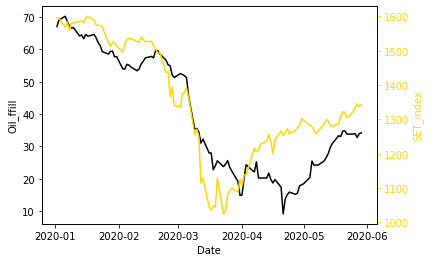

In [104]:
sns.lineplot(data=df, x='Date', y='Oil_ffill', color='black')

ax2 = plt.twinx() # ทำให้เป้น 2 อันได้
ax2.yaxis.label.set_color('gold')
ax2.tick_params(axis='y', colors='gold')

sns.lineplot(data=df, x='Date', y='SET_index', ax=ax2, color='gold')

# คลิป 141 การใช้คำสั่ง SQL เพื่อดึงข้อมูลใน DataFrame ด้วย pandasql package
* pip install pandasql

In [63]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [64]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/imdb_small/movies.csv'
dmovie=pd.read_csv(url)
dmovie.head()

,id,name,year,rank
0,10920,Aliens,1986,8.2
1,17173,Animal House,1978,7.5
2,18979,Apollo 13,1995,7.5
3,30959,Batman Begins,2005,NaN
4,46169,Braveheart,1995,8.3


In [65]:
# dq = pysqldf("SELECT name, year, rank FROM dmovie order by rank desc")
# dq

In [66]:
dmovie.sort_values(by='rank', ascending=False).head(3) # ข้างบน

,id,name,year,rank
28,297838,"Shawshank Redemption, The",1994,9.0
10,130128,"Godfather, The",1972,9.0
31,313459,Star Wars,1977,8.8


In [67]:
# dq = pysqldf("SELECT year, count(*) FROM dmovie where year > 2000 group by year;")
# dq

In [68]:
dmovie[dmovie.year>2000].year.value_counts() # เหมือนข้างบน

2003    4
2001    3
2004    2
2005    1
Name: year, dtype: int64

In [69]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/imdb_small/movies_genres.csv'
dgenre=pd.read_csv(url)
dgenre

,movie_id,genre
0,10920,Action
1,10920,Horror
2,10920,Sci-Fi
3,10920,Thriller
4,17173,Comedy
...,...,...
98,350424,Drama
99,350424,Mystery
100,350424,Romance
101,350424,Sci-Fi


In [70]:
# dq = pysqldf("SELECT distinct genre FROM dgenre")
# dq

In [71]:
pd.merge(dmovie, dgenre, left_index=True, right_index=True).head(3)  # อันนี้เหมือนเคยเจอมาก่อน เเล้วเพิ่งนึกออกว่ามันเชื่อมกันเเบบ index ***********************************************
# เชื่อมกันด้วย index

,id,name,year,rank,movie_id,genre
0,10920,Aliens,1986,8.2,10920,Action
1,17173,Animal House,1978,7.5,10920,Horror
2,18979,Apollo 13,1995,7.5,10920,Sci-Fi


In [72]:
dmovie.sort_values('id').head(3)

,id,name,year,rank
0,10920,Aliens,1986,8.2
1,17173,Animal House,1978,7.5
2,18979,Apollo 13,1995,7.5


In [73]:
dgenre.sort_values('movie_id').head(5)

,movie_id,genre
0,10920,Action
1,10920,Horror
2,10920,Sci-Fi
3,10920,Thriller
4,17173,Comedy


In [76]:
pd.merge(dmovie, dgenre, left_on='id', right_on='movie_id', how='inner').head(10)

,id,name,year,rank,movie_id,genre
0,10920,Aliens,1986,8.2,10920,Action
1,10920,Aliens,1986,8.2,10920,Horror
2,10920,Aliens,1986,8.2,10920,Sci-Fi
3,10920,Aliens,1986,8.2,10920,Thriller
4,17173,Animal House,1978,7.5,17173,Comedy
5,18979,Apollo 13,1995,7.5,18979,Drama
6,30959,Batman Begins,2005,NaN,30959,Action
7,30959,Batman Begins,2005,NaN,30959,Adventure
8,30959,Batman Begins,2005,NaN,30959,Crime
9,30959,Batman Begins,2005,NaN,30959,Fantasy


In [83]:
pd.merge(dmovie, dgenre, left_on='id', right_on='movie_id', how='inner').query('genre == "Action"')

,id,name,year,rank,movie_id,genre
0,10920,Aliens,1986,8.2,10920,Action
6,30959,Batman Begins,2005,NaN,30959,Action
11,46169,Braveheart,1995,8.3,46169,Action
37,176711,Kill Bill: Vol. 1,2003,8.4,176711,Action
40,176712,Kill Bill: Vol. 2,2004,8.2,176712,Action
52,207992,"Matrix, The",1999,8.5,207992,Action
75,276217,Reservoir Dogs,1992,8.3,276217,Action
88,313459,Star Wars,1977,8.8,313459,Action


In [81]:
dgenre.query('genre == "Action"') # ทวน query สักหน่อย

,movie_id,genre
0,10920,Action
6,30959,Action
11,46169,Action
37,176711,Action
40,176712,Action
52,207992,Action
75,276217,Action
88,313459,Action


In [90]:
dgenre[dgenre.genre.str.contains('Ac')]

,movie_id,genre
0,10920,Action
6,30959,Action
11,46169,Action
37,176711,Action
40,176712,Action
52,207992,Action
75,276217,Action
88,313459,Action


In [91]:
dgenre.query("genre.str.contains('Ac')") # ทวนสักหน่อย

,movie_id,genre
0,10920,Action
6,30959,Action
11,46169,Action
37,176711,Action
40,176712,Action
52,207992,Action
75,276217,Action
88,313459,Action


In [96]:
dgenre.query(" 100000 < movie_id < 150000 and genre.str.contains('C')") # ทวนนิดหน่อย

,movie_id,genre
14,109093,Crime
19,112290,Crime
26,124110,Comedy
28,130128,Crime


# คลิป 142 การ merge ข้อมูลราคาน้ำมันและทองคำรายเดือน (merge oil and gold prices)
- Merge oil and gold prices
* oil prices: https://datahub.io/core/oil-prices
* gold prices: https://datahub.io/core/gold-prices (monthly)

In [101]:
import requests
from io import StringIO

In [105]:
url = 'https://datahub.io/core/oil-prices/r/brent-month.csv'
r=requests.get(url)
do=pd.read_csv(StringIO(r.text), index_col='Date', parse_dates=['Date'])
do

,Brent Spot Price
Date,
1987-05-15,18.58
1987-06-15,18.86
1987-07-15,19.86
1987-08-15,18.98
1987-09-15,18.31
...,...
2015-09-15,47.62
2015-10-15,48.43
2015-11-15,44.27


In [112]:
do = pd.read_csv(url, index_col='Date', parse_dates=True)
do.head(3)                              # parse_dates=True ทำให้ index เป็น date

,Brent Spot Price
Date,
1987-05-15,18.58
1987-06-15,18.86
1987-07-15,19.86


In [113]:
do.columns = ['Oil']
do.head(3)

,Oil
Date,
1987-05-15,18.58
1987-06-15,18.86
1987-07-15,19.86


<AxesSubplot: xlabel='Date'>

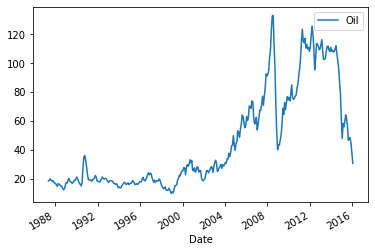

In [114]:
do.plot()

In [132]:
dg = pd.read_csv('https://datahub.io/core/gold-prices/r/monthly.csv')
dg.head(3)                                                    

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73


In [133]:
dg.Date = dg.Date + '-15' # อ่านมาตอนเเรกมีเเค่เดือน กับ ปี   เลยเติมวันที่ 15 ให้เหมือนกับ Oil
dg

,Date,Price
0,1950-01-15,34.730
1,1950-02-15,34.730
2,1950-03-15,34.730
3,1950-04-15,34.730
4,1950-05-15,34.730
...,...,...
842,2020-03-15,1593.764
843,2020-04-15,1680.030
844,2020-05-15,1715.697
845,2020-06-15,1734.032


In [134]:
dg.Date = pd.to_datetime(dg.Date)
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    847 non-null    datetime64[ns]
 1   Price   847 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.4 KB


In [135]:
dg.set_index('Date', inplace=True)
dg.columns = ['Gold']
dg.head(3)

,Gold
Date,
1950-01-15,34.73
1950-02-15,34.73
1950-03-15,34.73


In [137]:
df = pd.merge(do, dg, left_index=True, right_index=True, how='inner')
df

,Oil,Gold
Date,,
1987-05-15,18.58,461.650
1987-06-15,18.86,449.282
1987-07-15,19.86,450.330
1987-08-15,18.98,460.988
1987-09-15,18.31,460.120
...,...,...
2015-09-15,47.62,1124.905
2015-10-15,48.43,1157.123
2015-11-15,44.27,1088.388


<AxesSubplot: >

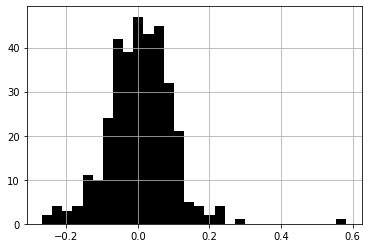

In [144]:
df['Oil'].pct_change().hist(bins=30, color = 'black')

## hist

<AxesSubplot: >

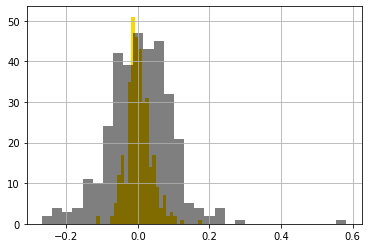

In [147]:
df['Gold'].pct_change().hist(bins=30, color = 'gold')
df['Oil'].pct_change().hist(bins=30, color = 'black', alpha = 0.5)

## line ทำให้มีเเกน y 2 อัน  เพราะว่า scal มันไม่เท่ากัน

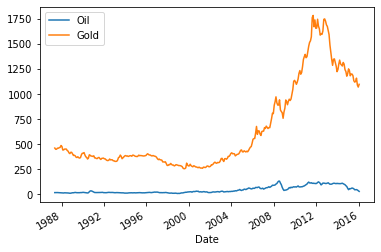

In [154]:
df.plot();

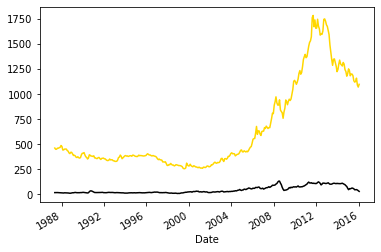

In [155]:
df['Gold'].plot(color ='gold')
df['Oil'].plot(color = 'black'); # มันคือการ plot 2 รูปทับกัน

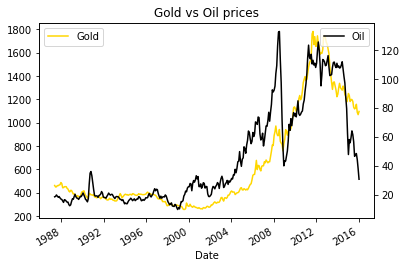

In [164]:
ax1 = df['Gold'].plot(color ='gold', legend='Gold') # กำหนด legend เลย

ax2 = ax1.twinx() # เเกน x ใช้ร่วมกัน  เเต่เเกน y ใช้คนละเเกนกัน ******************************************************************

ax2 = df['Oil'].plot(color = 'black', legend = 'Oil') # กำหนด legend เลย

ax1.set_title('Gold vs Oil prices');

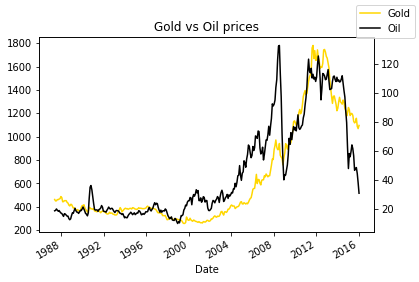

In [166]:
# อันนี้ กับ อันบน ไม่ต่างกัน เเค่ใช้คนละคำสั่งเพื่อให้เเสดง legend เฉยๆ

ax1 = df['Gold'].plot(color ='gold', label='Gold')

ax2 = ax1.twinx() # เเกน x ใช้ร่วมกัน  เเต่เเกน y ใช้คนละเเกนกัน ******************************************************************

ax2 = df['Oil'].plot(color = 'black', label = 'Oil')
ax1.figure.legend() # ถ้าเป็น label ต้องกำหนด ax1.figure.legend() เพื่อให้ี legend ออกมา ***************************************************************************************
ax1.set_title('Gold vs Oil prices');

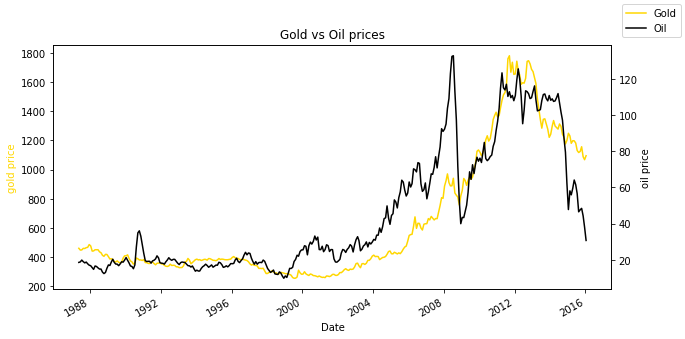

In [170]:
ax1 = df['Gold'].plot(color ='gold', label='Gold', figsize=(10, 5))
ax1.set_ylabel('gold price', color='gold') # ตั้งชื่อเเกน y พร้อมสี

ax2 = ax1.twinx() # เเกน x ใช้ร่วมกัน  เเต่เเกน y ใช้คนละเเกนกัน ******************************************************************

ax2 = df['Oil'].plot(color = 'black', label = 'Oil')
ax2.set_ylabel('oil price', color='black') # ตั้งชื่อเเกน y พร้อมสี

ax1.figure.legend() # ถ้าเป็น label ต้องกำหนด ax1.figure.legend() เพื่อให้ี legend ออกมา ***************************************************************************************
ax1.set_title('Gold vs Oil prices');

# plt.savefig('gold_vs_oil.png', dpi=150)
# plt.savefig('gold_vs_oil.pdf')
# plt.savefig('gold_vs_oil.svg')

## Ex เปรียบเทียบกับวันเเรก

In [172]:
df.head(3)

,Oil,Gold
Date,,
1987-05-15,18.58,461.650
1987-06-15,18.86,449.282
1987-07-15,19.86,450.330


In [175]:
df['gold_change_fist'] = df['Gold'] / df['Gold'][0] - 1
df['oil_change_fist'] = df['Oil'] / df['Oil'][0] - 1
df

,Oil,Gold,gold_change_fist,oil_change_fist
Date,,,,
1987-05-15,18.58,461.650,0.000000,0.000000
1987-06-15,18.86,449.282,-0.026791,0.015070
1987-07-15,19.86,450.330,-0.024521,0.068891
1987-08-15,18.98,460.988,-0.001434,0.021529
1987-09-15,18.31,460.120,-0.003314,-0.014532
...,...,...,...,...
2015-09-15,47.62,1124.905,1.436705,1.562971
2015-10-15,48.43,1157.123,1.506494,1.606566
2015-11-15,44.27,1088.388,1.357604,1.382670


<AxesSubplot: xlabel='Date'>

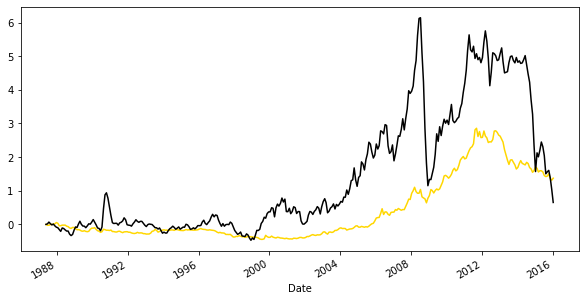

In [178]:
df.gold_change_fist.plot(color='gold', label='gold', figsize=(10, 5))
df.oil_change_fist.plot(color='black', label='oil')

In [180]:
df['2010':] # ทำได้เฉพาะ index เป็น dtype date

,Oil,Gold,gold_change_fist,oil_change_fist
Date,,,,
2010-01-15,76.17,1119.575,1.425160,3.099569
2010-02-15,73.75,1095.800,1.373660,2.969322
2010-03-15,78.83,1115.554,1.416450,3.242734
2010-04-15,84.82,1148.475,1.487761,3.565124
2010-05-15,75.95,1204.321,1.608732,3.087729
...,...,...,...,...
2015-09-15,47.62,1124.905,1.436705,1.562971
2015-10-15,48.43,1157.123,1.506494,1.606566
2015-11-15,44.27,1088.388,1.357604,1.382670


In [181]:
dq = df['2010':'2015']
dq

,Oil,Gold,gold_change_fist,oil_change_fist
Date,,,,
2010-01-15,76.17,1119.575,1.425160,3.099569
2010-02-15,73.75,1095.800,1.373660,2.969322
2010-03-15,78.83,1115.554,1.416450,3.242734
2010-04-15,84.82,1148.475,1.487761,3.565124
2010-05-15,75.95,1204.321,1.608732,3.087729
...,...,...,...,...
2015-08-15,46.52,1117.525,1.420719,1.503767
2015-09-15,47.62,1124.905,1.436705,1.562971
2015-10-15,48.43,1157.123,1.506494,1.606566


<AxesSubplot: xlabel='Date'>

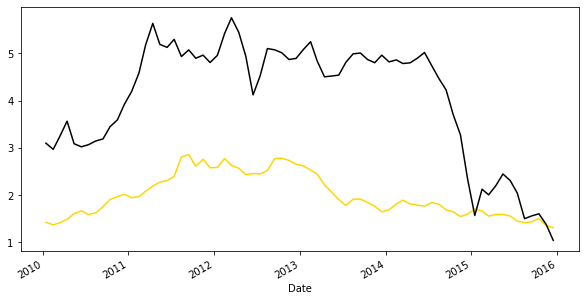

In [183]:
dq['gold_change_fist'].plot(color='gold', label='gold', figsize=(10, 5))
dq['oil_change_fist'].plot(color='black', label='oil')

# คลิป 143 การ merge ราคาน้ำมันและดัชนีตลาดหุ้นรายวันเข้าด้วยกัน (merge oil prices and stock index)

- Oil price vs Stock market index
* oil prices: https://datahub.io/core/oil-prices
* stock market index: https://stooq.com/t/

In [11]:
import requests
from io import StringIO

In [15]:
url='https://datahub.io/core/oil-prices/r/brent-day.csv'
# r=requests.get(url)
# do=pd.read_csv(StringIO(r.text), index_col='Date', parse_dates=['Date'])  ทำเเบบนี้ก็ได้ เเต่ไม่ทำเองอ่ะ

do = pd.read_csv(url, index_col='Date', parse_dates=['Date'])
# do = pd.read_csv(url, index_col='Date', parse_dates=True) เเบบนี้ก็ได้เหมือนกัน
do.head(3)

,Brent Spot Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55


In [21]:
do.columns = ['oil']
do.head(3)

,oil
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55


In [19]:
# do.columns = do.columns.str.replace('oil', 'HUN')  อันนี้ไม่เกี่ยว ทวนเฉยๆ

In [24]:
set_url='https://stooq.com/q/d/l/?s=^set&i=d'
ds=pd.read_csv(set_url, parse_dates=['Date'], index_col='Date')
ds

,Open,High,Low,Close,Volume
Date,,,,,
1975-04-30,100.00,100.00,100.00,100.00,NaN
1975-05-30,89.98,89.98,89.98,89.98,NaN
1975-06-30,91.64,91.64,91.64,91.64,NaN
1975-07-31,98.02,98.02,98.02,98.02,NaN
1975-08-29,98.39,98.39,98.39,98.39,NaN
...,...,...,...,...,...
2023-06-12,1551.12,1555.89,1547.46,1551.41,4.011115e+09
2023-06-13,1553.11,1566.26,1552.30,1562.40,3.528165e+09
2023-06-14,1565.85,1569.34,1559.34,1561.15,3.569353e+09


In [41]:
df = pd.merge(do, ds.Close, left_index=True, right_index=True, how='inner')
                    # left_index=True, right_index=True  merge กันด้วย index
df.columns = ['oil', 'SET']
df

,oil,SET
Date,,
1987-05-29,18.58,269.07
1987-06-30,19.08,299.87
1987-07-02,19.25,299.00
1987-07-03,19.33,314.22
1987-07-06,19.48,317.59
...,...,...
2016-02-02,30.98,1285.30
2016-02-03,32.38,1291.77
2016-02-04,32.76,1297.11


<AxesSubplot: >

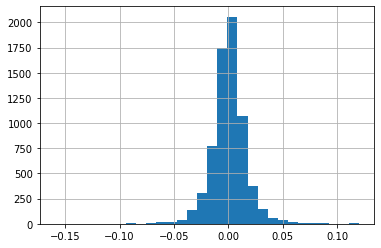

In [42]:
df.SET.pct_change().hist(bins=30)

<AxesSubplot: >

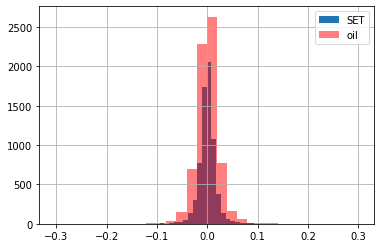

In [45]:
df.SET.pct_change().hist(bins=30, legend = 'SET')
df.oil.pct_change().hist(bins=30, alpha = 0.5, color = 'red', legend = 'oil')

<AxesSubplot: xlabel='Date'>

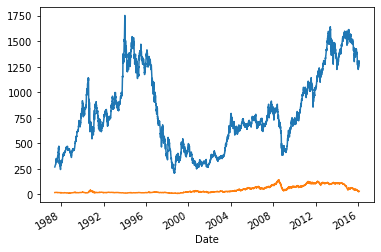

In [46]:
df.SET.plot()
df.oil.plot()

In [47]:
df['SET_change_first'] = df.SET / df.SET[0] - 1
df['oil_change_first'] = df.oil / df.oil[0] - 1
df

,oil,SET,SET_change_first,oil_change_first
Date,,,,
1987-05-29,18.58,269.07,0.000000,0.000000
1987-06-30,19.08,299.87,0.114468,0.026911
1987-07-02,19.25,299.00,0.111235,0.036060
1987-07-03,19.33,314.22,0.167800,0.040366
1987-07-06,19.48,317.59,0.180325,0.048439
...,...,...,...,...
2016-02-02,30.98,1285.30,3.776824,0.667384
2016-02-03,32.38,1291.77,3.800870,0.742734
2016-02-04,32.76,1297.11,3.820716,0.763186


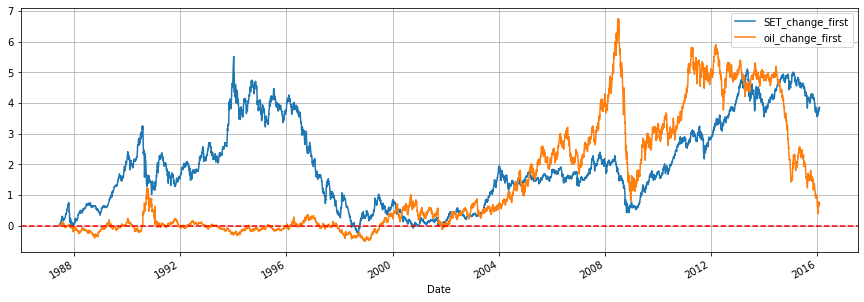

In [67]:
df.SET_change_first.plot(legend=True, figsize=(15, 5))
df.oil_change_first.plot(legend=True, grid=True)

plt.axhline(0, linestyle = '--', color = 'red')

In [ ]:
# plt.savefig('SET_brent.png')
# plt.savefig('SET_brent.jpg')
# plt.savefig('SET_brent.pdf')
# plt.savefig('SET_brent.svg')

# คลิป 144 การอ่านและรวมหลาย ๆ ชีทจาก Google Sheets มาสร้างเป็น DataFrame

## อ่านเเบบลำดับ sheet

In [71]:
# https://docs.google.com/spreadsheets/d/15PUfhKBAGs-_z3sGaH10AwyjYEKHLQlJUlrAEDK6jVw/edit?usp=sharing
url='https://docs.google.com/spreadsheets/d/15PUfhKBAGs-_z3sGaH10AwyjYEKHLQlJUlrAEDK6jVw/export?format=xlsx' # edit?usp=sharing => export?format=xlsx ******************************************************************************
df=pd.read_excel(url, sheet_name=1, engine='openpyxl')
df

,Entry,Film,Director,Leading actors,Year of cinema release,Oscars won,IMDB link,Guardian film page,Country
0,1,Chinatown,Roman Polanski,"Faye Dunaway, Jack Nicholson, John Huston",1974,1.0,http://www.imdb.com/title/tt0071315/,http://www.guardian.co.uk/film/movie/36302/chi...,USA
1,2,Touch of Evil,Orson Welles,"Charlton Heston, Janet Leigh, Marlene Dietrich...",1958,NaN,http://www.imdb.com/title/tt0052311/,http://www.guardian.co.uk/film/movie/36217/tou...,USA
2,3,Vertigo,Alfred Hitchcock,"Barbara Bel Geddes, James Stewart, Kim Novak",1958,NaN,http://www.imdb.com/title/tt0052357/,http://www.guardian.co.uk/film/movie/34909/ver...,USA
3,4,Badlands,Terrence Malik,"Alan Vint, Martin Sheen, Ramon Bieri, Sissy Sp...",1973,NaN,http://www.imdb.com/title/tt0069762/,http://www.guardian.co.uk/film/movie/76181/bad...,USA
4,5,Rashomon,Akira Kurosawa,"Machiko Kyo, Masayuki Mori, Toshiro Mifune",1950,NaN,http://www.imdb.com/title/tt0042876/,http://www.guardian.co.uk/film/movie/83179/ras...,Japan
5,6,Double Indemnity,Billy Wilder,"Porter Hall, Jean Heather, Byron Barr, Richard...",1944,NaN,http://www.imdb.com/title/tt0036775/,http://www.guardian.co.uk/film/movie/36162/dou...,USA
6,7,Get Carter,Mike Hodges,"Brian Mosley, Britt Ekland, Geraldine Moffatt,...",1971,NaN,http://www.imdb.com/title/tt0067128/,http://www.guardian.co.uk/film/movie/36294/get...,UK
7,8,Pulp Fiction,Quentin Tarantino,"Amanda Plummer, Bruce Willis, Eric Stoltz, Har...",1994,1.0,http://www.imdb.com/title/tt0110912/,http://www.guardian.co.uk/film/movie/56612/pul...,USA
8,9,Hidden,Michael Haneke,"Annie Girardot, Daniel Auteuil, Juliette Binoc...",2005,NaN,http://www.imdb.com/title/tt0387898/,http://www.guardian.co.uk/film/movie/108597/hi...,France
9,10,Goodfellas,Martin Scorsese,"Frank Vincent, Joe Pesci, Lorraine Bracco, Ra...",1990,1.0,http://www.imdb.com/title/tt0099685/,http://www.guardian.co.uk/film/movie/37702/goo...,USA


In [76]:
dfs=pd.read_excel(url, sheet_name=list(range(1, 4)), engine='openpyxl') # อ่านทีเดียว 3 ไฟล์พร้อมกัน *********************************************************************************
print(len(dfs))
print(dfs.keys())

3
dict_keys([1, 2, 3])


In [78]:
dfs[1].head(2)

,Entry,Film,Director,Leading actors,Year of cinema release,Oscars won,IMDB link,Guardian film page,Country
0,1,Chinatown,Roman Polanski,"Faye Dunaway, Jack Nicholson, John Huston",1974,1.0,http://www.imdb.com/title/tt0071315/,http://www.guardian.co.uk/film/movie/36302/chi...,USA
1,2,Touch of Evil,Orson Welles,"Charlton Heston, Janet Leigh, Marlene Dietrich...",1958,NaN,http://www.imdb.com/title/tt0052311/,http://www.guardian.co.uk/film/movie/36217/tou...,USA


In [73]:
dfs=pd.read_excel(url, sheet_name=[0, 2, 4, 5], engine='openpyxl') # เลือกอ่านไฟล์
print(len(dfs))
print(dfs.keys()) 

4
dict_keys([0, 2, 4, 5])


## อ่านเป็นชื่อ

In [80]:
dfs=pd.read_excel(url, sheet_name=['CRIME', 'COMEDY', 'HORROR'], engine='openpyxl') # อ่านเป็น ชื่อ ของไฟล์ก็ได้
print(len(dfs))
print(dfs.keys())

3
dict_keys(['CRIME', 'COMEDY', 'HORROR'])


In [83]:
dfs['COMEDY'].head(2)

,Entry,Cat,Film,Director,Leading actors,Year of cinema release,Oscars won,IMDB link,Guardian film page,Country
0,1,Comedy,Annie Hall,Woody Allen,"Carol Kane, Diane Keaton, Paul Simon, Tony Rob...",1977,4.0,http://www.imdb.com/title/tt0075686/,http://www.guardian.co.uk/film/movie/36314/ann...,USA
1,2,Comedy,Borat,Larry Charles,"Ken Davitian, Pamela Anderson , Sacha Baron Cohen",2006,NaN,http://www.imdb.com/title/tt0443453/,http://www.guardian.co.uk/film/movie/114557/borat,USA


## read all sheets

In [84]:
dfs=pd.read_excel(url, sheet_name=None, engine='openpyxl') # อ่านทั้งหมดเลย
print(len(dfs))
print(dfs.keys())

7
dict_keys(['ROMANCE', 'CRIME', 'COMEDY', 'ACTION', 'ARTHOUSE AND DRAMA', 'SCI-FI AND FANTASY', 'HORROR'])


In [85]:
dfs['COMEDY'].head(3)

,Entry,Cat,Film,Director,Leading actors,Year of cinema release,Oscars won,IMDB link,Guardian film page,Country
0,1,Comedy,Annie Hall,Woody Allen,"Carol Kane, Diane Keaton, Paul Simon, Tony Rob...",1977,4.0,http://www.imdb.com/title/tt0075686/,http://www.guardian.co.uk/film/movie/36314/ann...,USA
1,2,Comedy,Borat,Larry Charles,"Ken Davitian, Pamela Anderson , Sacha Baron Cohen",2006,NaN,http://www.imdb.com/title/tt0443453/,http://www.guardian.co.uk/film/movie/114557/borat,USA
2,3,Comedy,Some Like it Hot,Billy Wilder,"George Raft, Jack Lemmon, Joe E Brown, Marilyn...",1959,1.0,http://www.imdb.com/title/tt0053291/,http://www.guardian.co.uk/film/movie/36223/som...,USA


In [86]:
dm=pd.concat(dfs) # ปกติเเล้ว pd.concat([df1, df2, df3, df4, ...], key = [name, name, ...], name = [name ตั้งชื่อ indedx ได้], asxis = 'index|columns'เเล้วเเต่จะให้เอามาต่อกันเเบบไหน)
dm

Entry                     Film                  Director  \
ROMANCE 0       1          Brief Encounter               David Lean    
        1       2               Casablanca            Michael Curtiz   
        2       3           Before Sunrise         Richard Linklater   
        3       3            Before Sunset         Richard Linklater   
        4       4               Breathless           Jean-Luc Godard   
...           ...                      ...                       ...   
HORROR  20     20         Dracula   (1958)            Terence Fisher   
        21     22  The Blair Witch Project  Daniel Myrick, E Sanchez   
        22     23   Evil Dead/Evil Dead II                 Sam Raimi   
        23     24                   Carrie            Brian De Palma   
        24     25      Les Vampires (1915)           Louis Feuillade   

                                               Leading actors  \
ROMANCE 0   Celia Johnson, Cyril Raymond, Stanley Holloway...   
        1   Claude Rains, Humphrey Bogart, Ingrid Bergman,...   
        2                         Ethan Hawke and Julie Delpy   
        3                         Ethan Hawke and Julie Delpy   
        4                     Jean Seberg, Jean-Paul Belmondo   
...                                                       ...   
HORROR  20  Christopher Lee, Melissa Stribling, Michael Go...   
        21  Heather Donahue, Joshua Leonard, Michael C. Wi...   
        22       Betsy Baker, Bruce Campbell, Ellen Sandweiss   
        23          John Travolta, Piper Laurie, Sissy Spacek   
        24                     Edouard Mathe, Marcel Levesque   

           Year of cinema release No of Oscars won  \
ROMANCE 0                    1945              NaN   
        1                    1942              3.0   
        2                    1995              NaN   
        3                    2004              NaN   
        4                    1960              NaN   
...                           ...              ...   
HORROR  20                   1958              NaN   
        21                   1999              NaN   
        22             1981/ 1987              NaN   
        23                   1976              NaN   
        24                   1915              NaN   

                                             IMDB link  \
ROMANCE 0         http://www.imdb.com/title/tt0037558/   
        1         http://www.imdb.com/title/tt0034583/   
        2         http://www.imdb.com/title/tt0112471/   
        3   http://www.imdb.com/title/tt0381681/awards   
        4         http://www.imdb.com/title/tt0053472/   
...                                                ...   
HORROR  20        http://www.imdb.com/title/tt0051554/   
        21        http://www.imdb.com/title/tt0185937/   
        22        http://www.imdb.com/title/tt0083907/   
        23        http://www.imdb.com/title/tt0074285/   
        24        http://www.imdb.com/title/tt0006206/   

                                           Guardian film page Country  \
ROMANCE 0   http://www.guardian.co.uk/film/movie/35664/bri...      UK   
        1   http://www.guardian.co.uk/film/movie/36156/cas...     USA   
        2   http://www.guardian.co.uk/film/movie/58808/bef...     USA   
        3   http://www.guardian.co.uk/film/movie/101181/be...     USA   
        4   http://www.guardian.co.uk/film/movie/36219/a-b...  France   
...                                                       ...     ...   
HORROR  20  http://www.guardian.co.uk/film/movie/36215/dra...      UK   
        21  http://www.guardian.co.uk/film/movie/79459/bla...     USA   
        22  http://www.guardian.co.uk/film/movie/34582/evi...     USA   
        23  http://www.guardian.co.uk/film/movie/81489/carrie     USA   
        24  http://www.guardian.co.uk/film/movie/117077/va...  France   

            Oscars won  Cat  
ROMANCE 0          NaN  NaN  
        1          NaN  NaN  
        2          NaN  NaN  
        3          NaN 

# คลิป 145 การทำความสะอาดข้อมูลด้วย regular expression (str.extract และ str.split) **************************************************************

In [128]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/regexp_extract_split.csv'
df=pd.read_csv(url)
df

,title_year,length,budget_revenue
0,Toy Story (1995),1 hour(s) 21 minute(s),30.0/362.0
1,A Bug's Life (1998),1 hour(s) 36 minute(s),45.0/363.4
2,Toy Story 2 (1999),1 hour(s) 32 minute(s),90.0/485.0
3,"Monsters, Inc. (2001)",1 hour(s) 30 minute(s),115.0/528.8
4,Finding Nemo (2003),1 hour(s) 44 minute(s),94.0/895.6
5,The Incredibles (2004),1 hour(s) 55 minute(s),92.0/631.4
6,Cars (2006),1 hour(s) 56 minute(s),70.0/462.0
7,Ratatouille (2007),1 hour(s) 51 minute(s),150.0/623.7
8,WALL-E (2008),1 hour(s) 37 minute(s),180.0/521.3
9,Up (2009),1 hour(s) 36 minute(s),175.0/731.3


In [129]:
df.title_year.str.extract('(.{1,})\s\((\d{4})\)')

,0,1
0,Toy Story,1995
1,A Bug's Life,1998
2,Toy Story 2,1999
3,"Monsters, Inc.",2001
4,Finding Nemo,2003
5,The Incredibles,2004
6,Cars,2006
7,Ratatouille,2007
8,WALL-E,2008
9,Up,2009


In [130]:
dm = df.title_year.str.extract('(.*)\s\((\d+)\)')
    #  df.title_year.str.extract('(.{1,})\s\((\d{4})\)')   \d{4} ตัวเลข 4 ตัว   .{1,} อะไรก็ได้อย่างน้อย 1 ตัว
                        # จำนวนคู่วงเล็บคือ จำนวนกลุ่มที่ต้องการเเบ่งออกมา  เเละที่เราต้องการจะอยู่ข้างในวงเล็บ **************************************************************************************
dm.columns=['title', 'year']
dm['year']=dm['year'].astype(int)
dm.head()


,title,year
0,Toy Story,1995
1,A Bug's Life,1998
2,Toy Story 2,1999
3,"Monsters, Inc.",2001
4,Finding Nemo,2003


In [131]:
df.head(2)

,title_year,length,budget_revenue
0,Toy Story (1995),1 hour(s) 21 minute(s),30.0/362.0
1,A Bug's Life (1998),1 hour(s) 36 minute(s),45.0/363.4


In [132]:
df.length.str.extract('(\d*)\s.*\s(\d*)\s.*').astype('int')
# df['length'].str.extract('(\d+)\shour\(s\)\s(\d+)\sminute\(s\)').astype(float)  หรือจะทำเเบบนี้ก็ได้ อันนี้มันเขียนตาม pattern เลย

,0,1
0,1,21
1,1,36
2,1,32
3,1,30
4,1,44
5,1,55
6,1,56
7,1,51
8,1,37
9,1,36


In [133]:
dt=df['length'].str.extract('(\d+)\shour\(s\)\s(\d+)\sminute\(s\)').astype(float)
dt.columns=['hour', 'minute']
dt

,hour,minute
0,1.0,21.0
1,1.0,36.0
2,1.0,32.0
3,1.0,30.0
4,1.0,44.0
5,1.0,55.0
6,1.0,56.0
7,1.0,51.0
8,1.0,37.0
9,1.0,36.0


In [134]:
dt['total_min']=dt['hour'] * 60 + dt['minute']
dt

,hour,minute,total_min
0,1.0,21.0,81.0
1,1.0,36.0,96.0
2,1.0,32.0,92.0
3,1.0,30.0,90.0
4,1.0,44.0,104.0
5,1.0,55.0,115.0
6,1.0,56.0,116.0
7,1.0,51.0,111.0
8,1.0,37.0,97.0
9,1.0,36.0,96.0


In [135]:
df

,title_year,length,budget_revenue
0,Toy Story (1995),1 hour(s) 21 minute(s),30.0/362.0
1,A Bug's Life (1998),1 hour(s) 36 minute(s),45.0/363.4
2,Toy Story 2 (1999),1 hour(s) 32 minute(s),90.0/485.0
3,"Monsters, Inc. (2001)",1 hour(s) 30 minute(s),115.0/528.8
4,Finding Nemo (2003),1 hour(s) 44 minute(s),94.0/895.6
5,The Incredibles (2004),1 hour(s) 55 minute(s),92.0/631.4
6,Cars (2006),1 hour(s) 56 minute(s),70.0/462.0
7,Ratatouille (2007),1 hour(s) 51 minute(s),150.0/623.7
8,WALL-E (2008),1 hour(s) 37 minute(s),180.0/521.3
9,Up (2009),1 hour(s) 36 minute(s),175.0/731.3


In [136]:
df.budget_revenue.str.replace(',', '').str.split('/', expand= True).astype('float') 
                                                    # expand= True จะทำที่เป็น list ออกมาเป็น df เเยก
# df.budget_revenue.str.replace(',', '').str.extract('(\d+)/(\d+)').astype('float') # ทำเเบบนี้ก็ได้

,0,1
0,30.0,362.0
1,45.0,363.4
2,90.0,485.0
3,115.0,528.8
4,94.0,895.6
5,92.0,631.4
6,70.0,462.0
7,150.0,623.7
8,180.0,521.3
9,175.0,731.3


In [137]:
ds = df.budget_revenue.str.replace(',', '').str.split('/', expand= True).astype('float')
ds.columns = ['budget', 'revenue']
ds['profit']=ds.revenue-ds.budget
ds

,budget,revenue,profit
0,30.0,362.0,332.0
1,45.0,363.4,318.4
2,90.0,485.0,395.0
3,115.0,528.8,413.8
4,94.0,895.6,801.6
5,92.0,631.4,539.4
6,70.0,462.0,392.0
7,150.0,623.7,473.7
8,180.0,521.3,341.3
9,175.0,731.3,556.3


In [138]:
# หรือจะทำเเบบนี้ก็ได้ 

dtemp=dtemp=df.budget_revenue.str.replace(',', '').str.extract('(.+)/(.+)').astype(float)
dtemp.columns=['budget', 'revenue']
dtemp['profit']=dtemp.revenue-dtemp.budget
dtemp

,budget,revenue,profit
0,30.0,362.0,332.0
1,45.0,363.4,318.4
2,90.0,485.0,395.0
3,115.0,528.8,413.8
4,94.0,895.6,801.6
5,92.0,631.4,539.4
6,70.0,462.0,392.0
7,150.0,623.7,473.7
8,180.0,521.3,341.3
9,175.0,731.3,556.3


In [139]:
df=pd.concat([df, dm, dt, dtemp], axis='columns') # เอามาเชื่อมกันเเบบ columns
    # pd.concat([list ที่ต้องการรวม] ,axis = 'ต้องการมาต่อเเบบไหน')
df

,title_year,length,budget_revenue,title,year,hour,minute,total_min,budget,revenue,profit
0,Toy Story (1995),1 hour(s) 21 minute(s),30.0/362.0,Toy Story,1995,1.0,21.0,81.0,30.0,362.0,332.0
1,A Bug's Life (1998),1 hour(s) 36 minute(s),45.0/363.4,A Bug's Life,1998,1.0,36.0,96.0,45.0,363.4,318.4
2,Toy Story 2 (1999),1 hour(s) 32 minute(s),90.0/485.0,Toy Story 2,1999,1.0,32.0,92.0,90.0,485.0,395.0
3,"Monsters, Inc. (2001)",1 hour(s) 30 minute(s),115.0/528.8,"Monsters, Inc.",2001,1.0,30.0,90.0,115.0,528.8,413.8
4,Finding Nemo (2003),1 hour(s) 44 minute(s),94.0/895.6,Finding Nemo,2003,1.0,44.0,104.0,94.0,895.6,801.6
5,The Incredibles (2004),1 hour(s) 55 minute(s),92.0/631.4,The Incredibles,2004,1.0,55.0,115.0,92.0,631.4,539.4
6,Cars (2006),1 hour(s) 56 minute(s),70.0/462.0,Cars,2006,1.0,56.0,116.0,70.0,462.0,392.0
7,Ratatouille (2007),1 hour(s) 51 minute(s),150.0/623.7,Ratatouille,2007,1.0,51.0,111.0,150.0,623.7,473.7
8,WALL-E (2008),1 hour(s) 37 minute(s),180.0/521.3,WALL-E,2008,1.0,37.0,97.0,180.0,521.3,341.3
9,Up (2009),1 hour(s) 36 minute(s),175.0/731.3,Up,2009,1.0,36.0,96.0,175.0,731.3,556.3


In [140]:
df.mean()

C:\Users\Acer\AppData\Local\Temp\ipykernel_4472\3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


year         2006.066667
hour            1.000000
minute         41.533333
total_min     101.533333
budget        133.400000
revenue       612.486667
profit        479.086667
dtype: float64

## ทวน

In [101]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/regexp_extract_split.csv'
df=pd.read_csv(url)
df

,title_year,length,budget_revenue
0,Toy Story (1995),1 hour(s) 21 minute(s),30.0/362.0
1,A Bug's Life (1998),1 hour(s) 36 minute(s),45.0/363.4
2,Toy Story 2 (1999),1 hour(s) 32 minute(s),90.0/485.0
3,"Monsters, Inc. (2001)",1 hour(s) 30 minute(s),115.0/528.8
4,Finding Nemo (2003),1 hour(s) 44 minute(s),94.0/895.6
5,The Incredibles (2004),1 hour(s) 55 minute(s),92.0/631.4
6,Cars (2006),1 hour(s) 56 minute(s),70.0/462.0
7,Ratatouille (2007),1 hour(s) 51 minute(s),150.0/623.7
8,WALL-E (2008),1 hour(s) 37 minute(s),180.0/521.3
9,Up (2009),1 hour(s) 36 minute(s),175.0/731.3


In [93]:
df['lis'] = df.length.str.split(' ')
df

,title_year,length,budget_revenue,lis
0,Toy Story (1995),1 hour(s) 21 minute(s),30.0/362.0,"[1, hour(s), 21, minute(s)]"
1,A Bug's Life (1998),1 hour(s) 36 minute(s),45.0/363.4,"[1, hour(s), 36, minute(s)]"
2,Toy Story 2 (1999),1 hour(s) 32 minute(s),90.0/485.0,"[1, hour(s), 32, minute(s)]"
3,"Monsters, Inc. (2001)",1 hour(s) 30 minute(s),115.0/528.8,"[1, hour(s), 30, minute(s)]"
4,Finding Nemo (2003),1 hour(s) 44 minute(s),94.0/895.6,"[1, hour(s), 44, minute(s)]"
5,The Incredibles (2004),1 hour(s) 55 minute(s),92.0/631.4,"[1, hour(s), 55, minute(s)]"
6,Cars (2006),1 hour(s) 56 minute(s),70.0/462.0,"[1, hour(s), 56, minute(s)]"
7,Ratatouille (2007),1 hour(s) 51 minute(s),150.0/623.7,"[1, hour(s), 51, minute(s)]"
8,WALL-E (2008),1 hour(s) 37 minute(s),180.0/521.3,"[1, hour(s), 37, minute(s)]"
9,Up (2009),1 hour(s) 36 minute(s),175.0/731.3,"[1, hour(s), 36, minute(s)]"


In [96]:
df.explode('lis')

,title_year,length,budget_revenue,lis
0,Toy Story (1995),1 hour(s) 21 minute(s),30.0/362.0,1
0,Toy Story (1995),1 hour(s) 21 minute(s),30.0/362.0,hour(s)
0,Toy Story (1995),1 hour(s) 21 minute(s),30.0/362.0,21
0,Toy Story (1995),1 hour(s) 21 minute(s),30.0/362.0,minute(s)
1,A Bug's Life (1998),1 hour(s) 36 minute(s),45.0/363.4,1
1,A Bug's Life (1998),1 hour(s) 36 minute(s),45.0/363.4,hour(s)
1,A Bug's Life (1998),1 hour(s) 36 minute(s),45.0/363.4,36
1,A Bug's Life (1998),1 hour(s) 36 minute(s),45.0/363.4,minute(s)
2,Toy Story 2 (1999),1 hour(s) 32 minute(s),90.0/485.0,1
2,Toy Story 2 (1999),1 hour(s) 32 minute(s),90.0/485.0,hour(s)


# คลิป 146 การสร้าง dummy/one-hot จาก multivalued column LinearRegrssion **********************************************************

In [30]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/IMDB_Movie_1000_Data.csv'
df=pd.read_csv(url)
df[:2]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


In [31]:
dd = df.Genre.str.get_dummies(',') # ******************************************************
dd

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
998,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
df = pd.concat([df, dd], axis='columns')
df.head(2)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,...,0,0,0,0,0,1,0,0,0,0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,...,0,0,0,1,0,1,0,0,0,0


## Ex

In [33]:
sg = df.Genre.str.split(',') # ทำ str เป็น list
sg

0       [Action, Adventure, Sci-Fi]
1      [Adventure, Mystery, Sci-Fi]
2                [Horror, Thriller]
3       [Animation, Comedy, Family]
4      [Action, Adventure, Fantasy]
                   ...             
995         [Crime, Drama, Mystery]
996                        [Horror]
997         [Drama, Music, Romance]
998             [Adventure, Comedy]
999       [Comedy, Family, Fantasy]
Name: Genre, Length: 1000, dtype: object

In [34]:
sg.str.join(',') # ทำจาก list ให้เป็น str โดยใช้ , เป็นตัวเชื่อม

0       Action,Adventure,Sci-Fi
1      Adventure,Mystery,Sci-Fi
2               Horror,Thriller
3       Animation,Comedy,Family
4      Action,Adventure,Fantasy
                 ...           
995         Crime,Drama,Mystery
996                      Horror
997         Drama,Music,Romance
998            Adventure,Comedy
999       Comedy,Family,Fantasy
Name: Genre, Length: 1000, dtype: object

In [35]:
sg.str.join(',').str.get_dummies(',') # เป็นตัวอย่างถ้า ข้อมูมาเป็น list เเล้วจะทำยังไงต่อ

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
998,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## LinearRegression ******************************************************************************

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [37]:
df.dropna(inplace=True)

In [38]:
df[['Rating', 'Metascore', 'Votes', 'Revenue (Millions)']].corr() # ดูความสัมพันกัน

,Rating,Metascore,Votes,Revenue (Millions)
Rating,1.000000,0.672731,0.517452,0.217106
Metascore,0.672731,1.000000,0.332674,0.142397
Votes,0.517452,0.332674,1.000000,0.636833
Revenue (Millions),0.217106,0.142397,0.636833,1.000000


In [39]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [40]:
X=df[['Runtime (Minutes)', 'Rating', 'Votes',
       'Metascore', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western']]

y=df['Revenue (Millions)']

In [43]:
X

,Runtime (Minutes),Rating,Votes,Metascore,Action,Adventure,Animation,Biography,Comedy,Crime,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,121,8.1,757074,76.0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,124,7.0,485820,65.0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,117,7.3,157606,62.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,108,7.2,60545,59.0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,123,6.2,393727,40.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,97,5.9,140900,37.0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
994,88,6.7,164088,48.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
996,94,5.5,73152,46.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
997,98,6.2,70699,50.0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [44]:
y

0      333.13
1      126.46
2      138.12
3      270.32
4      325.02
        ...  
993     60.13
994     54.72
996     17.54
997     58.01
999     19.64
Name: Revenue (Millions), Length: 838, dtype: float64

In [41]:
test_size=.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=7) # train_test_split

In [47]:
model = LinearRegression() # สร้าง model

LinearRegression()

In [48]:
model.fit(X_train, y_train) # train model

LinearRegression()

In [49]:
model.score(X_train, y_train)

0.5741012547948967

In [50]:
model.coef_

array([ 9.24143387e-01, -1.59008107e+01,  3.09645993e-04,  3.64585912e-01,
        1.31622903e+01,  2.97699544e+01,  1.01004274e+02,  1.23386077e+00,
        7.79600302e-01, -1.56619141e+01, -2.69118228e+01,  2.35421549e+01,
        1.61540855e+01, -9.65569207e-01, -7.64630401e+00,  7.48008837e+00,
        1.94023781e+01, -1.13989818e+01, -2.92841023e+00, -8.12521307e-01,
        2.70549956e+01, -2.25975833e+00, -2.43904188e+01,  8.14640832e+00])

In [51]:
X.columns

Index(['Runtime (Minutes)', 'Rating', 'Votes', 'Metascore', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')

In [52]:
pd.Series(model.coef_, index=X.columns)

Runtime (Minutes)      0.924143
Rating               -15.900811
Votes                  0.000310
Metascore              0.364586
Action                13.162290
Adventure             29.769954
Animation            101.004274
Biography              1.233861
Comedy                 0.779600
Crime                -15.661914
Drama                -26.911823
Family                23.542155
Fantasy               16.154085
History               -0.965569
Horror                -7.646304
Music                  7.480088
Musical               19.402378
Mystery              -11.398982
Romance               -2.928410
Sci-Fi                -0.812521
Sport                 27.054996
Thriller              -2.259758
War                  -24.390419
Western                8.146408
dtype: float64

In [53]:
model.predict(X_test)

array([ 1.27488917e+02,  3.73403342e+01,  1.26082524e+01,  9.22314007e+01,
        2.97668577e+01,  2.11314730e+02,  5.42372327e+01,  4.37318351e+02,
        1.15310287e+02,  7.35073191e+01,  1.13684323e+02, -8.10550231e+00,
        5.02566889e+01,  2.02217803e+02, -4.33930179e+00,  3.12953846e+02,
        1.71725622e+01,  9.06989310e+01,  9.73112545e+01, -5.06392436e+00,
        8.96678083e+01,  1.93101116e+02,  1.24729538e+02,  3.32730131e+01,
        1.78049696e+02, -1.74471154e+00,  1.97733166e+02,  1.64667127e+02,
        1.32957512e+02,  9.29635795e+01,  4.39892823e+01,  2.25910159e+02,
        8.00181694e+01,  3.31777705e+01,  5.77122467e+01,  3.24151963e+01,
        2.20074972e+02,  5.77572273e+01,  4.38357333e+01, -3.69133726e+01,
        1.39267808e+02,  3.78658398e+01,  2.23774657e+01,  1.31069869e+01,
        1.19954280e+02,  1.67555446e+02,  3.81387984e+01,  7.94911662e+01,
        1.55787580e+02,  3.82142745e+01,  1.19272503e+01, -2.79688406e+00,
        1.24397105e+02,  

In [54]:
dt=y_test.reset_index()
dt[:3]

,index,Revenue (Millions)
0,267,27.10
1,831,49.00
2,72,3.73


In [55]:
dt['y_pred']=model.predict(X_test)
dt['dif']=dt['Revenue (Millions)']-dt['y_pred']
dt[:3]

,index,Revenue (Millions),y_pred,dif
0,267,27.10,127.488917,-100.388917
1,831,49.00,37.340334,11.659666
2,72,3.73,12.608252,-8.878252


In [56]:
# ทำเม่ง 3 model

models=[
    [LinearRegression(), 'LinearRegression'],
    [Ridge(alpha=5), 'Ridge'],
    [Lasso(alpha=5), 'Lasso']
]

mp=[]
for m in models:
    mx=m[0]
    mx.fit(X_train, y_train) # train model
    mp.append([m[1], mx.score(X_test, y_test)]) # ทำนาย
mp

[['LinearRegression', 0.5748213183618712],
 ['Ridge', 0.5751535058225584],
 ['Lasso', 0.5190472805407578]]

# คลิป 147 เทคนิคการใช้ regular expression ในการกรองข้อมูลแบบต่าง ๆ *********************************************************************

In [58]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/IMDBtop1000.csv'
df=pd.read_csv(url, usecols=['Title', 'Actors'])
df.head(2)

,Title,Actors
0,Guardians of the Galaxy,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S..."
1,Prometheus,"Noomi Rapace, Logan Marshall-Green, Michael Fa..."


In [62]:
df[df.Title.str.contains('man', case=False)].head(4) # ขอเเค่มีคำว่า man

,Title,Actors
21,Manchester by the Sea,"Casey Affleck, Michelle Williams, Kyle Chandle..."
60,Batman v Superman: Dawn of Justice,"Ben Affleck, Henry Cavill, Amy Adams, Jesse Ei..."
65,Kingsman: The Secret Service,"Colin Firth, Taron Egerton, Samuel L. Jackson,..."
78,Pirates of the Caribbean: Dead Man's Chest,"Johnny Depp, Orlando Bloom, Keira Knightley, J..."


## ขึ้นต้น

In [66]:
df[df.Title.str.startswith('man')]

,Title,Actors


In [68]:
df[df.Title.str.startswith('Man')]

,Title,Actors
21,Manchester by the Sea,"Casey Affleck, Michelle Williams, Kyle Chandle..."
294,Man of Steel,"Henry Cavill, Amy Adams, Michael Shannon, Dian..."
794,Man on a Ledge,"Sam Worthington, Elizabeth Banks, Jamie Bell, ..."
824,Man Down,"Shia LaBeouf, Jai Courtney, Gary Oldman, Kate ..."


In [69]:
df[df.Title.str.contains('^man', case=False)] # ^man ขึ้นต้นด้วย **************************************************

,Title,Actors
21,Manchester by the Sea,"Casey Affleck, Michelle Williams, Kyle Chandle..."
294,Man of Steel,"Henry Cavill, Amy Adams, Michael Shannon, Dian..."
794,Man on a Ledge,"Sam Worthington, Elizabeth Banks, Jamie Bell, ..."
824,Man Down,"Shia LaBeouf, Jai Courtney, Gary Oldman, Kate ..."


## ลงท้าย

In [70]:
df[df.Title.str.endswith('man')]

,Title,Actors
391,The Gunman,"Sean Penn, Idris Elba, Jasmine Trinca, Javier ..."
564,Snow White and the Huntsman,"Kristen Stewart, Chris Hemsworth, Charlize The..."
570,The Other Woman,"Cameron Diaz, Leslie Mann, Kate Upton, Nikolaj..."


In [71]:
df[df.Title.str.contains('man$')] # ลงท้ายด้วยคำว่า man

,Title,Actors
391,The Gunman,"Sean Penn, Idris Elba, Jasmine Trinca, Javier ..."
564,Snow White and the Huntsman,"Kristen Stewart, Chris Hemsworth, Charlize The..."
570,The Other Woman,"Cameron Diaz, Leslie Mann, Kate Upton, Nikolaj..."


In [72]:
df[df.Title.str.contains('man$', case=False)]

,Title,Actors
179,Ant-Man,"Paul Rudd, Michael Douglas, Corey Stoll, Evang..."
203,Iron Man,"Robert Downey Jr., Gwyneth Paltrow, Terrence H..."
368,The Amazing Spider-Man,"Andrew Garfield, Emma Stone, Rhys Ifans, Irrfa..."
378,Swiss Army Man,"Paul Dano, Daniel Radcliffe, Mary Elizabeth Wi..."
391,The Gunman,"Sean Penn, Idris Elba, Jasmine Trinca, Javier ..."
564,Snow White and the Huntsman,"Kristen Stewart, Chris Hemsworth, Charlize The..."
570,The Other Woman,"Cameron Diaz, Leslie Mann, Kate Upton, Nikolaj..."
593,She's the Man,"Amanda Bynes, Laura Ramsey, Channing Tatum,Vin..."
815,Inside Man,"Denzel Washington, Clive Owen, Jodie Foster,Ch..."


## ระบุความต้องการ

In [74]:
df[df.Title.str.contains('man\s')] # man เเล้วตามด้วย spacebar

,Title,Actors
60,Batman v Superman: Dawn of Justice,"Ben Affleck, Henry Cavill, Amy Adams, Jesse Ei..."
167,Woman in Gold,"Helen Mirren, Ryan Reynolds, Daniel Brühl, Kat..."
260,Birdman or (The Unexpected Virtue of Ignorance),"Michael Keaton, Zach Galifianakis,Edward Norto..."
870,En man som heter Ove,"Rolf Lassgård, Bahar Pars, Filip Berg, Ida Eng..."
924,Superman Returns,"Brandon Routh, Kevin Spacey, Kate Bosworth, Ja..."
936,The Human Centipede (First Sequence),"Dieter Laser, Ashley C. Williams, Ashlynn Yenn..."


In [75]:
df[df.Title.str.contains('man\\b')] # \\b คือ เครื่องหมายวรรคตอน เป็นได้หลายอย่าง เช่น : ; 

,Title,Actors
60,Batman v Superman: Dawn of Justice,"Ben Affleck, Henry Cavill, Amy Adams, Jesse Ei..."
65,Kingsman: The Secret Service,"Colin Firth, Taron Egerton, Samuel L. Jackson,..."
167,Woman in Gold,"Helen Mirren, Ryan Reynolds, Daniel Brühl, Kat..."
234,The Huntsman: Winter's War,"Chris Hemsworth, Jessica Chastain, Charlize Th..."
259,Norman: The Moderate Rise and Tragic Fall of a...,"Richard Gere, Lior Ashkenazi, Michael Sheen,Ch..."
260,Birdman or (The Unexpected Virtue of Ignorance),"Michael Keaton, Zach Galifianakis,Edward Norto..."
391,The Gunman,"Sean Penn, Idris Elba, Jasmine Trinca, Javier ..."
564,Snow White and the Huntsman,"Kristen Stewart, Chris Hemsworth, Charlize The..."
570,The Other Woman,"Cameron Diaz, Leslie Mann, Kate Upton, Nikolaj..."
870,En man som heter Ove,"Rolf Lassgård, Bahar Pars, Filip Berg, Ida Eng..."


In [76]:
df[df.Title.str.contains(r'man\b')]

,Title,Actors
60,Batman v Superman: Dawn of Justice,"Ben Affleck, Henry Cavill, Amy Adams, Jesse Ei..."
65,Kingsman: The Secret Service,"Colin Firth, Taron Egerton, Samuel L. Jackson,..."
167,Woman in Gold,"Helen Mirren, Ryan Reynolds, Daniel Brühl, Kat..."
234,The Huntsman: Winter's War,"Chris Hemsworth, Jessica Chastain, Charlize Th..."
259,Norman: The Moderate Rise and Tragic Fall of a...,"Richard Gere, Lior Ashkenazi, Michael Sheen,Ch..."
260,Birdman or (The Unexpected Virtue of Ignorance),"Michael Keaton, Zach Galifianakis,Edward Norto..."
391,The Gunman,"Sean Penn, Idris Elba, Jasmine Trinca, Javier ..."
564,Snow White and the Huntsman,"Kristen Stewart, Chris Hemsworth, Charlize The..."
570,The Other Woman,"Cameron Diaz, Leslie Mann, Kate Upton, Nikolaj..."
870,En man som heter Ove,"Rolf Lassgård, Bahar Pars, Filip Berg, Ida Eng..."


In [80]:
df[df.Title.str.contains(r'\bman$', case=False)] # เครื่องหมายวรรตอนอยู่ข้างหน้า เเล้วตามด้วย man เเละลงท้าย

,Title,Actors
179,Ant-Man,"Paul Rudd, Michael Douglas, Corey Stoll, Evang..."
203,Iron Man,"Robert Downey Jr., Gwyneth Paltrow, Terrence H..."
368,The Amazing Spider-Man,"Andrew Garfield, Emma Stone, Rhys Ifans, Irrfa..."
378,Swiss Army Man,"Paul Dano, Daniel Radcliffe, Mary Elizabeth Wi..."
593,She's the Man,"Amanda Bynes, Laura Ramsey, Channing Tatum,Vin..."
815,Inside Man,"Denzel Washington, Clive Owen, Jodie Foster,Ch..."


In [81]:
df[df['Title'].str.contains(r'^man', case=False)] # ขึ้นต้นด้วย man

,Title,Actors
21,Manchester by the Sea,"Casey Affleck, Michelle Williams, Kyle Chandle..."
294,Man of Steel,"Henry Cavill, Amy Adams, Michael Shannon, Dian..."
794,Man on a Ledge,"Sam Worthington, Elizabeth Banks, Jamie Bell, ..."
824,Man Down,"Shia LaBeouf, Jai Courtney, Gary Oldman, Kate ..."


In [82]:
df[df['Title'].str.contains(r'^man\b', case=False)] 

,Title,Actors
294,Man of Steel,"Henry Cavill, Amy Adams, Michael Shannon, Dian..."
794,Man on a Ledge,"Sam Worthington, Elizabeth Banks, Jamie Bell, ..."
824,Man Down,"Shia LaBeouf, Jai Courtney, Gary Oldman, Kate ..."


In [83]:
df[df['Title'].str.contains(r'man\b', case=False)] # man + punctuation marks

,Title,Actors
60,Batman v Superman: Dawn of Justice,"Ben Affleck, Henry Cavill, Amy Adams, Jesse Ei..."
65,Kingsman: The Secret Service,"Colin Firth, Taron Egerton, Samuel L. Jackson,..."
78,Pirates of the Caribbean: Dead Man's Chest,"Johnny Depp, Orlando Bloom, Keira Knightley, J..."
104,The Man from U.N.C.L.E.,"Henry Cavill, Armie Hammer, Alicia Vikander, E..."
167,Woman in Gold,"Helen Mirren, Ryan Reynolds, Daniel Brühl, Kat..."
179,Ant-Man,"Paul Rudd, Michael Douglas, Corey Stoll, Evang..."
203,Iron Man,"Robert Downey Jr., Gwyneth Paltrow, Terrence H..."
234,The Huntsman: Winter's War,"Chris Hemsworth, Jessica Chastain, Charlize Th..."
253,The Amazing Spider-Man 2,"Andrew Garfield, Emma Stone, Jamie Foxx, Paul ..."
259,Norman: The Moderate Rise and Tragic Fall of a...,"Richard Gere, Lior Ashkenazi, Michael Sheen,Ch..."


In [84]:
df[df['Title'].str.contains(r'man\b$', case=False)]

,Title,Actors
179,Ant-Man,"Paul Rudd, Michael Douglas, Corey Stoll, Evang..."
203,Iron Man,"Robert Downey Jr., Gwyneth Paltrow, Terrence H..."
368,The Amazing Spider-Man,"Andrew Garfield, Emma Stone, Rhys Ifans, Irrfa..."
378,Swiss Army Man,"Paul Dano, Daniel Radcliffe, Mary Elizabeth Wi..."
391,The Gunman,"Sean Penn, Idris Elba, Jasmine Trinca, Javier ..."
564,Snow White and the Huntsman,"Kristen Stewart, Chris Hemsworth, Charlize The..."
570,The Other Woman,"Cameron Diaz, Leslie Mann, Kate Upton, Nikolaj..."
593,She's the Man,"Amanda Bynes, Laura Ramsey, Channing Tatum,Vin..."
815,Inside Man,"Denzel Washington, Clive Owen, Jodie Foster,Ch..."


In [85]:
df[df['Title'].str.contains(r'\bman\b', case=False)] # เครื่องหมายวรรคตอนอ้อมหน้าหลัง

,Title,Actors
78,Pirates of the Caribbean: Dead Man's Chest,"Johnny Depp, Orlando Bloom, Keira Knightley, J..."
104,The Man from U.N.C.L.E.,"Henry Cavill, Armie Hammer, Alicia Vikander, E..."
179,Ant-Man,"Paul Rudd, Michael Douglas, Corey Stoll, Evang..."
203,Iron Man,"Robert Downey Jr., Gwyneth Paltrow, Terrence H..."
253,The Amazing Spider-Man 2,"Andrew Garfield, Emma Stone, Jamie Foxx, Paul ..."
279,Iron Man Three,"Robert Downey Jr., Guy Pearce, Gwyneth Paltrow..."
294,Man of Steel,"Henry Cavill, Amy Adams, Michael Shannon, Dian..."
344,Spider-Man 3,"Tobey Maguire, Kirsten Dunst, Topher Grace, Th..."
368,The Amazing Spider-Man,"Andrew Garfield, Emma Stone, Rhys Ifans, Irrfa..."
378,Swiss Army Man,"Paul Dano, Daniel Radcliffe, Mary Elizabeth Wi..."


In [87]:
# df[df['Title'].str.contains(r'[1234you]', case=False)] # เเบบนี้ก็ได้
df[df['Title'].str.contains(r'[1-4you]', case=False)] # [] คือ หรือ 1,2,3,4,y,o,u
# df[df['Title'].str.contains(r'1|2|3|4|y|o|u', case=False)]  เเบบนี้ก็ได้

,Title,Actors
0,Guardians of the Galaxy,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S..."
1,Prometheus,"Noomi Rapace, Logan Marshall-Green, Michael Fa..."
4,Suicide Squad,"Will Smith, Jared Leto, Margot Robbie, Viola D..."
7,Mindhorn,"Essie Davis, Andrea Riseborough, Julian Barrat..."
8,The Lost City of Z,"Charlie Hunnam, Robert Pattinson, Sienna Mille..."
...,...,...
994,Project X,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br..."
995,Secret in Their Eyes,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts..."
996,Hostel: Part II,"Lauren German, Heather Matarazzo, Bijou Philli..."
997,Step Up 2: The Streets,"Robert Hoffman, Briana Evigan, Cassie Ventura,..."


In [88]:
df[df['Title'].str.contains(r'wom[ae]n$', case=False)] # ลงท้ายด้วย woman women

,Title,Actors
247,20th Century Women,"Annette Bening, Elle Fanning, Greta Gerwig, Bi..."
570,The Other Woman,"Cameron Diaz, Leslie Mann, Kate Upton, Nikolaj..."


In [89]:
df[df['Title'].str.contains(r'(bat|spider|ant|iron)man', case=False)] # batman spiderman antman ironman

C:\Users\Acer\AppData\Local\Temp\ipykernel_6008\1657805021.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df['Title'].str.contains(r'(bat|spider|ant|iron)man', case=False)]


,Title,Actors
60,Batman v Superman: Dawn of Justice,"Ben Affleck, Henry Cavill, Amy Adams, Jesse Ei..."


In [100]:
df[df['Title'].str.contains(r'(bat|spider|ant|iron)\s*man', case=False)]

C:\Users\Acer\AppData\Local\Temp\ipykernel_6008\4231651121.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df['Title'].str.contains(r'(bat|spider|ant|iron)\s*man', case=False)]


,Title,Actors
60,Batman v Superman: Dawn of Justice,"Ben Affleck, Henry Cavill, Amy Adams, Jesse Ei..."
203,Iron Man,"Robert Downey Jr., Gwyneth Paltrow, Terrence H..."
279,Iron Man Three,"Robert Downey Jr., Guy Pearce, Gwyneth Paltrow..."
450,Iron Man 2,"Robert Downey Jr., Mickey Rourke, Gwyneth Palt..."


In [102]:
df[df['Title'].str.contains(r'(bat|spider|ant|iron)[\-\s]*man', case=False)]

C:\Users\Acer\AppData\Local\Temp\ipykernel_6008\2945204936.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df['Title'].str.contains(r'(bat|spider|ant|iron)[\-\s]*man', case=False)]


,Title,Actors
60,Batman v Superman: Dawn of Justice,"Ben Affleck, Henry Cavill, Amy Adams, Jesse Ei..."
179,Ant-Man,"Paul Rudd, Michael Douglas, Corey Stoll, Evang..."
203,Iron Man,"Robert Downey Jr., Gwyneth Paltrow, Terrence H..."
253,The Amazing Spider-Man 2,"Andrew Garfield, Emma Stone, Jamie Foxx, Paul ..."
279,Iron Man Three,"Robert Downey Jr., Guy Pearce, Gwyneth Paltrow..."
344,Spider-Man 3,"Tobey Maguire, Kirsten Dunst, Topher Grace, Th..."
368,The Amazing Spider-Man,"Andrew Garfield, Emma Stone, Rhys Ifans, Irrfa..."
450,Iron Man 2,"Robert Downey Jr., Mickey Rourke, Gwyneth Palt..."


In [92]:
df[df['Title'].str.contains(r'^bat|^spider|^iron|^ant', case=False)] # พวกนี้ขึ้นต้น

,Title,Actors
60,Batman v Superman: Dawn of Justice,"Ben Affleck, Henry Cavill, Amy Adams, Jesse Ei..."
179,Ant-Man,"Paul Rudd, Michael Douglas, Corey Stoll, Evang..."
203,Iron Man,"Robert Downey Jr., Gwyneth Paltrow, Terrence H..."
256,Battleship,"Alexander Skarsgård, Brooklyn Decker, Liam Nee..."
279,Iron Man Three,"Robert Downey Jr., Guy Pearce, Gwyneth Paltrow..."
344,Spider-Man 3,"Tobey Maguire, Kirsten Dunst, Topher Grace, Th..."
450,Iron Man 2,"Robert Downey Jr., Mickey Rourke, Gwyneth Palt..."
520,Anthropoid,"Jamie Dornan, Cillian Murphy, Brian Caspe, Kar..."
622,Antichrist,"Willem Dafoe, Charlotte Gainsbourg, Storm Ache..."


In [93]:
df[df['Title'].str.contains(r'^(bat|spider|iron|ant)', case=False)] # ขิ้นต้น

C:\Users\Acer\AppData\Local\Temp\ipykernel_6008\929066193.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df['Title'].str.contains(r'^(bat|spider|iron|ant)', case=False)]


,Title,Actors
60,Batman v Superman: Dawn of Justice,"Ben Affleck, Henry Cavill, Amy Adams, Jesse Ei..."
179,Ant-Man,"Paul Rudd, Michael Douglas, Corey Stoll, Evang..."
203,Iron Man,"Robert Downey Jr., Gwyneth Paltrow, Terrence H..."
256,Battleship,"Alexander Skarsgård, Brooklyn Decker, Liam Nee..."
279,Iron Man Three,"Robert Downey Jr., Guy Pearce, Gwyneth Paltrow..."
344,Spider-Man 3,"Tobey Maguire, Kirsten Dunst, Topher Grace, Th..."
450,Iron Man 2,"Robert Downey Jr., Mickey Rourke, Gwyneth Palt..."
520,Anthropoid,"Jamie Dornan, Cillian Murphy, Brian Caspe, Kar..."
622,Antichrist,"Willem Dafoe, Charlotte Gainsbourg, Storm Ache..."


## \d for digit ตัวเลข

In [94]:
df[df['Title'].str.contains(r'\d', case=False)] # มีตัวเลข ตรงไหนก็ได้

,Title,Actors
39,5- 25- 77,"John Francis Daley, Austin Pendleton, Colleen ..."
111,12 Years a Slave,"Chiwetel Ejiofor, Michael Kenneth Williams, Mi..."
113,300,"Gerard Butler, Lena Headey, David Wenham, Domi..."
114,Harry Potter and the Deathly Hallows: Part 2,"Daniel Radcliffe, Emma Watson, Rupert Grint, M..."
118,10 Cloverfield Lane,"John Goodman, Mary Elizabeth Winstead, John Ga..."
...,...,...
970,Texas Chainsaw 3D,"Alexandra Daddario, Tania Raymonde, Scott East..."
973,Scream 4,"Neve Campbell, Courteney Cox, David Arquette, ..."
975,My Big Fat Greek Wedding 2,"Nia Vardalos, John Corbett, Michael Constantin..."
986,Final Destination 5,"Nicholas D'Agosto, Emma Bell, Arlen Escarpeta,..."


In [95]:
df[df['Title'].str.contains(r'[0-9]', case=False)] # มีตัวเลข ตรงไหนก็ได้

,Title,Actors
39,5- 25- 77,"John Francis Daley, Austin Pendleton, Colleen ..."
111,12 Years a Slave,"Chiwetel Ejiofor, Michael Kenneth Williams, Mi..."
113,300,"Gerard Butler, Lena Headey, David Wenham, Domi..."
114,Harry Potter and the Deathly Hallows: Part 2,"Daniel Radcliffe, Emma Watson, Rupert Grint, M..."
118,10 Cloverfield Lane,"John Goodman, Mary Elizabeth Winstead, John Ga..."
...,...,...
970,Texas Chainsaw 3D,"Alexandra Daddario, Tania Raymonde, Scott East..."
973,Scream 4,"Neve Campbell, Courteney Cox, David Arquette, ..."
975,My Big Fat Greek Wedding 2,"Nia Vardalos, John Corbett, Michael Constantin..."
986,Final Destination 5,"Nicholas D'Agosto, Emma Bell, Arlen Escarpeta,..."


In [96]:
df[df['Title'].str.contains(r'\d{2}', case=False)] # ตัวเลข 2 ตัวติดกัน

,Title,Actors
39,5- 25- 77,"John Francis Daley, Austin Pendleton, Colleen ..."
111,12 Years a Slave,"Chiwetel Ejiofor, Michael Kenneth Williams, Mi..."
113,300,"Gerard Butler, Lena Headey, David Wenham, Domi..."
118,10 Cloverfield Lane,"John Goodman, Mary Elizabeth Winstead, John Ga..."
168,13 Hours,"John Krasinski, Pablo Schreiber, James Badge D..."
247,20th Century Women,"Annette Bening, Elle Fanning, Greta Gerwig, Bi..."
272,21 Jump Street,"Jonah Hill, Channing Tatum, Ice Cube,Brie Larson"
276,22 Jump Street,"Channing Tatum, Jonah Hill, Ice Cube,Nick Offe..."
423,300: Rise of an Empire,"Sullivan Stapleton, Eva Green, Lena Headey, Ha..."
472,2012,"John Cusack, Thandie Newton, Chiwetel Ejiofor,..."


In [97]:
df[df['Title'].str.contains(r'\d{2}$', case=False)] # ตัวเลข 2 ตัวลงท้าย

,Title,Actors
39,5- 25- 77,"John Francis Daley, Austin Pendleton, Colleen ..."
113,300,"Gerard Butler, Lena Headey, David Wenham, Domi..."
472,2012,"John Cusack, Thandie Newton, Chiwetel Ejiofor,..."
508,Movie 43,"Emma Stone, Stephen Merchant, Richard Gere, Li..."
671,Child 44,"Tom Hardy, Gary Oldman, Noomi Rapace, Joel Kin..."
776,31,"Malcolm McDowell, Richard Brake, Jeff Daniel P..."
804,1408,"John Cusack, Samuel L. Jackson, Mary McCormack..."
849,42,"Chadwick Boseman, T.R. Knight, Harrison Ford,N..."
850,21,"Jim Sturgess, Kate Bosworth, Kevin Spacey, Aar..."
889,50/50,"Joseph Gordon-Levitt, Seth Rogen, Anna Kendric..."


In [103]:
df[df['Title'].str.contains(r'(3|iii|three)$', case=False)] # ลงท้าย

C:\Users\Acer\AppData\Local\Temp\ipykernel_6008\4284596358.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df['Title'].str.contains(r'(3|iii|three)$', case=False)]


,Title,Actors
279,Iron Man Three,"Robert Downey Jr., Guy Pearce, Gwyneth Paltrow..."
344,Spider-Man 3,"Tobey Maguire, Kirsten Dunst, Topher Grace, Th..."
379,The Expendables 3,"Sylvester Stallone, Jason Statham, Jet Li, Ant..."
496,Men in Black 3,"Will Smith, Tommy Lee Jones, Josh Brolin,Jemai..."
508,Movie 43,"Emma Stone, Stephen Merchant, Richard Gere, Li..."
603,Kung Fu Panda 3,"Jack Black, Bryan Cranston, Dustin Hoffman, An..."
624,Taken 3,"Liam Neeson, Forest Whitaker, Maggie Grace,Fam..."
688,Toy Story 3,"Tom Hanks, Tim Allen, Joan Cusack, Ned Beatty"
869,Mission: Impossible III,"Tom Cruise, Michelle Monaghan, Ving Rhames, Ph..."


In [104]:
df[(df['Title'].str.contains('iron|avenger', case=False)) & (df['Actors'].str.contains('chris', case=False))] # เเละ

,Title,Actors
76,The Avengers,"Robert Downey Jr., Chris Evans, Scarlett Johan..."
94,Avengers: Age of Ultron,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ..."
195,Captain America: The First Avenger,"Chris Evans, Hugo Weaving, Samuel L. Jackson,H..."


In [105]:
df[df['Actors'].str.contains('.*Downey.*Evans', case=False)] # มีอะไรก็ได้กี่ตัวก็ได้อยู่หน้า Downey มีอะไรก็ได้กี่ตัวก็ได้ Evans

,Title,Actors
76,The Avengers,"Robert Downey Jr., Chris Evans, Scarlett Johan..."
94,Avengers: Age of Ultron,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ..."


In [106]:
df[df['Actors'].str.contains('.*Evans.*Downey', case=False)]

,Title,Actors
35,Captain America: Civil War,"Chris Evans, Robert Downey Jr.,Scarlett Johans..."


In [107]:
df[df['Actors'].str.contains('(.*Evans.*Downey)|(.*Downey.*Evans)', case=False)]

C:\Users\Acer\AppData\Local\Temp\ipykernel_6008\3518614371.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df['Actors'].str.contains('(.*Evans.*Downey)|(.*Downey.*Evans)', case=False)]


,Title,Actors
35,Captain America: Civil War,"Chris Evans, Robert Downey Jr.,Scarlett Johans..."
76,The Avengers,"Robert Downey Jr., Chris Evans, Scarlett Johan..."
94,Avengers: Age of Ultron,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ..."


In [108]:
df[df['Actors'].str.contains('(?=.*Downey)(?=.*Evans)', case=False)] # ?= อันไหนขึ้นก่อนก็ได้ format เเบบนี้นะ

,Title,Actors
35,Captain America: Civil War,"Chris Evans, Robert Downey Jr.,Scarlett Johans..."
76,The Avengers,"Robert Downey Jr., Chris Evans, Scarlett Johan..."
94,Avengers: Age of Ultron,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ..."


## quantifiers
- *, ?, +
- a* -> a{0,}
- a+ -> a{1,}
- a? -> a{0,1}

In [109]:
df[df['Title'].str.contains(r'i*', case=False)] # มี i กี่ตัวก้ได้

,Title,Actors
0,Guardians of the Galaxy,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S..."
1,Prometheus,"Noomi Rapace, Logan Marshall-Green, Michael Fa..."
2,Split,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar..."
3,Sing,"Matthew McConaughey,Reese Witherspoon, Seth Ma..."
4,Suicide Squad,"Will Smith, Jared Leto, Margot Robbie, Viola D..."
...,...,...
995,Secret in Their Eyes,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts..."
996,Hostel: Part II,"Lauren German, Heather Matarazzo, Bijou Philli..."
997,Step Up 2: The Streets,"Robert Hoffman, Briana Evigan, Cassie Ventura,..."
998,Search Party,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh..."


In [111]:
df[df['Title'].str.contains(r'i{0,}', case=False)] # มีค่าเท่ากับ i*  {start, stop}

,Title,Actors
0,Guardians of the Galaxy,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S..."
1,Prometheus,"Noomi Rapace, Logan Marshall-Green, Michael Fa..."
2,Split,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar..."
3,Sing,"Matthew McConaughey,Reese Witherspoon, Seth Ma..."
4,Suicide Squad,"Will Smith, Jared Leto, Margot Robbie, Viola D..."
...,...,...
995,Secret in Their Eyes,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts..."
996,Hostel: Part II,"Lauren German, Heather Matarazzo, Bijou Philli..."
997,Step Up 2: The Streets,"Robert Hoffman, Briana Evigan, Cassie Ventura,..."
998,Search Party,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh..."


In [113]:
df[df['Title'].str.contains(r'i{2,}', case=False)] # i 2ตัวติดกันขึ้นไป

,Title,Actors
50,Star Wars: Episode VII - The Force Awakens,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna..."
206,Raw (II),"Garance Marillier, Ella Rumpf, Rabah Nait Oufe..."
609,Hellboy II: The Golden Army,"Ron Perlman, Selma Blair, Doug Jones, John Ale..."
693,Pompeii,"Kit Harington, Emily Browning, Kiefer Sutherla..."
720,Nymphomaniac: Vol. II,"Charlotte Gainsbourg, Stellan Skarsgård, Wille..."
869,Mission: Impossible III,"Tom Cruise, Michelle Monaghan, Ving Rhames, Ph..."
996,Hostel: Part II,"Lauren German, Heather Matarazzo, Bijou Philli..."


In [114]:
df[df['Title'].str.contains(r'i?', case=False)]

,Title,Actors
0,Guardians of the Galaxy,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S..."
1,Prometheus,"Noomi Rapace, Logan Marshall-Green, Michael Fa..."
2,Split,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar..."
3,Sing,"Matthew McConaughey,Reese Witherspoon, Seth Ma..."
4,Suicide Squad,"Will Smith, Jared Leto, Margot Robbie, Viola D..."
...,...,...
995,Secret in Their Eyes,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts..."
996,Hostel: Part II,"Lauren German, Heather Matarazzo, Bijou Philli..."
997,Step Up 2: The Streets,"Robert Hoffman, Briana Evigan, Cassie Ventura,..."
998,Search Party,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh..."


In [115]:
df[df['Title'].str.contains(r'i{0,1}', case=False)] # เหมือนข้างบนอ่ะ

,Title,Actors
0,Guardians of the Galaxy,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S..."
1,Prometheus,"Noomi Rapace, Logan Marshall-Green, Michael Fa..."
2,Split,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar..."
3,Sing,"Matthew McConaughey,Reese Witherspoon, Seth Ma..."
4,Suicide Squad,"Will Smith, Jared Leto, Margot Robbie, Viola D..."
...,...,...
995,Secret in Their Eyes,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts..."
996,Hostel: Part II,"Lauren German, Heather Matarazzo, Bijou Philli..."
997,Step Up 2: The Streets,"Robert Hoffman, Briana Evigan, Cassie Ventura,..."
998,Search Party,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh..."


In [116]:
df[df['Title'].str.contains(r'i+', case=False)] # i+ คือ i อย่างน้อย 1 ตัว

,Title,Actors
0,Guardians of the Galaxy,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S..."
2,Split,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar..."
3,Sing,"Matthew McConaughey,Reese Witherspoon, Seth Ma..."
4,Suicide Squad,"Will Smith, Jared Leto, Margot Robbie, Viola D..."
7,Mindhorn,"Essie Davis, Andrea Riseborough, Julian Barrat..."
...,...,...
992,Take Me Home Tonight,"Topher Grace, Anna Faris, Dan Fogler, Teresa P..."
993,Resident Evil: Afterlife,"Milla Jovovich, Ali Larter, Wentworth Miller,K..."
995,Secret in Their Eyes,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts..."
996,Hostel: Part II,"Lauren German, Heather Matarazzo, Bijou Philli..."


In [117]:
df[df['Title'].str.contains(r'i{1,}', case=False)] # i{1,} คือ i อย่างน้อย 1 ตัว

,Title,Actors
0,Guardians of the Galaxy,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S..."
2,Split,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar..."
3,Sing,"Matthew McConaughey,Reese Witherspoon, Seth Ma..."
4,Suicide Squad,"Will Smith, Jared Leto, Margot Robbie, Viola D..."
7,Mindhorn,"Essie Davis, Andrea Riseborough, Julian Barrat..."
...,...,...
992,Take Me Home Tonight,"Topher Grace, Anna Faris, Dan Fogler, Teresa P..."
993,Resident Evil: Afterlife,"Milla Jovovich, Ali Larter, Wentworth Miller,K..."
995,Secret in Their Eyes,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts..."
996,Hostel: Part II,"Lauren German, Heather Matarazzo, Bijou Philli..."


In [118]:
df[df['Title'].str.contains(r'i{2,}', case=False)] # i อย่างน้อย2ตัวที่ติดกันขึ้นไป

,Title,Actors
50,Star Wars: Episode VII - The Force Awakens,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna..."
206,Raw (II),"Garance Marillier, Ella Rumpf, Rabah Nait Oufe..."
609,Hellboy II: The Golden Army,"Ron Perlman, Selma Blair, Doug Jones, John Ale..."
693,Pompeii,"Kit Harington, Emily Browning, Kiefer Sutherla..."
720,Nymphomaniac: Vol. II,"Charlotte Gainsbourg, Stellan Skarsgård, Wille..."
869,Mission: Impossible III,"Tom Cruise, Michelle Monaghan, Ving Rhames, Ph..."
996,Hostel: Part II,"Lauren German, Heather Matarazzo, Bijou Philli..."


# คลิป 148 pandas DataFrame ให้เป็น Sparse เพื่อทำ Market Basket Analysis

In [2]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/grocery_basket_int.csv'
df = pd.read_csv(url)
df[:5]

,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,beverages,...,uht-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
df.shape

(9835, 169)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Columns: 169 entries, abrasive cleaner to zwieback
dtypes: int64(169)
memory usage: 12.7 MB


In [4]:
basket=df.astype(pd.SparseDtype("int"))
basket[:10]

,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,beverages,...,uht-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
basket.info() # จะทำให้ใช้ memory usage น้อยลง

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Columns: 169 entries, abrasive cleaner to zwieback
dtypes: Sparse[int32, 0](169)
memory usage: 338.9 KB


In [7]:
basket.memory_usage(deep=True)

Index                 128
abrasive cleaner      280
artif. sweetener      256
baby cosmetics         48
baby food               8
                    ...  
white bread          3312
white wine           1496
whole milk          20104
yogurt              10976
zwieback              544
Length: 170, dtype: int64

In [8]:
df.memory_usage(deep=True)

Index                 128
abrasive cleaner    78680
artif. sweetener    78680
baby cosmetics      78680
baby food           78680
                    ...  
white bread         78680
white wine          78680
whole milk          78680
yogurt              78680
zwieback            78680
Length: 170, dtype: int64

In [9]:
basket2=df.astype(pd.SparseDtype("bool"))
basket2[:10]

,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,beverages,...,uht-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [10]:
basket2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Columns: 169 entries, abrasive cleaner to zwieback
dtypes: Sparse[bool, False](169)
memory usage: 211.9 KB


In [11]:
basket.memory_usage(deep=True)

Index                 128
abrasive cleaner      280
artif. sweetener      256
baby cosmetics         48
baby food               8
                    ...  
white bread          3312
white wine           1496
whole milk          20104
yogurt              10976
zwieback              544
Length: 170, dtype: int64

In [12]:
basket2.memory_usage(deep=True)

Index                 128
abrasive cleaner      175
artif. sweetener      160
baby cosmetics         30
baby food               5
                    ...  
white bread          2070
white wine            935
whole milk          12565
yogurt               6860
zwieback              340
Length: 170, dtype: int64

## basket analysis

In [14]:
import mlxtend
from mlxtend.frequent_patterns import association_rules, apriori

In [22]:
basket2.head(3)

,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,beverages,...,uht-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [17]:
frequent_itemsets = apriori(basket2, min_support = 0.05, use_colnames = True) # use_colnames = True มันจะบอกเป็นชื่อ columns ถ้า use_colnames = Fales จะบอกเป็น index เเทน
frequent_itemsets.sort_values('support', ascending=False)

,support,itemsets
26,0.255516,(whole milk)
15,0.193493,(other vegetables)
19,0.183935,(rolls/buns)
23,0.174377,(soda)
27,0.139502,(yogurt)
2,0.110524,(bottled water)
20,0.108998,(root vegetables)
24,0.104931,(tropical fruit)
22,0.098526,(shopping bags)
21,0.093950,(sausage)


In [19]:
frequent_itemsets[frequent_itemsets['itemsets']=={'whole milk'}]

,support,itemsets
26,0.255516,(whole milk)


In [20]:
frequent_itemsets[frequent_itemsets['itemsets'].str.join('|').str.contains('whole milk')]

,support,itemsets
26,0.255516,(whole milk)
28,0.074835,"(whole milk, other vegetables)"
29,0.056634,"(rolls/buns, whole milk)"
30,0.056024,"(whole milk, yogurt)"


In [21]:
# metric = ['support', 'confidence', 'lift', 'leverage', and 'conviction']
# rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = .1)
rules = association_rules(frequent_itemsets, metric = "support", min_threshold=.05)
# rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.sort_values('lift', ascending = False, inplace = True)
rules[:5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132,0.422732
4,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157,0.488608
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013,0.420750
0,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548,0.455803
2,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696,0.208496


# คลิป 149 ทำความสะอาดข้อมูลแบบ multilevel ด้วย pandas (clean multilevel table)

In [37]:
df=pd.read_excel('https://github.com/prasertcbs/basic-dataset/raw/master/starbucks_bakery.xlsx')
df

,Product Name,Label Wt (g),Calories,Total fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugar (g),Protein (g),Vitamin A (%DV),Vitamin C (%DV),Calcium (%DV),Iron (%DV)
0,"COOKIES, BROWNIES & BARS",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cherry Oat Bar,92.0,310.0,10.0,6.0,0.0,35.0,240.0,47.0,2.0,28.0,3.0,0.20,0.02,0.00,0.20
2,Double Chocolate Chunk Brownie,84.0,380.0,23.0,7.0,0.3,70.0,170.0,41.0,2.0,28.0,4.0,0.06,0.00,0.04,0.15
3,Gluten Free Marshmallow Dream Bar,60.0,240.0,5.0,3.0,0.1,15.0,260.0,45.0,0.0,23.0,2.0,0.04,0.00,0.00,0.02
4,Oat Fudge Bar,85.0,360.0,20.0,11.0,0.1,20.0,230.0,45.0,3.0,26.0,5.0,0.15,0.02,0.06,0.15
5,Blueberry Bar,75.0,250.0,13.0,6.0,0.3,20.0,180.0,35.0,3.0,14.0,4.0,0.15,0.00,0.20,0.10
6,Oat Bar,80.0,360.0,19.0,11.0,1.0,40.0,220.0,43.0,5.0,12.0,6.0,0.20,0.00,0.00,0.10
7,White Chocolate Macadamia Cookie,90.0,430.0,23.0,12.0,0.3,55.0,270.0,51.0,1.0,33.0,5.0,0.15,0.00,0.04,0.10
8,Ginger Molasses Cookie,90.0,350.0,10.0,6.0,0.2,50.0,250.0,59.0,1.0,35.0,5.0,0.10,0.00,0.08,0.20
9,Peanut Butter Cookie,90.0,430.0,24.0,9.0,0.3,60.0,370.0,44.0,2.0,27.0,9.0,0.15,0.00,0.02,0.10


In [38]:
df = df.dropna(subset='Product Name').reset_index(drop=True)
       # dropna(subset='Product Name') ถ้า column นี้มีค่าว่างจะลบ index นั้นทิ้ง
       # reset_index(drop=True) ให้ reset index ใหม่ เเละ ให้ลบ column ที่เปิดจาก index ทิ้ง
df

,Product Name,Label Wt (g),Calories,Total fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugar (g),Protein (g),Vitamin A (%DV),Vitamin C (%DV),Calcium (%DV),Iron (%DV)
0,"COOKIES, BROWNIES & BARS",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cherry Oat Bar,92.0,310.0,10.0,6.0,0.0,35.0,240.0,47.0,2.0,28.0,3.0,0.20,0.02,0.00,0.20
2,Double Chocolate Chunk Brownie,84.0,380.0,23.0,7.0,0.3,70.0,170.0,41.0,2.0,28.0,4.0,0.06,0.00,0.04,0.15
3,Gluten Free Marshmallow Dream Bar,60.0,240.0,5.0,3.0,0.1,15.0,260.0,45.0,0.0,23.0,2.0,0.04,0.00,0.00,0.02
4,Oat Fudge Bar,85.0,360.0,20.0,11.0,0.1,20.0,230.0,45.0,3.0,26.0,5.0,0.15,0.02,0.06,0.15
5,Blueberry Bar,75.0,250.0,13.0,6.0,0.3,20.0,180.0,35.0,3.0,14.0,4.0,0.15,0.00,0.20,0.10
6,Oat Bar,80.0,360.0,19.0,11.0,1.0,40.0,220.0,43.0,5.0,12.0,6.0,0.20,0.00,0.00,0.10
7,White Chocolate Macadamia Cookie,90.0,430.0,23.0,12.0,0.3,55.0,270.0,51.0,1.0,33.0,5.0,0.15,0.00,0.04,0.10
8,Ginger Molasses Cookie,90.0,350.0,10.0,6.0,0.2,50.0,250.0,59.0,1.0,35.0,5.0,0.10,0.00,0.08,0.20
9,Peanut Butter Cookie,90.0,430.0,24.0,9.0,0.3,60.0,370.0,44.0,2.0,27.0,9.0,0.15,0.00,0.02,0.10


In [39]:
df.loc[0, :]

Product Name          COOKIES, BROWNIES & BARS
Label Wt (g)                               NaN
Calories                                   NaN
Total fat (g)                              NaN
Saturated  Fat (g)                         NaN
Trans Fat (g)                              NaN
Cholesterol (mg)                           NaN
Sodium (mg)                                NaN
Carbohydrates (g)                          NaN
Fiber (g)                                  NaN
Sugar (g)                                  NaN
Protein (g)                                NaN
Vitamin A (%DV)                            NaN
Vitamin C (%DV)                            NaN
Calcium (%DV)                              NaN
Iron (%DV)                                 NaN
Name: 0, dtype: object

In [40]:
type(df.loc[0, 'Calories'])

numpy.float64

In [41]:
np.isnan(df.loc[0, 'Calories']) # เช็คว่าว่างไหม

True

In [48]:
np.isnan(df.loc[1, 'Calories'])

False

In [42]:
df.apply(lambda r: r['Product Name'] if np.isnan(r['Calories']) else np.nan, axis=1) # *****************************************************************************************

0              COOKIES, BROWNIES & BARS
1                                   NaN
2                                   NaN
3                                   NaN
4                                   NaN
5                                   NaN
6                                   NaN
7                                   NaN
8                                   NaN
9                                   NaN
10                                  NaN
11                                  NaN
12                                  NaN
13                                  NaN
14         CROISSANTS, BAGELS, & BREADS
15                                  NaN
16                                  NaN
17                                  NaN
18                                  NaN
19                                  NaN
20                                  NaN
21                                  NaN
22                                  NaN
23                                  NaN
24                                  NaN


In [43]:
df['Category'] = df.apply(lambda r: r['Product Name'] if np.isnan(r['Calories']) else np.nan, axis=1) # **********************************************************************************************************************************
df

,Product Name,Label Wt (g),Calories,Total fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugar (g),Protein (g),Vitamin A (%DV),Vitamin C (%DV),Calcium (%DV),Iron (%DV),Category
0,"COOKIES, BROWNIES & BARS",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"COOKIES, BROWNIES & BARS"
1,Cherry Oat Bar,92.0,310.0,10.0,6.0,0.0,35.0,240.0,47.0,2.0,28.0,3.0,0.20,0.02,0.00,0.20,NaN
2,Double Chocolate Chunk Brownie,84.0,380.0,23.0,7.0,0.3,70.0,170.0,41.0,2.0,28.0,4.0,0.06,0.00,0.04,0.15,NaN
3,Gluten Free Marshmallow Dream Bar,60.0,240.0,5.0,3.0,0.1,15.0,260.0,45.0,0.0,23.0,2.0,0.04,0.00,0.00,0.02,NaN
4,Oat Fudge Bar,85.0,360.0,20.0,11.0,0.1,20.0,230.0,45.0,3.0,26.0,5.0,0.15,0.02,0.06,0.15,NaN
5,Blueberry Bar,75.0,250.0,13.0,6.0,0.3,20.0,180.0,35.0,3.0,14.0,4.0,0.15,0.00,0.20,0.10,NaN
6,Oat Bar,80.0,360.0,19.0,11.0,1.0,40.0,220.0,43.0,5.0,12.0,6.0,0.20,0.00,0.00,0.10,NaN
7,White Chocolate Macadamia Cookie,90.0,430.0,23.0,12.0,0.3,55.0,270.0,51.0,1.0,33.0,5.0,0.15,0.00,0.04,0.10,NaN
8,Ginger Molasses Cookie,90.0,350.0,10.0,6.0,0.2,50.0,250.0,59.0,1.0,35.0,5.0,0.10,0.00,0.08,0.20,NaN
9,Peanut Butter Cookie,90.0,430.0,24.0,9.0,0.3,60.0,370.0,44.0,2.0,27.0,9.0,0.15,0.00,0.02,0.10,NaN


In [44]:
df.Category = df.Category.fillna(method='ffill')
df

,Product Name,Label Wt (g),Calories,Total fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugar (g),Protein (g),Vitamin A (%DV),Vitamin C (%DV),Calcium (%DV),Iron (%DV),Category
0,"COOKIES, BROWNIES & BARS",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"COOKIES, BROWNIES & BARS"
1,Cherry Oat Bar,92.0,310.0,10.0,6.0,0.0,35.0,240.0,47.0,2.0,28.0,3.0,0.20,0.02,0.00,0.20,"COOKIES, BROWNIES & BARS"
2,Double Chocolate Chunk Brownie,84.0,380.0,23.0,7.0,0.3,70.0,170.0,41.0,2.0,28.0,4.0,0.06,0.00,0.04,0.15,"COOKIES, BROWNIES & BARS"
3,Gluten Free Marshmallow Dream Bar,60.0,240.0,5.0,3.0,0.1,15.0,260.0,45.0,0.0,23.0,2.0,0.04,0.00,0.00,0.02,"COOKIES, BROWNIES & BARS"
4,Oat Fudge Bar,85.0,360.0,20.0,11.0,0.1,20.0,230.0,45.0,3.0,26.0,5.0,0.15,0.02,0.06,0.15,"COOKIES, BROWNIES & BARS"
5,Blueberry Bar,75.0,250.0,13.0,6.0,0.3,20.0,180.0,35.0,3.0,14.0,4.0,0.15,0.00,0.20,0.10,"COOKIES, BROWNIES & BARS"
6,Oat Bar,80.0,360.0,19.0,11.0,1.0,40.0,220.0,43.0,5.0,12.0,6.0,0.20,0.00,0.00,0.10,"COOKIES, BROWNIES & BARS"
7,White Chocolate Macadamia Cookie,90.0,430.0,23.0,12.0,0.3,55.0,270.0,51.0,1.0,33.0,5.0,0.15,0.00,0.04,0.10,"COOKIES, BROWNIES & BARS"
8,Ginger Molasses Cookie,90.0,350.0,10.0,6.0,0.2,50.0,250.0,59.0,1.0,35.0,5.0,0.10,0.00,0.08,0.20,"COOKIES, BROWNIES & BARS"
9,Peanut Butter Cookie,90.0,430.0,24.0,9.0,0.3,60.0,370.0,44.0,2.0,27.0,9.0,0.15,0.00,0.02,0.10,"COOKIES, BROWNIES & BARS"


In [45]:
df=df.dropna(subset=['Calories']).reset_index(drop=True) # blank rows
df

,Product Name,Label Wt (g),Calories,Total fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugar (g),Protein (g),Vitamin A (%DV),Vitamin C (%DV),Calcium (%DV),Iron (%DV),Category
0,Cherry Oat Bar,92.0,310.0,10.0,6.0,0.0,35.0,240.0,47.0,2.0,28.0,3.0,0.20,0.02,0.00,0.20,"COOKIES, BROWNIES & BARS"
1,Double Chocolate Chunk Brownie,84.0,380.0,23.0,7.0,0.3,70.0,170.0,41.0,2.0,28.0,4.0,0.06,0.00,0.04,0.15,"COOKIES, BROWNIES & BARS"
2,Gluten Free Marshmallow Dream Bar,60.0,240.0,5.0,3.0,0.1,15.0,260.0,45.0,0.0,23.0,2.0,0.04,0.00,0.00,0.02,"COOKIES, BROWNIES & BARS"
3,Oat Fudge Bar,85.0,360.0,20.0,11.0,0.1,20.0,230.0,45.0,3.0,26.0,5.0,0.15,0.02,0.06,0.15,"COOKIES, BROWNIES & BARS"
4,Blueberry Bar,75.0,250.0,13.0,6.0,0.3,20.0,180.0,35.0,3.0,14.0,4.0,0.15,0.00,0.20,0.10,"COOKIES, BROWNIES & BARS"
5,Oat Bar,80.0,360.0,19.0,11.0,1.0,40.0,220.0,43.0,5.0,12.0,6.0,0.20,0.00,0.00,0.10,"COOKIES, BROWNIES & BARS"
6,White Chocolate Macadamia Cookie,90.0,430.0,23.0,12.0,0.3,55.0,270.0,51.0,1.0,33.0,5.0,0.15,0.00,0.04,0.10,"COOKIES, BROWNIES & BARS"
7,Ginger Molasses Cookie,90.0,350.0,10.0,6.0,0.2,50.0,250.0,59.0,1.0,35.0,5.0,0.10,0.00,0.08,0.20,"COOKIES, BROWNIES & BARS"
8,Peanut Butter Cookie,90.0,430.0,24.0,9.0,0.3,60.0,370.0,44.0,2.0,27.0,9.0,0.15,0.00,0.02,0.10,"COOKIES, BROWNIES & BARS"
9,Chocolate Chunk Cookie,70.0,310.0,15.0,9.0,0.3,50.0,260.0,42.0,2.0,27.0,4.0,0.10,0.00,0.02,0.15,"COOKIES, BROWNIES & BARS"


In [46]:
df.groupby('Category').describe()

Label Wt (g)                               \
                                         count        mean        std   min   
Category                                                                      
COOKIES, BROWNIES & BARS                  13.0   78.538462  14.163423  45.0   
CROISSANTS, BAGELS, & BREADS              13.0   97.692308  14.109008  64.0   
DOUGHNUTS, SWEET ROLLS & DANISHES          4.0  102.750000  17.327723  80.0   
LOAVES, COFFEE CAKES, CAKE POPS            9.0   98.888889  34.016336  38.0   
MUFFINS & SCONES                           9.0  102.333333  26.348624  33.0   

                                                               Calories  \
                                      25%    50%    75%    max    count   
Category                                                                  
COOKIES, BROWNIES & BARS            70.00   84.0   90.0   92.0     13.0   
CROISSANTS, BAGELS, & BREADS        92.00   99.0  108.0  113.0     13.0   
DOUGHNUTS, SWEET ROLLS & DANISHES   94.25  106.0  114.5  119.0      4.0   
LOAVES, COFFEE CAKES, CAKE POPS    100.00  115.0  118.0  126.0      9.0   
MUFFINS & SCONES                   110.00  113.0  113.0  113.0      9.0   

                                               ... Calcium (%DV)        \
                                         mean  ...           75%   max   
Category                                       ...                       
COOKIES, BROWNIES & BARS           326.923077  ...         0.040  0.20   
CROISSANTS, BAGELS, & BREADS       311.538462  ...         0.080  0.20   
DOUGHNUTS, SWEET ROLLS & DANISHES  405.000000  ...         0.045  0.06   
LOAVES, COFFEE CAKES, CAKE POPS    368.888889  ...         0.040  0.06   
MUFFINS & SCONES                   364.444444  ...         0.040  0.06   

                                  Iron (%DV)                                  \
                                       count      mean       std   min   25%   
Category                                                                       
COOKIES, BROWNIES & BARS                13.0  0.124615  0.048754  0.02  0.10   
CROISSANTS, BAGELS, & BREADS            13.0  0.169231  0.085485  0.00  0.10   
DOUGHNUTS, SWEET ROLLS & DANISHES        4.0  0.115000  0.057446  0.08  0.08   
LOAVES, COFFEE CAKES, CAKE POPS          9.0  0.134444  0.077800  0.00  0.10   
MUFFINS & SCONES                         9.0  0.128889  0.081001  0.02  0.10   

                                                      
                                    50%    75%   max  
Category                                              
COOKIES, BROWNIES & BARS           0.10  0.150  0.20  
CROISSANTS, BAGELS, & BREADS       0.15  0.200  0.30  
DOUGHNUTS, SWEET ROLLS & DANISHES  0.09  0.125  0.20  
LOAVES, COFFEE CAKES, CAKE POPS    0.15  0.200  0.25  
MUFFINS & SCONES                   0.10  0.150  0.25  

[5 rows x 120 columns]

In [47]:
df[['Category', 'Product Name', 'Label Wt (g)', 'Calories', 'Total fat (g)',
       'Saturated  Fat (g)', 'Trans Fat (g)', 'Cholesterol (mg)',
       'Sodium (mg)', 'Carbohydrates (g)', 'Fiber (g)', 'Sugar (g)',
       'Protein (g)', 'Vitamin A (%DV)', 'Vitamin C (%DV)', 'Calcium (%DV)',
       'Iron (%DV)']]

,Category,Product Name,Label Wt (g),Calories,Total fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugar (g),Protein (g),Vitamin A (%DV),Vitamin C (%DV),Calcium (%DV),Iron (%DV)
0,"COOKIES, BROWNIES & BARS",Cherry Oat Bar,92.0,310.0,10.0,6.0,0.0,35.0,240.0,47.0,2.0,28.0,3.0,0.20,0.02,0.00,0.20
1,"COOKIES, BROWNIES & BARS",Double Chocolate Chunk Brownie,84.0,380.0,23.0,7.0,0.3,70.0,170.0,41.0,2.0,28.0,4.0,0.06,0.00,0.04,0.15
2,"COOKIES, BROWNIES & BARS",Gluten Free Marshmallow Dream Bar,60.0,240.0,5.0,3.0,0.1,15.0,260.0,45.0,0.0,23.0,2.0,0.04,0.00,0.00,0.02
3,"COOKIES, BROWNIES & BARS",Oat Fudge Bar,85.0,360.0,20.0,11.0,0.1,20.0,230.0,45.0,3.0,26.0,5.0,0.15,0.02,0.06,0.15
4,"COOKIES, BROWNIES & BARS",Blueberry Bar,75.0,250.0,13.0,6.0,0.3,20.0,180.0,35.0,3.0,14.0,4.0,0.15,0.00,0.20,0.10
5,"COOKIES, BROWNIES & BARS",Oat Bar,80.0,360.0,19.0,11.0,1.0,40.0,220.0,43.0,5.0,12.0,6.0,0.20,0.00,0.00,0.10
6,"COOKIES, BROWNIES & BARS",White Chocolate Macadamia Cookie,90.0,430.0,23.0,12.0,0.3,55.0,270.0,51.0,1.0,33.0,5.0,0.15,0.00,0.04,0.10
7,"COOKIES, BROWNIES & BARS",Ginger Molasses Cookie,90.0,350.0,10.0,6.0,0.2,50.0,250.0,59.0,1.0,35.0,5.0,0.10,0.00,0.08,0.20
8,"COOKIES, BROWNIES & BARS",Peanut Butter Cookie,90.0,430.0,24.0,9.0,0.3,60.0,370.0,44.0,2.0,27.0,9.0,0.15,0.00,0.02,0.10
9,"COOKIES, BROWNIES & BARS",Chocolate Chunk Cookie,70.0,310.0,15.0,9.0,0.3,50.0,260.0,42.0,2.0,27.0,4.0,0.10,0.00,0.02,0.15


# คลิป 150 แปลง DataFrame เป็น HTML, Markdown และ Excel (DataFrame to HTML, Markdown, Excel table)

In [49]:
url='https://github.com/prasertcbs/img/raw/master/realmadrid/realmadrid_team.csv'
df=pd.read_csv(url)
df

,name,number,position,img_url
0,Courtois,1,Goalkeeper,https://www.realmadrid.com//img/vertical_220px...
1,Lunin,13,Goalkeeper,https://www.realmadrid.com//img/vertical_220px...
2,Carvajal,2,Defender,https://www.realmadrid.com//img/vertical_220px...
3,E. Militão,3,Defender,https://www.realmadrid.com//img/vertical_220px...
4,Sergio Ramos,4,Defender,https://www.realmadrid.com//img/vertical_220px...
5,R. Varane,5,Defender,https://www.realmadrid.com//img/vertical_220px...
6,Nacho,6,Defender,https://www.realmadrid.com//img/vertical_220px...
7,Marcelo,12,Defender,https://www.realmadrid.com//img/vertical_220px...
8,Odriozola,19,Defender,https://www.realmadrid.com//img/vertical_220px...
9,F. Mendy,23,Defender,https://www.realmadrid.com//img/vertical_220px...


# คลิป 151 การทำงานกับคอลัมน์ที่เก็บค่าเป็น dictionary ************************************************************************************

In [55]:
import json

In [50]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/dict_list_column.tsv', sep='\t')
df

,menu,price,price2,orders,orders2,serve,serve2
0,mocha,"{""S"":40, ""M"":50, ""L"":60}","{'S':40, 'M':50, 'L':60}","70,10,100","[70,10,100]","hot,cold,frappe","['hot', 'cold', 'frappe']"
1,latte,"{""S"":45, ""M"":60, ""L"":70}","{'S':45, 'M':60, 'L':70}","40,20,80","[40,20,80]","hot,cold","['hot', 'cold']"
2,espresso,"{""S"":39, ""M"":49, ""L"":59}","{'S':39, 'M':49, 'L':59}","120,5,50","[120,5,50]",hot,['hot']


In [52]:
df['price'][0] # จริงๆเเล้ว เป็น str

'{"S":40, "M":50, "L":60}'

In [51]:
type(df['price'][0])

str

In [53]:
for c in df.columns:
    print(f'{c:10}: {type(df[c][0])} {df[c][0]}')

menu      : <class 'str'> mocha
price     : <class 'str'> {"S":40, "M":50, "L":60}
price2    : <class 'str'> {'S':40, 'M':50, 'L':60}
orders    : <class 'str'> 70,10,100
orders2   : <class 'str'> [70,10,100]
serve     : <class 'str'> hot,cold,frappe
serve2    : <class 'str'> ['hot', 'cold', 'frappe']


## json

In [56]:
j=json.loads('{"S":40, "M":50, "L":60}') # ทำจาก str เป็น dict  json.loads ทำได้เฉพาะ "" **************************************************************************
print(type(j))
print(j)

<class 'dict'>
{'S': 40, 'M': 50, 'L': 60}


In [57]:
j['M']

50

In [58]:
df['price'].map(json.loads) # ทำให้เป็น dict

0    {'S': 40, 'M': 50, 'L': 60}
1    {'S': 45, 'M': 60, 'L': 70}
2    {'S': 39, 'M': 49, 'L': 59}
Name: price, dtype: object

In [60]:
df['price_j']=df['price'].map(json.loads) # ทำจาก str เป็น dict
df

,menu,price,price2,orders,orders2,serve,serve2,price_j
0,mocha,"{""S"":40, ""M"":50, ""L"":60}","{'S':40, 'M':50, 'L':60}","70,10,100","[70,10,100]","hot,cold,frappe","['hot', 'cold', 'frappe']","{'S': 40, 'M': 50, 'L': 60}"
1,latte,"{""S"":45, ""M"":60, ""L"":70}","{'S':45, 'M':60, 'L':70}","40,20,80","[40,20,80]","hot,cold","['hot', 'cold']","{'S': 45, 'M': 60, 'L': 70}"
2,espresso,"{""S"":39, ""M"":49, ""L"":59}","{'S':39, 'M':49, 'L':59}","120,5,50","[120,5,50]",hot,['hot'],"{'S': 39, 'M': 49, 'L': 59}"


In [61]:
df['price_k']=df['price'].apply(lambda s: json.loads(s)) # ทำเเบบนี้ก็ได้เหมือนกัน **************************************************************************************
df

,menu,price,price2,orders,orders2,serve,serve2,price_j,price_k
0,mocha,"{""S"":40, ""M"":50, ""L"":60}","{'S':40, 'M':50, 'L':60}","70,10,100","[70,10,100]","hot,cold,frappe","['hot', 'cold', 'frappe']","{'S': 40, 'M': 50, 'L': 60}","{'S': 40, 'M': 50, 'L': 60}"
1,latte,"{""S"":45, ""M"":60, ""L"":70}","{'S':45, 'M':60, 'L':70}","40,20,80","[40,20,80]","hot,cold","['hot', 'cold']","{'S': 45, 'M': 60, 'L': 70}","{'S': 45, 'M': 60, 'L': 70}"
2,espresso,"{""S"":39, ""M"":49, ""L"":59}","{'S':39, 'M':49, 'L':59}","120,5,50","[120,5,50]",hot,['hot'],"{'S': 39, 'M': 49, 'L': 59}","{'S': 39, 'M': 49, 'L': 59}"


## ast.literal_eval *****************************************
* อันนี้ทำ str เป็น dict 
* ได้ทั้ง ""  '' 

In [63]:
import ast

In [64]:
x=ast.literal_eval('{"S":40, "M":50, "L":60}') # *************************************************************************
print(type(x))
print(x)

<class 'dict'>
{'S': 40, 'M': 50, 'L': 60}


In [65]:
k=ast.literal_eval("{'S':40, 'M':50, 'L':60}") # **************************************************************************************
print(type(k))
print(k)

<class 'dict'>
{'S': 40, 'M': 50, 'L': 60}


In [71]:
df['price'].apply(lambda s: ast.literal_eval(s))

0    {'S': 40, 'M': 50, 'L': 60}
1    {'S': 45, 'M': 60, 'L': 70}
2    {'S': 39, 'M': 49, 'L': 59}
Name: price, dtype: object

In [70]:
df['price'].map(lambda s: ast.literal_eval(s)) # เเค่เปรียบเทียบ map, apply

0    {'S': 40, 'M': 50, 'L': 60}
1    {'S': 45, 'M': 60, 'L': 70}
2    {'S': 39, 'M': 49, 'L': 59}
Name: price, dtype: object

In [66]:
df['price_j2']=df['price2'].map(ast.literal_eval) # ทำเเบบนี้ก็ได้
df

,menu,price,price2,orders,orders2,serve,serve2,price_j,price_k,price_j2
0,mocha,"{""S"":40, ""M"":50, ""L"":60}","{'S':40, 'M':50, 'L':60}","70,10,100","[70,10,100]","hot,cold,frappe","['hot', 'cold', 'frappe']","{'S': 40, 'M': 50, 'L': 60}","{'S': 40, 'M': 50, 'L': 60}","{'S': 40, 'M': 50, 'L': 60}"
1,latte,"{""S"":45, ""M"":60, ""L"":70}","{'S':45, 'M':60, 'L':70}","40,20,80","[40,20,80]","hot,cold","['hot', 'cold']","{'S': 45, 'M': 60, 'L': 70}","{'S': 45, 'M': 60, 'L': 70}","{'S': 45, 'M': 60, 'L': 70}"
2,espresso,"{""S"":39, ""M"":49, ""L"":59}","{'S':39, 'M':49, 'L':59}","120,5,50","[120,5,50]",hot,['hot'],"{'S': 39, 'M': 49, 'L': 59}","{'S': 39, 'M': 49, 'L': 59}","{'S': 39, 'M': 49, 'L': 59}"


In [67]:
df['price_k']=df['price'].apply(lambda s: ast.literal_eval(s)) # จะเลือกทำเเบบไหนก็ได้ *********************************************************************
df

,menu,price,price2,orders,orders2,serve,serve2,price_j,price_k,price_j2
0,mocha,"{""S"":40, ""M"":50, ""L"":60}","{'S':40, 'M':50, 'L':60}","70,10,100","[70,10,100]","hot,cold,frappe","['hot', 'cold', 'frappe']","{'S': 40, 'M': 50, 'L': 60}","{'S': 40, 'M': 50, 'L': 60}","{'S': 40, 'M': 50, 'L': 60}"
1,latte,"{""S"":45, ""M"":60, ""L"":70}","{'S':45, 'M':60, 'L':70}","40,20,80","[40,20,80]","hot,cold","['hot', 'cold']","{'S': 45, 'M': 60, 'L': 70}","{'S': 45, 'M': 60, 'L': 70}","{'S': 45, 'M': 60, 'L': 70}"
2,espresso,"{""S"":39, ""M"":49, ""L"":59}","{'S':39, 'M':49, 'L':59}","120,5,50","[120,5,50]",hot,['hot'],"{'S': 39, 'M': 49, 'L': 59}","{'S': 39, 'M': 49, 'L': 59}","{'S': 39, 'M': 49, 'L': 59}"


## access dict

In [72]:
df['price_j']

0    {'S': 40, 'M': 50, 'L': 60}
1    {'S': 45, 'M': 60, 'L': 70}
2    {'S': 39, 'M': 49, 'L': 59}
Name: price_j, dtype: object

In [73]:
df['price_j'][1]

{'S': 45, 'M': 60, 'L': 70}

In [74]:
df.loc[1, 'price_j'] # เเบบไหนก็ได้

{'S': 45, 'M': 60, 'L': 70}

In [75]:
df['price_j'][1]['M']

60

In [77]:
df.loc[1, 'price_j']['M'] # เเบบนี้ก็ได้เหมือนกัน

60

In [79]:
df['price_j'].map(lambda v: v['M'])

0    50
1    60
2    49
Name: price_j, dtype: int64

In [80]:
df['price_j'].apply(lambda v: v['M']) # เเบบไหนก็ได้ถ้าเป็น series

0    50
1    60
2    49
Name: price_j, dtype: int64

In [81]:
df['orders'].str.split(',')

0    [70, 10, 100]
1     [40, 20, 80]
2     [120, 5, 50]
Name: orders, dtype: object

In [88]:
a = [12,23]
sum(a)

35

In [86]:
df['orders'].str.split(',')[0]

['70', '10', '100']

# คลิป 152 preprocess ข้อมูลที่ได้จาก Google Form

In [26]:
gs_url='https://docs.google.com/spreadsheets/d/1aSio5ToGq4UEKfIyYTNLt_J7ZjXV2NNm76H5pz8Y_8I/edit#gid=1108216166'
url=re.sub('edit#', 'export?format=xlsx&', gs_url)
df = pd.read_excel(url)
df

,Timestamp,age (years),gender,satisfaction [product],satisfaction [price],satisfaction [service],satisfaction [overall],skills,buying preferences [alpha],buying preferences [beta],buying preferences [gamma]
0,2021-03-09 07:28:24.801,21.0,Male,very dissatisfied,dissatisfied,neutral,very satisfied,"Word, Excel, PowerPoint, SQL, Python, R",coffee,tea,bakery
1,2021-03-09 07:35:55.097,18.0,Female,dissatisfied,neutral,satisfied,very satisfied,"Word, Excel, PowerPoint, SPSS","coffee, tea, bakery, ice cream","coffee, tea, bakery",tea
2,2021-03-09 08:11:57.871,35.0,Prefer not to say,dissatisfied,neutral,satisfied,very satisfied,"Excel, SQL, Python, R","coffee, tea, bakery, ice cream","tea, ice cream","coffee, bakery"
3,2021-03-09 08:12:30.173,21.0,Prefer not to say,satisfied,neutral,dissatisfied,very dissatisfied,"Word, Excel, PowerPoint, Access",tea,"coffee, bakery","tea, bakery, ice cream"
4,2021-03-09 11:28:54.492,33.0,Female,satisfied,satisfied,very satisfied,very satisfied,"Excel, Python, R, SPSS",tea,bakery,"coffee, tea, bakery, ice cream"
5,2021-03-09 22:12:09.455,44.0,NaN,very dissatisfied,dissatisfied,NaN,NaN,NaN,coffee,NaN,tea
6,2021-03-11 07:59:04.920,44.0,Male,very dissatisfied,dissatisfied,neutral,very satisfied,"Excel, SQL, R","coffee, tea","tea, bakery","coffee, ice cream"
7,2021-03-11 08:04:16.205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tea,coffee,"coffee, tea, bakery, ice cream"
8,2021-03-16 10:49:10.943,22.0,Male,very dissatisfied,very dissatisfied,very dissatisfied,very dissatisfied,"Word, Excel, PowerPoint, SQL, Python, R","tea, bakery","tea, bakery","tea, bakery"
9,2021-06-14 23:53:20.009,20.0,Male,NaN,NaN,NaN,NaN,"SQL, Python, Java",tea,tea,tea


In [27]:
df.columns

Index(['Timestamp', 'age (years)', 'gender', 'satisfaction [product]',
       'satisfaction [price]', 'satisfaction [service]',
       'satisfaction [overall]', 'skills', 'buying preferences [alpha]',
       'buying preferences [beta]', 'buying preferences [gamma]'],
      dtype='object')

In [28]:
df.columns.str.contains('satisfaction')

array([False, False, False,  True,  True,  True,  True, False, False,
       False, False])

In [29]:
df.loc[:,df.columns.str.contains('satisfaction')]

,satisfaction [product],satisfaction [price],satisfaction [service],satisfaction [overall]
0,very dissatisfied,dissatisfied,neutral,very satisfied
1,dissatisfied,neutral,satisfied,very satisfied
2,dissatisfied,neutral,satisfied,very satisfied
3,satisfied,neutral,dissatisfied,very dissatisfied
4,satisfied,satisfied,very satisfied,very satisfied
5,very dissatisfied,dissatisfied,NaN,NaN
6,very dissatisfied,dissatisfied,neutral,very satisfied
7,NaN,NaN,NaN,NaN
8,very dissatisfied,very dissatisfied,very dissatisfied,very dissatisfied
9,NaN,NaN,NaN,NaN


In [30]:
df.columns = df.columns.str.replace('(satisfaction|buying preferences|\[|\])', '').str.strip()
df.columns

C:\Users\Acer\AppData\Local\Temp\ipykernel_29308\1874068954.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('(satisfaction|buying preferences|\[|\])', '').str.strip()


Index(['Timestamp', 'age (years)', 'gender', 'product', 'price', 'service',
       'overall', 'skills', 'alpha', 'beta', 'gamma'],
      dtype='object')

In [34]:
df.head(6)

,Timestamp,age (years),gender,product,price,service,overall,skills,alpha,beta,gamma
0,2021-03-09 07:28:24.801,21.0,Male,very dissatisfied,dissatisfied,neutral,very satisfied,"Word, Excel, PowerPoint, SQL, Python, R",coffee,tea,bakery
1,2021-03-09 07:35:55.097,18.0,Female,dissatisfied,neutral,satisfied,very satisfied,"Word, Excel, PowerPoint, SPSS","coffee, tea, bakery, ice cream","coffee, tea, bakery",tea
2,2021-03-09 08:11:57.871,35.0,Prefer not to say,dissatisfied,neutral,satisfied,very satisfied,"Excel, SQL, Python, R","coffee, tea, bakery, ice cream","tea, ice cream","coffee, bakery"
3,2021-03-09 08:12:30.173,21.0,Prefer not to say,satisfied,neutral,dissatisfied,very dissatisfied,"Word, Excel, PowerPoint, Access",tea,"coffee, bakery","tea, bakery, ice cream"
4,2021-03-09 11:28:54.492,33.0,Female,satisfied,satisfied,very satisfied,very satisfied,"Excel, Python, R, SPSS",tea,bakery,"coffee, tea, bakery, ice cream"
5,2021-03-09 22:12:09.455,44.0,NaN,very dissatisfied,dissatisfied,NaN,NaN,NaN,coffee,NaN,tea


In [35]:
df.gender = df.gender.map({'Male':'M', 'Female':'F', 'Prefer not to say':'X'})
df

,Timestamp,age (years),gender,product,price,service,overall,skills,alpha,beta,gamma
0,2021-03-09 07:28:24.801,21.0,M,very dissatisfied,dissatisfied,neutral,very satisfied,"Word, Excel, PowerPoint, SQL, Python, R",coffee,tea,bakery
1,2021-03-09 07:35:55.097,18.0,F,dissatisfied,neutral,satisfied,very satisfied,"Word, Excel, PowerPoint, SPSS","coffee, tea, bakery, ice cream","coffee, tea, bakery",tea
2,2021-03-09 08:11:57.871,35.0,X,dissatisfied,neutral,satisfied,very satisfied,"Excel, SQL, Python, R","coffee, tea, bakery, ice cream","tea, ice cream","coffee, bakery"
3,2021-03-09 08:12:30.173,21.0,X,satisfied,neutral,dissatisfied,very dissatisfied,"Word, Excel, PowerPoint, Access",tea,"coffee, bakery","tea, bakery, ice cream"
4,2021-03-09 11:28:54.492,33.0,F,satisfied,satisfied,very satisfied,very satisfied,"Excel, Python, R, SPSS",tea,bakery,"coffee, tea, bakery, ice cream"
5,2021-03-09 22:12:09.455,44.0,NaN,very dissatisfied,dissatisfied,NaN,NaN,NaN,coffee,NaN,tea
6,2021-03-11 07:59:04.920,44.0,M,very dissatisfied,dissatisfied,neutral,very satisfied,"Excel, SQL, R","coffee, tea","tea, bakery","coffee, ice cream"
7,2021-03-11 08:04:16.205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tea,coffee,"coffee, tea, bakery, ice cream"
8,2021-03-16 10:49:10.943,22.0,M,very dissatisfied,very dissatisfied,very dissatisfied,very dissatisfied,"Word, Excel, PowerPoint, SQL, Python, R","tea, bakery","tea, bakery","tea, bakery"
9,2021-06-14 23:53:20.009,20.0,M,NaN,NaN,NaN,NaN,"SQL, Python, Java",tea,tea,tea


In [36]:
df['product'].map({'very dissatisfied':1, 'dissatisfied':2, 'neutral':3, 'satisfied':4, 'very satisfied':5}, na_action='ignore')

0    1.0
1    2.0
2    2.0
3    4.0
4    4.0
5    1.0
6    1.0
7    NaN
8    1.0
9    NaN
Name: product, dtype: float64

In [43]:
def s(x): # ทำเล่นดูเฉยๆ
    a = {'very dissatisfied':1, 'dissatisfied':2, 'neutral':3, 'satisfied':4, 'very satisfied':5}
    if x in a.keys():
        return a[x]
    else:
        np.NaN

In [45]:
s('neutral')

3

In [47]:
df[['product', 'price', 'service', 'overall']].applymap(lambda q:s(q)) # ทำเล่นดูเฉยๆ 

,product,price,service,overall
0,1.0,2.0,3.0,5.0
1,2.0,3.0,4.0,5.0
2,2.0,3.0,4.0,5.0
3,4.0,3.0,2.0,1.0
4,4.0,4.0,5.0,5.0
5,1.0,2.0,NaN,NaN
6,1.0,2.0,3.0,5.0
7,NaN,NaN,NaN,NaN
8,1.0,1.0,1.0,1.0
9,NaN,NaN,NaN,NaN


In [48]:
for c in ['product', 'price', 'service', 'overall']:
    df[f'{c}_n']=df[c].map({'very dissatisfied':1, 'dissatisfied':2, 'neutral':3, 'satisfied':4, 'very satisfied':5})

In [49]:
df

,Timestamp,age (years),gender,product,price,service,overall,skills,alpha,beta,gamma,product_n,price_n,service_n,overall_n
0,2021-03-09 07:28:24.801,21.0,M,very dissatisfied,dissatisfied,neutral,very satisfied,"Word, Excel, PowerPoint, SQL, Python, R",coffee,tea,bakery,1.0,2.0,3.0,5.0
1,2021-03-09 07:35:55.097,18.0,F,dissatisfied,neutral,satisfied,very satisfied,"Word, Excel, PowerPoint, SPSS","coffee, tea, bakery, ice cream","coffee, tea, bakery",tea,2.0,3.0,4.0,5.0
2,2021-03-09 08:11:57.871,35.0,X,dissatisfied,neutral,satisfied,very satisfied,"Excel, SQL, Python, R","coffee, tea, bakery, ice cream","tea, ice cream","coffee, bakery",2.0,3.0,4.0,5.0
3,2021-03-09 08:12:30.173,21.0,X,satisfied,neutral,dissatisfied,very dissatisfied,"Word, Excel, PowerPoint, Access",tea,"coffee, bakery","tea, bakery, ice cream",4.0,3.0,2.0,1.0
4,2021-03-09 11:28:54.492,33.0,F,satisfied,satisfied,very satisfied,very satisfied,"Excel, Python, R, SPSS",tea,bakery,"coffee, tea, bakery, ice cream",4.0,4.0,5.0,5.0
5,2021-03-09 22:12:09.455,44.0,NaN,very dissatisfied,dissatisfied,NaN,NaN,NaN,coffee,NaN,tea,1.0,2.0,NaN,NaN
6,2021-03-11 07:59:04.920,44.0,M,very dissatisfied,dissatisfied,neutral,very satisfied,"Excel, SQL, R","coffee, tea","tea, bakery","coffee, ice cream",1.0,2.0,3.0,5.0
7,2021-03-11 08:04:16.205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tea,coffee,"coffee, tea, bakery, ice cream",NaN,NaN,NaN,NaN
8,2021-03-16 10:49:10.943,22.0,M,very dissatisfied,very dissatisfied,very dissatisfied,very dissatisfied,"Word, Excel, PowerPoint, SQL, Python, R","tea, bakery","tea, bakery","tea, bakery",1.0,1.0,1.0,1.0
9,2021-06-14 23:53:20.009,20.0,M,NaN,NaN,NaN,NaN,"SQL, Python, Java",tea,tea,tea,NaN,NaN,NaN,NaN


<AxesSubplot: >

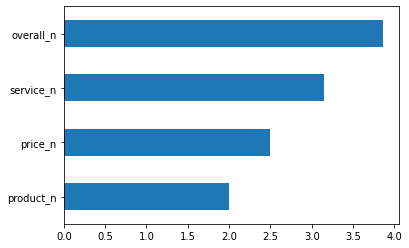

In [50]:
df.loc[:, 'product_n':'overall_n'].mean().plot(kind='barh')

<AxesSubplot: >

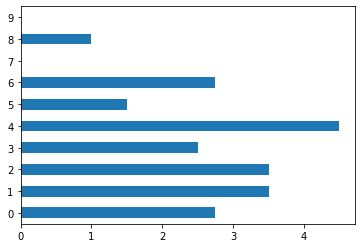

In [51]:
df.loc[:, 'product_n':'overall_n'].mean(axis=1).plot(kind='barh')

## multi-value column to dummy variables *****************************************************************

In [52]:
df['skills'].str.get_dummies(', ') # *****************************************************************************************

,Access,Excel,Java,PowerPoint,Python,R,SPSS,SQL,Word
0,0,1,0,1,1,1,0,1,1
1,0,1,0,1,0,0,1,0,1
2,0,1,0,0,1,1,0,1,0
3,1,1,0,1,0,0,0,0,1
4,0,1,0,0,1,1,1,0,0
5,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,1,0,1,0
7,0,0,0,0,0,0,0,0,0
8,0,1,0,1,1,1,0,1,1
9,0,0,1,0,1,0,0,1,0


In [53]:
dskills=df['skills'].str.get_dummies(', ') # ข้อมูลแต่ละตัวแยกจากันด้วย ', '
dskills

,Access,Excel,Java,PowerPoint,Python,R,SPSS,SQL,Word
0,0,1,0,1,1,1,0,1,1
1,0,1,0,1,0,0,1,0,1
2,0,1,0,0,1,1,0,1,0
3,1,1,0,1,0,0,0,0,1
4,0,1,0,0,1,1,1,0,0
5,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,1,0,1,0
7,0,0,0,0,0,0,0,0,0
8,0,1,0,1,1,1,0,1,1
9,0,0,1,0,1,0,0,1,0


In [54]:
pd.concat([df, dskills], axis='columns')

,Timestamp,age (years),gender,product,price,service,overall,skills,alpha,beta,...,overall_n,Access,Excel,Java,PowerPoint,Python,R,SPSS,SQL,Word
0,2021-03-09 07:28:24.801,21.0,M,very dissatisfied,dissatisfied,neutral,very satisfied,"Word, Excel, PowerPoint, SQL, Python, R",coffee,tea,...,5.0,0,1,0,1,1,1,0,1,1
1,2021-03-09 07:35:55.097,18.0,F,dissatisfied,neutral,satisfied,very satisfied,"Word, Excel, PowerPoint, SPSS","coffee, tea, bakery, ice cream","coffee, tea, bakery",...,5.0,0,1,0,1,0,0,1,0,1
2,2021-03-09 08:11:57.871,35.0,X,dissatisfied,neutral,satisfied,very satisfied,"Excel, SQL, Python, R","coffee, tea, bakery, ice cream","tea, ice cream",...,5.0,0,1,0,0,1,1,0,1,0
3,2021-03-09 08:12:30.173,21.0,X,satisfied,neutral,dissatisfied,very dissatisfied,"Word, Excel, PowerPoint, Access",tea,"coffee, bakery",...,1.0,1,1,0,1,0,0,0,0,1
4,2021-03-09 11:28:54.492,33.0,F,satisfied,satisfied,very satisfied,very satisfied,"Excel, Python, R, SPSS",tea,bakery,...,5.0,0,1,0,0,1,1,1,0,0
5,2021-03-09 22:12:09.455,44.0,NaN,very dissatisfied,dissatisfied,NaN,NaN,NaN,coffee,NaN,...,NaN,0,0,0,0,0,0,0,0,0
6,2021-03-11 07:59:04.920,44.0,M,very dissatisfied,dissatisfied,neutral,very satisfied,"Excel, SQL, R","coffee, tea","tea, bakery",...,5.0,0,1,0,0,0,1,0,1,0
7,2021-03-11 08:04:16.205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tea,coffee,...,NaN,0,0,0,0,0,0,0,0,0
8,2021-03-16 10:49:10.943,22.0,M,very dissatisfied,very dissatisfied,very dissatisfied,very dissatisfied,"Word, Excel, PowerPoint, SQL, Python, R","tea, bakery","tea, bakery",...,1.0,0,1,0,1,1,1,0,1,1
9,2021-06-14 23:53:20.009,20.0,M,NaN,NaN,NaN,NaN,"SQL, Python, Java",tea,tea,...,NaN,0,0,1,0,1,0,0,1,0


In [55]:
df=pd.concat([df, dskills], axis='columns').copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Timestamp    10 non-null     datetime64[ns]
 1   age (years)  9 non-null      float64       
 2   gender       8 non-null      object        
 3   product      8 non-null      object        
 4   price        8 non-null      object        
 5   service      7 non-null      object        
 6   overall      7 non-null      object        
 7   skills       8 non-null      object        
 8   alpha        10 non-null     object        
 9   beta         9 non-null      object        
 10  gamma        10 non-null     object        
 11  product_n    8 non-null      float64       
 12  price_n      8 non-null      float64       
 13  service_n    7 non-null      float64       
 14  overall_n    7 non-null      float64       
 15  Access       10 non-null     int64         
 16  Excel      

In [56]:
df.loc[:, ['Excel', 'SQL', 'Python']].sum()

Excel     7
SQL       5
Python    5
dtype: int64

In [57]:
df.loc[:, ['Excel', 'SQL', 'Python']].sum(axis='columns')

0    3
1    1
2    3
3    1
4    2
5    0
6    2
7    0
8    3
9    2
dtype: int64

<AxesSubplot: >

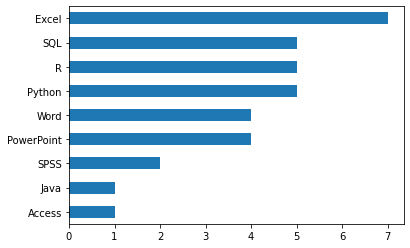

In [58]:
df.loc[:, 'Access':'Word'].sum().sort_values().plot(kind='barh')

In [59]:
dtemps=[]
dtemps.append(df)
multival_cols=['alpha', 'beta', 'gamma']
for c in multival_cols:
    dtemp=df[c].str.get_dummies(', ')
    dtemp.columns=[f'{c}_{p}' for p in dtemp.columns]
    dtemps.append(dtemp)
data=pd.concat(dtemps, axis=1)
data

,Timestamp,age (years),gender,product,price,service,overall,skills,alpha,beta,...,alpha_ice cream,alpha_tea,beta_bakery,beta_coffee,beta_ice cream,beta_tea,gamma_bakery,gamma_coffee,gamma_ice cream,gamma_tea
0,2021-03-09 07:28:24.801,21.0,M,very dissatisfied,dissatisfied,neutral,very satisfied,"Word, Excel, PowerPoint, SQL, Python, R",coffee,tea,...,0,0,0,0,0,1,1,0,0,0
1,2021-03-09 07:35:55.097,18.0,F,dissatisfied,neutral,satisfied,very satisfied,"Word, Excel, PowerPoint, SPSS","coffee, tea, bakery, ice cream","coffee, tea, bakery",...,1,1,1,1,0,1,0,0,0,1
2,2021-03-09 08:11:57.871,35.0,X,dissatisfied,neutral,satisfied,very satisfied,"Excel, SQL, Python, R","coffee, tea, bakery, ice cream","tea, ice cream",...,1,1,0,0,1,1,1,1,0,0
3,2021-03-09 08:12:30.173,21.0,X,satisfied,neutral,dissatisfied,very dissatisfied,"Word, Excel, PowerPoint, Access",tea,"coffee, bakery",...,0,1,1,1,0,0,1,0,1,1
4,2021-03-09 11:28:54.492,33.0,F,satisfied,satisfied,very satisfied,very satisfied,"Excel, Python, R, SPSS",tea,bakery,...,0,1,1,0,0,0,1,1,1,1
5,2021-03-09 22:12:09.455,44.0,NaN,very dissatisfied,dissatisfied,NaN,NaN,NaN,coffee,NaN,...,0,0,0,0,0,0,0,0,0,1
6,2021-03-11 07:59:04.920,44.0,M,very dissatisfied,dissatisfied,neutral,very satisfied,"Excel, SQL, R","coffee, tea","tea, bakery",...,0,1,1,0,0,1,0,1,1,0
7,2021-03-11 08:04:16.205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tea,coffee,...,0,1,0,1,0,0,1,1,1,1
8,2021-03-16 10:49:10.943,22.0,M,very dissatisfied,very dissatisfied,very dissatisfied,very dissatisfied,"Word, Excel, PowerPoint, SQL, Python, R","tea, bakery","tea, bakery",...,0,1,1,0,0,1,1,0,0,1
9,2021-06-14 23:53:20.009,20.0,M,NaN,NaN,NaN,NaN,"SQL, Python, Java",tea,tea,...,0,1,0,0,0,1,0,0,0,1


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Timestamp        10 non-null     datetime64[ns]
 1   age (years)      9 non-null      float64       
 2   gender           8 non-null      object        
 3   product          8 non-null      object        
 4   price            8 non-null      object        
 5   service          7 non-null      object        
 6   overall          7 non-null      object        
 7   skills           8 non-null      object        
 8   alpha            10 non-null     object        
 9   beta             9 non-null      object        
 10  gamma            10 non-null     object        
 11  product_n        8 non-null      float64       
 12  price_n          8 non-null      float64       
 13  service_n        7 non-null      float64       
 14  overall_n        7 non-null      float64     

In [62]:
data.loc[:, data.columns.str.contains('alpha')]

,alpha,alpha_bakery,alpha_coffee,alpha_ice cream,alpha_tea
0,coffee,0,1,0,0
1,"coffee, tea, bakery, ice cream",1,1,1,1
2,"coffee, tea, bakery, ice cream",1,1,1,1
3,tea,0,0,0,1
4,tea,0,0,0,1
5,coffee,0,1,0,0
6,"coffee, tea",0,1,0,1
7,tea,0,0,0,1
8,"tea, bakery",1,0,0,1
9,tea,0,0,0,1


# คลิป 153 ดึงข้อมูลเปิดของกรุงเทพมหานคร (Open Bangkok Data)

In [63]:
url="https://data.bangkok.go.th/dataset/52a5da69-c086-425a-bcb3-fccfadd824f5/resource/1aecc616-c570-4efb-9398-7dd4e39356b2/download/env_5ec8dad38033f.csv"
df=pd.read_csv(url)
df

,id,station_area,pm10_min,pm10_max,pm10_overstd,pm10_count,no2_min,no2_max,no2_overstd,no2_count,...,o38h_min,o38h_max,o38h_overstd,o38h_count,pm2_5_min,pm2_5_max,pm2_5_overstd,pm2_5_count,adddate,updatedate
0,6,ค่ามาตรฐาน,-,-,120,-,-,-,170,-,...,-,-,70,-,-,-,50,-,2020-05-23,2020-09-15
1,5,สรุป,13,185,59,1434,0,158.4,0,33142,...,0,79.4,9,8665,9,76,16,354,2020-05-23,2020-09-15
2,4,ราชเทวี,18,125,1,354,2,100,0,8372,...,0,79.4,9,8665,9,76,16,354,2020-05-23,2020-09-15
3,3,ราษฎร์บูรณะ,36,165,16,361,0,116.2,0,8355,...,-,-,-,-,-,-,-,-,2020-05-23,2020-09-15
4,2,พระโขนง,13,155,14,362,0,158.4,0,8286,...,-,-,-,-,-,-,-,-,2020-05-23,2020-09-15
5,1,ดินแดง,29,185,28,357,0,136.6,0,8129,...,-,-,-,-,-,-,-,-,2020-05-23,2020-10-15
